In [309]:
import pandas as pd
import os
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

from tensorflow import keras
from copy import deepcopy
import matplotlib.pyplot as plt
import numpy as np

from itertools import product

fp_local = '/home/jovyan/docker/src/python/temp_test/DJGrad'
fp_data = os.path.join(fp_local, 'data')

In [310]:
wine_df = pd.read_csv(os.path.join(fp_data,'winequality-red.csv'),delimiter=';')
wine_df = wine_df.append(pd.read_csv(os.path.join(fp_data,'winequality-white.csv'),delimiter=';'))
wine_df = wine_df.sample(frac=1)

In [311]:
wine_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1198,7.7,0.260,0.26,2.0,0.052,19.0,77.0,0.99510,3.15,0.79,10.9,6
1247,7.4,0.550,0.19,1.8,0.082,15.0,34.0,0.99655,3.49,0.68,10.5,5
4683,6.5,0.330,0.32,1.0,0.041,39.0,120.0,0.99004,3.06,0.37,12.2,6
1713,6.6,0.340,0.27,6.2,0.059,23.0,136.0,0.99570,3.30,0.49,10.1,6
1282,7.4,0.310,0.74,10.7,0.039,51.0,147.0,0.99770,3.02,0.43,8.7,5
...,...,...,...,...,...,...,...,...,...,...,...,...
3814,7.4,0.340,0.28,12.1,0.049,31.0,149.0,0.99677,3.22,0.49,10.3,5
3568,7.8,0.150,0.34,1.1,0.035,31.0,93.0,0.99096,3.07,0.72,11.3,7
602,7.7,0.835,0.00,2.6,0.081,6.0,14.0,0.99750,3.30,0.52,9.3,5
2267,6.6,0.190,0.43,10.9,0.045,53.0,154.0,0.99752,3.52,0.77,10.4,6


/root/anaconda/lib/python3.8/site-packages/pandas/plotting/_matplotlib/tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


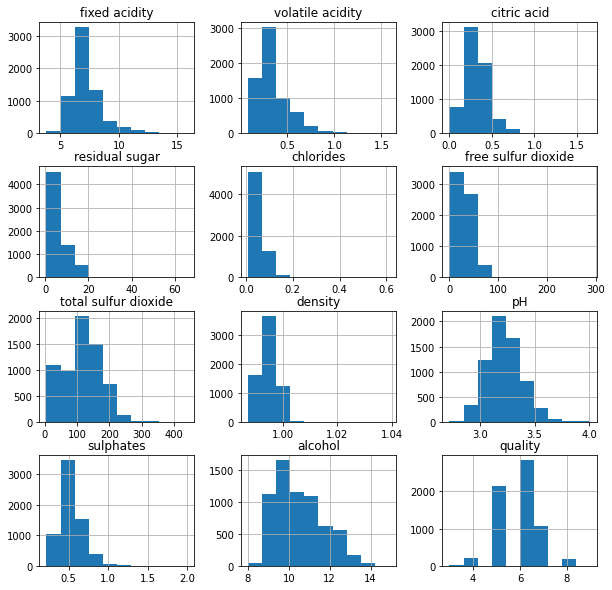

In [312]:
wine_df.hist(figsize=(10,10))
plt.show()

<AxesSubplot:>

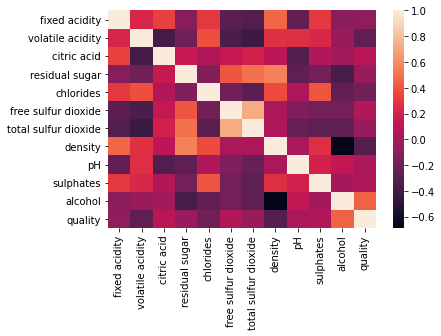

In [357]:
import seaborn as sns
sns.heatmap(wine_df.corr())

In [313]:
quants = wine_df['alcohol'].quantile([0,0.25, 0.5,0.75,1.0]).to_numpy()
res = []
for q1, q2 in zip(quants[:-1],quants[1:]):
    res.append(wine_df.loc[(wine_df['alcohol']>=q1) & (wine_df['alcohol']<q2)])
    
train_dfs = [q.sample(frac=0.8) for q in res]
test_dfs = [q.drop(t.index) for q,t in zip(res,train_dfs)]

In [157]:
fp_datamodel = Sequential([
    layers.Dense(1024, activation='sigmoid', input_shape=(11,)),
    layers.Dense(64, activation='sigmoid'),
    layers.Dense(32, activation='sigmoid'),
    layers.Dense(16, activation='sigmoid'),
    layers.Dense(8, activation='sigmoid'),
    layers.Dense(1, 'linear')
])

fp_datamodel.compile(
    optimizer='adam',
    loss=tf.keras.losses.MeanSquaredError(
    ),
#     metrics=[CWAcc1(n,name=f'cl{n}') for n in range(10)]
)

In [308]:
from collections import defaultdict

history = defaultdict(list)

x = np.concatenate([train_dfs[i].drop('quality',axis=1).to_numpy() for i in range(4)])
y = np.concatenate([train_dfs[i]['quality'].to_numpy() for i in range(4)])
p = np.random.permutation(y.shape[0])

KeyError: "['quality'] not found in axis"

In [159]:
%%time

tmp = fp_datamodel.fit(
    x[p],y[p],
    epochs=10000,
    validation_split=0.2,
)

for k in tmp.history:
    history[k]+=tmp.history[k]

Epoch 1/10000
130/130 [==============================] - 0s 1ms/step - loss: 24.9543 - val_loss: 17.7191
Epoch 2/10000
130/130 [==============================] - 0s 716us/step - loss: 14.8928 - val_loss: 12.1265
Epoch 3/10000
130/130 [==============================] - 0s 711us/step - loss: 10.7069 - val_loss: 8.9244
Epoch 4/10000
130/130 [==============================] - 0s 717us/step - loss: 7.9511 - val_loss: 6.6091
Epoch 5/10000
130/130 [==============================] - 0s 719us/step - loss: 5.9111 - val_loss: 4.8762
Epoch 6/10000
130/130 [==============================] - 0s 708us/step - loss: 4.3807 - val_loss: 3.5876
Epoch 7/10000
130/130 [==============================] - 0s 718us/step - loss: 3.2443 - val_loss: 2.6407
Epoch 8/10000
130/130 [==============================] - 0s 714us/step - loss: 2.4172 - val_loss: 1.9668
Epoch 9/10000
130/130 [==============================] - 0s 797us/step - loss: 1.8321 - val_loss: 1.4984
Epoch 10/10000
130/130 [============================

130/130 [==============================] - 0s 740us/step - loss: 0.5025 - val_loss: 0.4691
Epoch 156/10000
130/130 [==============================] - 0s 724us/step - loss: 0.5131 - val_loss: 0.5104
Epoch 157/10000
130/130 [==============================] - 0s 754us/step - loss: 0.5149 - val_loss: 0.4732
Epoch 158/10000
130/130 [==============================] - 0s 753us/step - loss: 0.5084 - val_loss: 0.4707
Epoch 159/10000
130/130 [==============================] - 0s 776us/step - loss: 0.5062 - val_loss: 0.4690
Epoch 160/10000
130/130 [==============================] - 0s 734us/step - loss: 0.5064 - val_loss: 0.4793
Epoch 161/10000
130/130 [==============================] - 0s 744us/step - loss: 0.5114 - val_loss: 0.4667
Epoch 162/10000
130/130 [==============================] - 0s 727us/step - loss: 0.5135 - val_loss: 0.4779
Epoch 163/10000
130/130 [==============================] - 0s 731us/step - loss: 0.5027 - val_loss: 0.4803
Epoch 164/10000
130/130 [============================

130/130 [==============================] - 0s 783us/step - loss: 0.4476 - val_loss: 0.4845
Epoch 308/10000
130/130 [==============================] - 0s 735us/step - loss: 0.4474 - val_loss: 0.4588
Epoch 309/10000
130/130 [==============================] - 0s 740us/step - loss: 0.4490 - val_loss: 0.4951
Epoch 310/10000
130/130 [==============================] - 0s 781us/step - loss: 0.4483 - val_loss: 0.4566
Epoch 311/10000
130/130 [==============================] - 0s 835us/step - loss: 0.4659 - val_loss: 0.4561
Epoch 312/10000
130/130 [==============================] - 0s 756us/step - loss: 0.4485 - val_loss: 0.4619
Epoch 313/10000
130/130 [==============================] - 0s 746us/step - loss: 0.4597 - val_loss: 0.4606
Epoch 314/10000
130/130 [==============================] - 0s 741us/step - loss: 0.4481 - val_loss: 0.4690
Epoch 315/10000
130/130 [==============================] - 0s 892us/step - loss: 0.4483 - val_loss: 0.4577
Epoch 316/10000
130/130 [============================

130/130 [==============================] - 0s 733us/step - loss: 0.3889 - val_loss: 0.4543
Epoch 460/10000
130/130 [==============================] - 0s 721us/step - loss: 0.3805 - val_loss: 0.4766
Epoch 461/10000
130/130 [==============================] - 0s 730us/step - loss: 0.3978 - val_loss: 0.4573
Epoch 462/10000
130/130 [==============================] - 0s 737us/step - loss: 0.3862 - val_loss: 0.4479
Epoch 463/10000
130/130 [==============================] - 0s 748us/step - loss: 0.3852 - val_loss: 0.4654
Epoch 464/10000
130/130 [==============================] - 0s 728us/step - loss: 0.3878 - val_loss: 0.5184
Epoch 465/10000
130/130 [==============================] - 0s 724us/step - loss: 0.3833 - val_loss: 0.4565
Epoch 466/10000
130/130 [==============================] - 0s 733us/step - loss: 0.3970 - val_loss: 0.4924
Epoch 467/10000
130/130 [==============================] - 0s 741us/step - loss: 0.3912 - val_loss: 0.4665
Epoch 468/10000
130/130 [============================

130/130 [==============================] - 0s 726us/step - loss: 0.3315 - val_loss: 0.4940
Epoch 612/10000
130/130 [==============================] - 0s 721us/step - loss: 0.3334 - val_loss: 0.4836
Epoch 613/10000
130/130 [==============================] - 0s 741us/step - loss: 0.3219 - val_loss: 0.4875
Epoch 614/10000
130/130 [==============================] - 0s 719us/step - loss: 0.3189 - val_loss: 0.4963
Epoch 615/10000
130/130 [==============================] - 0s 722us/step - loss: 0.3195 - val_loss: 0.4909
Epoch 616/10000
130/130 [==============================] - 0s 732us/step - loss: 0.3252 - val_loss: 0.4655
Epoch 617/10000
130/130 [==============================] - 0s 732us/step - loss: 0.3215 - val_loss: 0.4813
Epoch 618/10000
130/130 [==============================] - 0s 729us/step - loss: 0.3233 - val_loss: 0.4887
Epoch 619/10000
130/130 [==============================] - 0s 725us/step - loss: 0.3149 - val_loss: 0.4834
Epoch 620/10000
130/130 [============================

130/130 [==============================] - 0s 725us/step - loss: 0.2781 - val_loss: 0.5116
Epoch 764/10000
130/130 [==============================] - 0s 728us/step - loss: 0.2832 - val_loss: 0.4860
Epoch 765/10000
130/130 [==============================] - 0s 722us/step - loss: 0.2681 - val_loss: 0.4949
Epoch 766/10000
130/130 [==============================] - 0s 725us/step - loss: 0.2784 - val_loss: 0.5230
Epoch 767/10000
130/130 [==============================] - 0s 718us/step - loss: 0.2706 - val_loss: 0.5157
Epoch 768/10000
130/130 [==============================] - 0s 732us/step - loss: 0.2837 - val_loss: 0.5255
Epoch 769/10000
130/130 [==============================] - 0s 728us/step - loss: 0.2749 - val_loss: 0.5089
Epoch 770/10000
130/130 [==============================] - 0s 733us/step - loss: 0.2770 - val_loss: 0.5017
Epoch 771/10000
130/130 [==============================] - 0s 733us/step - loss: 0.2916 - val_loss: 0.5199
Epoch 772/10000
130/130 [============================

130/130 [==============================] - 0s 737us/step - loss: 0.2336 - val_loss: 0.5345
Epoch 916/10000
130/130 [==============================] - 0s 752us/step - loss: 0.2310 - val_loss: 0.5525
Epoch 917/10000
130/130 [==============================] - 0s 732us/step - loss: 0.2434 - val_loss: 0.5779
Epoch 918/10000
130/130 [==============================] - 0s 739us/step - loss: 0.2472 - val_loss: 0.5087
Epoch 919/10000
130/130 [==============================] - 0s 739us/step - loss: 0.2267 - val_loss: 0.5184
Epoch 920/10000
130/130 [==============================] - 0s 729us/step - loss: 0.2334 - val_loss: 0.5459
Epoch 921/10000
130/130 [==============================] - 0s 730us/step - loss: 0.2308 - val_loss: 0.5302
Epoch 922/10000
130/130 [==============================] - 0s 747us/step - loss: 0.2311 - val_loss: 0.5304
Epoch 923/10000
130/130 [==============================] - 0s 735us/step - loss: 0.2372 - val_loss: 0.5073
Epoch 924/10000
130/130 [============================

130/130 [==============================] - 0s 749us/step - loss: 0.2169 - val_loss: 0.5418
Epoch 1068/10000
130/130 [==============================] - 0s 743us/step - loss: 0.1991 - val_loss: 0.5401
Epoch 1069/10000
130/130 [==============================] - 0s 736us/step - loss: 0.1938 - val_loss: 0.5329
Epoch 1070/10000
130/130 [==============================] - 0s 722us/step - loss: 0.1972 - val_loss: 0.5378
Epoch 1071/10000
130/130 [==============================] - 0s 731us/step - loss: 0.2092 - val_loss: 0.5766
Epoch 1072/10000
130/130 [==============================] - 0s 729us/step - loss: 0.2070 - val_loss: 0.5528
Epoch 1073/10000
130/130 [==============================] - 0s 727us/step - loss: 0.2012 - val_loss: 0.5420
Epoch 1074/10000
130/130 [==============================] - 0s 723us/step - loss: 0.2181 - val_loss: 0.5261
Epoch 1075/10000
130/130 [==============================] - 0s 724us/step - loss: 0.1945 - val_loss: 0.5567
Epoch 1076/10000
130/130 [===================

130/130 [==============================] - 0s 743us/step - loss: 0.1955 - val_loss: 0.5664
Epoch 1144/10000
130/130 [==============================] - 0s 745us/step - loss: 0.2002 - val_loss: 0.5403
Epoch 1145/10000
130/130 [==============================] - 0s 770us/step - loss: 0.1865 - val_loss: 0.5397
Epoch 1146/10000
130/130 [==============================] - 0s 737us/step - loss: 0.1955 - val_loss: 0.5515
Epoch 1147/10000
130/130 [==============================] - 0s 728us/step - loss: 0.1863 - val_loss: 0.5346
Epoch 1148/10000
130/130 [==============================] - 0s 724us/step - loss: 0.1924 - val_loss: 0.5675
Epoch 1149/10000
130/130 [==============================] - 0s 720us/step - loss: 0.1893 - val_loss: 0.5538
Epoch 1150/10000
130/130 [==============================] - 0s 726us/step - loss: 0.1906 - val_loss: 0.5481
Epoch 1151/10000
130/130 [==============================] - 0s 720us/step - loss: 0.1904 - val_loss: 0.5372
Epoch 1152/10000
130/130 [===================

130/130 [==============================] - 0s 736us/step - loss: 0.1805 - val_loss: 0.5571
Epoch 1220/10000
130/130 [==============================] - 0s 741us/step - loss: 0.1808 - val_loss: 0.5617
Epoch 1221/10000
130/130 [==============================] - 0s 768us/step - loss: 0.1715 - val_loss: 0.5365
Epoch 1222/10000
130/130 [==============================] - 0s 739us/step - loss: 0.1713 - val_loss: 0.5573
Epoch 1223/10000
130/130 [==============================] - 0s 742us/step - loss: 0.1681 - val_loss: 0.5626
Epoch 1224/10000
130/130 [==============================] - 0s 742us/step - loss: 0.1776 - val_loss: 0.5627
Epoch 1225/10000
130/130 [==============================] - 0s 755us/step - loss: 0.1744 - val_loss: 0.5495
Epoch 1226/10000
130/130 [==============================] - 0s 742us/step - loss: 0.1655 - val_loss: 0.5539
Epoch 1227/10000
130/130 [==============================] - 0s 738us/step - loss: 0.1736 - val_loss: 0.5459
Epoch 1228/10000
130/130 [===================

130/130 [==============================] - 0s 726us/step - loss: 0.1632 - val_loss: 0.5575
Epoch 1296/10000
130/130 [==============================] - 0s 811us/step - loss: 0.1664 - val_loss: 0.5645
Epoch 1297/10000
130/130 [==============================] - 0s 819us/step - loss: 0.1596 - val_loss: 0.5708
Epoch 1298/10000
130/130 [==============================] - 0s 758us/step - loss: 0.1672 - val_loss: 0.5616
Epoch 1299/10000
130/130 [==============================] - 0s 741us/step - loss: 0.1633 - val_loss: 0.5569
Epoch 1300/10000
130/130 [==============================] - 0s 780us/step - loss: 0.1598 - val_loss: 0.5571
Epoch 1301/10000
130/130 [==============================] - 0s 745us/step - loss: 0.1571 - val_loss: 0.5575
Epoch 1302/10000
130/130 [==============================] - 0s 753us/step - loss: 0.1611 - val_loss: 0.5611
Epoch 1303/10000
130/130 [==============================] - 0s 760us/step - loss: 0.1608 - val_loss: 0.5685
Epoch 1304/10000
130/130 [===================

130/130 [==============================] - 0s 727us/step - loss: 0.1469 - val_loss: 0.5686
Epoch 1372/10000
130/130 [==============================] - 0s 745us/step - loss: 0.1544 - val_loss: 0.5711
Epoch 1373/10000
130/130 [==============================] - 0s 726us/step - loss: 0.1518 - val_loss: 0.5719
Epoch 1374/10000
130/130 [==============================] - 0s 724us/step - loss: 0.1510 - val_loss: 0.5739
Epoch 1375/10000
130/130 [==============================] - 0s 731us/step - loss: 0.1471 - val_loss: 0.5646
Epoch 1376/10000
130/130 [==============================] - 0s 728us/step - loss: 0.1554 - val_loss: 0.5656
Epoch 1377/10000
130/130 [==============================] - 0s 743us/step - loss: 0.1527 - val_loss: 0.5551
Epoch 1378/10000
130/130 [==============================] - 0s 742us/step - loss: 0.1524 - val_loss: 0.5554
Epoch 1379/10000
130/130 [==============================] - 0s 722us/step - loss: 0.1487 - val_loss: 0.5707
Epoch 1380/10000
130/130 [===================

130/130 [==============================] - 0s 756us/step - loss: 0.1457 - val_loss: 0.5707
Epoch 1448/10000
130/130 [==============================] - 0s 758us/step - loss: 0.1388 - val_loss: 0.5883
Epoch 1449/10000
130/130 [==============================] - 0s 751us/step - loss: 0.1388 - val_loss: 0.5970
Epoch 1450/10000
130/130 [==============================] - 0s 755us/step - loss: 0.1441 - val_loss: 0.5773
Epoch 1451/10000
130/130 [==============================] - 0s 738us/step - loss: 0.1367 - val_loss: 0.5704
Epoch 1452/10000
130/130 [==============================] - 0s 730us/step - loss: 0.1398 - val_loss: 0.5829
Epoch 1453/10000
130/130 [==============================] - 0s 734us/step - loss: 0.1422 - val_loss: 0.5622
Epoch 1454/10000
130/130 [==============================] - 0s 802us/step - loss: 0.1336 - val_loss: 0.5686
Epoch 1455/10000
130/130 [==============================] - 0s 807us/step - loss: 0.1475 - val_loss: 0.5644
Epoch 1456/10000
130/130 [===================

130/130 [==============================] - 0s 744us/step - loss: 0.1372 - val_loss: 0.5653
Epoch 1524/10000
130/130 [==============================] - 0s 766us/step - loss: 0.1229 - val_loss: 0.5811
Epoch 1525/10000
130/130 [==============================] - 0s 746us/step - loss: 0.1312 - val_loss: 0.5899
Epoch 1526/10000
130/130 [==============================] - 0s 737us/step - loss: 0.1338 - val_loss: 0.5497
Epoch 1527/10000
130/130 [==============================] - 0s 726us/step - loss: 0.1323 - val_loss: 0.5780
Epoch 1528/10000
130/130 [==============================] - 0s 718us/step - loss: 0.1330 - val_loss: 0.5808
Epoch 1529/10000
130/130 [==============================] - 0s 720us/step - loss: 0.1272 - val_loss: 0.6030
Epoch 1530/10000
130/130 [==============================] - 0s 735us/step - loss: 0.1249 - val_loss: 0.5621
Epoch 1531/10000
130/130 [==============================] - 0s 725us/step - loss: 0.1300 - val_loss: 0.5799
Epoch 1532/10000
130/130 [===================

130/130 [==============================] - 0s 760us/step - loss: 0.1201 - val_loss: 0.5566
Epoch 1600/10000
130/130 [==============================] - 0s 734us/step - loss: 0.1242 - val_loss: 0.5844
Epoch 1601/10000
130/130 [==============================] - 0s 726us/step - loss: 0.1203 - val_loss: 0.5533
Epoch 1602/10000
130/130 [==============================] - 0s 724us/step - loss: 0.1127 - val_loss: 0.5832
Epoch 1603/10000
130/130 [==============================] - 0s 732us/step - loss: 0.1215 - val_loss: 0.5643
Epoch 1604/10000
130/130 [==============================] - 0s 741us/step - loss: 0.1262 - val_loss: 0.5772
Epoch 1605/10000
130/130 [==============================] - 0s 737us/step - loss: 0.1213 - val_loss: 0.5982
Epoch 1606/10000
130/130 [==============================] - 0s 725us/step - loss: 0.1195 - val_loss: 0.5818
Epoch 1607/10000
130/130 [==============================] - 0s 728us/step - loss: 0.1221 - val_loss: 0.5765
Epoch 1608/10000
130/130 [===================

130/130 [==============================] - 0s 745us/step - loss: 0.1143 - val_loss: 0.5890
Epoch 1676/10000
130/130 [==============================] - 0s 732us/step - loss: 0.1176 - val_loss: 0.5641
Epoch 1677/10000
130/130 [==============================] - 0s 732us/step - loss: 0.1129 - val_loss: 0.5947
Epoch 1678/10000
130/130 [==============================] - 0s 722us/step - loss: 0.1121 - val_loss: 0.5890
Epoch 1679/10000
130/130 [==============================] - 0s 748us/step - loss: 0.1188 - val_loss: 0.5731
Epoch 1680/10000
130/130 [==============================] - 0s 727us/step - loss: 0.1138 - val_loss: 0.5815
Epoch 1681/10000
130/130 [==============================] - 0s 720us/step - loss: 0.1287 - val_loss: 0.5964
Epoch 1682/10000
130/130 [==============================] - 0s 740us/step - loss: 0.1236 - val_loss: 0.5682
Epoch 1683/10000
130/130 [==============================] - 0s 734us/step - loss: 0.1073 - val_loss: 0.5719
Epoch 1684/10000
130/130 [===================

130/130 [==============================] - 0s 762us/step - loss: 0.1070 - val_loss: 0.5941
Epoch 1752/10000
130/130 [==============================] - 0s 732us/step - loss: 0.1118 - val_loss: 0.5838
Epoch 1753/10000
130/130 [==============================] - 0s 725us/step - loss: 0.1104 - val_loss: 0.6019
Epoch 1754/10000
130/130 [==============================] - 0s 745us/step - loss: 0.1049 - val_loss: 0.5822
Epoch 1755/10000
130/130 [==============================] - 0s 754us/step - loss: 0.1081 - val_loss: 0.5995
Epoch 1756/10000
130/130 [==============================] - 0s 735us/step - loss: 0.1309 - val_loss: 0.5903
Epoch 1757/10000
130/130 [==============================] - 0s 729us/step - loss: 0.1108 - val_loss: 0.6204
Epoch 1758/10000
130/130 [==============================] - 0s 724us/step - loss: 0.1038 - val_loss: 0.5998
Epoch 1759/10000
130/130 [==============================] - 0s 732us/step - loss: 0.1014 - val_loss: 0.5693
Epoch 1760/10000
130/130 [===================

130/130 [==============================] - 0s 748us/step - loss: 0.0991 - val_loss: 0.5978
Epoch 1828/10000
130/130 [==============================] - 0s 746us/step - loss: 0.1046 - val_loss: 0.5884
Epoch 1829/10000
130/130 [==============================] - 0s 733us/step - loss: 0.0995 - val_loss: 0.5778
Epoch 1830/10000
130/130 [==============================] - 0s 740us/step - loss: 0.0932 - val_loss: 0.5808
Epoch 1831/10000
130/130 [==============================] - 0s 734us/step - loss: 0.1063 - val_loss: 0.6084
Epoch 1832/10000
130/130 [==============================] - 0s 732us/step - loss: 0.1118 - val_loss: 0.6270
Epoch 1833/10000
130/130 [==============================] - 0s 735us/step - loss: 0.1065 - val_loss: 0.5966
Epoch 1834/10000
130/130 [==============================] - 0s 742us/step - loss: 0.0982 - val_loss: 0.6169
Epoch 1835/10000
130/130 [==============================] - 0s 732us/step - loss: 0.1013 - val_loss: 0.5960
Epoch 1836/10000
130/130 [===================

130/130 [==============================] - 0s 754us/step - loss: 0.0924 - val_loss: 0.6036
Epoch 1904/10000
130/130 [==============================] - 0s 729us/step - loss: 0.0924 - val_loss: 0.5910
Epoch 1905/10000
130/130 [==============================] - 0s 723us/step - loss: 0.0980 - val_loss: 0.6025
Epoch 1906/10000
130/130 [==============================] - 0s 730us/step - loss: 0.0976 - val_loss: 0.5911
Epoch 1907/10000
130/130 [==============================] - 0s 728us/step - loss: 0.0944 - val_loss: 0.5871
Epoch 1908/10000
130/130 [==============================] - 0s 727us/step - loss: 0.0917 - val_loss: 0.5949
Epoch 1909/10000
130/130 [==============================] - 0s 720us/step - loss: 0.0937 - val_loss: 0.6020
Epoch 1910/10000
130/130 [==============================] - 0s 727us/step - loss: 0.0951 - val_loss: 0.5877
Epoch 1911/10000
130/130 [==============================] - 0s 728us/step - loss: 0.0911 - val_loss: 0.6117
Epoch 1912/10000
130/130 [===================

130/130 [==============================] - 0s 761us/step - loss: 0.0861 - val_loss: 0.6116
Epoch 1980/10000
130/130 [==============================] - 0s 742us/step - loss: 0.0908 - val_loss: 0.5783
Epoch 1981/10000
130/130 [==============================] - 0s 729us/step - loss: 0.0998 - val_loss: 0.6129
Epoch 1982/10000
130/130 [==============================] - 0s 752us/step - loss: 0.0941 - val_loss: 0.5975
Epoch 1983/10000
130/130 [==============================] - 0s 765us/step - loss: 0.0865 - val_loss: 0.6014
Epoch 1984/10000
130/130 [==============================] - 0s 729us/step - loss: 0.0864 - val_loss: 0.6662
Epoch 1985/10000
130/130 [==============================] - 0s 730us/step - loss: 0.0993 - val_loss: 0.6000
Epoch 1986/10000
130/130 [==============================] - 0s 738us/step - loss: 0.0904 - val_loss: 0.6391
Epoch 1987/10000
130/130 [==============================] - 0s 751us/step - loss: 0.0995 - val_loss: 0.5922
Epoch 1988/10000
130/130 [===================

130/130 [==============================] - 0s 812us/step - loss: 0.0822 - val_loss: 0.6294
Epoch 2056/10000
130/130 [==============================] - 0s 731us/step - loss: 0.0835 - val_loss: 0.5768
Epoch 2057/10000
130/130 [==============================] - 0s 751us/step - loss: 0.0794 - val_loss: 0.5907
Epoch 2058/10000
130/130 [==============================] - 0s 747us/step - loss: 0.0823 - val_loss: 0.5997
Epoch 2059/10000
130/130 [==============================] - 0s 765us/step - loss: 0.0922 - val_loss: 0.5797
Epoch 2060/10000
130/130 [==============================] - 0s 752us/step - loss: 0.0863 - val_loss: 0.6099
Epoch 2061/10000
130/130 [==============================] - 0s 772us/step - loss: 0.0896 - val_loss: 0.5932
Epoch 2062/10000
130/130 [==============================] - 0s 736us/step - loss: 0.0835 - val_loss: 0.6021
Epoch 2063/10000
130/130 [==============================] - 0s 736us/step - loss: 0.0822 - val_loss: 0.6086
Epoch 2064/10000
130/130 [===================

130/130 [==============================] - 0s 737us/step - loss: 0.0814 - val_loss: 0.6125
Epoch 2132/10000
130/130 [==============================] - 0s 725us/step - loss: 0.0777 - val_loss: 0.6013
Epoch 2133/10000
130/130 [==============================] - 0s 739us/step - loss: 0.0787 - val_loss: 0.5845
Epoch 2134/10000
130/130 [==============================] - 0s 751us/step - loss: 0.0813 - val_loss: 0.6057
Epoch 2135/10000
130/130 [==============================] - 0s 738us/step - loss: 0.0833 - val_loss: 0.6056
Epoch 2136/10000
130/130 [==============================] - 0s 848us/step - loss: 0.0863 - val_loss: 0.6051
Epoch 2137/10000
130/130 [==============================] - 0s 775us/step - loss: 0.0828 - val_loss: 0.5866
Epoch 2138/10000
130/130 [==============================] - 0s 750us/step - loss: 0.0779 - val_loss: 0.5968
Epoch 2139/10000
130/130 [==============================] - 0s 745us/step - loss: 0.0771 - val_loss: 0.6080
Epoch 2140/10000
130/130 [===================

130/130 [==============================] - 0s 726us/step - loss: 0.0743 - val_loss: 0.5873
Epoch 2208/10000
130/130 [==============================] - 0s 724us/step - loss: 0.0803 - val_loss: 0.5848
Epoch 2209/10000
130/130 [==============================] - 0s 732us/step - loss: 0.0852 - val_loss: 0.6080
Epoch 2210/10000
130/130 [==============================] - 0s 732us/step - loss: 0.0727 - val_loss: 0.5996
Epoch 2211/10000
130/130 [==============================] - 0s 729us/step - loss: 0.0711 - val_loss: 0.5947
Epoch 2212/10000
130/130 [==============================] - 0s 732us/step - loss: 0.0699 - val_loss: 0.6124
Epoch 2213/10000
130/130 [==============================] - 0s 729us/step - loss: 0.0707 - val_loss: 0.6088
Epoch 2214/10000
130/130 [==============================] - 0s 764us/step - loss: 0.0685 - val_loss: 0.6160
Epoch 2215/10000
130/130 [==============================] - 0s 814us/step - loss: 0.0684 - val_loss: 0.5989
Epoch 2216/10000
130/130 [===================

130/130 [==============================] - 0s 750us/step - loss: 0.0768 - val_loss: 0.6011
Epoch 2284/10000
130/130 [==============================] - 0s 733us/step - loss: 0.0777 - val_loss: 0.6054
Epoch 2285/10000
130/130 [==============================] - 0s 840us/step - loss: 0.0630 - val_loss: 0.6240
Epoch 2286/10000
130/130 [==============================] - 0s 797us/step - loss: 0.0688 - val_loss: 0.5798
Epoch 2287/10000
130/130 [==============================] - 0s 773us/step - loss: 0.0704 - val_loss: 0.5893
Epoch 2288/10000
130/130 [==============================] - 0s 738us/step - loss: 0.0746 - val_loss: 0.6092
Epoch 2289/10000
130/130 [==============================] - 0s 741us/step - loss: 0.0958 - val_loss: 0.6103
Epoch 2290/10000
130/130 [==============================] - 0s 748us/step - loss: 0.0739 - val_loss: 0.6384
Epoch 2291/10000
130/130 [==============================] - 0s 743us/step - loss: 0.0774 - val_loss: 0.5816
Epoch 2292/10000
130/130 [===================

130/130 [==============================] - 0s 775us/step - loss: 0.0644 - val_loss: 0.6423
Epoch 2360/10000
130/130 [==============================] - 0s 744us/step - loss: 0.0684 - val_loss: 0.6067
Epoch 2361/10000
130/130 [==============================] - 0s 751us/step - loss: 0.0683 - val_loss: 0.6050
Epoch 2362/10000
130/130 [==============================] - 0s 731us/step - loss: 0.0787 - val_loss: 0.6190
Epoch 2363/10000
130/130 [==============================] - 0s 746us/step - loss: 0.0716 - val_loss: 0.6193
Epoch 2364/10000
130/130 [==============================] - 0s 774us/step - loss: 0.0610 - val_loss: 0.6124
Epoch 2365/10000
130/130 [==============================] - 0s 778us/step - loss: 0.0673 - val_loss: 0.6052
Epoch 2366/10000
130/130 [==============================] - 0s 731us/step - loss: 0.0615 - val_loss: 0.5876
Epoch 2367/10000
130/130 [==============================] - 0s 737us/step - loss: 0.0667 - val_loss: 0.6130
Epoch 2368/10000
130/130 [===================

130/130 [==============================] - 0s 744us/step - loss: 0.0703 - val_loss: 0.5872
Epoch 2436/10000
130/130 [==============================] - 0s 734us/step - loss: 0.0677 - val_loss: 0.6385
Epoch 2437/10000
130/130 [==============================] - 0s 736us/step - loss: 0.0713 - val_loss: 0.6176
Epoch 2438/10000
130/130 [==============================] - 0s 750us/step - loss: 0.0612 - val_loss: 0.6041
Epoch 2439/10000
130/130 [==============================] - 0s 736us/step - loss: 0.0828 - val_loss: 0.5880
Epoch 2440/10000
130/130 [==============================] - 0s 735us/step - loss: 0.0690 - val_loss: 0.6217
Epoch 2441/10000
130/130 [==============================] - 0s 746us/step - loss: 0.0602 - val_loss: 0.6029
Epoch 2442/10000
130/130 [==============================] - 0s 730us/step - loss: 0.0626 - val_loss: 0.5974
Epoch 2443/10000
130/130 [==============================] - 0s 734us/step - loss: 0.0561 - val_loss: 0.6193
Epoch 2444/10000
130/130 [===================

130/130 [==============================] - 0s 757us/step - loss: 0.0585 - val_loss: 0.6120
Epoch 2512/10000
130/130 [==============================] - 0s 737us/step - loss: 0.0633 - val_loss: 0.6295
Epoch 2513/10000
130/130 [==============================] - 0s 738us/step - loss: 0.0648 - val_loss: 0.5933
Epoch 2514/10000
130/130 [==============================] - 0s 741us/step - loss: 0.0584 - val_loss: 0.6067
Epoch 2515/10000
130/130 [==============================] - 0s 732us/step - loss: 0.0646 - val_loss: 0.6261
Epoch 2516/10000
130/130 [==============================] - 0s 746us/step - loss: 0.0596 - val_loss: 0.6337
Epoch 2517/10000
130/130 [==============================] - 0s 772us/step - loss: 0.0609 - val_loss: 0.6148
Epoch 2518/10000
130/130 [==============================] - 0s 732us/step - loss: 0.0617 - val_loss: 0.6033
Epoch 2519/10000
130/130 [==============================] - 0s 740us/step - loss: 0.0603 - val_loss: 0.6122
Epoch 2520/10000
130/130 [===================

130/130 [==============================] - 0s 741us/step - loss: 0.0554 - val_loss: 0.6399
Epoch 2588/10000
130/130 [==============================] - 0s 729us/step - loss: 0.0873 - val_loss: 0.6117
Epoch 2589/10000
130/130 [==============================] - 0s 740us/step - loss: 0.0601 - val_loss: 0.6131
Epoch 2590/10000
130/130 [==============================] - 0s 733us/step - loss: 0.0558 - val_loss: 0.6185
Epoch 2591/10000
130/130 [==============================] - 0s 731us/step - loss: 0.0583 - val_loss: 0.6349
Epoch 2592/10000
130/130 [==============================] - 0s 739us/step - loss: 0.0559 - val_loss: 0.6149
Epoch 2593/10000
130/130 [==============================] - 0s 744us/step - loss: 0.0562 - val_loss: 0.6224
Epoch 2594/10000
130/130 [==============================] - 0s 737us/step - loss: 0.0574 - val_loss: 0.6238
Epoch 2595/10000
130/130 [==============================] - 0s 737us/step - loss: 0.0560 - val_loss: 0.6090
Epoch 2596/10000
130/130 [===================

130/130 [==============================] - 0s 731us/step - loss: 0.0605 - val_loss: 0.6177
Epoch 2664/10000
130/130 [==============================] - 0s 745us/step - loss: 0.0570 - val_loss: 0.6206
Epoch 2665/10000
130/130 [==============================] - 0s 726us/step - loss: 0.0654 - val_loss: 0.6176
Epoch 2666/10000
130/130 [==============================] - 0s 735us/step - loss: 0.0588 - val_loss: 0.6193
Epoch 2667/10000
130/130 [==============================] - 0s 732us/step - loss: 0.0537 - val_loss: 0.6174
Epoch 2668/10000
130/130 [==============================] - 0s 738us/step - loss: 0.0566 - val_loss: 0.6116
Epoch 2669/10000
130/130 [==============================] - 0s 730us/step - loss: 0.0605 - val_loss: 0.6181
Epoch 2670/10000
130/130 [==============================] - 0s 746us/step - loss: 0.0526 - val_loss: 0.6346
Epoch 2671/10000
130/130 [==============================] - 0s 740us/step - loss: 0.0580 - val_loss: 0.6252
Epoch 2672/10000
130/130 [===================

130/130 [==============================] - 0s 728us/step - loss: 0.0486 - val_loss: 0.6293
Epoch 2740/10000
130/130 [==============================] - 0s 728us/step - loss: 0.0505 - val_loss: 0.6320
Epoch 2741/10000
130/130 [==============================] - 0s 728us/step - loss: 0.0532 - val_loss: 0.6448
Epoch 2742/10000
130/130 [==============================] - 0s 730us/step - loss: 0.0639 - val_loss: 0.6341
Epoch 2743/10000
130/130 [==============================] - 0s 723us/step - loss: 0.0561 - val_loss: 0.6168
Epoch 2744/10000
130/130 [==============================] - 0s 729us/step - loss: 0.0512 - val_loss: 0.6170
Epoch 2745/10000
130/130 [==============================] - 0s 737us/step - loss: 0.0484 - val_loss: 0.6241
Epoch 2746/10000
130/130 [==============================] - 0s 733us/step - loss: 0.0499 - val_loss: 0.6583
Epoch 2747/10000
130/130 [==============================] - 0s 742us/step - loss: 0.0544 - val_loss: 0.6246
Epoch 2748/10000
130/130 [===================

130/130 [==============================] - 0s 737us/step - loss: 0.0596 - val_loss: 0.6184
Epoch 2816/10000
130/130 [==============================] - 0s 740us/step - loss: 0.0564 - val_loss: 0.6334
Epoch 2817/10000
130/130 [==============================] - 0s 752us/step - loss: 0.0546 - val_loss: 0.6520
Epoch 2818/10000
130/130 [==============================] - 0s 743us/step - loss: 0.0497 - val_loss: 0.6438
Epoch 2819/10000
130/130 [==============================] - 0s 731us/step - loss: 0.0576 - val_loss: 0.6417
Epoch 2820/10000
130/130 [==============================] - 0s 744us/step - loss: 0.0586 - val_loss: 0.6248
Epoch 2821/10000
130/130 [==============================] - 0s 737us/step - loss: 0.0476 - val_loss: 0.6252
Epoch 2822/10000
130/130 [==============================] - 0s 739us/step - loss: 0.0459 - val_loss: 0.6261
Epoch 2823/10000
130/130 [==============================] - 0s 749us/step - loss: 0.0467 - val_loss: 0.6431
Epoch 2824/10000
130/130 [===================

130/130 [==============================] - 0s 741us/step - loss: 0.0510 - val_loss: 0.6295
Epoch 2892/10000
130/130 [==============================] - 0s 745us/step - loss: 0.0475 - val_loss: 0.6232
Epoch 2893/10000
130/130 [==============================] - 0s 743us/step - loss: 0.0507 - val_loss: 0.6385
Epoch 2894/10000
130/130 [==============================] - 0s 731us/step - loss: 0.0556 - val_loss: 0.6243
Epoch 2895/10000
130/130 [==============================] - 0s 739us/step - loss: 0.0472 - val_loss: 0.6406
Epoch 2896/10000
130/130 [==============================] - 0s 734us/step - loss: 0.0460 - val_loss: 0.6194
Epoch 2897/10000
130/130 [==============================] - 0s 738us/step - loss: 0.0487 - val_loss: 0.6380
Epoch 2898/10000
130/130 [==============================] - 0s 738us/step - loss: 0.0504 - val_loss: 0.6242
Epoch 2899/10000
130/130 [==============================] - 0s 737us/step - loss: 0.0442 - val_loss: 0.6268
Epoch 2900/10000
130/130 [===================

130/130 [==============================] - 0s 715us/step - loss: 0.0445 - val_loss: 0.6176
Epoch 2968/10000
130/130 [==============================] - 0s 719us/step - loss: 0.0404 - val_loss: 0.6561
Epoch 2969/10000
130/130 [==============================] - 0s 721us/step - loss: 0.0483 - val_loss: 0.6415
Epoch 2970/10000
130/130 [==============================] - 0s 734us/step - loss: 0.0487 - val_loss: 0.6343
Epoch 2971/10000
130/130 [==============================] - 0s 718us/step - loss: 0.0440 - val_loss: 0.6423
Epoch 2972/10000
130/130 [==============================] - 0s 737us/step - loss: 0.0443 - val_loss: 0.6279
Epoch 2973/10000
130/130 [==============================] - 0s 731us/step - loss: 0.0618 - val_loss: 0.6515
Epoch 2974/10000
130/130 [==============================] - 0s 734us/step - loss: 0.0619 - val_loss: 0.6468
Epoch 2975/10000
130/130 [==============================] - 0s 720us/step - loss: 0.0596 - val_loss: 0.6205
Epoch 2976/10000
130/130 [===================

130/130 [==============================] - 0s 737us/step - loss: 0.0431 - val_loss: 0.6326
Epoch 3044/10000
130/130 [==============================] - 0s 732us/step - loss: 0.0467 - val_loss: 0.6189
Epoch 3045/10000
130/130 [==============================] - 0s 731us/step - loss: 0.0461 - val_loss: 0.6445
Epoch 3046/10000
130/130 [==============================] - 0s 728us/step - loss: 0.0492 - val_loss: 0.6072
Epoch 3047/10000
130/130 [==============================] - 0s 719us/step - loss: 0.0434 - val_loss: 0.6290
Epoch 3048/10000
130/130 [==============================] - 0s 713us/step - loss: 0.0464 - val_loss: 0.6173
Epoch 3049/10000
130/130 [==============================] - 0s 711us/step - loss: 0.0495 - val_loss: 0.6341
Epoch 3050/10000
130/130 [==============================] - 0s 713us/step - loss: 0.0499 - val_loss: 0.6351
Epoch 3051/10000
130/130 [==============================] - 0s 716us/step - loss: 0.0437 - val_loss: 0.6203
Epoch 3052/10000
130/130 [===================

130/130 [==============================] - 0s 719us/step - loss: 0.0411 - val_loss: 0.6597
Epoch 3120/10000
130/130 [==============================] - 0s 780us/step - loss: 0.0467 - val_loss: 0.6429
Epoch 3121/10000
130/130 [==============================] - 0s 785us/step - loss: 0.0430 - val_loss: 0.6494
Epoch 3122/10000
130/130 [==============================] - 0s 794us/step - loss: 0.0427 - val_loss: 0.6330
Epoch 3123/10000
130/130 [==============================] - 0s 751us/step - loss: 0.0434 - val_loss: 0.6533
Epoch 3124/10000
130/130 [==============================] - 0s 711us/step - loss: 0.0603 - val_loss: 0.6167
Epoch 3125/10000
130/130 [==============================] - 0s 725us/step - loss: 0.0412 - val_loss: 0.6369
Epoch 3126/10000
130/130 [==============================] - 0s 717us/step - loss: 0.0419 - val_loss: 0.6516
Epoch 3127/10000
130/130 [==============================] - 0s 721us/step - loss: 0.0394 - val_loss: 0.6585
Epoch 3128/10000
130/130 [===================

130/130 [==============================] - 0s 712us/step - loss: 0.0427 - val_loss: 0.6278
Epoch 3196/10000
130/130 [==============================] - 0s 725us/step - loss: 0.0519 - val_loss: 0.6606
Epoch 3197/10000
130/130 [==============================] - 0s 734us/step - loss: 0.0422 - val_loss: 0.6426
Epoch 3198/10000
130/130 [==============================] - 0s 727us/step - loss: 0.0399 - val_loss: 0.6602
Epoch 3199/10000
130/130 [==============================] - 0s 730us/step - loss: 0.0361 - val_loss: 0.6464
Epoch 3200/10000
130/130 [==============================] - 0s 717us/step - loss: 0.0372 - val_loss: 0.6429
Epoch 3201/10000
130/130 [==============================] - 0s 713us/step - loss: 0.0525 - val_loss: 0.6009
Epoch 3202/10000
130/130 [==============================] - 0s 718us/step - loss: 0.0616 - val_loss: 0.6391
Epoch 3203/10000
130/130 [==============================] - 0s 713us/step - loss: 0.0388 - val_loss: 0.6307
Epoch 3204/10000
130/130 [===================

130/130 [==============================] - 0s 771us/step - loss: 0.0390 - val_loss: 0.6609
Epoch 3272/10000
130/130 [==============================] - 0s 798us/step - loss: 0.0381 - val_loss: 0.6291
Epoch 3273/10000
130/130 [==============================] - 0s 774us/step - loss: 0.0412 - val_loss: 0.6506
Epoch 3274/10000
130/130 [==============================] - 0s 718us/step - loss: 0.0397 - val_loss: 0.6479
Epoch 3275/10000
130/130 [==============================] - 0s 717us/step - loss: 0.0358 - val_loss: 0.6410
Epoch 3276/10000
130/130 [==============================] - 0s 713us/step - loss: 0.0393 - val_loss: 0.6496
Epoch 3277/10000
130/130 [==============================] - 0s 718us/step - loss: 0.0471 - val_loss: 0.6386
Epoch 3278/10000
130/130 [==============================] - 0s 726us/step - loss: 0.0396 - val_loss: 0.6421
Epoch 3279/10000
130/130 [==============================] - 0s 732us/step - loss: 0.0351 - val_loss: 0.6509
Epoch 3280/10000
130/130 [===================

130/130 [==============================] - 0s 715us/step - loss: 0.0451 - val_loss: 0.6361
Epoch 3348/10000
130/130 [==============================] - 0s 722us/step - loss: 0.0477 - val_loss: 0.6509
Epoch 3349/10000
130/130 [==============================] - 0s 719us/step - loss: 0.0404 - val_loss: 0.6452
Epoch 3350/10000
130/130 [==============================] - 0s 725us/step - loss: 0.0400 - val_loss: 0.6352
Epoch 3351/10000
130/130 [==============================] - 0s 733us/step - loss: 0.0386 - val_loss: 0.6408
Epoch 3352/10000
130/130 [==============================] - 0s 721us/step - loss: 0.0382 - val_loss: 0.6527
Epoch 3353/10000
130/130 [==============================] - 0s 712us/step - loss: 0.0356 - val_loss: 0.6322
Epoch 3354/10000
130/130 [==============================] - 0s 718us/step - loss: 0.0369 - val_loss: 0.6538
Epoch 3355/10000
130/130 [==============================] - 0s 715us/step - loss: 0.0381 - val_loss: 0.6357
Epoch 3356/10000
130/130 [===================

130/130 [==============================] - 0s 721us/step - loss: 0.0400 - val_loss: 0.6169
Epoch 3424/10000
130/130 [==============================] - 0s 724us/step - loss: 0.0399 - val_loss: 0.6575
Epoch 3425/10000
130/130 [==============================] - 0s 716us/step - loss: 0.0351 - val_loss: 0.6325
Epoch 3426/10000
130/130 [==============================] - 0s 713us/step - loss: 0.0355 - val_loss: 0.6305
Epoch 3427/10000
130/130 [==============================] - 0s 722us/step - loss: 0.0405 - val_loss: 0.6321
Epoch 3428/10000
130/130 [==============================] - 0s 715us/step - loss: 0.0328 - val_loss: 0.6326
Epoch 3429/10000
130/130 [==============================] - 0s 713us/step - loss: 0.0429 - val_loss: 0.6439
Epoch 3430/10000
130/130 [==============================] - 0s 721us/step - loss: 0.0365 - val_loss: 0.6496
Epoch 3431/10000
130/130 [==============================] - 0s 709us/step - loss: 0.0532 - val_loss: 0.6522
Epoch 3432/10000
130/130 [===================

130/130 [==============================] - 0s 713us/step - loss: 0.0386 - val_loss: 0.6481
Epoch 3500/10000
130/130 [==============================] - 0s 713us/step - loss: 0.0482 - val_loss: 0.6108
Epoch 3501/10000
130/130 [==============================] - 0s 714us/step - loss: 0.0452 - val_loss: 0.6412
Epoch 3502/10000
130/130 [==============================] - 0s 717us/step - loss: 0.0424 - val_loss: 0.6548
Epoch 3503/10000
130/130 [==============================] - 0s 718us/step - loss: 0.0398 - val_loss: 0.6328
Epoch 3504/10000
130/130 [==============================] - 0s 713us/step - loss: 0.0404 - val_loss: 0.6269
Epoch 3505/10000
130/130 [==============================] - 0s 715us/step - loss: 0.0363 - val_loss: 0.6316
Epoch 3506/10000
130/130 [==============================] - 0s 709us/step - loss: 0.0331 - val_loss: 0.6466
Epoch 3507/10000
130/130 [==============================] - 0s 718us/step - loss: 0.0338 - val_loss: 0.6649
Epoch 3508/10000
130/130 [===================

130/130 [==============================] - 0s 714us/step - loss: 0.0271 - val_loss: 0.6323
Epoch 3576/10000
130/130 [==============================] - 0s 735us/step - loss: 0.0281 - val_loss: 0.6523
Epoch 3577/10000
130/130 [==============================] - 0s 723us/step - loss: 0.0349 - val_loss: 0.6564
Epoch 3578/10000
130/130 [==============================] - 0s 713us/step - loss: 0.0433 - val_loss: 0.6387
Epoch 3579/10000
130/130 [==============================] - 0s 718us/step - loss: 0.0338 - val_loss: 0.6389
Epoch 3580/10000
130/130 [==============================] - 0s 718us/step - loss: 0.0396 - val_loss: 0.6451
Epoch 3581/10000
130/130 [==============================] - 0s 709us/step - loss: 0.0343 - val_loss: 0.6449
Epoch 3582/10000
130/130 [==============================] - 0s 713us/step - loss: 0.0327 - val_loss: 0.6342
Epoch 3583/10000
130/130 [==============================] - 0s 718us/step - loss: 0.0352 - val_loss: 0.6366
Epoch 3584/10000
130/130 [===================

130/130 [==============================] - 0s 717us/step - loss: 0.0312 - val_loss: 0.6446
Epoch 3652/10000
130/130 [==============================] - 0s 714us/step - loss: 0.0363 - val_loss: 0.6356
Epoch 3653/10000
130/130 [==============================] - 0s 712us/step - loss: 0.0303 - val_loss: 0.6245
Epoch 3654/10000
130/130 [==============================] - 0s 712us/step - loss: 0.0472 - val_loss: 0.6448
Epoch 3655/10000
130/130 [==============================] - 0s 709us/step - loss: 0.0393 - val_loss: 0.6123
Epoch 3656/10000
130/130 [==============================] - 0s 716us/step - loss: 0.0370 - val_loss: 0.6278
Epoch 3657/10000
130/130 [==============================] - 0s 715us/step - loss: 0.0378 - val_loss: 0.6303
Epoch 3658/10000
130/130 [==============================] - 0s 718us/step - loss: 0.0313 - val_loss: 0.6298
Epoch 3659/10000
130/130 [==============================] - 0s 719us/step - loss: 0.0361 - val_loss: 0.6235
Epoch 3660/10000
130/130 [===================

130/130 [==============================] - 0s 720us/step - loss: 0.0323 - val_loss: 0.6614
Epoch 3728/10000
130/130 [==============================] - 0s 724us/step - loss: 0.0318 - val_loss: 0.6362
Epoch 3729/10000
130/130 [==============================] - 0s 722us/step - loss: 0.0307 - val_loss: 0.6304
Epoch 3730/10000
130/130 [==============================] - 0s 729us/step - loss: 0.0352 - val_loss: 0.6425
Epoch 3731/10000
130/130 [==============================] - 0s 722us/step - loss: 0.0355 - val_loss: 0.6317
Epoch 3732/10000
130/130 [==============================] - 0s 723us/step - loss: 0.0343 - val_loss: 0.6478
Epoch 3733/10000
130/130 [==============================] - 0s 727us/step - loss: 0.0314 - val_loss: 0.6465
Epoch 3734/10000
130/130 [==============================] - 0s 723us/step - loss: 0.0258 - val_loss: 0.6481
Epoch 3735/10000
130/130 [==============================] - 0s 719us/step - loss: 0.0313 - val_loss: 0.6517
Epoch 3736/10000
130/130 [===================

130/130 [==============================] - 0s 734us/step - loss: 0.0344 - val_loss: 0.6382
Epoch 3804/10000
130/130 [==============================] - 0s 727us/step - loss: 0.0399 - val_loss: 0.6262
Epoch 3805/10000
130/130 [==============================] - 0s 732us/step - loss: 0.0360 - val_loss: 0.6534
Epoch 3806/10000
130/130 [==============================] - 0s 736us/step - loss: 0.0293 - val_loss: 0.6307
Epoch 3807/10000
130/130 [==============================] - 0s 733us/step - loss: 0.0329 - val_loss: 0.6151
Epoch 3808/10000
130/130 [==============================] - 0s 728us/step - loss: 0.0313 - val_loss: 0.6227
Epoch 3809/10000
130/130 [==============================] - 0s 722us/step - loss: 0.0286 - val_loss: 0.6370
Epoch 3810/10000
130/130 [==============================] - 0s 721us/step - loss: 0.0342 - val_loss: 0.6389
Epoch 3811/10000
130/130 [==============================] - 0s 716us/step - loss: 0.0306 - val_loss: 0.6422
Epoch 3812/10000
130/130 [===================

130/130 [==============================] - 0s 725us/step - loss: 0.0339 - val_loss: 0.6661
Epoch 3880/10000
130/130 [==============================] - 0s 707us/step - loss: 0.0322 - val_loss: 0.6316
Epoch 3881/10000
130/130 [==============================] - 0s 713us/step - loss: 0.0283 - val_loss: 0.6469
Epoch 3882/10000
130/130 [==============================] - 0s 724us/step - loss: 0.0271 - val_loss: 0.6365
Epoch 3883/10000
130/130 [==============================] - 0s 717us/step - loss: 0.0352 - val_loss: 0.6670
Epoch 3884/10000
130/130 [==============================] - 0s 776us/step - loss: 0.0319 - val_loss: 0.6386
Epoch 3885/10000
130/130 [==============================] - 0s 794us/step - loss: 0.0315 - val_loss: 0.6386
Epoch 3886/10000
130/130 [==============================] - 0s 757us/step - loss: 0.0318 - val_loss: 0.6419
Epoch 3887/10000
130/130 [==============================] - 0s 715us/step - loss: 0.0320 - val_loss: 0.6304
Epoch 3888/10000
130/130 [===================

130/130 [==============================] - 0s 715us/step - loss: 0.0407 - val_loss: 0.6314
Epoch 3956/10000
130/130 [==============================] - 0s 711us/step - loss: 0.0283 - val_loss: 0.6346
Epoch 3957/10000
130/130 [==============================] - 0s 730us/step - loss: 0.0272 - val_loss: 0.6404
Epoch 3958/10000
130/130 [==============================] - 0s 740us/step - loss: 0.0292 - val_loss: 0.6242
Epoch 3959/10000
130/130 [==============================] - 0s 747us/step - loss: 0.0347 - val_loss: 0.6627
Epoch 3960/10000
130/130 [==============================] - 0s 726us/step - loss: 0.0316 - val_loss: 0.6303
Epoch 3961/10000
130/130 [==============================] - 0s 732us/step - loss: 0.0304 - val_loss: 0.6239
Epoch 3962/10000
130/130 [==============================] - 0s 724us/step - loss: 0.0365 - val_loss: 0.6354
Epoch 3963/10000
130/130 [==============================] - 0s 728us/step - loss: 0.0264 - val_loss: 0.6556
Epoch 3964/10000
130/130 [===================

130/130 [==============================] - 0s 717us/step - loss: 0.0262 - val_loss: 0.6198
Epoch 4032/10000
130/130 [==============================] - 0s 713us/step - loss: 0.0311 - val_loss: 0.6241
Epoch 4033/10000
130/130 [==============================] - 0s 711us/step - loss: 0.0306 - val_loss: 0.6109
Epoch 4034/10000
130/130 [==============================] - 0s 718us/step - loss: 0.0246 - val_loss: 0.6475
Epoch 4035/10000
130/130 [==============================] - 0s 721us/step - loss: 0.0280 - val_loss: 0.6525
Epoch 4036/10000
130/130 [==============================] - 0s 714us/step - loss: 0.0255 - val_loss: 0.6354
Epoch 4037/10000
130/130 [==============================] - 0s 734us/step - loss: 0.0304 - val_loss: 0.6347
Epoch 4038/10000
130/130 [==============================] - 0s 727us/step - loss: 0.0287 - val_loss: 0.6220
Epoch 4039/10000
130/130 [==============================] - 0s 725us/step - loss: 0.0275 - val_loss: 0.6300
Epoch 4040/10000
130/130 [===================

130/130 [==============================] - 0s 714us/step - loss: 0.0434 - val_loss: 0.6353
Epoch 4108/10000
130/130 [==============================] - 0s 716us/step - loss: 0.0308 - val_loss: 0.6350
Epoch 4109/10000
130/130 [==============================] - 0s 718us/step - loss: 0.0295 - val_loss: 0.6353
Epoch 4110/10000
130/130 [==============================] - 0s 718us/step - loss: 0.0266 - val_loss: 0.6325
Epoch 4111/10000
130/130 [==============================] - 0s 721us/step - loss: 0.0349 - val_loss: 0.6459
Epoch 4112/10000
130/130 [==============================] - 0s 716us/step - loss: 0.0324 - val_loss: 0.6263
Epoch 4113/10000
130/130 [==============================] - 0s 720us/step - loss: 0.0328 - val_loss: 0.6370
Epoch 4114/10000
130/130 [==============================] - 0s 728us/step - loss: 0.0290 - val_loss: 0.6296
Epoch 4115/10000
130/130 [==============================] - 0s 725us/step - loss: 0.0235 - val_loss: 0.6311
Epoch 4116/10000
130/130 [===================

130/130 [==============================] - 0s 715us/step - loss: 0.0260 - val_loss: 0.6543
Epoch 4184/10000
130/130 [==============================] - 0s 714us/step - loss: 0.0226 - val_loss: 0.6192
Epoch 4185/10000
130/130 [==============================] - 0s 719us/step - loss: 0.0280 - val_loss: 0.6440
Epoch 4186/10000
130/130 [==============================] - 0s 717us/step - loss: 0.0301 - val_loss: 0.6286
Epoch 4187/10000
130/130 [==============================] - 0s 715us/step - loss: 0.0293 - val_loss: 0.6468
Epoch 4188/10000
130/130 [==============================] - 0s 711us/step - loss: 0.0360 - val_loss: 0.6667
Epoch 4189/10000
130/130 [==============================] - 0s 772us/step - loss: 0.0296 - val_loss: 0.6371
Epoch 4190/10000
130/130 [==============================] - 0s 794us/step - loss: 0.0269 - val_loss: 0.6221
Epoch 4191/10000
130/130 [==============================] - 0s 799us/step - loss: 0.0245 - val_loss: 0.6466
Epoch 4192/10000
130/130 [===================

130/130 [==============================] - 0s 729us/step - loss: 0.0284 - val_loss: 0.6196
Epoch 4260/10000
130/130 [==============================] - 0s 723us/step - loss: 0.0244 - val_loss: 0.6236
Epoch 4261/10000
130/130 [==============================] - 0s 732us/step - loss: 0.0293 - val_loss: 0.6556
Epoch 4262/10000
130/130 [==============================] - 0s 741us/step - loss: 0.0296 - val_loss: 0.6276
Epoch 4263/10000
130/130 [==============================] - 0s 755us/step - loss: 0.0226 - val_loss: 0.6504
Epoch 4264/10000
130/130 [==============================] - 0s 735us/step - loss: 0.0247 - val_loss: 0.6277
Epoch 4265/10000
130/130 [==============================] - 0s 727us/step - loss: 0.0271 - val_loss: 0.6216
Epoch 4266/10000
130/130 [==============================] - 0s 723us/step - loss: 0.0242 - val_loss: 0.6745
Epoch 4267/10000
130/130 [==============================] - 0s 745us/step - loss: 0.0254 - val_loss: 0.6312
Epoch 4268/10000
130/130 [===================

130/130 [==============================] - 0s 760us/step - loss: 0.0224 - val_loss: 0.6422
Epoch 4336/10000
130/130 [==============================] - 0s 774us/step - loss: 0.0275 - val_loss: 0.6173
Epoch 4337/10000
130/130 [==============================] - 0s 783us/step - loss: 0.0290 - val_loss: 0.6432
Epoch 4338/10000
130/130 [==============================] - 0s 771us/step - loss: 0.0265 - val_loss: 0.6392
Epoch 4339/10000
130/130 [==============================] - 0s 742us/step - loss: 0.0272 - val_loss: 0.6260
Epoch 4340/10000
130/130 [==============================] - 0s 759us/step - loss: 0.0312 - val_loss: 0.6518
Epoch 4341/10000
130/130 [==============================] - 0s 731us/step - loss: 0.0619 - val_loss: 0.6154
Epoch 4342/10000
130/130 [==============================] - 0s 722us/step - loss: 0.0366 - val_loss: 0.6373
Epoch 4343/10000
130/130 [==============================] - 0s 736us/step - loss: 0.0207 - val_loss: 0.6132
Epoch 4344/10000
130/130 [===================

130/130 [==============================] - 0s 764us/step - loss: 0.0290 - val_loss: 0.6365
Epoch 4412/10000
130/130 [==============================] - 0s 758us/step - loss: 0.0280 - val_loss: 0.6341
Epoch 4413/10000
130/130 [==============================] - 0s 714us/step - loss: 0.0700 - val_loss: 0.6380
Epoch 4414/10000
130/130 [==============================] - 0s 716us/step - loss: 0.0302 - val_loss: 0.6255
Epoch 4415/10000
130/130 [==============================] - 0s 725us/step - loss: 0.0206 - val_loss: 0.6318
Epoch 4416/10000
130/130 [==============================] - 0s 738us/step - loss: 0.0232 - val_loss: 0.6352
Epoch 4417/10000
130/130 [==============================] - 0s 725us/step - loss: 0.0198 - val_loss: 0.6348
Epoch 4418/10000
130/130 [==============================] - 0s 714us/step - loss: 0.0178 - val_loss: 0.6515
Epoch 4419/10000
130/130 [==============================] - 0s 708us/step - loss: 0.0184 - val_loss: 0.6278
Epoch 4420/10000
130/130 [===================

130/130 [==============================] - 0s 853us/step - loss: 0.0426 - val_loss: 0.6600
Epoch 4488/10000
130/130 [==============================] - 0s 833us/step - loss: 0.0274 - val_loss: 0.6196
Epoch 4489/10000
130/130 [==============================] - 0s 805us/step - loss: 0.0221 - val_loss: 0.6296
Epoch 4490/10000
130/130 [==============================] - 0s 747us/step - loss: 0.0251 - val_loss: 0.6511
Epoch 4491/10000
130/130 [==============================] - 0s 772us/step - loss: 0.0294 - val_loss: 0.6163
Epoch 4492/10000
130/130 [==============================] - 0s 740us/step - loss: 0.0313 - val_loss: 0.6165
Epoch 4493/10000
130/130 [==============================] - 0s 773us/step - loss: 0.0262 - val_loss: 0.6144
Epoch 4494/10000
130/130 [==============================] - 0s 749us/step - loss: 0.0227 - val_loss: 0.6266
Epoch 4495/10000
130/130 [==============================] - 0s 758us/step - loss: 0.0219 - val_loss: 0.6328
Epoch 4496/10000
130/130 [===================

130/130 [==============================] - 0s 742us/step - loss: 0.0261 - val_loss: 0.6529
Epoch 4564/10000
130/130 [==============================] - 0s 742us/step - loss: 0.0520 - val_loss: 0.6216
Epoch 4565/10000
130/130 [==============================] - 0s 740us/step - loss: 0.0378 - val_loss: 0.6233
Epoch 4566/10000
130/130 [==============================] - 0s 730us/step - loss: 0.0251 - val_loss: 0.6364
Epoch 4567/10000
130/130 [==============================] - 0s 734us/step - loss: 0.0212 - val_loss: 0.6208
Epoch 4568/10000
130/130 [==============================] - 0s 728us/step - loss: 0.0200 - val_loss: 0.6477
Epoch 4569/10000
130/130 [==============================] - 0s 728us/step - loss: 0.0232 - val_loss: 0.6247
Epoch 4570/10000
130/130 [==============================] - 0s 741us/step - loss: 0.0226 - val_loss: 0.6213
Epoch 4571/10000
130/130 [==============================] - 0s 733us/step - loss: 0.0277 - val_loss: 0.6267
Epoch 4572/10000
130/130 [===================

130/130 [==============================] - 0s 753us/step - loss: 0.0230 - val_loss: 0.6139
Epoch 4640/10000
130/130 [==============================] - 0s 742us/step - loss: 0.0235 - val_loss: 0.6342
Epoch 4641/10000
130/130 [==============================] - 0s 732us/step - loss: 0.0321 - val_loss: 0.6440
Epoch 4642/10000
130/130 [==============================] - 0s 729us/step - loss: 0.0456 - val_loss: 0.6505
Epoch 4643/10000
130/130 [==============================] - 0s 728us/step - loss: 0.0479 - val_loss: 0.6256
Epoch 4644/10000
130/130 [==============================] - 0s 726us/step - loss: 0.0233 - val_loss: 0.6380
Epoch 4645/10000
130/130 [==============================] - 0s 741us/step - loss: 0.0200 - val_loss: 0.6362
Epoch 4646/10000
130/130 [==============================] - 0s 741us/step - loss: 0.0203 - val_loss: 0.6226
Epoch 4647/10000
130/130 [==============================] - 0s 730us/step - loss: 0.0219 - val_loss: 0.6314
Epoch 4648/10000
130/130 [===================

130/130 [==============================] - 0s 728us/step - loss: 0.0220 - val_loss: 0.6182
Epoch 4716/10000
130/130 [==============================] - 0s 737us/step - loss: 0.0276 - val_loss: 0.6229
Epoch 4717/10000
130/130 [==============================] - 0s 727us/step - loss: 0.0206 - val_loss: 0.6194
Epoch 4718/10000
130/130 [==============================] - 0s 730us/step - loss: 0.0193 - val_loss: 0.6287
Epoch 4719/10000
130/130 [==============================] - 0s 737us/step - loss: 0.0214 - val_loss: 0.6399
Epoch 4720/10000
130/130 [==============================] - 0s 733us/step - loss: 0.0411 - val_loss: 0.6638
Epoch 4721/10000
130/130 [==============================] - 0s 731us/step - loss: 0.0410 - val_loss: 0.6318
Epoch 4722/10000
130/130 [==============================] - 0s 734us/step - loss: 0.0303 - val_loss: 0.6216
Epoch 4723/10000
130/130 [==============================] - 0s 725us/step - loss: 0.0224 - val_loss: 0.6242
Epoch 4724/10000
130/130 [===================

130/130 [==============================] - 0s 756us/step - loss: 0.0198 - val_loss: 0.6241
Epoch 4792/10000
130/130 [==============================] - 0s 751us/step - loss: 0.0216 - val_loss: 0.6137
Epoch 4793/10000
130/130 [==============================] - 0s 742us/step - loss: 0.0277 - val_loss: 0.6292
Epoch 4794/10000
130/130 [==============================] - 0s 736us/step - loss: 0.0302 - val_loss: 0.6597
Epoch 4795/10000
130/130 [==============================] - 0s 744us/step - loss: 0.0392 - val_loss: 0.6535
Epoch 4796/10000
130/130 [==============================] - 0s 739us/step - loss: 0.0346 - val_loss: 0.6531
Epoch 4797/10000
130/130 [==============================] - 0s 734us/step - loss: 0.0316 - val_loss: 0.6442
Epoch 4798/10000
130/130 [==============================] - 0s 740us/step - loss: 0.0221 - val_loss: 0.6124
Epoch 4799/10000
130/130 [==============================] - 0s 748us/step - loss: 0.0191 - val_loss: 0.6270
Epoch 4800/10000
130/130 [===================

130/130 [==============================] - 0s 742us/step - loss: 0.0319 - val_loss: 0.6212
Epoch 4868/10000
130/130 [==============================] - 0s 739us/step - loss: 0.0256 - val_loss: 0.6176
Epoch 4869/10000
130/130 [==============================] - 0s 731us/step - loss: 0.0196 - val_loss: 0.6138
Epoch 4870/10000
130/130 [==============================] - 0s 761us/step - loss: 0.0161 - val_loss: 0.6431
Epoch 4871/10000
130/130 [==============================] - 0s 729us/step - loss: 0.0160 - val_loss: 0.6349
Epoch 4872/10000
130/130 [==============================] - 0s 738us/step - loss: 0.0210 - val_loss: 0.6287
Epoch 4873/10000
130/130 [==============================] - 0s 734us/step - loss: 0.0232 - val_loss: 0.6275
Epoch 4874/10000
130/130 [==============================] - 0s 737us/step - loss: 0.0270 - val_loss: 0.6182
Epoch 4875/10000
130/130 [==============================] - 0s 729us/step - loss: 0.0222 - val_loss: 0.6505
Epoch 4876/10000
130/130 [===================

130/130 [==============================] - 0s 731us/step - loss: 0.0259 - val_loss: 0.6346
Epoch 4944/10000
130/130 [==============================] - 0s 748us/step - loss: 0.0249 - val_loss: 0.6337
Epoch 4945/10000
130/130 [==============================] - 0s 733us/step - loss: 0.0230 - val_loss: 0.6415
Epoch 4946/10000
130/130 [==============================] - 0s 738us/step - loss: 0.0225 - val_loss: 0.6115
Epoch 4947/10000
130/130 [==============================] - 0s 768us/step - loss: 0.0217 - val_loss: 0.6511
Epoch 4948/10000
130/130 [==============================] - 0s 748us/step - loss: 0.0263 - val_loss: 0.6312
Epoch 4949/10000
130/130 [==============================] - 0s 721us/step - loss: 0.0290 - val_loss: 0.6343
Epoch 4950/10000
130/130 [==============================] - 0s 749us/step - loss: 0.0273 - val_loss: 0.6287
Epoch 4951/10000
130/130 [==============================] - 0s 751us/step - loss: 0.0194 - val_loss: 0.6366
Epoch 4952/10000
130/130 [===================

130/130 [==============================] - 0s 714us/step - loss: 0.0327 - val_loss: 0.6514
Epoch 5020/10000
130/130 [==============================] - 0s 716us/step - loss: 0.0264 - val_loss: 0.6227
Epoch 5021/10000
130/130 [==============================] - 0s 715us/step - loss: 0.0185 - val_loss: 0.6591
Epoch 5022/10000
130/130 [==============================] - 0s 731us/step - loss: 0.0181 - val_loss: 0.6209
Epoch 5023/10000
130/130 [==============================] - 0s 719us/step - loss: 0.0311 - val_loss: 0.6274
Epoch 5024/10000
130/130 [==============================] - 0s 738us/step - loss: 0.0645 - val_loss: 0.6451
Epoch 5025/10000
130/130 [==============================] - 0s 736us/step - loss: 0.0299 - val_loss: 0.6060
Epoch 5026/10000
130/130 [==============================] - 0s 733us/step - loss: 0.0180 - val_loss: 0.5962
Epoch 5027/10000
130/130 [==============================] - 0s 727us/step - loss: 0.0152 - val_loss: 0.6079
Epoch 5028/10000
130/130 [===================

130/130 [==============================] - 0s 860us/step - loss: 0.0162 - val_loss: 0.6398
Epoch 5096/10000
130/130 [==============================] - 0s 1ms/step - loss: 0.0168 - val_loss: 0.6326
Epoch 5097/10000
130/130 [==============================] - 0s 885us/step - loss: 0.0162 - val_loss: 0.6229
Epoch 5098/10000
130/130 [==============================] - 0s 936us/step - loss: 0.0177 - val_loss: 0.6303
Epoch 5099/10000
130/130 [==============================] - 0s 909us/step - loss: 0.0198 - val_loss: 0.6567
Epoch 5100/10000
130/130 [==============================] - 0s 819us/step - loss: 0.0364 - val_loss: 0.6096
Epoch 5101/10000
130/130 [==============================] - 0s 768us/step - loss: 0.0391 - val_loss: 0.6599
Epoch 5102/10000
130/130 [==============================] - 0s 757us/step - loss: 0.0521 - val_loss: 0.6310
Epoch 5103/10000
130/130 [==============================] - 0s 770us/step - loss: 0.0258 - val_loss: 0.6342
Epoch 5104/10000
130/130 [=====================

130/130 [==============================] - 0s 721us/step - loss: 0.0174 - val_loss: 0.6265
Epoch 5172/10000
130/130 [==============================] - 0s 722us/step - loss: 0.0165 - val_loss: 0.6071
Epoch 5173/10000
130/130 [==============================] - 0s 726us/step - loss: 0.0150 - val_loss: 0.6261
Epoch 5174/10000
130/130 [==============================] - 0s 714us/step - loss: 0.0158 - val_loss: 0.6255
Epoch 5175/10000
130/130 [==============================] - 0s 721us/step - loss: 0.0295 - val_loss: 0.6735
Epoch 5176/10000
130/130 [==============================] - 0s 743us/step - loss: 0.0495 - val_loss: 0.6446
Epoch 5177/10000
130/130 [==============================] - 0s 743us/step - loss: 0.0296 - val_loss: 0.6382
Epoch 5178/10000
130/130 [==============================] - 0s 761us/step - loss: 0.0207 - val_loss: 0.6139
Epoch 5179/10000
130/130 [==============================] - 0s 718us/step - loss: 0.0204 - val_loss: 0.6254
Epoch 5180/10000
130/130 [===================

130/130 [==============================] - 0s 764us/step - loss: 0.0253 - val_loss: 0.6267
Epoch 5248/10000
130/130 [==============================] - 0s 759us/step - loss: 0.0157 - val_loss: 0.6110
Epoch 5249/10000
130/130 [==============================] - 0s 742us/step - loss: 0.0210 - val_loss: 0.6183
Epoch 5250/10000
130/130 [==============================] - 0s 743us/step - loss: 0.0259 - val_loss: 0.6517
Epoch 5251/10000
130/130 [==============================] - 0s 746us/step - loss: 0.0340 - val_loss: 0.5964
Epoch 5252/10000
130/130 [==============================] - 0s 752us/step - loss: 0.0429 - val_loss: 0.6048
Epoch 5253/10000
130/130 [==============================] - 0s 737us/step - loss: 0.0958 - val_loss: 0.6346
Epoch 5254/10000
130/130 [==============================] - 0s 755us/step - loss: 0.0322 - val_loss: 0.6263
Epoch 5255/10000
130/130 [==============================] - 0s 754us/step - loss: 0.0144 - val_loss: 0.6074
Epoch 5256/10000
130/130 [===================

130/130 [==============================] - 0s 735us/step - loss: 0.1126 - val_loss: 0.6108
Epoch 5324/10000
130/130 [==============================] - 0s 743us/step - loss: 0.0473 - val_loss: 0.5948
Epoch 5325/10000
130/130 [==============================] - 0s 732us/step - loss: 0.0799 - val_loss: 0.6388
Epoch 5326/10000
130/130 [==============================] - 0s 736us/step - loss: 0.0212 - val_loss: 0.6270
Epoch 5327/10000
130/130 [==============================] - 0s 726us/step - loss: 0.0145 - val_loss: 0.6154
Epoch 5328/10000
130/130 [==============================] - 0s 729us/step - loss: 0.0123 - val_loss: 0.6200
Epoch 5329/10000
130/130 [==============================] - 0s 728us/step - loss: 0.0126 - val_loss: 0.6320
Epoch 5330/10000
130/130 [==============================] - 0s 743us/step - loss: 0.0157 - val_loss: 0.6209
Epoch 5331/10000
130/130 [==============================] - 0s 738us/step - loss: 0.0122 - val_loss: 0.6096
Epoch 5332/10000
130/130 [===================

130/130 [==============================] - 0s 742us/step - loss: 0.0206 - val_loss: 0.5993
Epoch 5400/10000
130/130 [==============================] - 0s 739us/step - loss: 0.0151 - val_loss: 0.6193
Epoch 5401/10000
130/130 [==============================] - 0s 732us/step - loss: 0.0151 - val_loss: 0.6032
Epoch 5402/10000
130/130 [==============================] - 0s 729us/step - loss: 0.0210 - val_loss: 0.6205
Epoch 5403/10000
130/130 [==============================] - 0s 726us/step - loss: 0.0144 - val_loss: 0.6155
Epoch 5404/10000
130/130 [==============================] - 0s 730us/step - loss: 0.0137 - val_loss: 0.6254
Epoch 5405/10000
130/130 [==============================] - 0s 733us/step - loss: 0.0189 - val_loss: 0.6056
Epoch 5406/10000
130/130 [==============================] - 0s 724us/step - loss: 0.0227 - val_loss: 0.6277
Epoch 5407/10000
130/130 [==============================] - 0s 730us/step - loss: 0.0201 - val_loss: 0.6199
Epoch 5408/10000
130/130 [===================

130/130 [==============================] - 0s 750us/step - loss: 0.0210 - val_loss: 0.6061
Epoch 5476/10000
130/130 [==============================] - 0s 733us/step - loss: 0.0168 - val_loss: 0.6071
Epoch 5477/10000
130/130 [==============================] - 0s 749us/step - loss: 0.0148 - val_loss: 0.6231
Epoch 5478/10000
130/130 [==============================] - 0s 732us/step - loss: 0.0183 - val_loss: 0.6267
Epoch 5479/10000
130/130 [==============================] - 0s 741us/step - loss: 0.0131 - val_loss: 0.5972
Epoch 5480/10000
130/130 [==============================] - 0s 734us/step - loss: 0.0127 - val_loss: 0.6065
Epoch 5481/10000
130/130 [==============================] - 0s 727us/step - loss: 0.0124 - val_loss: 0.6292
Epoch 5482/10000
130/130 [==============================] - 0s 732us/step - loss: 0.0185 - val_loss: 0.6369
Epoch 5483/10000
130/130 [==============================] - 0s 740us/step - loss: 0.0261 - val_loss: 0.6365
Epoch 5484/10000
130/130 [===================

130/130 [==============================] - 0s 744us/step - loss: 0.0281 - val_loss: 0.5994
Epoch 5552/10000
130/130 [==============================] - 0s 741us/step - loss: 0.0267 - val_loss: 0.6200
Epoch 5553/10000
130/130 [==============================] - 0s 740us/step - loss: 0.0268 - val_loss: 0.6358
Epoch 5554/10000
130/130 [==============================] - 0s 742us/step - loss: 0.0237 - val_loss: 0.6070
Epoch 5555/10000
130/130 [==============================] - 0s 736us/step - loss: 0.0217 - val_loss: 0.6117
Epoch 5556/10000
130/130 [==============================] - 0s 744us/step - loss: 0.0270 - val_loss: 0.5985
Epoch 5557/10000
130/130 [==============================] - 0s 739us/step - loss: 0.0230 - val_loss: 0.6175
Epoch 5558/10000
130/130 [==============================] - 0s 729us/step - loss: 0.0199 - val_loss: 0.6466
Epoch 5559/10000
130/130 [==============================] - 0s 731us/step - loss: 0.0152 - val_loss: 0.5924
Epoch 5560/10000
130/130 [===================

130/130 [==============================] - 0s 743us/step - loss: 0.0531 - val_loss: 0.6605
Epoch 5628/10000
130/130 [==============================] - 0s 744us/step - loss: 0.0398 - val_loss: 0.6002
Epoch 5629/10000
130/130 [==============================] - 0s 746us/step - loss: 0.0305 - val_loss: 0.6309
Epoch 5630/10000
130/130 [==============================] - 0s 733us/step - loss: 0.0235 - val_loss: 0.6077
Epoch 5631/10000
130/130 [==============================] - 0s 730us/step - loss: 0.0115 - val_loss: 0.6050
Epoch 5632/10000
130/130 [==============================] - 0s 742us/step - loss: 0.0117 - val_loss: 0.6210
Epoch 5633/10000
130/130 [==============================] - 0s 742us/step - loss: 0.0178 - val_loss: 0.6161
Epoch 5634/10000
130/130 [==============================] - 0s 732us/step - loss: 0.0237 - val_loss: 0.6200
Epoch 5635/10000
130/130 [==============================] - 0s 730us/step - loss: 0.0161 - val_loss: 0.6231
Epoch 5636/10000
130/130 [===================

130/130 [==============================] - 0s 727us/step - loss: 0.0168 - val_loss: 0.6212
Epoch 5704/10000
130/130 [==============================] - 0s 739us/step - loss: 0.0138 - val_loss: 0.6383
Epoch 5705/10000
130/130 [==============================] - 0s 732us/step - loss: 0.0211 - val_loss: 0.6577
Epoch 5706/10000
130/130 [==============================] - 0s 733us/step - loss: 0.0287 - val_loss: 0.6102
Epoch 5707/10000
130/130 [==============================] - 0s 739us/step - loss: 0.0342 - val_loss: 0.6418
Epoch 5708/10000
130/130 [==============================] - 0s 746us/step - loss: 0.0454 - val_loss: 0.6074
Epoch 5709/10000
130/130 [==============================] - 0s 755us/step - loss: 0.0318 - val_loss: 0.6088
Epoch 5710/10000
130/130 [==============================] - 0s 750us/step - loss: 0.0220 - val_loss: 0.6217
Epoch 5711/10000
130/130 [==============================] - 0s 736us/step - loss: 0.0144 - val_loss: 0.6067
Epoch 5712/10000
130/130 [===================

130/130 [==============================] - 0s 734us/step - loss: 0.0221 - val_loss: 0.6101
Epoch 5780/10000
130/130 [==============================] - 0s 736us/step - loss: 0.0237 - val_loss: 0.6222
Epoch 5781/10000
130/130 [==============================] - 0s 732us/step - loss: 0.0181 - val_loss: 0.6169
Epoch 5782/10000
130/130 [==============================] - 0s 731us/step - loss: 0.0167 - val_loss: 0.6210
Epoch 5783/10000
130/130 [==============================] - 0s 724us/step - loss: 0.0212 - val_loss: 0.6092
Epoch 5784/10000
130/130 [==============================] - 0s 728us/step - loss: 0.0216 - val_loss: 0.6046
Epoch 5785/10000
130/130 [==============================] - 0s 744us/step - loss: 0.0151 - val_loss: 0.6046
Epoch 5786/10000
130/130 [==============================] - 0s 739us/step - loss: 0.0144 - val_loss: 0.6085
Epoch 5787/10000
130/130 [==============================] - 0s 729us/step - loss: 0.0137 - val_loss: 0.6168
Epoch 5788/10000
130/130 [===================

130/130 [==============================] - 0s 744us/step - loss: 0.0263 - val_loss: 0.6202
Epoch 5856/10000
130/130 [==============================] - 0s 738us/step - loss: 0.0241 - val_loss: 0.6067
Epoch 5857/10000
130/130 [==============================] - 0s 741us/step - loss: 0.0175 - val_loss: 0.5876
Epoch 5858/10000
130/130 [==============================] - 0s 739us/step - loss: 0.0205 - val_loss: 0.6079
Epoch 5859/10000
130/130 [==============================] - 0s 741us/step - loss: 0.0172 - val_loss: 0.6108
Epoch 5860/10000
130/130 [==============================] - 0s 753us/step - loss: 0.0158 - val_loss: 0.6314
Epoch 5861/10000
130/130 [==============================] - 0s 748us/step - loss: 0.0111 - val_loss: 0.6271
Epoch 5862/10000
130/130 [==============================] - 0s 731us/step - loss: 0.0131 - val_loss: 0.6157
Epoch 5863/10000
130/130 [==============================] - 0s 733us/step - loss: 0.0105 - val_loss: 0.6228
Epoch 5864/10000
130/130 [===================

130/130 [==============================] - 0s 754us/step - loss: 0.0177 - val_loss: 0.5951
Epoch 5932/10000
130/130 [==============================] - 0s 765us/step - loss: 0.0288 - val_loss: 0.6134
Epoch 5933/10000
130/130 [==============================] - 0s 754us/step - loss: 0.0175 - val_loss: 0.6141
Epoch 5934/10000
130/130 [==============================] - 0s 754us/step - loss: 0.0202 - val_loss: 0.6286
Epoch 5935/10000
130/130 [==============================] - 0s 752us/step - loss: 0.0190 - val_loss: 0.6184
Epoch 5936/10000
130/130 [==============================] - 0s 753us/step - loss: 0.0240 - val_loss: 0.6303
Epoch 5937/10000
130/130 [==============================] - 0s 747us/step - loss: 0.0305 - val_loss: 0.6120
Epoch 5938/10000
130/130 [==============================] - 0s 742us/step - loss: 0.0500 - val_loss: 0.5984
Epoch 5939/10000
130/130 [==============================] - 0s 738us/step - loss: 0.0412 - val_loss: 0.6188
Epoch 5940/10000
130/130 [===================

130/130 [==============================] - 0s 755us/step - loss: 0.0219 - val_loss: 0.6166
Epoch 6008/10000
130/130 [==============================] - 0s 733us/step - loss: 0.0229 - val_loss: 0.6176
Epoch 6009/10000
130/130 [==============================] - 0s 747us/step - loss: 0.0266 - val_loss: 0.6100
Epoch 6010/10000
130/130 [==============================] - 0s 758us/step - loss: 0.0229 - val_loss: 0.6266
Epoch 6011/10000
130/130 [==============================] - 0s 738us/step - loss: 0.0218 - val_loss: 0.6490
Epoch 6012/10000
130/130 [==============================] - 0s 739us/step - loss: 0.0255 - val_loss: 0.6080
Epoch 6013/10000
130/130 [==============================] - 0s 751us/step - loss: 0.0243 - val_loss: 0.6159
Epoch 6014/10000
130/130 [==============================] - 0s 748us/step - loss: 0.0256 - val_loss: 0.6184
Epoch 6015/10000
130/130 [==============================] - 0s 731us/step - loss: 0.0386 - val_loss: 0.6337
Epoch 6016/10000
130/130 [===================

130/130 [==============================] - 0s 749us/step - loss: 0.0309 - val_loss: 0.6150
Epoch 6084/10000
130/130 [==============================] - 0s 734us/step - loss: 0.0213 - val_loss: 0.6012
Epoch 6085/10000
130/130 [==============================] - 0s 737us/step - loss: 0.0151 - val_loss: 0.6174
Epoch 6086/10000
130/130 [==============================] - 0s 751us/step - loss: 0.0175 - val_loss: 0.6095
Epoch 6087/10000
130/130 [==============================] - 0s 750us/step - loss: 0.0157 - val_loss: 0.6191
Epoch 6088/10000
130/130 [==============================] - 0s 740us/step - loss: 0.0263 - val_loss: 0.6029
Epoch 6089/10000
130/130 [==============================] - 0s 732us/step - loss: 0.0221 - val_loss: 0.6324
Epoch 6090/10000
130/130 [==============================] - 0s 738us/step - loss: 0.0423 - val_loss: 0.6157
Epoch 6091/10000
130/130 [==============================] - 0s 737us/step - loss: 0.0453 - val_loss: 0.6423
Epoch 6092/10000
130/130 [===================

130/130 [==============================] - 0s 759us/step - loss: 0.0224 - val_loss: 0.6388
Epoch 6160/10000
130/130 [==============================] - 0s 734us/step - loss: 0.0286 - val_loss: 0.6237
Epoch 6161/10000
130/130 [==============================] - 0s 732us/step - loss: 0.0320 - val_loss: 0.5791
Epoch 6162/10000
130/130 [==============================] - 0s 739us/step - loss: 0.0168 - val_loss: 0.6139
Epoch 6163/10000
130/130 [==============================] - 0s 737us/step - loss: 0.0093 - val_loss: 0.5990
Epoch 6164/10000
130/130 [==============================] - 0s 721us/step - loss: 0.0104 - val_loss: 0.6176
Epoch 6165/10000
130/130 [==============================] - 0s 743us/step - loss: 0.0126 - val_loss: 0.6522
Epoch 6166/10000
130/130 [==============================] - 0s 730us/step - loss: 0.0240 - val_loss: 0.5924
Epoch 6167/10000
130/130 [==============================] - 0s 731us/step - loss: 0.0618 - val_loss: 0.6897
Epoch 6168/10000
130/130 [===================

130/130 [==============================] - 0s 749us/step - loss: 0.0174 - val_loss: 0.6177
Epoch 6236/10000
130/130 [==============================] - 0s 735us/step - loss: 0.0260 - val_loss: 0.6250
Epoch 6237/10000
130/130 [==============================] - 0s 737us/step - loss: 0.0360 - val_loss: 0.6238
Epoch 6238/10000
130/130 [==============================] - 0s 729us/step - loss: 0.0175 - val_loss: 0.6213
Epoch 6239/10000
130/130 [==============================] - 0s 739us/step - loss: 0.0139 - val_loss: 0.6293
Epoch 6240/10000
130/130 [==============================] - 0s 737us/step - loss: 0.0131 - val_loss: 0.5970
Epoch 6241/10000
130/130 [==============================] - 0s 739us/step - loss: 0.0118 - val_loss: 0.6183
Epoch 6242/10000
130/130 [==============================] - 0s 732us/step - loss: 0.0138 - val_loss: 0.6159
Epoch 6243/10000
130/130 [==============================] - 0s 732us/step - loss: 0.0207 - val_loss: 0.6256
Epoch 6244/10000
130/130 [===================

130/130 [==============================] - 0s 747us/step - loss: 0.0165 - val_loss: 0.6043
Epoch 6312/10000
130/130 [==============================] - 0s 728us/step - loss: 0.0111 - val_loss: 0.6027
Epoch 6313/10000
130/130 [==============================] - 0s 740us/step - loss: 0.0118 - val_loss: 0.6254
Epoch 6314/10000
130/130 [==============================] - 0s 743us/step - loss: 0.0150 - val_loss: 0.6326
Epoch 6315/10000
130/130 [==============================] - 0s 744us/step - loss: 0.0310 - val_loss: 0.5957
Epoch 6316/10000
130/130 [==============================] - 0s 735us/step - loss: 0.0234 - val_loss: 0.6571
Epoch 6317/10000
130/130 [==============================] - 0s 728us/step - loss: 0.0327 - val_loss: 0.6016
Epoch 6318/10000
130/130 [==============================] - 0s 731us/step - loss: 0.0211 - val_loss: 0.5856
Epoch 6319/10000
130/130 [==============================] - 0s 752us/step - loss: 0.0295 - val_loss: 0.6300
Epoch 6320/10000
130/130 [===================

130/130 [==============================] - 0s 752us/step - loss: 0.0210 - val_loss: 0.6501
Epoch 6388/10000
130/130 [==============================] - 0s 743us/step - loss: 0.0432 - val_loss: 0.6023
Epoch 6389/10000
130/130 [==============================] - 0s 804us/step - loss: 0.0266 - val_loss: 0.6339
Epoch 6390/10000
130/130 [==============================] - 0s 837us/step - loss: 0.0221 - val_loss: 0.6004
Epoch 6391/10000
130/130 [==============================] - 0s 752us/step - loss: 0.0316 - val_loss: 0.6082
Epoch 6392/10000
130/130 [==============================] - 0s 807us/step - loss: 0.0237 - val_loss: 0.6066
Epoch 6393/10000
130/130 [==============================] - 0s 730us/step - loss: 0.0196 - val_loss: 0.6030
Epoch 6394/10000
130/130 [==============================] - 0s 754us/step - loss: 0.0159 - val_loss: 0.6157
Epoch 6395/10000
130/130 [==============================] - 0s 736us/step - loss: 0.0233 - val_loss: 0.6112
Epoch 6396/10000
130/130 [===================

130/130 [==============================] - 0s 741us/step - loss: 0.0376 - val_loss: 0.6092
Epoch 6464/10000
130/130 [==============================] - 0s 734us/step - loss: 0.0277 - val_loss: 0.6406
Epoch 6465/10000
130/130 [==============================] - 0s 739us/step - loss: 0.0257 - val_loss: 0.6087
Epoch 6466/10000
130/130 [==============================] - 0s 747us/step - loss: 0.0275 - val_loss: 0.6229
Epoch 6467/10000
130/130 [==============================] - 0s 743us/step - loss: 0.0202 - val_loss: 0.6411
Epoch 6468/10000
130/130 [==============================] - 0s 750us/step - loss: 0.0198 - val_loss: 0.6485
Epoch 6469/10000
130/130 [==============================] - 0s 763us/step - loss: 0.0101 - val_loss: 0.6233
Epoch 6470/10000
130/130 [==============================] - 0s 757us/step - loss: 0.0121 - val_loss: 0.6278
Epoch 6471/10000
130/130 [==============================] - 0s 769us/step - loss: 0.0121 - val_loss: 0.6201
Epoch 6472/10000
130/130 [===================

130/130 [==============================] - 0s 772us/step - loss: 0.0577 - val_loss: 0.5994
Epoch 6540/10000
130/130 [==============================] - 0s 761us/step - loss: 0.0316 - val_loss: 0.5942
Epoch 6541/10000
130/130 [==============================] - 0s 723us/step - loss: 0.0173 - val_loss: 0.5842
Epoch 6542/10000
130/130 [==============================] - 0s 748us/step - loss: 0.0160 - val_loss: 0.6269
Epoch 6543/10000
130/130 [==============================] - 0s 754us/step - loss: 0.0167 - val_loss: 0.6130
Epoch 6544/10000
130/130 [==============================] - 0s 752us/step - loss: 0.0190 - val_loss: 0.6250
Epoch 6545/10000
130/130 [==============================] - 0s 742us/step - loss: 0.0213 - val_loss: 0.6095
Epoch 6546/10000
130/130 [==============================] - 0s 752us/step - loss: 0.0199 - val_loss: 0.6156
Epoch 6547/10000
130/130 [==============================] - 0s 763us/step - loss: 0.0194 - val_loss: 0.6280
Epoch 6548/10000
130/130 [===================

130/130 [==============================] - 0s 801us/step - loss: 0.0209 - val_loss: 0.6047
Epoch 6616/10000
130/130 [==============================] - 0s 748us/step - loss: 0.0274 - val_loss: 0.6188
Epoch 6617/10000
130/130 [==============================] - 0s 734us/step - loss: 0.0370 - val_loss: 0.6122
Epoch 6618/10000
130/130 [==============================] - 0s 733us/step - loss: 0.0185 - val_loss: 0.5891
Epoch 6619/10000
130/130 [==============================] - 0s 761us/step - loss: 0.0206 - val_loss: 0.6326
Epoch 6620/10000
130/130 [==============================] - 0s 772us/step - loss: 0.0297 - val_loss: 0.5942
Epoch 6621/10000
130/130 [==============================] - 0s 788us/step - loss: 0.0457 - val_loss: 0.5969
Epoch 6622/10000
130/130 [==============================] - 0s 747us/step - loss: 0.0269 - val_loss: 0.5845
Epoch 6623/10000
130/130 [==============================] - 0s 768us/step - loss: 0.0158 - val_loss: 0.6170
Epoch 6624/10000
130/130 [===================

130/130 [==============================] - 0s 737us/step - loss: 0.0567 - val_loss: 0.6082
Epoch 6692/10000
130/130 [==============================] - 0s 747us/step - loss: 0.0360 - val_loss: 0.6207
Epoch 6693/10000
130/130 [==============================] - 0s 735us/step - loss: 0.0179 - val_loss: 0.6272
Epoch 6694/10000
130/130 [==============================] - 0s 730us/step - loss: 0.0155 - val_loss: 0.6261
Epoch 6695/10000
130/130 [==============================] - 0s 745us/step - loss: 0.0109 - val_loss: 0.6315
Epoch 6696/10000
130/130 [==============================] - 0s 743us/step - loss: 0.0070 - val_loss: 0.6295
Epoch 6697/10000
130/130 [==============================] - 0s 733us/step - loss: 0.0210 - val_loss: 0.6228
Epoch 6698/10000
130/130 [==============================] - 0s 730us/step - loss: 0.0886 - val_loss: 0.5930
Epoch 6699/10000
130/130 [==============================] - 0s 741us/step - loss: 0.0667 - val_loss: 0.5927
Epoch 6700/10000
130/130 [===================

130/130 [==============================] - 0s 757us/step - loss: 0.0271 - val_loss: 0.5889
Epoch 6768/10000
130/130 [==============================] - 0s 776us/step - loss: 0.0295 - val_loss: 0.6085
Epoch 6769/10000
130/130 [==============================] - 0s 757us/step - loss: 0.0225 - val_loss: 0.6332
Epoch 6770/10000
130/130 [==============================] - 0s 732us/step - loss: 0.0162 - val_loss: 0.6143
Epoch 6771/10000
130/130 [==============================] - 0s 741us/step - loss: 0.0144 - val_loss: 0.6338
Epoch 6772/10000
130/130 [==============================] - 0s 746us/step - loss: 0.0184 - val_loss: 0.6003
Epoch 6773/10000
130/130 [==============================] - 0s 740us/step - loss: 0.0160 - val_loss: 0.5963
Epoch 6774/10000
130/130 [==============================] - 0s 746us/step - loss: 0.0168 - val_loss: 0.6373
Epoch 6775/10000
130/130 [==============================] - 0s 740us/step - loss: 0.0470 - val_loss: 0.6279
Epoch 6776/10000
130/130 [===================

130/130 [==============================] - 0s 786us/step - loss: 0.0177 - val_loss: 0.6017
Epoch 6844/10000
130/130 [==============================] - 0s 793us/step - loss: 0.0141 - val_loss: 0.6301
Epoch 6845/10000
130/130 [==============================] - 0s 987us/step - loss: 0.0372 - val_loss: 0.6183
Epoch 6846/10000
130/130 [==============================] - 0s 995us/step - loss: 0.0294 - val_loss: 0.5988
Epoch 6847/10000
130/130 [==============================] - 0s 772us/step - loss: 0.0298 - val_loss: 0.6247
Epoch 6848/10000
130/130 [==============================] - 0s 775us/step - loss: 0.0681 - val_loss: 0.6069
Epoch 6849/10000
130/130 [==============================] - 0s 760us/step - loss: 0.0453 - val_loss: 0.5909
Epoch 6850/10000
130/130 [==============================] - 0s 746us/step - loss: 0.0119 - val_loss: 0.5890
Epoch 6851/10000
130/130 [==============================] - 0s 740us/step - loss: 0.0087 - val_loss: 0.6147
Epoch 6852/10000
130/130 [===================

130/130 [==============================] - 0s 755us/step - loss: 0.0430 - val_loss: 0.6346
Epoch 6920/10000
130/130 [==============================] - 0s 752us/step - loss: 0.0293 - val_loss: 0.6073
Epoch 6921/10000
130/130 [==============================] - 0s 765us/step - loss: 0.0255 - val_loss: 0.6398
Epoch 6922/10000
130/130 [==============================] - 0s 732us/step - loss: 0.0128 - val_loss: 0.6334
Epoch 6923/10000
130/130 [==============================] - 0s 737us/step - loss: 0.0121 - val_loss: 0.6241
Epoch 6924/10000
130/130 [==============================] - 0s 774us/step - loss: 0.0181 - val_loss: 0.5996
Epoch 6925/10000
130/130 [==============================] - 0s 794us/step - loss: 0.0137 - val_loss: 0.6180
Epoch 6926/10000
130/130 [==============================] - 0s 776us/step - loss: 0.0230 - val_loss: 0.5925
Epoch 6927/10000
130/130 [==============================] - 0s 765us/step - loss: 0.0201 - val_loss: 0.6087
Epoch 6928/10000
130/130 [===================

130/130 [==============================] - 0s 749us/step - loss: 0.0336 - val_loss: 0.6093
Epoch 6996/10000
130/130 [==============================] - 0s 752us/step - loss: 0.0208 - val_loss: 0.6142
Epoch 6997/10000
130/130 [==============================] - 0s 736us/step - loss: 0.0226 - val_loss: 0.5876
Epoch 6998/10000
130/130 [==============================] - 0s 771us/step - loss: 0.0134 - val_loss: 0.5984
Epoch 6999/10000
130/130 [==============================] - 0s 739us/step - loss: 0.0187 - val_loss: 0.6269
Epoch 7000/10000
130/130 [==============================] - 0s 744us/step - loss: 0.0355 - val_loss: 0.6094
Epoch 7001/10000
130/130 [==============================] - 0s 728us/step - loss: 0.0406 - val_loss: 0.6477
Epoch 7002/10000
130/130 [==============================] - 0s 738us/step - loss: 0.0225 - val_loss: 0.6354
Epoch 7003/10000
130/130 [==============================] - 0s 744us/step - loss: 0.0165 - val_loss: 0.5903
Epoch 7004/10000
130/130 [===================

130/130 [==============================] - 0s 739us/step - loss: 0.0222 - val_loss: 0.6211
Epoch 7072/10000
130/130 [==============================] - 0s 732us/step - loss: 0.0308 - val_loss: 0.6227
Epoch 7073/10000
130/130 [==============================] - 0s 728us/step - loss: 0.0222 - val_loss: 0.6196
Epoch 7074/10000
130/130 [==============================] - 0s 730us/step - loss: 0.0163 - val_loss: 0.5982
Epoch 7075/10000
130/130 [==============================] - 0s 734us/step - loss: 0.0126 - val_loss: 0.6127
Epoch 7076/10000
130/130 [==============================] - 0s 737us/step - loss: 0.0178 - val_loss: 0.6260
Epoch 7077/10000
130/130 [==============================] - 0s 744us/step - loss: 0.0129 - val_loss: 0.6024
Epoch 7078/10000
130/130 [==============================] - 0s 734us/step - loss: 0.0162 - val_loss: 0.5925
Epoch 7079/10000
130/130 [==============================] - 0s 736us/step - loss: 0.0196 - val_loss: 0.6197
Epoch 7080/10000
130/130 [===================

130/130 [==============================] - 0s 730us/step - loss: 0.0110 - val_loss: 0.5956
Epoch 7148/10000
130/130 [==============================] - 0s 738us/step - loss: 0.0097 - val_loss: 0.5989
Epoch 7149/10000
130/130 [==============================] - 0s 739us/step - loss: 0.0112 - val_loss: 0.5985
Epoch 7150/10000
130/130 [==============================] - 0s 742us/step - loss: 0.0136 - val_loss: 0.6150
Epoch 7151/10000
130/130 [==============================] - 0s 737us/step - loss: 0.0357 - val_loss: 0.6175
Epoch 7152/10000
130/130 [==============================] - 0s 739us/step - loss: 0.0519 - val_loss: 0.5807
Epoch 7153/10000
130/130 [==============================] - 0s 746us/step - loss: 0.0378 - val_loss: 0.5792
Epoch 7154/10000
130/130 [==============================] - 0s 739us/step - loss: 0.0210 - val_loss: 0.5938
Epoch 7155/10000
130/130 [==============================] - 0s 735us/step - loss: 0.0106 - val_loss: 0.5843
Epoch 7156/10000
130/130 [===================

130/130 [==============================] - 0s 769us/step - loss: 0.0937 - val_loss: 0.6212
Epoch 7224/10000
130/130 [==============================] - 0s 752us/step - loss: 0.0797 - val_loss: 0.5955
Epoch 7225/10000
130/130 [==============================] - 0s 728us/step - loss: 0.0313 - val_loss: 0.6068
Epoch 7226/10000
130/130 [==============================] - 0s 730us/step - loss: 0.0195 - val_loss: 0.6046
Epoch 7227/10000
130/130 [==============================] - 0s 737us/step - loss: 0.0203 - val_loss: 0.5790
Epoch 7228/10000
130/130 [==============================] - 0s 720us/step - loss: 0.0123 - val_loss: 0.6035
Epoch 7229/10000
130/130 [==============================] - 0s 734us/step - loss: 0.0102 - val_loss: 0.5960
Epoch 7230/10000
130/130 [==============================] - 0s 725us/step - loss: 0.0105 - val_loss: 0.6080
Epoch 7231/10000
130/130 [==============================] - 0s 722us/step - loss: 0.0141 - val_loss: 0.6116
Epoch 7232/10000
130/130 [===================

130/130 [==============================] - 0s 732us/step - loss: 0.0146 - val_loss: 0.6063
Epoch 7300/10000
130/130 [==============================] - 0s 725us/step - loss: 0.0093 - val_loss: 0.6225
Epoch 7301/10000
130/130 [==============================] - 0s 736us/step - loss: 0.0094 - val_loss: 0.6074
Epoch 7302/10000
130/130 [==============================] - 0s 728us/step - loss: 0.0190 - val_loss: 0.6053
Epoch 7303/10000
130/130 [==============================] - 0s 737us/step - loss: 0.0547 - val_loss: 0.6368
Epoch 7304/10000
130/130 [==============================] - 0s 736us/step - loss: 0.0821 - val_loss: 0.6119
Epoch 7305/10000
130/130 [==============================] - 0s 733us/step - loss: 0.0403 - val_loss: 0.6198
Epoch 7306/10000
130/130 [==============================] - 0s 754us/step - loss: 0.0227 - val_loss: 0.6402
Epoch 7307/10000
130/130 [==============================] - 0s 729us/step - loss: 0.0183 - val_loss: 0.6130
Epoch 7308/10000
130/130 [===================

130/130 [==============================] - 0s 765us/step - loss: 0.0294 - val_loss: 0.6111
Epoch 7376/10000
130/130 [==============================] - 0s 770us/step - loss: 0.0249 - val_loss: 0.6089
Epoch 7377/10000
130/130 [==============================] - 0s 773us/step - loss: 0.0291 - val_loss: 0.5824
Epoch 7378/10000
130/130 [==============================] - 0s 749us/step - loss: 0.0261 - val_loss: 0.6015
Epoch 7379/10000
130/130 [==============================] - 0s 746us/step - loss: 0.0191 - val_loss: 0.6089
Epoch 7380/10000
130/130 [==============================] - 0s 755us/step - loss: 0.0125 - val_loss: 0.6108
Epoch 7381/10000
130/130 [==============================] - 0s 736us/step - loss: 0.0102 - val_loss: 0.6243
Epoch 7382/10000
130/130 [==============================] - 0s 731us/step - loss: 0.0171 - val_loss: 0.6294
Epoch 7383/10000
130/130 [==============================] - 0s 739us/step - loss: 0.0361 - val_loss: 0.6086
Epoch 7384/10000
130/130 [===================

130/130 [==============================] - 0s 781us/step - loss: 0.0343 - val_loss: 0.5800
Epoch 7452/10000
130/130 [==============================] - 0s 757us/step - loss: 0.0190 - val_loss: 0.5940
Epoch 7453/10000
130/130 [==============================] - 0s 728us/step - loss: 0.0272 - val_loss: 0.6161
Epoch 7454/10000
130/130 [==============================] - 0s 741us/step - loss: 0.0223 - val_loss: 0.6195
Epoch 7455/10000
130/130 [==============================] - 0s 757us/step - loss: 0.0304 - val_loss: 0.6095
Epoch 7456/10000
130/130 [==============================] - 0s 775us/step - loss: 0.0495 - val_loss: 0.6215
Epoch 7457/10000
130/130 [==============================] - 0s 771us/step - loss: 0.0215 - val_loss: 0.6064
Epoch 7458/10000
130/130 [==============================] - 0s 748us/step - loss: 0.0263 - val_loss: 0.5845
Epoch 7459/10000
130/130 [==============================] - 0s 736us/step - loss: 0.0174 - val_loss: 0.5970
Epoch 7460/10000
130/130 [===================

130/130 [==============================] - 0s 766us/step - loss: 0.0149 - val_loss: 0.6220
Epoch 7528/10000
130/130 [==============================] - 0s 768us/step - loss: 0.0134 - val_loss: 0.6256
Epoch 7529/10000
130/130 [==============================] - 0s 759us/step - loss: 0.0167 - val_loss: 0.6290
Epoch 7530/10000
130/130 [==============================] - 0s 755us/step - loss: 0.0309 - val_loss: 0.6030
Epoch 7531/10000
130/130 [==============================] - 0s 775us/step - loss: 0.0191 - val_loss: 0.6191
Epoch 7532/10000
130/130 [==============================] - 0s 761us/step - loss: 0.0123 - val_loss: 0.5957
Epoch 7533/10000
130/130 [==============================] - 0s 747us/step - loss: 0.0279 - val_loss: 0.6133
Epoch 7534/10000
130/130 [==============================] - 0s 779us/step - loss: 0.0255 - val_loss: 0.6279
Epoch 7535/10000
130/130 [==============================] - 0s 748us/step - loss: 0.0254 - val_loss: 0.6326
Epoch 7536/10000
130/130 [===================

130/130 [==============================] - 0s 760us/step - loss: 0.0108 - val_loss: 0.6030
Epoch 7604/10000
130/130 [==============================] - 0s 735us/step - loss: 0.0131 - val_loss: 0.5819
Epoch 7605/10000
130/130 [==============================] - 0s 737us/step - loss: 0.0182 - val_loss: 0.5877
Epoch 7606/10000
130/130 [==============================] - 0s 729us/step - loss: 0.0222 - val_loss: 0.6193
Epoch 7607/10000
130/130 [==============================] - 0s 746us/step - loss: 0.0220 - val_loss: 0.6001
Epoch 7608/10000
130/130 [==============================] - 0s 730us/step - loss: 0.0257 - val_loss: 0.6038
Epoch 7609/10000
130/130 [==============================] - 0s 729us/step - loss: 0.0327 - val_loss: 0.6003
Epoch 7610/10000
130/130 [==============================] - 0s 732us/step - loss: 0.0267 - val_loss: 0.6113
Epoch 7611/10000
130/130 [==============================] - 0s 736us/step - loss: 0.0390 - val_loss: 0.6205
Epoch 7612/10000
130/130 [===================

130/130 [==============================] - 0s 751us/step - loss: 0.0175 - val_loss: 0.5807
Epoch 7680/10000
130/130 [==============================] - 0s 740us/step - loss: 0.0180 - val_loss: 0.6078
Epoch 7681/10000
130/130 [==============================] - 0s 753us/step - loss: 0.0153 - val_loss: 0.6188
Epoch 7682/10000
130/130 [==============================] - 0s 732us/step - loss: 0.0097 - val_loss: 0.5946
Epoch 7683/10000
130/130 [==============================] - 0s 739us/step - loss: 0.0091 - val_loss: 0.6255
Epoch 7684/10000
130/130 [==============================] - 0s 744us/step - loss: 0.0156 - val_loss: 0.5747
Epoch 7685/10000
130/130 [==============================] - 0s 738us/step - loss: 0.0426 - val_loss: 0.6228
Epoch 7686/10000
130/130 [==============================] - 0s 752us/step - loss: 0.0381 - val_loss: 0.6041
Epoch 7687/10000
130/130 [==============================] - 0s 802us/step - loss: 0.0149 - val_loss: 0.6087
Epoch 7688/10000
130/130 [===================

130/130 [==============================] - 0s 746us/step - loss: 0.0240 - val_loss: 0.6206
Epoch 7756/10000
130/130 [==============================] - 0s 735us/step - loss: 0.0183 - val_loss: 0.6254
Epoch 7757/10000
130/130 [==============================] - 0s 756us/step - loss: 0.0143 - val_loss: 0.6084
Epoch 7758/10000
130/130 [==============================] - 0s 774us/step - loss: 0.0117 - val_loss: 0.6183
Epoch 7759/10000
130/130 [==============================] - 0s 748us/step - loss: 0.0100 - val_loss: 0.6222
Epoch 7760/10000
130/130 [==============================] - 0s 758us/step - loss: 0.0078 - val_loss: 0.6339
Epoch 7761/10000
130/130 [==============================] - 0s 749us/step - loss: 0.0111 - val_loss: 0.6016
Epoch 7762/10000
130/130 [==============================] - 0s 737us/step - loss: 0.0211 - val_loss: 0.6114
Epoch 7763/10000
130/130 [==============================] - 0s 745us/step - loss: 0.0547 - val_loss: 0.6027
Epoch 7764/10000
130/130 [===================

130/130 [==============================] - 0s 759us/step - loss: 0.0120 - val_loss: 0.6001
Epoch 7832/10000
130/130 [==============================] - 0s 748us/step - loss: 0.0174 - val_loss: 0.5660
Epoch 7833/10000
130/130 [==============================] - 0s 746us/step - loss: 0.0134 - val_loss: 0.5791
Epoch 7834/10000
130/130 [==============================] - 0s 743us/step - loss: 0.0089 - val_loss: 0.5882
Epoch 7835/10000
130/130 [==============================] - 0s 730us/step - loss: 0.0133 - val_loss: 0.5795
Epoch 7836/10000
130/130 [==============================] - 0s 735us/step - loss: 0.0110 - val_loss: 0.6020
Epoch 7837/10000
130/130 [==============================] - 0s 723us/step - loss: 0.0113 - val_loss: 0.6127
Epoch 7838/10000
130/130 [==============================] - 0s 749us/step - loss: 0.0637 - val_loss: 0.6058
Epoch 7839/10000
130/130 [==============================] - 0s 738us/step - loss: 0.1313 - val_loss: 0.6121
Epoch 7840/10000
130/130 [===================

130/130 [==============================] - 0s 745us/step - loss: 0.0243 - val_loss: 0.6272
Epoch 7908/10000
130/130 [==============================] - 0s 734us/step - loss: 0.0166 - val_loss: 0.6252
Epoch 7909/10000
130/130 [==============================] - 0s 756us/step - loss: 0.0183 - val_loss: 0.5900
Epoch 7910/10000
130/130 [==============================] - 0s 792us/step - loss: 0.0355 - val_loss: 0.6040
Epoch 7911/10000
130/130 [==============================] - 0s 786us/step - loss: 0.0231 - val_loss: 0.6159
Epoch 7912/10000
130/130 [==============================] - 0s 720us/step - loss: 0.0228 - val_loss: 0.6011
Epoch 7913/10000
130/130 [==============================] - 0s 734us/step - loss: 0.0310 - val_loss: 0.6254
Epoch 7914/10000
130/130 [==============================] - 0s 735us/step - loss: 0.0131 - val_loss: 0.6220
Epoch 7915/10000
130/130 [==============================] - 0s 735us/step - loss: 0.0148 - val_loss: 0.6244
Epoch 7916/10000
130/130 [===================

130/130 [==============================] - 0s 752us/step - loss: 0.0295 - val_loss: 0.5945
Epoch 7984/10000
130/130 [==============================] - 0s 745us/step - loss: 0.0280 - val_loss: 0.6124
Epoch 7985/10000
130/130 [==============================] - 0s 751us/step - loss: 0.0178 - val_loss: 0.5975
Epoch 7986/10000
130/130 [==============================] - 0s 757us/step - loss: 0.0107 - val_loss: 0.6098
Epoch 7987/10000
130/130 [==============================] - 0s 738us/step - loss: 0.0100 - val_loss: 0.6206
Epoch 7988/10000
130/130 [==============================] - 0s 744us/step - loss: 0.0205 - val_loss: 0.6278
Epoch 7989/10000
130/130 [==============================] - 0s 736us/step - loss: 0.0537 - val_loss: 0.6341
Epoch 7990/10000
130/130 [==============================] - 0s 752us/step - loss: 0.0323 - val_loss: 0.6345
Epoch 7991/10000
130/130 [==============================] - 0s 745us/step - loss: 0.0236 - val_loss: 0.6117
Epoch 7992/10000
130/130 [===================

130/130 [==============================] - 0s 731us/step - loss: 0.0202 - val_loss: 0.5877
Epoch 8060/10000
130/130 [==============================] - 0s 732us/step - loss: 0.0300 - val_loss: 0.6439
Epoch 8061/10000
130/130 [==============================] - 0s 744us/step - loss: 0.0366 - val_loss: 0.5976
Epoch 8062/10000
130/130 [==============================] - 0s 727us/step - loss: 0.0520 - val_loss: 0.6194
Epoch 8063/10000
130/130 [==============================] - 0s 726us/step - loss: 0.0213 - val_loss: 0.5985
Epoch 8064/10000
130/130 [==============================] - 0s 724us/step - loss: 0.0195 - val_loss: 0.6276
Epoch 8065/10000
130/130 [==============================] - 0s 744us/step - loss: 0.0151 - val_loss: 0.6226
Epoch 8066/10000
130/130 [==============================] - 0s 726us/step - loss: 0.0100 - val_loss: 0.6369
Epoch 8067/10000
130/130 [==============================] - 0s 725us/step - loss: 0.0226 - val_loss: 0.6227
Epoch 8068/10000
130/130 [===================

130/130 [==============================] - 0s 740us/step - loss: 0.0333 - val_loss: 0.5851
Epoch 8136/10000
130/130 [==============================] - 0s 734us/step - loss: 0.0200 - val_loss: 0.6118
Epoch 8137/10000
130/130 [==============================] - 0s 740us/step - loss: 0.0130 - val_loss: 0.5958
Epoch 8138/10000
130/130 [==============================] - 0s 779us/step - loss: 0.0094 - val_loss: 0.5984
Epoch 8139/10000
130/130 [==============================] - 0s 749us/step - loss: 0.0101 - val_loss: 0.5967
Epoch 8140/10000
130/130 [==============================] - 0s 756us/step - loss: 0.0136 - val_loss: 0.5681
Epoch 8141/10000
130/130 [==============================] - 0s 742us/step - loss: 0.0434 - val_loss: 0.6276
Epoch 8142/10000
130/130 [==============================] - 0s 727us/step - loss: 0.0321 - val_loss: 0.6061
Epoch 8143/10000
130/130 [==============================] - 0s 734us/step - loss: 0.0197 - val_loss: 0.6147
Epoch 8144/10000
130/130 [===================

130/130 [==============================] - 0s 729us/step - loss: 0.0239 - val_loss: 0.6272
Epoch 8212/10000
130/130 [==============================] - 0s 733us/step - loss: 0.0262 - val_loss: 0.6216
Epoch 8213/10000
130/130 [==============================] - 0s 726us/step - loss: 0.0389 - val_loss: 0.6034
Epoch 8214/10000
130/130 [==============================] - 0s 733us/step - loss: 0.0276 - val_loss: 0.6333
Epoch 8215/10000
130/130 [==============================] - 0s 748us/step - loss: 0.0418 - val_loss: 0.6002
Epoch 8216/10000
130/130 [==============================] - 0s 779us/step - loss: 0.0222 - val_loss: 0.6265
Epoch 8217/10000
130/130 [==============================] - 0s 724us/step - loss: 0.0204 - val_loss: 0.6029
Epoch 8218/10000
130/130 [==============================] - 0s 733us/step - loss: 0.0268 - val_loss: 0.6221
Epoch 8219/10000
130/130 [==============================] - 0s 758us/step - loss: 0.0207 - val_loss: 0.6103
Epoch 8220/10000
130/130 [===================

130/130 [==============================] - 0s 741us/step - loss: 0.0255 - val_loss: 0.6093
Epoch 8288/10000
130/130 [==============================] - 0s 752us/step - loss: 0.0191 - val_loss: 0.5960
Epoch 8289/10000
130/130 [==============================] - 0s 733us/step - loss: 0.0133 - val_loss: 0.6237
Epoch 8290/10000
130/130 [==============================] - 0s 732us/step - loss: 0.0117 - val_loss: 0.6352
Epoch 8291/10000
130/130 [==============================] - 0s 756us/step - loss: 0.0101 - val_loss: 0.6255
Epoch 8292/10000
130/130 [==============================] - 0s 757us/step - loss: 0.0154 - val_loss: 0.6370
Epoch 8293/10000
130/130 [==============================] - 0s 733us/step - loss: 0.0308 - val_loss: 0.6343
Epoch 8294/10000
130/130 [==============================] - 0s 739us/step - loss: 0.0278 - val_loss: 0.5896
Epoch 8295/10000
130/130 [==============================] - 0s 743us/step - loss: 0.0160 - val_loss: 0.5976
Epoch 8296/10000
130/130 [===================

130/130 [==============================] - 0s 724us/step - loss: 0.0386 - val_loss: 0.6005
Epoch 8364/10000
130/130 [==============================] - 0s 742us/step - loss: 0.0270 - val_loss: 0.6033
Epoch 8365/10000
130/130 [==============================] - 0s 726us/step - loss: 0.0252 - val_loss: 0.5951
Epoch 8366/10000
130/130 [==============================] - 0s 734us/step - loss: 0.0206 - val_loss: 0.6091
Epoch 8367/10000
130/130 [==============================] - 0s 736us/step - loss: 0.0156 - val_loss: 0.6214
Epoch 8368/10000
130/130 [==============================] - 0s 740us/step - loss: 0.0110 - val_loss: 0.6087
Epoch 8369/10000
130/130 [==============================] - 0s 737us/step - loss: 0.0122 - val_loss: 0.6099
Epoch 8370/10000
130/130 [==============================] - 0s 734us/step - loss: 0.0236 - val_loss: 0.6143
Epoch 8371/10000
130/130 [==============================] - 0s 729us/step - loss: 0.0286 - val_loss: 0.5993
Epoch 8372/10000
130/130 [===================

130/130 [==============================] - 0s 759us/step - loss: 0.0111 - val_loss: 0.5987
Epoch 8440/10000
130/130 [==============================] - 0s 751us/step - loss: 0.0110 - val_loss: 0.6025
Epoch 8441/10000
130/130 [==============================] - 0s 769us/step - loss: 0.0331 - val_loss: 0.6014
Epoch 8442/10000
130/130 [==============================] - 0s 741us/step - loss: 0.0636 - val_loss: 0.5993
Epoch 8443/10000
130/130 [==============================] - 0s 731us/step - loss: 0.0251 - val_loss: 0.6182
Epoch 8444/10000
130/130 [==============================] - 0s 754us/step - loss: 0.0163 - val_loss: 0.5958
Epoch 8445/10000
130/130 [==============================] - 0s 737us/step - loss: 0.0132 - val_loss: 0.6030
Epoch 8446/10000
130/130 [==============================] - 0s 741us/step - loss: 0.0131 - val_loss: 0.6203
Epoch 8447/10000
130/130 [==============================] - 0s 734us/step - loss: 0.0161 - val_loss: 0.6263
Epoch 8448/10000
130/130 [===================

130/130 [==============================] - 0s 735us/step - loss: 0.0232 - val_loss: 0.6093
Epoch 8516/10000
130/130 [==============================] - 0s 761us/step - loss: 0.0151 - val_loss: 0.6116
Epoch 8517/10000
130/130 [==============================] - 0s 759us/step - loss: 0.0163 - val_loss: 0.6041
Epoch 8518/10000
130/130 [==============================] - 0s 750us/step - loss: 0.0532 - val_loss: 0.6174
Epoch 8519/10000
130/130 [==============================] - 0s 750us/step - loss: 0.0296 - val_loss: 0.6366
Epoch 8520/10000
130/130 [==============================] - 0s 756us/step - loss: 0.0411 - val_loss: 0.6014
Epoch 8521/10000
130/130 [==============================] - 0s 735us/step - loss: 0.0336 - val_loss: 0.5991
Epoch 8522/10000
130/130 [==============================] - 0s 734us/step - loss: 0.0140 - val_loss: 0.6030
Epoch 8523/10000
130/130 [==============================] - 0s 744us/step - loss: 0.0243 - val_loss: 0.6275
Epoch 8524/10000
130/130 [===================

130/130 [==============================] - 0s 739us/step - loss: 0.0347 - val_loss: 0.6006
Epoch 8592/10000
130/130 [==============================] - 0s 754us/step - loss: 0.0168 - val_loss: 0.5789
Epoch 8593/10000
130/130 [==============================] - 0s 743us/step - loss: 0.0158 - val_loss: 0.5983
Epoch 8594/10000
130/130 [==============================] - 0s 753us/step - loss: 0.0211 - val_loss: 0.6159
Epoch 8595/10000
130/130 [==============================] - 0s 743us/step - loss: 0.0201 - val_loss: 0.5843
Epoch 8596/10000
130/130 [==============================] - 0s 751us/step - loss: 0.0138 - val_loss: 0.6068
Epoch 8597/10000
130/130 [==============================] - 0s 760us/step - loss: 0.0101 - val_loss: 0.5902
Epoch 8598/10000
130/130 [==============================] - 0s 744us/step - loss: 0.0113 - val_loss: 0.5927
Epoch 8599/10000
130/130 [==============================] - 0s 735us/step - loss: 0.0176 - val_loss: 0.5937
Epoch 8600/10000
130/130 [===================

130/130 [==============================] - 0s 730us/step - loss: 0.0256 - val_loss: 0.6128
Epoch 8668/10000
130/130 [==============================] - 0s 728us/step - loss: 0.0213 - val_loss: 0.6309
Epoch 8669/10000
130/130 [==============================] - 0s 729us/step - loss: 0.0180 - val_loss: 0.5889
Epoch 8670/10000
130/130 [==============================] - 0s 724us/step - loss: 0.0124 - val_loss: 0.6084
Epoch 8671/10000
130/130 [==============================] - 0s 746us/step - loss: 0.0116 - val_loss: 0.6224
Epoch 8672/10000
130/130 [==============================] - 0s 743us/step - loss: 0.0119 - val_loss: 0.6183
Epoch 8673/10000
130/130 [==============================] - 0s 744us/step - loss: 0.0121 - val_loss: 0.5962
Epoch 8674/10000
130/130 [==============================] - 0s 752us/step - loss: 0.0099 - val_loss: 0.6334
Epoch 8675/10000
130/130 [==============================] - 0s 734us/step - loss: 0.0139 - val_loss: 0.6204
Epoch 8676/10000
130/130 [===================

130/130 [==============================] - 0s 798us/step - loss: 0.0105 - val_loss: 0.5964
Epoch 8744/10000
130/130 [==============================] - 0s 772us/step - loss: 0.0120 - val_loss: 0.5979
Epoch 8745/10000
130/130 [==============================] - 0s 772us/step - loss: 0.0150 - val_loss: 0.6093
Epoch 8746/10000
130/130 [==============================] - 0s 776us/step - loss: 0.0322 - val_loss: 0.6055
Epoch 8747/10000
130/130 [==============================] - 0s 794us/step - loss: 0.0195 - val_loss: 0.6156
Epoch 8748/10000
130/130 [==============================] - 0s 753us/step - loss: 0.0228 - val_loss: 0.5906
Epoch 8749/10000
130/130 [==============================] - 0s 762us/step - loss: 0.0336 - val_loss: 0.6097
Epoch 8750/10000
130/130 [==============================] - 0s 746us/step - loss: 0.0571 - val_loss: 0.6076
Epoch 8751/10000
130/130 [==============================] - 0s 754us/step - loss: 0.0204 - val_loss: 0.6062
Epoch 8752/10000
130/130 [===================

130/130 [==============================] - 0s 740us/step - loss: 0.0103 - val_loss: 0.6189
Epoch 8820/10000
130/130 [==============================] - 0s 741us/step - loss: 0.0241 - val_loss: 0.6081
Epoch 8821/10000
130/130 [==============================] - 0s 739us/step - loss: 0.0572 - val_loss: 0.5886
Epoch 8822/10000
130/130 [==============================] - 0s 744us/step - loss: 0.0678 - val_loss: 0.6423
Epoch 8823/10000
130/130 [==============================] - 0s 742us/step - loss: 0.0618 - val_loss: 0.6172
Epoch 8824/10000
130/130 [==============================] - 0s 735us/step - loss: 0.0288 - val_loss: 0.5996
Epoch 8825/10000
130/130 [==============================] - 0s 744us/step - loss: 0.0134 - val_loss: 0.6193
Epoch 8826/10000
130/130 [==============================] - 0s 745us/step - loss: 0.0108 - val_loss: 0.6002
Epoch 8827/10000
130/130 [==============================] - 0s 753us/step - loss: 0.0099 - val_loss: 0.6107
Epoch 8828/10000
130/130 [===================

130/130 [==============================] - 0s 747us/step - loss: 0.0148 - val_loss: 0.6116
Epoch 8896/10000
130/130 [==============================] - 0s 754us/step - loss: 0.0160 - val_loss: 0.6070
Epoch 8897/10000
130/130 [==============================] - 0s 781us/step - loss: 0.0233 - val_loss: 0.5926
Epoch 8898/10000
130/130 [==============================] - 0s 754us/step - loss: 0.0184 - val_loss: 0.5957
Epoch 8899/10000
130/130 [==============================] - 0s 772us/step - loss: 0.0139 - val_loss: 0.6072
Epoch 8900/10000
130/130 [==============================] - 0s 742us/step - loss: 0.0136 - val_loss: 0.6027
Epoch 8901/10000
130/130 [==============================] - 0s 743us/step - loss: 0.0302 - val_loss: 0.6063
Epoch 8902/10000
130/130 [==============================] - 0s 755us/step - loss: 0.0281 - val_loss: 0.5860
Epoch 8903/10000
130/130 [==============================] - 0s 772us/step - loss: 0.0251 - val_loss: 0.6059
Epoch 8904/10000
130/130 [===================

130/130 [==============================] - 0s 742us/step - loss: 0.0111 - val_loss: 0.6129
Epoch 8972/10000
130/130 [==============================] - 0s 739us/step - loss: 0.0106 - val_loss: 0.5978
Epoch 8973/10000
130/130 [==============================] - 0s 748us/step - loss: 0.0127 - val_loss: 0.5870
Epoch 8974/10000
130/130 [==============================] - 0s 747us/step - loss: 0.0186 - val_loss: 0.6041
Epoch 8975/10000
130/130 [==============================] - 0s 742us/step - loss: 0.0416 - val_loss: 0.6161
Epoch 8976/10000
130/130 [==============================] - 0s 740us/step - loss: 0.0776 - val_loss: 0.5944
Epoch 8977/10000
130/130 [==============================] - 0s 747us/step - loss: 0.0513 - val_loss: 0.6397
Epoch 8978/10000
130/130 [==============================] - 0s 740us/step - loss: 0.0174 - val_loss: 0.5958
Epoch 8979/10000
130/130 [==============================] - 0s 736us/step - loss: 0.0149 - val_loss: 0.5934
Epoch 8980/10000
130/130 [===================

130/130 [==============================] - 0s 740us/step - loss: 0.0082 - val_loss: 0.6004
Epoch 9048/10000
130/130 [==============================] - 0s 724us/step - loss: 0.0067 - val_loss: 0.6137
Epoch 9049/10000
130/130 [==============================] - 0s 744us/step - loss: 0.0068 - val_loss: 0.5962
Epoch 9050/10000
130/130 [==============================] - 0s 812us/step - loss: 0.0118 - val_loss: 0.6284
Epoch 9051/10000
130/130 [==============================] - 0s 731us/step - loss: 0.0398 - val_loss: 0.6044
Epoch 9052/10000
130/130 [==============================] - 0s 734us/step - loss: 0.0733 - val_loss: 0.6067
Epoch 9053/10000
130/130 [==============================] - 0s 755us/step - loss: 0.0285 - val_loss: 0.5911
Epoch 9054/10000
130/130 [==============================] - 0s 736us/step - loss: 0.0216 - val_loss: 0.6081
Epoch 9055/10000
130/130 [==============================] - 0s 746us/step - loss: 0.0172 - val_loss: 0.5998
Epoch 9056/10000
130/130 [===================

130/130 [==============================] - 0s 830us/step - loss: 0.0358 - val_loss: 0.6009
Epoch 9124/10000
130/130 [==============================] - 0s 735us/step - loss: 0.0475 - val_loss: 0.5862
Epoch 9125/10000
130/130 [==============================] - 0s 732us/step - loss: 0.0488 - val_loss: 0.6118
Epoch 9126/10000
130/130 [==============================] - 0s 727us/step - loss: 0.0232 - val_loss: 0.6130
Epoch 9127/10000
130/130 [==============================] - 0s 769us/step - loss: 0.0200 - val_loss: 0.5703
Epoch 9128/10000
130/130 [==============================] - 0s 737us/step - loss: 0.0211 - val_loss: 0.5916
Epoch 9129/10000
130/130 [==============================] - 0s 746us/step - loss: 0.0143 - val_loss: 0.5721
Epoch 9130/10000
130/130 [==============================] - 0s 743us/step - loss: 0.0207 - val_loss: 0.6117
Epoch 9131/10000
130/130 [==============================] - 0s 732us/step - loss: 0.0153 - val_loss: 0.6030
Epoch 9132/10000
130/130 [===================

130/130 [==============================] - 0s 730us/step - loss: 0.0396 - val_loss: 0.6209
Epoch 9200/10000
130/130 [==============================] - 0s 739us/step - loss: 0.0316 - val_loss: 0.5835
Epoch 9201/10000
130/130 [==============================] - 0s 738us/step - loss: 0.0241 - val_loss: 0.6214
Epoch 9202/10000
130/130 [==============================] - 0s 725us/step - loss: 0.0247 - val_loss: 0.5817
Epoch 9203/10000
130/130 [==============================] - 0s 726us/step - loss: 0.0166 - val_loss: 0.5861
Epoch 9204/10000
130/130 [==============================] - 0s 732us/step - loss: 0.0208 - val_loss: 0.6100
Epoch 9205/10000
130/130 [==============================] - 0s 737us/step - loss: 0.0151 - val_loss: 0.6062
Epoch 9206/10000
130/130 [==============================] - 0s 735us/step - loss: 0.0147 - val_loss: 0.5860
Epoch 9207/10000
130/130 [==============================] - 0s 731us/step - loss: 0.0161 - val_loss: 0.6007
Epoch 9208/10000
130/130 [===================

130/130 [==============================] - 0s 732us/step - loss: 0.0237 - val_loss: 0.6061
Epoch 9276/10000
130/130 [==============================] - 0s 738us/step - loss: 0.0355 - val_loss: 0.6313
Epoch 9277/10000
130/130 [==============================] - 0s 736us/step - loss: 0.0328 - val_loss: 0.5996
Epoch 9278/10000
130/130 [==============================] - 0s 730us/step - loss: 0.0329 - val_loss: 0.5771
Epoch 9279/10000
130/130 [==============================] - 0s 744us/step - loss: 0.0198 - val_loss: 0.5744
Epoch 9280/10000
130/130 [==============================] - 0s 745us/step - loss: 0.0223 - val_loss: 0.6026
Epoch 9281/10000
130/130 [==============================] - 0s 724us/step - loss: 0.0226 - val_loss: 0.5682
Epoch 9282/10000
130/130 [==============================] - 0s 737us/step - loss: 0.0324 - val_loss: 0.6274
Epoch 9283/10000
130/130 [==============================] - 0s 727us/step - loss: 0.0315 - val_loss: 0.6347
Epoch 9284/10000
130/130 [===================

130/130 [==============================] - 0s 741us/step - loss: 0.0181 - val_loss: 0.5736
Epoch 9352/10000
130/130 [==============================] - 0s 736us/step - loss: 0.0128 - val_loss: 0.5783
Epoch 9353/10000
130/130 [==============================] - 0s 753us/step - loss: 0.0211 - val_loss: 0.6225
Epoch 9354/10000
130/130 [==============================] - 0s 729us/step - loss: 0.0451 - val_loss: 0.6313
Epoch 9355/10000
130/130 [==============================] - 0s 730us/step - loss: 0.0404 - val_loss: 0.6185
Epoch 9356/10000
130/130 [==============================] - 0s 735us/step - loss: 0.0215 - val_loss: 0.6231
Epoch 9357/10000
130/130 [==============================] - 0s 745us/step - loss: 0.0176 - val_loss: 0.5889
Epoch 9358/10000
130/130 [==============================] - 0s 743us/step - loss: 0.0185 - val_loss: 0.6153
Epoch 9359/10000
130/130 [==============================] - 0s 730us/step - loss: 0.0154 - val_loss: 0.5890
Epoch 9360/10000
130/130 [===================

130/130 [==============================] - 0s 740us/step - loss: 0.0061 - val_loss: 0.6001
Epoch 9428/10000
130/130 [==============================] - 0s 733us/step - loss: 0.0054 - val_loss: 0.5999
Epoch 9429/10000
130/130 [==============================] - 0s 728us/step - loss: 0.0058 - val_loss: 0.5969
Epoch 9430/10000
130/130 [==============================] - 0s 746us/step - loss: 0.0149 - val_loss: 0.5844
Epoch 9431/10000
130/130 [==============================] - 0s 739us/step - loss: 0.0407 - val_loss: 0.6151
Epoch 9432/10000
130/130 [==============================] - 0s 741us/step - loss: 0.0297 - val_loss: 0.5696
Epoch 9433/10000
130/130 [==============================] - 0s 736us/step - loss: 0.0257 - val_loss: 0.6121
Epoch 9434/10000
130/130 [==============================] - 0s 745us/step - loss: 0.0704 - val_loss: 0.6280
Epoch 9435/10000
130/130 [==============================] - 0s 748us/step - loss: 0.0321 - val_loss: 0.5979
Epoch 9436/10000
130/130 [===================

130/130 [==============================] - 0s 739us/step - loss: 0.0250 - val_loss: 0.6053
Epoch 9504/10000
130/130 [==============================] - 0s 735us/step - loss: 0.0192 - val_loss: 0.5913
Epoch 9505/10000
130/130 [==============================] - 0s 748us/step - loss: 0.0097 - val_loss: 0.6034
Epoch 9506/10000
130/130 [==============================] - 0s 740us/step - loss: 0.0070 - val_loss: 0.5967
Epoch 9507/10000
130/130 [==============================] - 0s 729us/step - loss: 0.0081 - val_loss: 0.6192
Epoch 9508/10000
130/130 [==============================] - 0s 736us/step - loss: 0.0193 - val_loss: 0.5927
Epoch 9509/10000
130/130 [==============================] - 0s 736us/step - loss: 0.0197 - val_loss: 0.6097
Epoch 9510/10000
130/130 [==============================] - 0s 746us/step - loss: 0.0147 - val_loss: 0.6051
Epoch 9511/10000
130/130 [==============================] - 0s 738us/step - loss: 0.0145 - val_loss: 0.6228
Epoch 9512/10000
130/130 [===================

130/130 [==============================] - 0s 743us/step - loss: 0.0197 - val_loss: 0.6040
Epoch 9580/10000
130/130 [==============================] - 0s 735us/step - loss: 0.0171 - val_loss: 0.5914
Epoch 9581/10000
130/130 [==============================] - 0s 747us/step - loss: 0.0451 - val_loss: 0.6080
Epoch 9582/10000
130/130 [==============================] - 0s 733us/step - loss: 0.0349 - val_loss: 0.5968
Epoch 9583/10000
130/130 [==============================] - 0s 741us/step - loss: 0.0205 - val_loss: 0.5827
Epoch 9584/10000
130/130 [==============================] - 0s 742us/step - loss: 0.0197 - val_loss: 0.5900
Epoch 9585/10000
130/130 [==============================] - 0s 733us/step - loss: 0.0134 - val_loss: 0.6107
Epoch 9586/10000
130/130 [==============================] - 0s 735us/step - loss: 0.0118 - val_loss: 0.5793
Epoch 9587/10000
130/130 [==============================] - 0s 728us/step - loss: 0.0228 - val_loss: 0.5923
Epoch 9588/10000
130/130 [===================

130/130 [==============================] - 0s 748us/step - loss: 0.0104 - val_loss: 0.6263
Epoch 9656/10000
130/130 [==============================] - 0s 736us/step - loss: 0.0116 - val_loss: 0.6110
Epoch 9657/10000
130/130 [==============================] - 0s 740us/step - loss: 0.0115 - val_loss: 0.6045
Epoch 9658/10000
130/130 [==============================] - 0s 744us/step - loss: 0.0149 - val_loss: 0.6447
Epoch 9659/10000
130/130 [==============================] - 0s 736us/step - loss: 0.0268 - val_loss: 0.6285
Epoch 9660/10000
130/130 [==============================] - 0s 820us/step - loss: 0.0386 - val_loss: 0.5975
Epoch 9661/10000
130/130 [==============================] - 0s 769us/step - loss: 0.0430 - val_loss: 0.6155
Epoch 9662/10000
130/130 [==============================] - 0s 771us/step - loss: 0.0333 - val_loss: 0.6244
Epoch 9663/10000
130/130 [==============================] - 0s 765us/step - loss: 0.0179 - val_loss: 0.6263
Epoch 9664/10000
130/130 [===================

130/130 [==============================] - 0s 737us/step - loss: 0.0081 - val_loss: 0.6137
Epoch 9732/10000
130/130 [==============================] - 0s 729us/step - loss: 0.0245 - val_loss: 0.6023
Epoch 9733/10000
130/130 [==============================] - 0s 740us/step - loss: 0.0275 - val_loss: 0.5741
Epoch 9734/10000
130/130 [==============================] - 0s 740us/step - loss: 0.0501 - val_loss: 0.5948
Epoch 9735/10000
130/130 [==============================] - 0s 734us/step - loss: 0.0485 - val_loss: 0.6290
Epoch 9736/10000
130/130 [==============================] - 0s 739us/step - loss: 0.0303 - val_loss: 0.6033
Epoch 9737/10000
130/130 [==============================] - 0s 740us/step - loss: 0.0167 - val_loss: 0.5990
Epoch 9738/10000
130/130 [==============================] - 0s 744us/step - loss: 0.0155 - val_loss: 0.5997
Epoch 9739/10000
130/130 [==============================] - 0s 744us/step - loss: 0.0146 - val_loss: 0.6021
Epoch 9740/10000
130/130 [===================

130/130 [==============================] - 0s 746us/step - loss: 0.0089 - val_loss: 0.6063
Epoch 9808/10000
130/130 [==============================] - 0s 727us/step - loss: 0.0182 - val_loss: 0.6067
Epoch 9809/10000
130/130 [==============================] - 0s 730us/step - loss: 0.0252 - val_loss: 0.5882
Epoch 9810/10000
130/130 [==============================] - 0s 740us/step - loss: 0.0396 - val_loss: 0.5991
Epoch 9811/10000
130/130 [==============================] - 0s 739us/step - loss: 0.0338 - val_loss: 0.6168
Epoch 9812/10000
130/130 [==============================] - 0s 798us/step - loss: 0.0226 - val_loss: 0.5837
Epoch 9813/10000
130/130 [==============================] - 0s 742us/step - loss: 0.0352 - val_loss: 0.6325
Epoch 9814/10000
130/130 [==============================] - 0s 735us/step - loss: 0.0230 - val_loss: 0.6022
Epoch 9815/10000
130/130 [==============================] - 0s 733us/step - loss: 0.0227 - val_loss: 0.6008
Epoch 9816/10000
130/130 [===================

130/130 [==============================] - 0s 733us/step - loss: 0.0170 - val_loss: 0.6146
Epoch 9884/10000
130/130 [==============================] - 0s 728us/step - loss: 0.0180 - val_loss: 0.5935
Epoch 9885/10000
130/130 [==============================] - 0s 763us/step - loss: 0.0249 - val_loss: 0.6226
Epoch 9886/10000
130/130 [==============================] - 0s 739us/step - loss: 0.0370 - val_loss: 0.6018
Epoch 9887/10000
130/130 [==============================] - 0s 741us/step - loss: 0.0143 - val_loss: 0.6218
Epoch 9888/10000
130/130 [==============================] - 0s 722us/step - loss: 0.0140 - val_loss: 0.6058
Epoch 9889/10000
130/130 [==============================] - 0s 731us/step - loss: 0.0132 - val_loss: 0.5839
Epoch 9890/10000
130/130 [==============================] - 0s 728us/step - loss: 0.0195 - val_loss: 0.6379
Epoch 9891/10000
130/130 [==============================] - 0s 738us/step - loss: 0.0508 - val_loss: 0.6349
Epoch 9892/10000
130/130 [===================

130/130 [==============================] - 0s 724us/step - loss: 0.0185 - val_loss: 0.6299
Epoch 9960/10000
130/130 [==============================] - 0s 742us/step - loss: 0.0189 - val_loss: 0.6214
Epoch 9961/10000
130/130 [==============================] - 0s 732us/step - loss: 0.0127 - val_loss: 0.6216
Epoch 9962/10000
130/130 [==============================] - 0s 730us/step - loss: 0.0117 - val_loss: 0.6162
Epoch 9963/10000
130/130 [==============================] - 0s 735us/step - loss: 0.0228 - val_loss: 0.5928
Epoch 9964/10000
130/130 [==============================] - 0s 733us/step - loss: 0.0225 - val_loss: 0.5891
Epoch 9965/10000
130/130 [==============================] - 0s 735us/step - loss: 0.0131 - val_loss: 0.5778
Epoch 9966/10000
130/130 [==============================] - 0s 729us/step - loss: 0.0145 - val_loss: 0.6326
Epoch 9967/10000
130/130 [==============================] - 0s 729us/step - loss: 0.0292 - val_loss: 0.6332
Epoch 9968/10000
130/130 [===================

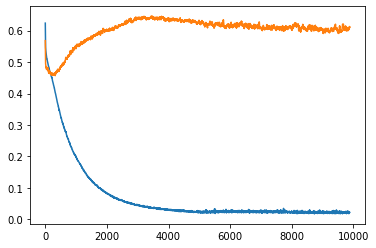

In [160]:
plt.plot(smooth(history['loss'],20)[100:])
plt.plot(smooth(history['val_loss'],20)[100:])

plt.show()

In [161]:
print(np.mean(np.square(y.mean() - y.flatten())))

0.7565715319027951


In [69]:
pred = fp_datamodel.predict(test_dfs[-1].drop('quality',axis=1).to_numpy())
print(np.mean(np.square(pred.flatten() - test_dfs[-1]['quality'].to_numpy().flatten())))
print(np.mean(np.square(test_dfs[0]['quality'].mean() - test_dfs[-1]['quality'].to_numpy().flatten())))

0.8150286108644117
1.58125


In [68]:
pred = fp_datamodel.predict(test_dfs[0].drop('quality',axis=1).to_numpy())
print(np.mean(np.square(pred.flatten() - test_dfs[0]['quality'].to_numpy().flatten())))
print(np.mean(np.square(test_dfs[0]['quality'].mean() - test_dfs[0]['quality'].to_numpy().flatten())))

0.36627927928501364
0.6231343283582089


---

In [314]:
class CWAcc1(tf.keras.metrics.Metric):
    def __init__(self, class_idx, name='classwise_accuracy1', num_classes=10, **kwargs):
        super(CWAcc1, self).__init__(name=name, **kwargs)
        self.num_classes = num_classes
        self.class_idx = class_idx
        self.num_correct = self.add_weight(name='num_correct',initializer='zeros')
        self.num_samples = self.add_weight(name='num_samples',initializer='zeros')

    def update_state(self, y_true, y_pred, sample_weight=None):
        y_true = tf.reshape(tf.cast(y_true, tf.int16),(1,-1))
        y_pred = tf.reshape(tf.cast(tf.argmax(y_pred,axis=1), tf.int16),(1,-1))
                
        count_correct = tf.math.reduce_sum(tf.cast(tf.math.logical_and(
            tf.equal(y_true,y_pred),
            tf.equal(y_true,tf.math.multiply(tf.ones_like(y_true),self.class_idx))
        ),dtype=tf.float32))
        
        count_class = tf.math.reduce_sum(tf.cast(
            tf.equal(y_true,tf.math.multiply(tf.ones_like(y_true),self.class_idx)),
            dtype=tf.float32
        ))
        
        self.num_correct.assign_add(count_correct)
        self.num_samples.assign_add(count_class)

    def result(self):
        return tf.math.divide_no_nan(self.num_correct,self.num_samples)

In [315]:
def smooth(y, box_pts):
    box = np.ones(box_pts)/box_pts
    y_smooth = np.convolve(y, box, mode='same')
    return y_smooth[:-box_pts]

In [316]:
def gen_mask(grads):
    mask = []
    for g in grads:
        size = g.shape[0]
        m = 2
        assert m%1==0

        split = tf.concat([tf.ones(size//m)*i for i in range(m)],0)
        split = tf.random.shuffle(split)
        mask.append(tf.reshape(split,(1,-1)))

    return mask

grads = [tf.random.uniform(((x+1)*2,)) for x in range(10)]

res = gen_mask(grads)
tf.math.multiply(res[2],grads[2])

<tf.Tensor: shape=(1, 6), dtype=float32, numpy=
array([[0.7664722 , 0.        , 0.        , 0.8010844 , 0.26033926,
        0.        ]], dtype=float32)>

In [317]:
import hashlib
import random

class Car():
    def __init__(self,neighbors,p=1.0):
        self.neighbors = neighbors
        self.fwd_q = []
        self.rec_grad = set()
        self.new_grad = []
        self.p = p
        
    def forward(self,lst_cars,):
        for n,c in enumerate(lst_cars):
            if n in self.neighbors:
                for grad in self.fwd_q:
                    if self.p < random.random():
                        c.receive(grad)
                    
    def _hash(self,data):
        bts = str(data).encode('utf-8')#tf.io.serialize_tensor(grad)
        return hashlib.sha256(bts).digest()
    
    def _mark_seen(self,data,hash=False):
        tmp = self._hash(data) if hash else data
        self.rec_grad.add(tmp)
        
    def already_rec(self,grad,):
        hashed = self._hash(grad)
        
        if hashed in self.rec_grad:
            return (True,hashed)
        else:
            return (False,hashed)
        
    def apply_grad(self,grad,hashed,target,):
        self._mark_seen(hashed)
        return [tf.math.add(t,g) for t,g in zip(target,grad)]
    
    def apply_grads(self,target,):
        self.fwd_q=[]
        for g in self.new_grad:
            bl,hashed = self.already_rec(g)
            if not bl:
                target = self.apply_grad(g,hashed,target)
                self.fwd_q.append(g)
        self.new_grad=[]
        return target
    
    def receive(self,grad,):
        self.new_grad.append(grad)
        
    def load(self,grad,):
        self.fwd_q.append(grad)

In [318]:
from tensorflow import keras
from copy import deepcopy
import tensorflow.experimental.numpy as tnp
from sklearn.metrics import confusion_matrix

def cw_acc(y_true,y_pred):
    y_pred = np.argmax(y_pred,axis=1)
    matrix = confusion_matrix(y_true, y_pred)
    return matrix.diagonal()/matrix.sum(axis=1)

def gen_mask(grads,m=2):
    mask = []
    for g in grads:
        size = g.shape[-1]
        assert m%1==0

        split = tf.concat([tf.ones(size//m)*i for i in range(m)],0)
        split = tf.random.shuffle(split)
        mask.append(tf.reshape(split,(1,-1)))

    return mask

class DistMLP(keras.Model):
    def __init__(self,mode='none',p=1.0):
        super(DistMLP, self).__init__()
        self.mod1 = Sequential([
            layers.Dense(64, activation='sigmoid', input_shape=(11,)),
            layers.Dense(32, activation='sigmoid'),
            layers.Dense(16, activation='sigmoid'),
            layers.Dense(1, 'linear')
        ])
        
        self.mod2 = tf.keras.models.clone_model(self.mod1)
        self.mod3 = tf.keras.models.clone_model(self.mod1)
        self.mod4 = tf.keras.models.clone_model(self.mod1)
        
        self.mode=mode
        
        self.cars = [Car([i%2,],p=p) for i in range(1,5)]
        self.gradients = []

    def call(self, data):
        return self.mod1(data)

    def train_step(self, data):
        x1,y1,x2,y2,x3,y3,x4,y4, = data
        with tf.GradientTape() as tape:
            y_pred1 = self.mod1(x1,training=True)
            y_pred2 = self.mod2(x2,training=True)
            y_pred3 = self.mod3(x3,training=True)
            y_pred4 = self.mod4(x4,training=True)
            loss1 = self.compiled_loss(y1,y_pred1)
            loss2 = self.compiled_loss(y2,y_pred2)
            loss3 = self.compiled_loss(y3,y_pred3)
            loss4 = self.compiled_loss(y4,y_pred4)

        grads = tape.gradient([loss1,loss2,loss3,loss4], self.trainable_weights)
        
        if self.mode=='none':
            # Independent Learning
            self.optimizer.apply_gradients(zip(grads, self.trainable_weights))
        elif self.mode=='simple_add':
            # Traditional Federated Learning: https://www.cs.cornell.edu/~shmat/shmat_ccs15.pdf
            temp = [tf.math.divide(tf.math.add_n([grads[n+i*(len(grads)//4)] for i in range(4)]) for n in range(len(grads)//4),4)]
            self.optimizer.apply_gradients(zip([*temp,*temp,*temp,*temp], self.trainable_weights))
        elif self.mode=='djgrad':
            # Proposed Method
            grad_mask = [tf.reshape(m,(-1,)) if len(g.shape)==1 else m for m,g in zip(gen_mask(grads),grads)]
            masked_grads = [tf.math.multiply(g,m) for m,g in zip(grad_mask,grads)]
            new_grads = []
            
            for n,c in enumerate(self.cars):
                i1,i2 = (len(grads)//4)*n,(len(grads)//4)*(n+1)
                new_grads+=c.apply_grads(grads[i1:i2])
                c.load(masked_grads[i1:i2])
                c._mark_seen(masked_grads[i1:i2],True)
                c.forward(self.cars)
                 
            self.optimizer.apply_gradients(zip(
                [tf.math.add(g,n) for g,n in zip(grads,new_grads)],
                self.trainable_weights))
        
        # Need a metric that gives accuracy for each model individually
        for m in self.compiled_metrics._user_metrics:
            m.update_state(tf.concat([y1,y2,y3,y4],0), tf.concat([y_pred1,y_pred2,y_pred3,y_pred4],0),source_array=tf.concat([x1[:,-1],x2[:,-1],x3[:,-1],x4[:,-1]],0))

        return {m.name: m.result() for m in self.compiled_metrics._user_metrics}
    
    def test_step(self, data):
        x, y = data
        
        y_pred1 = self.mod1(x,training=False)
        y_pred2 = self.mod2(x,training=False)
        y_pred3 = self.mod3(x,training=False)
        y_pred4 = self.mod4(x,training=False)
                
        self.compiled_loss(tf.concat([y,y,y,y,],0),tf.concat([y_pred1,y_pred2,y_pred3,y_pred4],0))
        for m in self.compiled_metrics._user_metrics:
            m.update_state(tf.concat([y,y,y,y],0),tf.concat([y_pred1,y_pred2,y_pred3,y_pred4],0),source_array=tf.concat([x[:,-1],x[:,-1],x[:,-1],x[:,-1]],0))

        return {m.name: m.result() for m in self.compiled_metrics._user_metrics}
    
    def reset_metrics(self):
        for m in self.compiled_metrics._user_metrics:
            m.reset_state()
        for m in self.metrics:
            m.reset_state()

In [461]:
class CWMet(tf.keras.metrics.Metric):
    def __init__(self, car_idx, minmax, name='classwise_accuracy', num_cars=4, **kwargs):
        super(CWMet, self).__init__(name=name, **kwargs)
        self.num_cars = num_cars
        self.car_idx = car_idx
        self.minmax = minmax
        self.loss = self.add_weight(name='loss',initializer='zeros')
        self.num_samples = self.add_weight(name='num_samples',initializer='zeros')

    def update_state(self, y_true, y_pred, source_array=None, sample_weight=None):
        y_true = tf.reshape(y_true, (4,-1))[self.car_idx]
        y_pred = tf.reshape(y_pred, (4,-1))[self.car_idx]
        source_array = tf.reshape(source_array, (4,-1))[self.car_idx]

        bl_mask = tf.math.logical_and(
            tf.math.greater_equal(source_array, self.minmax[0]),
            tf.math.greater_equal(self.minmax[1],source_array),
        )
        
#         print(source_array)
        print(y_true.shape,tf.boolean_mask(tf.cast(y_true, tf.float32), bl_mask).shape)
        
        y_true = tf.boolean_mask(tf.cast(y_true, tf.float32), bl_mask)
        y_pred = tf.boolean_mask(tf.cast(y_pred, tf.float32), bl_mask)
        
#         print(np.max(source_array),np.min(source_array),self.minmax,source_array.shape,y_true)
#         print(tf.math.greater_equal(self.minmax[0],source_array))
        
        loss = tf.math.reduce_sum(tf.math.square(y_true-y_pred))

        count_class = tf.math.reduce_sum(tf.cast(bl_mask,dtype=tf.float32))#tf.cast(y_true.get_shape().as_list()[0],dtype=tf.float32)
        
        self.loss.assign_add(loss)
        self.num_samples.assign_add(count_class)

    def result(self):
#         print(self.num_samples)
        return tf.math.divide_no_nan(self.loss,self.num_samples)

In [320]:
min_len = min([x.shape[0] for x in train_dfs])

train_dataset = tf.data.Dataset.from_tensor_slices((
    train_dfs[0].drop('quality',axis=1).to_numpy()[:min_len],
    train_dfs[0]['quality'].to_numpy()[:min_len],
    train_dfs[1].drop('quality',axis=1).to_numpy()[:min_len],
    train_dfs[1]['quality'].to_numpy()[:min_len],
    train_dfs[2].drop('quality',axis=1).to_numpy()[:min_len],
    train_dfs[2]['quality'].to_numpy()[:min_len],
    train_dfs[3].drop('quality',axis=1).to_numpy()[:min_len],
    train_dfs[3]['quality'].to_numpy()[:min_len],
)).shuffle(100).batch(128,True)


test_dataset = tf.data.Dataset.from_tensor_slices((
    np.concatenate((
        test_dfs[0].drop('quality',axis=1).to_numpy(),
        test_dfs[1].drop('quality',axis=1).to_numpy(),
        test_dfs[2].drop('quality',axis=1).to_numpy(),
        test_dfs[3].drop('quality',axis=1).to_numpy(),
    )),
    np.concatenate((
        test_dfs[0]['quality'].to_numpy(),
        test_dfs[1]['quality'].to_numpy(),
        test_dfs[2]['quality'].to_numpy(),
        test_dfs[3]['quality'].to_numpy(),
    ))
)).shuffle(100).batch(128,True)

In [68]:
%%time
tf.random.set_seed(0)

m = DistMLP('none')
m.compile(
    optimizer='adam',
    loss=tf.keras.losses.MeanSquaredError(),
    metrics=[CWMet(ca,(q1,q2),name=f'ca{ca+1}-[{q1},{q2})') for ca,(q1,q2) in product(range(4),zip(quants[:-1],quants[1:]))],
    run_eagerly=True
)


history = m.fit(
    train_dataset,
#     validation_split=0.2,
    epochs=300,
    validation_data=test_dataset
)

# with open(os.path.join(fp_local,'no_sharing.pickle'), 'wb') as handle:
#     pickle.dump(history.history, handle, protocol=pickle.HIGHEST_PROTOCOL)

Epoch 1/300
9/9 [==============================] - 1s 110ms/step - ca1-[8.0,9.5): 35.2617 - ca1-[9.5,10.3): 0.0000e+00 - ca1-[10.3,11.3): 0.0000e+00 - ca1-[11.3,14.9): 0.0000e+00 - ca2-[8.0,9.5): 25.2402 - ca2-[9.5,10.3): 26.1241 - ca2-[10.3,11.3): 0.0000e+00 - ca2-[11.3,14.9): 0.0000e+00 - ca3-[8.0,9.5): 0.0000e+00 - ca3-[9.5,10.3): 26.6720 - ca3-[10.3,11.3): 29.7240 - ca3-[11.3,14.9): 0.0000e+00 - ca4-[8.0,9.5): 0.0000e+00 - ca4-[9.5,10.3): 0.0000e+00 - ca4-[10.3,11.3): 34.3360 - ca4-[11.3,14.9): 36.5978 - val_ca1-[8.0,9.5): 31.5946 - val_ca1-[9.5,10.3): 33.0574 - val_ca1-[10.3,11.3): 37.4782 - val_ca1-[11.3,14.9): 43.8057 - val_ca2-[8.0,9.5): 22.6141 - val_ca2-[9.5,10.3): 23.7830 - val_ca2-[10.3,11.3): 27.5970 - val_ca2-[11.3,14.9): 33.0448 - val_ca3-[8.0,9.5): 21.5477 - val_ca3-[9.5,10.3): 22.6995 - val_ca3-[10.3,11.3): 26.4370 - val_ca3-[11.3,14.9): 31.7492 - val_ca4-[8.0,9.5): 23.0317 - val_ca4-[9.5,10.3): 24.2364 - val_ca4-[10.3,11.3): 28.0360 - val_ca4-[11.3,14.9): 33.4734
Epoc

9/9 [==============================] - 1s 109ms/step - ca1-[8.0,9.5): 7.5480 - ca1-[9.5,10.3): 0.0000e+00 - ca1-[10.3,11.3): 0.0000e+00 - ca1-[11.3,14.9): 0.0000e+00 - ca2-[8.0,9.5): 2.9895 - ca2-[9.5,10.3): 3.4055 - ca2-[10.3,11.3): 0.0000e+00 - ca2-[11.3,14.9): 0.0000e+00 - ca3-[8.0,9.5): 0.0000e+00 - ca3-[9.5,10.3): 2.0038 - ca3-[10.3,11.3): 2.9673 - ca3-[11.3,14.9): 0.0000e+00 - ca4-[8.0,9.5): 0.0000e+00 - ca4-[9.5,10.3): 0.0000e+00 - ca4-[10.3,11.3): 7.2304 - ca4-[11.3,14.9): 8.5130 - val_ca1-[8.0,9.5): 6.9946 - val_ca1-[9.5,10.3): 7.5803 - val_ca1-[10.3,11.3): 9.8452 - val_ca1-[11.3,14.9): 13.1565 - val_ca2-[8.0,9.5): 2.8372 - val_ca2-[9.5,10.3): 3.1275 - val_ca2-[10.3,11.3): 4.6837 - val_ca2-[11.3,14.9): 6.9386 - val_ca3-[8.0,9.5): 1.4187 - val_ca3-[9.5,10.3): 1.5398 - val_ca3-[10.3,11.3): 2.6918 - val_ca3-[11.3,14.9): 4.3458 - val_ca4-[8.0,9.5): 3.5322 - val_ca4-[9.5,10.3): 3.8837 - val_ca4-[10.3,11.3): 5.5876 - val_ca4-[11.3,14.9): 8.0637
Epoch 18/300
9/9 [====================

9/9 [==============================] - 1s 108ms/step - ca1-[8.0,9.5): 3.0526 - ca1-[9.5,10.3): 0.0000e+00 - ca1-[10.3,11.3): 0.0000e+00 - ca1-[11.3,14.9): 0.0000e+00 - ca2-[8.0,9.5): 0.4914 - ca2-[9.5,10.3): 0.7400 - ca2-[10.3,11.3): 0.0000e+00 - ca2-[11.3,14.9): 0.0000e+00 - ca3-[8.0,9.5): 0.0000e+00 - ca3-[9.5,10.3): 0.5125 - ca3-[10.3,11.3): 0.9792 - ca3-[11.3,14.9): 0.0000e+00 - ca4-[8.0,9.5): 0.0000e+00 - ca4-[9.5,10.3): 0.0000e+00 - ca4-[10.3,11.3): 2.2312 - ca4-[11.3,14.9): 2.8257 - val_ca1-[8.0,9.5): 2.8378 - val_ca1-[9.5,10.3): 3.1272 - val_ca1-[10.3,11.3): 4.7068 - val_ca1-[11.3,14.9): 6.9762 - val_ca2-[8.0,9.5): 0.6948 - val_ca2-[9.5,10.3): 0.6502 - val_ca2-[10.3,11.3): 1.4234 - val_ca2-[11.3,14.9): 2.5105 - val_ca3-[8.0,9.5): 0.5799 - val_ca3-[9.5,10.3): 0.4270 - val_ca3-[10.3,11.3): 0.9391 - val_ca3-[11.3,14.9): 1.6438 - val_ca4-[8.0,9.5): 0.7483 - val_ca4-[9.5,10.3): 0.7239 - val_ca4-[10.3,11.3): 1.5461 - val_ca4-[11.3,14.9): 2.7055
Epoch 34/300
9/9 [=====================

9/9 [==============================] - 1s 108ms/step - ca1-[8.0,9.5): 1.3546 - ca1-[9.5,10.3): 0.0000e+00 - ca1-[10.3,11.3): 0.0000e+00 - ca1-[11.3,14.9): 0.0000e+00 - ca2-[8.0,9.5): 0.3606 - ca2-[9.5,10.3): 0.5187 - ca2-[10.3,11.3): 0.0000e+00 - ca2-[11.3,14.9): 0.0000e+00 - ca3-[8.0,9.5): 0.0000e+00 - ca3-[9.5,10.3): 0.5191 - ca3-[10.3,11.3): 0.7453 - ca3-[11.3,14.9): 0.0000e+00 - ca4-[8.0,9.5): 0.0000e+00 - ca4-[9.5,10.3): 0.0000e+00 - ca4-[10.3,11.3): 0.7005 - ca4-[11.3,14.9): 1.1213 - val_ca1-[8.0,9.5): 1.2501 - val_ca1-[9.5,10.3): 1.3429 - val_ca1-[10.3,11.3): 2.4468 - val_ca1-[11.3,14.9): 4.0592 - val_ca2-[8.0,9.5): 0.5789 - val_ca2-[9.5,10.3): 0.4314 - val_ca2-[10.3,11.3): 0.9545 - val_ca2-[11.3,14.9): 1.7011 - val_ca3-[8.0,9.5): 0.7245 - val_ca3-[9.5,10.3): 0.4719 - val_ca3-[10.3,11.3): 0.7412 - val_ca3-[11.3,14.9): 1.1094 - val_ca4-[8.0,9.5): 0.7032 - val_ca4-[9.5,10.3): 0.4590 - val_ca4-[10.3,11.3): 0.7484 - val_ca4-[11.3,14.9): 1.1466
Epoch 50/300
9/9 [=====================

9/9 [==============================] - 1s 112ms/step - ca1-[8.0,9.5): 0.6582 - ca1-[9.5,10.3): 0.0000e+00 - ca1-[10.3,11.3): 0.0000e+00 - ca1-[11.3,14.9): 0.0000e+00 - ca2-[8.0,9.5): 0.3665 - ca2-[9.5,10.3): 0.5193 - ca2-[10.3,11.3): 0.0000e+00 - ca2-[11.3,14.9): 0.0000e+00 - ca3-[8.0,9.5): 0.0000e+00 - ca3-[9.5,10.3): 0.5287 - ca3-[10.3,11.3): 0.7303 - ca3-[11.3,14.9): 0.0000e+00 - ca4-[8.0,9.5): 0.0000e+00 - ca4-[9.5,10.3): 0.0000e+00 - ca4-[10.3,11.3): 0.5399 - ca4-[11.3,14.9): 0.7670 - val_ca1-[8.0,9.5): 0.6725 - val_ca1-[9.5,10.3): 0.6178 - val_ca1-[10.3,11.3): 1.3652 - val_ca1-[11.3,14.9): 2.3901 - val_ca2-[8.0,9.5): 0.5869 - val_ca2-[9.5,10.3): 0.4180 - val_ca2-[10.3,11.3): 0.8896 - val_ca2-[11.3,14.9): 1.5177 - val_ca3-[8.0,9.5): 0.8095 - val_ca3-[9.5,10.3): 0.5285 - val_ca3-[10.3,11.3): 0.7293 - val_ca3-[11.3,14.9): 0.9677 - val_ca4-[8.0,9.5): 1.1347 - val_ca4-[9.5,10.3): 0.7776 - val_ca4-[10.3,11.3): 0.7941 - val_ca4-[11.3,14.9): 0.7674
Epoch 66/300
9/9 [=====================

9/9 [==============================] - 1s 108ms/step - ca1-[8.0,9.5): 0.5312 - ca1-[9.5,10.3): 0.0000e+00 - ca1-[10.3,11.3): 0.0000e+00 - ca1-[11.3,14.9): 0.0000e+00 - ca2-[8.0,9.5): 0.3761 - ca2-[9.5,10.3): 0.5301 - ca2-[10.3,11.3): 0.0000e+00 - ca2-[11.3,14.9): 0.0000e+00 - ca3-[8.0,9.5): 0.0000e+00 - ca3-[9.5,10.3): 0.5802 - ca3-[10.3,11.3): 0.7062 - ca3-[11.3,14.9): 0.0000e+00 - ca4-[8.0,9.5): 0.0000e+00 - ca4-[9.5,10.3): 0.0000e+00 - ca4-[10.3,11.3): 0.5424 - ca4-[11.3,14.9): 0.7051 - val_ca1-[8.0,9.5): 0.5828 - val_ca1-[9.5,10.3): 0.4585 - val_ca1-[10.3,11.3): 1.0450 - val_ca1-[11.3,14.9): 1.8454 - val_ca2-[8.0,9.5): 0.5882 - val_ca2-[9.5,10.3): 0.4173 - val_ca2-[10.3,11.3): 0.8904 - val_ca2-[11.3,14.9): 1.5248 - val_ca3-[8.0,9.5): 0.8323 - val_ca3-[9.5,10.3): 0.5445 - val_ca3-[10.3,11.3): 0.7328 - val_ca3-[11.3,14.9): 0.9508 - val_ca4-[8.0,9.5): 1.4129 - val_ca4-[9.5,10.3): 1.0075 - val_ca4-[10.3,11.3): 0.9088 - val_ca4-[11.3,14.9): 0.7066
Epoch 82/300
9/9 [=====================

9/9 [==============================] - 1s 109ms/step - ca1-[8.0,9.5): 0.5176 - ca1-[9.5,10.3): 0.0000e+00 - ca1-[10.3,11.3): 0.0000e+00 - ca1-[11.3,14.9): 0.0000e+00 - ca2-[8.0,9.5): 0.3748 - ca2-[9.5,10.3): 0.5263 - ca2-[10.3,11.3): 0.0000e+00 - ca2-[11.3,14.9): 0.0000e+00 - ca3-[8.0,9.5): 0.0000e+00 - ca3-[9.5,10.3): 0.5850 - ca3-[10.3,11.3): 0.7278 - ca3-[11.3,14.9): 0.0000e+00 - ca4-[8.0,9.5): 0.0000e+00 - ca4-[9.5,10.3): 0.0000e+00 - ca4-[10.3,11.3): 0.5022 - ca4-[11.3,14.9): 0.6878 - val_ca1-[8.0,9.5): 0.5795 - val_ca1-[9.5,10.3): 0.4287 - val_ca1-[10.3,11.3): 0.9507 - val_ca1-[11.3,14.9): 1.6353 - val_ca2-[8.0,9.5): 0.5887 - val_ca2-[9.5,10.3): 0.4170 - val_ca2-[10.3,11.3): 0.8878 - val_ca2-[11.3,14.9): 1.4997 - val_ca3-[8.0,9.5): 0.8338 - val_ca3-[9.5,10.3): 0.5452 - val_ca3-[10.3,11.3): 0.7322 - val_ca3-[11.3,14.9): 0.9395 - val_ca4-[8.0,9.5): 1.5248 - val_ca4-[9.5,10.3): 1.1024 - val_ca4-[10.3,11.3): 0.9620 - val_ca4-[11.3,14.9): 0.7020
Epoch 98/300
9/9 [=====================

9/9 [==============================] - 1s 111ms/step - ca1-[8.0,9.5): 0.5241 - ca1-[9.5,10.3): 0.0000e+00 - ca1-[10.3,11.3): 0.0000e+00 - ca1-[11.3,14.9): 0.0000e+00 - ca2-[8.0,9.5): 0.3942 - ca2-[9.5,10.3): 0.5172 - ca2-[10.3,11.3): 0.0000e+00 - ca2-[11.3,14.9): 0.0000e+00 - ca3-[8.0,9.5): 0.0000e+00 - ca3-[9.5,10.3): 0.5440 - ca3-[10.3,11.3): 0.7202 - ca3-[11.3,14.9): 0.0000e+00 - ca4-[8.0,9.5): 0.0000e+00 - ca4-[9.5,10.3): 0.0000e+00 - ca4-[10.3,11.3): 0.5378 - ca4-[11.3,14.9): 0.6862 - val_ca1-[8.0,9.5): 0.5821 - val_ca1-[9.5,10.3): 0.4226 - val_ca1-[10.3,11.3): 0.9212 - val_ca1-[11.3,14.9): 1.5904 - val_ca2-[8.0,9.5): 0.5882 - val_ca2-[9.5,10.3): 0.4169 - val_ca2-[10.3,11.3): 0.8867 - val_ca2-[11.3,14.9): 1.5154 - val_ca3-[8.0,9.5): 0.8331 - val_ca3-[9.5,10.3): 0.5442 - val_ca3-[10.3,11.3): 0.7290 - val_ca3-[11.3,14.9): 0.9491 - val_ca4-[8.0,9.5): 1.5592 - val_ca4-[9.5,10.3): 1.1317 - val_ca4-[10.3,11.3): 0.9764 - val_ca4-[11.3,14.9): 0.7087
Epoch 114/300
9/9 [====================

9/9 [==============================] - 1s 109ms/step - ca1-[8.0,9.5): 0.5314 - ca1-[9.5,10.3): 0.0000e+00 - ca1-[10.3,11.3): 0.0000e+00 - ca1-[11.3,14.9): 0.0000e+00 - ca2-[8.0,9.5): 0.3811 - ca2-[9.5,10.3): 0.5318 - ca2-[10.3,11.3): 0.0000e+00 - ca2-[11.3,14.9): 0.0000e+00 - ca3-[8.0,9.5): 0.0000e+00 - ca3-[9.5,10.3): 0.5367 - ca3-[10.3,11.3): 0.7028 - ca3-[11.3,14.9): 0.0000e+00 - ca4-[8.0,9.5): 0.0000e+00 - ca4-[9.5,10.3): 0.0000e+00 - ca4-[10.3,11.3): 0.5709 - ca4-[11.3,14.9): 0.6999 - val_ca1-[8.0,9.5): 0.5830 - val_ca1-[9.5,10.3): 0.4214 - val_ca1-[10.3,11.3): 0.9111 - val_ca1-[11.3,14.9): 1.5641 - val_ca2-[8.0,9.5): 0.5881 - val_ca2-[9.5,10.3): 0.4163 - val_ca2-[10.3,11.3): 0.8811 - val_ca2-[11.3,14.9): 1.5005 - val_ca3-[8.0,9.5): 0.8314 - val_ca3-[9.5,10.3): 0.5419 - val_ca3-[10.3,11.3): 0.7184 - val_ca3-[11.3,14.9): 0.9325 - val_ca4-[8.0,9.5): 1.5664 - val_ca4-[9.5,10.3): 1.1378 - val_ca4-[10.3,11.3): 0.9651 - val_ca4-[11.3,14.9): 0.6899
Epoch 130/300
9/9 [====================

9/9 [==============================] - 1s 111ms/step - ca1-[8.0,9.5): 0.5288 - ca1-[9.5,10.3): 0.0000e+00 - ca1-[10.3,11.3): 0.0000e+00 - ca1-[11.3,14.9): 0.0000e+00 - ca2-[8.0,9.5): 0.3754 - ca2-[9.5,10.3): 0.5276 - ca2-[10.3,11.3): 0.0000e+00 - ca2-[11.3,14.9): 0.0000e+00 - ca3-[8.0,9.5): 0.0000e+00 - ca3-[9.5,10.3): 0.5702 - ca3-[10.3,11.3): 0.7200 - ca3-[11.3,14.9): 0.0000e+00 - ca4-[8.0,9.5): 0.0000e+00 - ca4-[9.5,10.3): 0.0000e+00 - ca4-[10.3,11.3): 0.5562 - ca4-[11.3,14.9): 0.7124 - val_ca1-[8.0,9.5): 0.5830 - val_ca1-[9.5,10.3): 0.4214 - val_ca1-[10.3,11.3): 0.9149 - val_ca1-[11.3,14.9): 1.5902 - val_ca2-[8.0,9.5): 0.5880 - val_ca2-[9.5,10.3): 0.4151 - val_ca2-[10.3,11.3): 0.8815 - val_ca2-[11.3,14.9): 1.5198 - val_ca3-[8.0,9.5): 0.8323 - val_ca3-[9.5,10.3): 0.5417 - val_ca3-[10.3,11.3): 0.7259 - val_ca3-[11.3,14.9): 0.9527 - val_ca4-[8.0,9.5): 1.5657 - val_ca4-[9.5,10.3): 1.1371 - val_ca4-[10.3,11.3): 0.9793 - val_ca4-[11.3,14.9): 0.7098
Epoch 146/300
9/9 [====================

9/9 [==============================] - 1s 109ms/step - ca1-[8.0,9.5): 0.5216 - ca1-[9.5,10.3): 0.0000e+00 - ca1-[10.3,11.3): 0.0000e+00 - ca1-[11.3,14.9): 0.0000e+00 - ca2-[8.0,9.5): 0.3811 - ca2-[9.5,10.3): 0.5163 - ca2-[10.3,11.3): 0.0000e+00 - ca2-[11.3,14.9): 0.0000e+00 - ca3-[8.0,9.5): 0.0000e+00 - ca3-[9.5,10.3): 0.5303 - ca3-[10.3,11.3): 0.7092 - ca3-[11.3,14.9): 0.0000e+00 - ca4-[8.0,9.5): 0.0000e+00 - ca4-[9.5,10.3): 0.0000e+00 - ca4-[10.3,11.3): 0.5668 - ca4-[11.3,14.9): 0.6940 - val_ca1-[8.0,9.5): 0.5832 - val_ca1-[9.5,10.3): 0.4212 - val_ca1-[10.3,11.3): 0.9160 - val_ca1-[11.3,14.9): 1.5911 - val_ca2-[8.0,9.5): 0.5864 - val_ca2-[9.5,10.3): 0.4134 - val_ca2-[10.3,11.3): 0.8817 - val_ca2-[11.3,14.9): 1.5229 - val_ca3-[8.0,9.5): 0.8298 - val_ca3-[9.5,10.3): 0.5382 - val_ca3-[10.3,11.3): 0.7258 - val_ca3-[11.3,14.9): 0.9515 - val_ca4-[8.0,9.5): 1.5670 - val_ca4-[9.5,10.3): 1.1379 - val_ca4-[10.3,11.3): 0.9822 - val_ca4-[11.3,14.9): 0.7027
Epoch 162/300
9/9 [====================

9/9 [==============================] - 1s 110ms/step - ca1-[8.0,9.5): 0.5147 - ca1-[9.5,10.3): 0.0000e+00 - ca1-[10.3,11.3): 0.0000e+00 - ca1-[11.3,14.9): 0.0000e+00 - ca2-[8.0,9.5): 0.3645 - ca2-[9.5,10.3): 0.5025 - ca2-[10.3,11.3): 0.0000e+00 - ca2-[11.3,14.9): 0.0000e+00 - ca3-[8.0,9.5): 0.0000e+00 - ca3-[9.5,10.3): 0.5267 - ca3-[10.3,11.3): 0.6983 - ca3-[11.3,14.9): 0.0000e+00 - ca4-[8.0,9.5): 0.0000e+00 - ca4-[9.5,10.3): 0.0000e+00 - ca4-[10.3,11.3): 0.5633 - ca4-[11.3,14.9): 0.6750 - val_ca1-[8.0,9.5): 0.5830 - val_ca1-[9.5,10.3): 0.4214 - val_ca1-[10.3,11.3): 0.9125 - val_ca1-[11.3,14.9): 1.5572 - val_ca2-[8.0,9.5): 0.5826 - val_ca2-[9.5,10.3): 0.4089 - val_ca2-[10.3,11.3): 0.8723 - val_ca2-[11.3,14.9): 1.4846 - val_ca3-[8.0,9.5): 0.8270 - val_ca3-[9.5,10.3): 0.5289 - val_ca3-[10.3,11.3): 0.7146 - val_ca3-[11.3,14.9): 0.9296 - val_ca4-[8.0,9.5): 1.5665 - val_ca4-[9.5,10.3): 1.1371 - val_ca4-[10.3,11.3): 0.9835 - val_ca4-[11.3,14.9): 0.7054
Epoch 178/300
9/9 [====================

9/9 [==============================] - 1s 111ms/step - ca1-[8.0,9.5): 0.5101 - ca1-[9.5,10.3): 0.0000e+00 - ca1-[10.3,11.3): 0.0000e+00 - ca1-[11.3,14.9): 0.0000e+00 - ca2-[8.0,9.5): 0.3506 - ca2-[9.5,10.3): 0.4979 - ca2-[10.3,11.3): 0.0000e+00 - ca2-[11.3,14.9): 0.0000e+00 - ca3-[8.0,9.5): 0.0000e+00 - ca3-[9.5,10.3): 0.5001 - ca3-[10.3,11.3): 0.6771 - ca3-[11.3,14.9): 0.0000e+00 - ca4-[8.0,9.5): 0.0000e+00 - ca4-[9.5,10.3): 0.0000e+00 - ca4-[10.3,11.3): 0.5251 - ca4-[11.3,14.9): 0.7011 - val_ca1-[8.0,9.5): 0.5832 - val_ca1-[9.5,10.3): 0.4218 - val_ca1-[10.3,11.3): 0.9064 - val_ca1-[11.3,14.9): 1.5792 - val_ca2-[8.0,9.5): 0.5767 - val_ca2-[9.5,10.3): 0.4007 - val_ca2-[10.3,11.3): 0.8576 - val_ca2-[11.3,14.9): 1.5045 - val_ca3-[8.0,9.5): 0.8319 - val_ca3-[9.5,10.3): 0.5118 - val_ca3-[10.3,11.3): 0.6919 - val_ca3-[11.3,14.9): 0.9292 - val_ca4-[8.0,9.5): 1.5621 - val_ca4-[9.5,10.3): 1.1301 - val_ca4-[10.3,11.3): 0.9827 - val_ca4-[11.3,14.9): 0.7049
Epoch 194/300
9/9 [====================

9/9 [==============================] - 1s 110ms/step - ca1-[8.0,9.5): 0.5181 - ca1-[9.5,10.3): 0.0000e+00 - ca1-[10.3,11.3): 0.0000e+00 - ca1-[11.3,14.9): 0.0000e+00 - ca2-[8.0,9.5): 0.3521 - ca2-[9.5,10.3): 0.4810 - ca2-[10.3,11.3): 0.0000e+00 - ca2-[11.3,14.9): 0.0000e+00 - ca3-[8.0,9.5): 0.0000e+00 - ca3-[9.5,10.3): 0.5140 - ca3-[10.3,11.3): 0.6525 - ca3-[11.3,14.9): 0.0000e+00 - ca4-[8.0,9.5): 0.0000e+00 - ca4-[9.5,10.3): 0.0000e+00 - ca4-[10.3,11.3): 0.5845 - ca4-[11.3,14.9): 0.6905 - val_ca1-[8.0,9.5): 0.5830 - val_ca1-[9.5,10.3): 0.4214 - val_ca1-[10.3,11.3): 0.9170 - val_ca1-[11.3,14.9): 1.5972 - val_ca2-[8.0,9.5): 0.5863 - val_ca2-[9.5,10.3): 0.3983 - val_ca2-[10.3,11.3): 0.8428 - val_ca2-[11.3,14.9): 1.4780 - val_ca3-[8.0,9.5): 0.8701 - val_ca3-[9.5,10.3): 0.5244 - val_ca3-[10.3,11.3): 0.6807 - val_ca3-[11.3,14.9): 0.9091 - val_ca4-[8.0,9.5): 1.5679 - val_ca4-[9.5,10.3): 1.1371 - val_ca4-[10.3,11.3): 0.9813 - val_ca4-[11.3,14.9): 0.7144
Epoch 210/300
9/9 [====================

9/9 [==============================] - 1s 109ms/step - ca1-[8.0,9.5): 0.5027 - ca1-[9.5,10.3): 0.0000e+00 - ca1-[10.3,11.3): 0.0000e+00 - ca1-[11.3,14.9): 0.0000e+00 - ca2-[8.0,9.5): 0.3547 - ca2-[9.5,10.3): 0.4698 - ca2-[10.3,11.3): 0.0000e+00 - ca2-[11.3,14.9): 0.0000e+00 - ca3-[8.0,9.5): 0.0000e+00 - ca3-[9.5,10.3): 0.5094 - ca3-[10.3,11.3): 0.6414 - ca3-[11.3,14.9): 0.0000e+00 - ca4-[8.0,9.5): 0.0000e+00 - ca4-[9.5,10.3): 0.0000e+00 - ca4-[10.3,11.3): 0.5243 - ca4-[11.3,14.9): 0.6944 - val_ca1-[8.0,9.5): 0.5830 - val_ca1-[9.5,10.3): 0.4212 - val_ca1-[10.3,11.3): 0.9164 - val_ca1-[11.3,14.9): 1.5962 - val_ca2-[8.0,9.5): 0.5887 - val_ca2-[9.5,10.3): 0.3967 - val_ca2-[10.3,11.3): 0.8338 - val_ca2-[11.3,14.9): 1.4640 - val_ca3-[8.0,9.5): 0.8921 - val_ca3-[9.5,10.3): 0.5309 - val_ca3-[10.3,11.3): 0.6676 - val_ca3-[11.3,14.9): 0.8756 - val_ca4-[8.0,9.5): 1.5687 - val_ca4-[9.5,10.3): 1.1372 - val_ca4-[10.3,11.3): 0.9811 - val_ca4-[11.3,14.9): 0.7084
Epoch 226/300
9/9 [====================

9/9 [==============================] - 1s 110ms/step - ca1-[8.0,9.5): 0.5148 - ca1-[9.5,10.3): 0.0000e+00 - ca1-[10.3,11.3): 0.0000e+00 - ca1-[11.3,14.9): 0.0000e+00 - ca2-[8.0,9.5): 0.3425 - ca2-[9.5,10.3): 0.4595 - ca2-[10.3,11.3): 0.0000e+00 - ca2-[11.3,14.9): 0.0000e+00 - ca3-[8.0,9.5): 0.0000e+00 - ca3-[9.5,10.3): 0.5298 - ca3-[10.3,11.3): 0.6219 - ca3-[11.3,14.9): 0.0000e+00 - ca4-[8.0,9.5): 0.0000e+00 - ca4-[9.5,10.3): 0.0000e+00 - ca4-[10.3,11.3): 0.5781 - ca4-[11.3,14.9): 0.6942 - val_ca1-[8.0,9.5): 0.5828 - val_ca1-[9.5,10.3): 0.4213 - val_ca1-[10.3,11.3): 0.9105 - val_ca1-[11.3,14.9): 1.5646 - val_ca2-[8.0,9.5): 0.5890 - val_ca2-[9.5,10.3): 0.3916 - val_ca2-[10.3,11.3): 0.8249 - val_ca2-[11.3,14.9): 1.4465 - val_ca3-[8.0,9.5): 0.8790 - val_ca3-[9.5,10.3): 0.5121 - val_ca3-[10.3,11.3): 0.6578 - val_ca3-[11.3,14.9): 0.8613 - val_ca4-[8.0,9.5): 1.5633 - val_ca4-[9.5,10.3): 1.1318 - val_ca4-[10.3,11.3): 0.9767 - val_ca4-[11.3,14.9): 0.6926
Epoch 242/300
9/9 [====================

9/9 [==============================] - 1s 111ms/step - ca1-[8.0,9.5): 0.5135 - ca1-[9.5,10.3): 0.0000e+00 - ca1-[10.3,11.3): 0.0000e+00 - ca1-[11.3,14.9): 0.0000e+00 - ca2-[8.0,9.5): 0.3473 - ca2-[9.5,10.3): 0.4375 - ca2-[10.3,11.3): 0.0000e+00 - ca2-[11.3,14.9): 0.0000e+00 - ca3-[8.0,9.5): 0.0000e+00 - ca3-[9.5,10.3): 0.5492 - ca3-[10.3,11.3): 0.6159 - ca3-[11.3,14.9): 0.0000e+00 - ca4-[8.0,9.5): 0.0000e+00 - ca4-[9.5,10.3): 0.0000e+00 - ca4-[10.3,11.3): 0.5854 - ca4-[11.3,14.9): 0.6978 - val_ca1-[8.0,9.5): 0.5829 - val_ca1-[9.5,10.3): 0.4210 - val_ca1-[10.3,11.3): 0.9094 - val_ca1-[11.3,14.9): 1.6048 - val_ca2-[8.0,9.5): 0.5899 - val_ca2-[9.5,10.3): 0.3862 - val_ca2-[10.3,11.3): 0.8063 - val_ca2-[11.3,14.9): 1.4643 - val_ca3-[8.0,9.5): 0.8841 - val_ca3-[9.5,10.3): 0.5140 - val_ca3-[10.3,11.3): 0.6509 - val_ca3-[11.3,14.9): 0.8652 - val_ca4-[8.0,9.5): 1.5619 - val_ca4-[9.5,10.3): 1.1281 - val_ca4-[10.3,11.3): 0.9639 - val_ca4-[11.3,14.9): 0.6993
Epoch 258/300
9/9 [====================

9/9 [==============================] - 1s 110ms/step - ca1-[8.0,9.5): 0.5042 - ca1-[9.5,10.3): 0.0000e+00 - ca1-[10.3,11.3): 0.0000e+00 - ca1-[11.3,14.9): 0.0000e+00 - ca2-[8.0,9.5): 0.3348 - ca2-[9.5,10.3): 0.4346 - ca2-[10.3,11.3): 0.0000e+00 - ca2-[11.3,14.9): 0.0000e+00 - ca3-[8.0,9.5): 0.0000e+00 - ca3-[9.5,10.3): 0.5276 - ca3-[10.3,11.3): 0.5991 - ca3-[11.3,14.9): 0.0000e+00 - ca4-[8.0,9.5): 0.0000e+00 - ca4-[9.5,10.3): 0.0000e+00 - ca4-[10.3,11.3): 0.5477 - ca4-[11.3,14.9): 0.6859 - val_ca1-[8.0,9.5): 0.5837 - val_ca1-[9.5,10.3): 0.4212 - val_ca1-[10.3,11.3): 0.9132 - val_ca1-[11.3,14.9): 1.5695 - val_ca2-[8.0,9.5): 0.5800 - val_ca2-[9.5,10.3): 0.3796 - val_ca2-[10.3,11.3): 0.8065 - val_ca2-[11.3,14.9): 1.4367 - val_ca3-[8.0,9.5): 0.8190 - val_ca3-[9.5,10.3): 0.4782 - val_ca3-[10.3,11.3): 0.6330 - val_ca3-[11.3,14.9): 0.8479 - val_ca4-[8.0,9.5): 1.5632 - val_ca4-[9.5,10.3): 1.1229 - val_ca4-[10.3,11.3): 0.9636 - val_ca4-[11.3,14.9): 0.7023
Epoch 274/300
9/9 [====================

9/9 [==============================] - 1s 109ms/step - ca1-[8.0,9.5): 0.5203 - ca1-[9.5,10.3): 0.0000e+00 - ca1-[10.3,11.3): 0.0000e+00 - ca1-[11.3,14.9): 0.0000e+00 - ca2-[8.0,9.5): 0.3189 - ca2-[9.5,10.3): 0.4111 - ca2-[10.3,11.3): 0.0000e+00 - ca2-[11.3,14.9): 0.0000e+00 - ca3-[8.0,9.5): 0.0000e+00 - ca3-[9.5,10.3): 0.4834 - ca3-[10.3,11.3): 0.5753 - ca3-[11.3,14.9): 0.0000e+00 - ca4-[8.0,9.5): 0.0000e+00 - ca4-[9.5,10.3): 0.0000e+00 - ca4-[10.3,11.3): 0.5311 - ca4-[11.3,14.9): 0.6706 - val_ca1-[8.0,9.5): 0.5827 - val_ca1-[9.5,10.3): 0.4203 - val_ca1-[10.3,11.3): 0.9140 - val_ca1-[11.3,14.9): 1.5787 - val_ca2-[8.0,9.5): 0.5832 - val_ca2-[9.5,10.3): 0.3704 - val_ca2-[10.3,11.3): 0.7697 - val_ca2-[11.3,14.9): 1.3529 - val_ca3-[8.0,9.5): 0.7845 - val_ca3-[9.5,10.3): 0.4751 - val_ca3-[10.3,11.3): 0.6197 - val_ca3-[11.3,14.9): 0.7868 - val_ca4-[8.0,9.5): 1.5325 - val_ca4-[9.5,10.3): 1.0805 - val_ca4-[10.3,11.3): 0.9345 - val_ca4-[11.3,14.9): 0.6815
Epoch 290/300
9/9 [====================

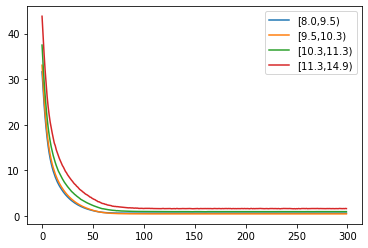

In [69]:
# plt.plot(history.history['loss'])
for k in [k for k in history.history if 'val_ca1' in k]:
    plt.plot(history.history[k], label=k.split('-')[1])
        
plt.legend()
        
plt.show()

In [70]:
pd.DataFrame(
    data=[[history.history[k][-1] if history.history[k][-1]!=0 else '-',history.history['val_'+k][-1]] for k in history.history if 'val' not in k],
    index=[k for k in history.history if 'val' not in k],
    columns=['train','test']
)

,train,test
"ca1-[8.0,9.5)",0.535245,0.581586
"ca1-[9.5,10.3)",-,0.419885
"ca1-[10.3,11.3)",-,0.913556
"ca1-[11.3,14.9)",-,1.583314
"ca2-[8.0,9.5)",0.3199,0.584090
"ca2-[9.5,10.3)",0.401625,0.366941
"ca2-[10.3,11.3)",-,0.753857
"ca2-[11.3,14.9)",-,1.329918
"ca3-[8.0,9.5)",-,0.731701
"ca3-[9.5,10.3)",0.476711,0.452902


In [62]:
%%time
tf.random.set_seed(0)

m = DistMLP('simple_add')
m.compile(
    optimizer='adam',
    loss=tf.keras.losses.MeanSquaredError(),
    metrics=[CWMet(ca,(q1,q2),name=f'ca{ca+1}-[{q1},{q2})') for ca,(q1,q2) in product(range(4),zip(quants[:-1],quants[1:]))],
    run_eagerly=True
)


history = m.fit(
    train_dataset,
#     validation_split=0.2,
    epochs=300,
    validation_data=test_dataset
)

# with open(os.path.join(fp_local,'no_sharing.pickle'), 'wb') as handle:
#     pickle.dump(history.history, handle, protocol=pickle.HIGHEST_PROTOCOL)

Epoch 1/300
9/9 [==============================] - 1s 114ms/step - ca1-[8.0,9.5): 35.7258 - ca1-[9.5,10.3): 0.0000e+00 - ca1-[10.3,11.3): 0.0000e+00 - ca1-[11.3,14.9): 0.0000e+00 - ca2-[8.0,9.5): 25.1393 - ca2-[9.5,10.3): 26.3098 - ca2-[10.3,11.3): 0.0000e+00 - ca2-[11.3,14.9): 0.0000e+00 - ca3-[8.0,9.5): 0.0000e+00 - ca3-[9.5,10.3): 26.9516 - ca3-[10.3,11.3): 30.1896 - ca3-[11.3,14.9): 0.0000e+00 - ca4-[8.0,9.5): 0.0000e+00 - ca4-[9.5,10.3): 0.0000e+00 - ca4-[10.3,11.3): 33.9205 - ca4-[11.3,14.9): 36.9218 - val_ca1-[8.0,9.5): 33.2254 - val_ca1-[9.5,10.3): 34.7467 - val_ca1-[10.3,11.3): 39.3311 - val_ca1-[11.3,14.9): 45.7539 - val_ca2-[8.0,9.5): 23.8989 - val_ca2-[9.5,10.3): 25.1148 - val_ca2-[10.3,11.3): 29.0738 - val_ca2-[11.3,14.9): 34.6114 - val_ca3-[8.0,9.5): 22.7986 - val_ca3-[9.5,10.3): 24.0028 - val_ca3-[10.3,11.3): 27.8744 - val_ca3-[11.3,14.9): 33.2806 - val_ca4-[8.0,9.5): 24.2383 - val_ca4-[9.5,10.3): 25.4981 - val_ca4-[10.3,11.3): 29.4465 - val_ca4-[11.3,14.9): 34.9687
Epoc

9/9 [==============================] - 1s 118ms/step - ca1-[8.0,9.5): 10.8251 - ca1-[9.5,10.3): 0.0000e+00 - ca1-[10.3,11.3): 0.0000e+00 - ca1-[11.3,14.9): 0.0000e+00 - ca2-[8.0,9.5): 5.3723 - ca2-[9.5,10.3): 5.9700 - ca2-[10.3,11.3): 0.0000e+00 - ca2-[11.3,14.9): 0.0000e+00 - ca3-[8.0,9.5): 0.0000e+00 - ca3-[9.5,10.3): 4.7088 - ca3-[10.3,11.3): 6.1380 - ca3-[11.3,14.9): 0.0000e+00 - ca4-[8.0,9.5): 0.0000e+00 - ca4-[9.5,10.3): 0.0000e+00 - ca4-[10.3,11.3): 11.7437 - ca4-[11.3,14.9): 13.3005 - val_ca1-[8.0,9.5): 9.9492 - val_ca1-[9.5,10.3): 10.7503 - val_ca1-[10.3,11.3): 13.4438 - val_ca1-[11.3,14.9): 17.2489 - val_ca2-[8.0,9.5): 4.9951 - val_ca2-[9.5,10.3): 5.4817 - val_ca2-[10.3,11.3): 7.4862 - val_ca2-[11.3,14.9): 10.3245 - val_ca3-[8.0,9.5): 3.4562 - val_ca3-[9.5,10.3): 3.8191 - val_ca3-[10.3,11.3): 5.5219 - val_ca3-[11.3,14.9): 7.9468 - val_ca4-[8.0,9.5): 6.6437 - val_ca4-[9.5,10.3): 7.2253 - val_ca4-[10.3,11.3): 9.4688 - val_ca4-[11.3,14.9): 12.6579
Epoch 18/300
9/9 [=============

9/9 [==============================] - 1s 116ms/step - ca1-[8.0,9.5): 3.4619 - ca1-[9.5,10.3): 0.0000e+00 - ca1-[10.3,11.3): 0.0000e+00 - ca1-[11.3,14.9): 0.0000e+00 - ca2-[8.0,9.5): 0.6303 - ca2-[9.5,10.3): 0.8573 - ca2-[10.3,11.3): 0.0000e+00 - ca2-[11.3,14.9): 0.0000e+00 - ca3-[8.0,9.5): 0.0000e+00 - ca3-[9.5,10.3): 0.7138 - ca3-[10.3,11.3): 1.2482 - ca3-[11.3,14.9): 0.0000e+00 - ca4-[8.0,9.5): 0.0000e+00 - ca4-[9.5,10.3): 0.0000e+00 - ca4-[10.3,11.3): 3.5230 - ca4-[11.3,14.9): 4.3811 - val_ca1-[8.0,9.5): 3.1830 - val_ca1-[9.5,10.3): 3.5322 - val_ca1-[10.3,11.3): 5.2350 - val_ca1-[11.3,14.9): 7.6157 - val_ca2-[8.0,9.5): 0.7593 - val_ca2-[9.5,10.3): 0.7507 - val_ca2-[10.3,11.3): 1.6049 - val_ca2-[11.3,14.9): 2.7799 - val_ca3-[8.0,9.5): 0.6004 - val_ca3-[9.5,10.3): 0.5089 - val_ca3-[10.3,11.3): 1.1659 - val_ca3-[11.3,14.9): 2.0638 - val_ca4-[8.0,9.5): 1.3512 - val_ca4-[9.5,10.3): 1.4657 - val_ca4-[10.3,11.3): 2.6253 - val_ca4-[11.3,14.9): 4.2497
Epoch 34/300
9/9 [=====================

9/9 [==============================] - 1s 112ms/step - ca1-[8.0,9.5): 1.4100 - ca1-[9.5,10.3): 0.0000e+00 - ca1-[10.3,11.3): 0.0000e+00 - ca1-[11.3,14.9): 0.0000e+00 - ca2-[8.0,9.5): 0.3991 - ca2-[9.5,10.3): 0.5279 - ca2-[10.3,11.3): 0.0000e+00 - ca2-[11.3,14.9): 0.0000e+00 - ca3-[8.0,9.5): 0.0000e+00 - ca3-[9.5,10.3): 0.5405 - ca3-[10.3,11.3): 0.7140 - ca3-[11.3,14.9): 0.0000e+00 - ca4-[8.0,9.5): 0.0000e+00 - ca4-[9.5,10.3): 0.0000e+00 - ca4-[10.3,11.3): 1.2185 - ca4-[11.3,14.9): 1.8365 - val_ca1-[8.0,9.5): 1.3332 - val_ca1-[9.5,10.3): 1.4508 - val_ca1-[10.3,11.3): 2.6156 - val_ca1-[11.3,14.9): 4.2059 - val_ca2-[8.0,9.5): 0.6199 - val_ca2-[9.5,10.3): 0.4176 - val_ca2-[10.3,11.3): 0.8138 - val_ca2-[11.3,14.9): 1.3225 - val_ca3-[8.0,9.5): 0.8684 - val_ca3-[9.5,10.3): 0.5655 - val_ca3-[10.3,11.3): 0.7312 - val_ca3-[11.3,14.9): 0.9196 - val_ca4-[8.0,9.5): 0.5808 - val_ca4-[9.5,10.3): 0.4536 - val_ca4-[10.3,11.3): 1.0319 - val_ca4-[11.3,14.9): 1.8033
Epoch 50/300
9/9 [=====================

9/9 [==============================] - 1s 110ms/step - ca1-[8.0,9.5): 0.8236 - ca1-[9.5,10.3): 0.0000e+00 - ca1-[10.3,11.3): 0.0000e+00 - ca1-[11.3,14.9): 0.0000e+00 - ca2-[8.0,9.5): 0.4120 - ca2-[9.5,10.3): 0.5246 - ca2-[10.3,11.3): 0.0000e+00 - ca2-[11.3,14.9): 0.0000e+00 - ca3-[8.0,9.5): 0.0000e+00 - ca3-[9.5,10.3): 0.5368 - ca3-[10.3,11.3): 0.6871 - ca3-[11.3,14.9): 0.0000e+00 - ca4-[8.0,9.5): 0.0000e+00 - ca4-[9.5,10.3): 0.0000e+00 - ca4-[10.3,11.3): 0.7297 - ca4-[11.3,14.9): 1.0846 - val_ca1-[8.0,9.5): 0.8284 - val_ca1-[9.5,10.3): 0.8391 - val_ca1-[10.3,11.3): 1.7460 - val_ca1-[11.3,14.9): 2.9732 - val_ca2-[8.0,9.5): 0.6201 - val_ca2-[9.5,10.3): 0.4144 - val_ca2-[10.3,11.3): 0.8146 - val_ca2-[11.3,14.9): 1.3268 - val_ca3-[8.0,9.5): 0.9107 - val_ca3-[9.5,10.3): 0.5769 - val_ca3-[10.3,11.3): 0.7175 - val_ca3-[11.3,14.9): 0.8695 - val_ca4-[8.0,9.5): 0.7248 - val_ca4-[9.5,10.3): 0.4720 - val_ca4-[10.3,11.3): 0.7455 - val_ca4-[11.3,14.9): 1.0800
Epoch 66/300
9/9 [=====================

9/9 [==============================] - 1s 109ms/step - ca1-[8.0,9.5): 0.6146 - ca1-[9.5,10.3): 0.0000e+00 - ca1-[10.3,11.3): 0.0000e+00 - ca1-[11.3,14.9): 0.0000e+00 - ca2-[8.0,9.5): 0.3967 - ca2-[9.5,10.3): 0.5095 - ca2-[10.3,11.3): 0.0000e+00 - ca2-[11.3,14.9): 0.0000e+00 - ca3-[8.0,9.5): 0.0000e+00 - ca3-[9.5,10.3): 0.5498 - ca3-[10.3,11.3): 0.6959 - ca3-[11.3,14.9): 0.0000e+00 - ca4-[8.0,9.5): 0.0000e+00 - ca4-[9.5,10.3): 0.0000e+00 - ca4-[10.3,11.3): 0.5642 - ca4-[11.3,14.9): 0.8126 - val_ca1-[8.0,9.5): 0.6476 - val_ca1-[9.5,10.3): 0.5886 - val_ca1-[10.3,11.3): 1.3131 - val_ca1-[11.3,14.9): 2.3219 - val_ca2-[8.0,9.5): 0.6132 - val_ca2-[9.5,10.3): 0.4104 - val_ca2-[10.3,11.3): 0.8147 - val_ca2-[11.3,14.9): 1.3547 - val_ca3-[8.0,9.5): 0.9120 - val_ca3-[9.5,10.3): 0.5699 - val_ca3-[10.3,11.3): 0.7118 - val_ca3-[11.3,14.9): 0.8762 - val_ca4-[8.0,9.5): 1.0064 - val_ca4-[9.5,10.3): 0.6754 - val_ca4-[10.3,11.3): 0.7549 - val_ca4-[11.3,14.9): 0.8197
Epoch 82/300
9/9 [=====================

9/9 [==============================] - 1s 109ms/step - ca1-[8.0,9.5): 0.5515 - ca1-[9.5,10.3): 0.0000e+00 - ca1-[10.3,11.3): 0.0000e+00 - ca1-[11.3,14.9): 0.0000e+00 - ca2-[8.0,9.5): 0.3953 - ca2-[9.5,10.3): 0.4987 - ca2-[10.3,11.3): 0.0000e+00 - ca2-[11.3,14.9): 0.0000e+00 - ca3-[8.0,9.5): 0.0000e+00 - ca3-[9.5,10.3): 0.5348 - ca3-[10.3,11.3): 0.6867 - ca3-[11.3,14.9): 0.0000e+00 - ca4-[8.0,9.5): 0.0000e+00 - ca4-[9.5,10.3): 0.0000e+00 - ca4-[10.3,11.3): 0.5186 - ca4-[11.3,14.9): 0.7322 - val_ca1-[8.0,9.5): 0.5921 - val_ca1-[9.5,10.3): 0.4899 - val_ca1-[10.3,11.3): 1.1259 - val_ca1-[11.3,14.9): 1.9602 - val_ca2-[8.0,9.5): 0.6011 - val_ca2-[9.5,10.3): 0.4060 - val_ca2-[10.3,11.3): 0.8313 - val_ca2-[11.3,14.9): 1.3783 - val_ca3-[8.0,9.5): 0.9196 - val_ca3-[9.5,10.3): 0.5713 - val_ca3-[10.3,11.3): 0.7103 - val_ca3-[11.3,14.9): 0.8654 - val_ca4-[8.0,9.5): 1.2291 - val_ca4-[9.5,10.3): 0.8542 - val_ca4-[10.3,11.3): 0.8274 - val_ca4-[11.3,14.9): 0.7388
Epoch 98/300
9/9 [=====================

9/9 [==============================] - 1s 110ms/step - ca1-[8.0,9.5): 0.5249 - ca1-[9.5,10.3): 0.0000e+00 - ca1-[10.3,11.3): 0.0000e+00 - ca1-[11.3,14.9): 0.0000e+00 - ca2-[8.0,9.5): 0.3830 - ca2-[9.5,10.3): 0.4845 - ca2-[10.3,11.3): 0.0000e+00 - ca2-[11.3,14.9): 0.0000e+00 - ca3-[8.0,9.5): 0.0000e+00 - ca3-[9.5,10.3): 0.5224 - ca3-[10.3,11.3): 0.6944 - ca3-[11.3,14.9): 0.0000e+00 - ca4-[8.0,9.5): 0.0000e+00 - ca4-[9.5,10.3): 0.0000e+00 - ca4-[10.3,11.3): 0.5092 - ca4-[11.3,14.9): 0.6965 - val_ca1-[8.0,9.5): 0.5783 - val_ca1-[9.5,10.3): 0.4502 - val_ca1-[10.3,11.3): 1.0247 - val_ca1-[11.3,14.9): 1.7808 - val_ca2-[8.0,9.5): 0.5875 - val_ca2-[9.5,10.3): 0.4007 - val_ca2-[10.3,11.3): 0.8399 - val_ca2-[11.3,14.9): 1.4162 - val_ca3-[8.0,9.5): 0.9187 - val_ca3-[9.5,10.3): 0.5692 - val_ca3-[10.3,11.3): 0.7082 - val_ca3-[11.3,14.9): 0.8679 - val_ca4-[8.0,9.5): 1.3691 - val_ca4-[9.5,10.3): 0.9700 - val_ca4-[10.3,11.3): 0.8851 - val_ca4-[11.3,14.9): 0.7117
Epoch 114/300
9/9 [====================

9/9 [==============================] - 1s 111ms/step - ca1-[8.0,9.5): 0.5283 - ca1-[9.5,10.3): 0.0000e+00 - ca1-[10.3,11.3): 0.0000e+00 - ca1-[11.3,14.9): 0.0000e+00 - ca2-[8.0,9.5): 0.3748 - ca2-[9.5,10.3): 0.4888 - ca2-[10.3,11.3): 0.0000e+00 - ca2-[11.3,14.9): 0.0000e+00 - ca3-[8.0,9.5): 0.0000e+00 - ca3-[9.5,10.3): 0.5488 - ca3-[10.3,11.3): 0.6907 - ca3-[11.3,14.9): 0.0000e+00 - ca4-[8.0,9.5): 0.0000e+00 - ca4-[9.5,10.3): 0.0000e+00 - ca4-[10.3,11.3): 0.5119 - ca4-[11.3,14.9): 0.6880 - val_ca1-[8.0,9.5): 0.5768 - val_ca1-[9.5,10.3): 0.4342 - val_ca1-[10.3,11.3): 0.9736 - val_ca1-[11.3,14.9): 1.7249 - val_ca2-[8.0,9.5): 0.5820 - val_ca2-[9.5,10.3): 0.3976 - val_ca2-[10.3,11.3): 0.8412 - val_ca2-[11.3,14.9): 1.4601 - val_ca3-[8.0,9.5): 0.9126 - val_ca3-[9.5,10.3): 0.5634 - val_ca3-[10.3,11.3): 0.7047 - val_ca3-[11.3,14.9): 0.8951 - val_ca4-[8.0,9.5): 1.4444 - val_ca4-[9.5,10.3): 1.0327 - val_ca4-[10.3,11.3): 0.9187 - val_ca4-[11.3,14.9): 0.7168
Epoch 130/300
9/9 [====================

9/9 [==============================] - 1s 111ms/step - ca1-[8.0,9.5): 0.5276 - ca1-[9.5,10.3): 0.0000e+00 - ca1-[10.3,11.3): 0.0000e+00 - ca1-[11.3,14.9): 0.0000e+00 - ca2-[8.0,9.5): 0.3656 - ca2-[9.5,10.3): 0.4789 - ca2-[10.3,11.3): 0.0000e+00 - ca2-[11.3,14.9): 0.0000e+00 - ca3-[8.0,9.5): 0.0000e+00 - ca3-[9.5,10.3): 0.5128 - ca3-[10.3,11.3): 0.6928 - ca3-[11.3,14.9): 0.0000e+00 - ca4-[8.0,9.5): 0.0000e+00 - ca4-[9.5,10.3): 0.0000e+00 - ca4-[10.3,11.3): 0.5495 - ca4-[11.3,14.9): 0.6888 - val_ca1-[8.0,9.5): 0.5781 - val_ca1-[9.5,10.3): 0.4274 - val_ca1-[10.3,11.3): 0.9513 - val_ca1-[11.3,14.9): 1.6628 - val_ca2-[8.0,9.5): 0.5827 - val_ca2-[9.5,10.3): 0.3948 - val_ca2-[10.3,11.3): 0.8353 - val_ca2-[11.3,14.9): 1.4374 - val_ca3-[8.0,9.5): 0.9045 - val_ca3-[9.5,10.3): 0.5559 - val_ca3-[10.3,11.3): 0.7037 - val_ca3-[11.3,14.9): 0.8901 - val_ca4-[8.0,9.5): 1.4772 - val_ca4-[9.5,10.3): 1.0600 - val_ca4-[10.3,11.3): 0.9389 - val_ca4-[11.3,14.9): 0.7097
Epoch 146/300
9/9 [====================

9/9 [==============================] - 1s 111ms/step - ca1-[8.0,9.5): 0.5222 - ca1-[9.5,10.3): 0.0000e+00 - ca1-[10.3,11.3): 0.0000e+00 - ca1-[11.3,14.9): 0.0000e+00 - ca2-[8.0,9.5): 0.3610 - ca2-[9.5,10.3): 0.4710 - ca2-[10.3,11.3): 0.0000e+00 - ca2-[11.3,14.9): 0.0000e+00 - ca3-[8.0,9.5): 0.0000e+00 - ca3-[9.5,10.3): 0.5297 - ca3-[10.3,11.3): 0.6756 - ca3-[11.3,14.9): 0.0000e+00 - ca4-[8.0,9.5): 0.0000e+00 - ca4-[9.5,10.3): 0.0000e+00 - ca4-[10.3,11.3): 0.5574 - ca4-[11.3,14.9): 0.6948 - val_ca1-[8.0,9.5): 0.5792 - val_ca1-[9.5,10.3): 0.4245 - val_ca1-[10.3,11.3): 0.9367 - val_ca1-[11.3,14.9): 1.6308 - val_ca2-[8.0,9.5): 0.5851 - val_ca2-[9.5,10.3): 0.3947 - val_ca2-[10.3,11.3): 0.8276 - val_ca2-[11.3,14.9): 1.4199 - val_ca3-[8.0,9.5): 0.8926 - val_ca3-[9.5,10.3): 0.5469 - val_ca3-[10.3,11.3): 0.6954 - val_ca3-[11.3,14.9): 0.8858 - val_ca4-[8.0,9.5): 1.4917 - val_ca4-[9.5,10.3): 1.0716 - val_ca4-[10.3,11.3): 0.9423 - val_ca4-[11.3,14.9): 0.7104
Epoch 162/300
9/9 [====================

9/9 [==============================] - 1s 112ms/step - ca1-[8.0,9.5): 0.5116 - ca1-[9.5,10.3): 0.0000e+00 - ca1-[10.3,11.3): 0.0000e+00 - ca1-[11.3,14.9): 0.0000e+00 - ca2-[8.0,9.5): 0.3507 - ca2-[9.5,10.3): 0.4679 - ca2-[10.3,11.3): 0.0000e+00 - ca2-[11.3,14.9): 0.0000e+00 - ca3-[8.0,9.5): 0.0000e+00 - ca3-[9.5,10.3): 0.5301 - ca3-[10.3,11.3): 0.6752 - ca3-[11.3,14.9): 0.0000e+00 - ca4-[8.0,9.5): 0.0000e+00 - ca4-[9.5,10.3): 0.0000e+00 - ca4-[10.3,11.3): 0.5200 - ca4-[11.3,14.9): 0.6812 - val_ca1-[8.0,9.5): 0.5799 - val_ca1-[9.5,10.3): 0.4229 - val_ca1-[10.3,11.3): 0.9249 - val_ca1-[11.3,14.9): 1.6125 - val_ca2-[8.0,9.5): 0.5868 - val_ca2-[9.5,10.3): 0.3930 - val_ca2-[10.3,11.3): 0.8165 - val_ca2-[11.3,14.9): 1.3986 - val_ca3-[8.0,9.5): 0.8880 - val_ca3-[9.5,10.3): 0.5427 - val_ca3-[10.3,11.3): 0.6906 - val_ca3-[11.3,14.9): 0.8779 - val_ca4-[8.0,9.5): 1.5001 - val_ca4-[9.5,10.3): 1.0777 - val_ca4-[10.3,11.3): 0.9468 - val_ca4-[11.3,14.9): 0.7023
Epoch 178/300
9/9 [====================

9/9 [==============================] - 1s 109ms/step - ca1-[8.0,9.5): 0.5121 - ca1-[9.5,10.3): 0.0000e+00 - ca1-[10.3,11.3): 0.0000e+00 - ca1-[11.3,14.9): 0.0000e+00 - ca2-[8.0,9.5): 0.3607 - ca2-[9.5,10.3): 0.4718 - ca2-[10.3,11.3): 0.0000e+00 - ca2-[11.3,14.9): 0.0000e+00 - ca3-[8.0,9.5): 0.0000e+00 - ca3-[9.5,10.3): 0.4961 - ca3-[10.3,11.3): 0.6645 - ca3-[11.3,14.9): 0.0000e+00 - ca4-[8.0,9.5): 0.0000e+00 - ca4-[9.5,10.3): 0.0000e+00 - ca4-[10.3,11.3): 0.5457 - ca4-[11.3,14.9): 0.6923 - val_ca1-[8.0,9.5): 0.5803 - val_ca1-[9.5,10.3): 0.4221 - val_ca1-[10.3,11.3): 0.9259 - val_ca1-[11.3,14.9): 1.5954 - val_ca2-[8.0,9.5): 0.5872 - val_ca2-[9.5,10.3): 0.3919 - val_ca2-[10.3,11.3): 0.8153 - val_ca2-[11.3,14.9): 1.3797 - val_ca3-[8.0,9.5): 0.8677 - val_ca3-[9.5,10.3): 0.5291 - val_ca3-[10.3,11.3): 0.6853 - val_ca3-[11.3,14.9): 0.8774 - val_ca4-[8.0,9.5): 1.5011 - val_ca4-[9.5,10.3): 1.0765 - val_ca4-[10.3,11.3): 0.9427 - val_ca4-[11.3,14.9): 0.7059
Epoch 194/300
9/9 [====================

9/9 [==============================] - 1s 109ms/step - ca1-[8.0,9.5): 0.5192 - ca1-[9.5,10.3): 0.0000e+00 - ca1-[10.3,11.3): 0.0000e+00 - ca1-[11.3,14.9): 0.0000e+00 - ca2-[8.0,9.5): 0.3544 - ca2-[9.5,10.3): 0.4658 - ca2-[10.3,11.3): 0.0000e+00 - ca2-[11.3,14.9): 0.0000e+00 - ca3-[8.0,9.5): 0.0000e+00 - ca3-[9.5,10.3): 0.5083 - ca3-[10.3,11.3): 0.6400 - ca3-[11.3,14.9): 0.0000e+00 - ca4-[8.0,9.5): 0.0000e+00 - ca4-[9.5,10.3): 0.0000e+00 - ca4-[10.3,11.3): 0.5523 - ca4-[11.3,14.9): 0.6754 - val_ca1-[8.0,9.5): 0.5804 - val_ca1-[9.5,10.3): 0.4216 - val_ca1-[10.3,11.3): 0.9196 - val_ca1-[11.3,14.9): 1.6222 - val_ca2-[8.0,9.5): 0.5858 - val_ca2-[9.5,10.3): 0.3915 - val_ca2-[10.3,11.3): 0.8128 - val_ca2-[11.3,14.9): 1.4127 - val_ca3-[8.0,9.5): 0.8755 - val_ca3-[9.5,10.3): 0.5322 - val_ca3-[10.3,11.3): 0.6794 - val_ca3-[11.3,14.9): 0.8754 - val_ca4-[8.0,9.5): 1.4935 - val_ca4-[9.5,10.3): 1.0662 - val_ca4-[10.3,11.3): 0.9352 - val_ca4-[11.3,14.9): 0.7105
Epoch 210/300
9/9 [====================

9/9 [==============================] - 1s 110ms/step - ca1-[8.0,9.5): 0.5174 - ca1-[9.5,10.3): 0.0000e+00 - ca1-[10.3,11.3): 0.0000e+00 - ca1-[11.3,14.9): 0.0000e+00 - ca2-[8.0,9.5): 0.3572 - ca2-[9.5,10.3): 0.4684 - ca2-[10.3,11.3): 0.0000e+00 - ca2-[11.3,14.9): 0.0000e+00 - ca3-[8.0,9.5): 0.0000e+00 - ca3-[9.5,10.3): 0.4781 - ca3-[10.3,11.3): 0.6621 - ca3-[11.3,14.9): 0.0000e+00 - ca4-[8.0,9.5): 0.0000e+00 - ca4-[9.5,10.3): 0.0000e+00 - ca4-[10.3,11.3): 0.5232 - ca4-[11.3,14.9): 0.6636 - val_ca1-[8.0,9.5): 0.5804 - val_ca1-[9.5,10.3): 0.4210 - val_ca1-[10.3,11.3): 0.9179 - val_ca1-[11.3,14.9): 1.5760 - val_ca2-[8.0,9.5): 0.5849 - val_ca2-[9.5,10.3): 0.3898 - val_ca2-[10.3,11.3): 0.8109 - val_ca2-[11.3,14.9): 1.3731 - val_ca3-[8.0,9.5): 0.8538 - val_ca3-[9.5,10.3): 0.5190 - val_ca3-[10.3,11.3): 0.6742 - val_ca3-[11.3,14.9): 0.8578 - val_ca4-[8.0,9.5): 1.5015 - val_ca4-[9.5,10.3): 1.0691 - val_ca4-[10.3,11.3): 0.9335 - val_ca4-[11.3,14.9): 0.7014
Epoch 226/300
9/9 [====================

9/9 [==============================] - 1s 110ms/step - ca1-[8.0,9.5): 0.5164 - ca1-[9.5,10.3): 0.0000e+00 - ca1-[10.3,11.3): 0.0000e+00 - ca1-[11.3,14.9): 0.0000e+00 - ca2-[8.0,9.5): 0.3540 - ca2-[9.5,10.3): 0.4680 - ca2-[10.3,11.3): 0.0000e+00 - ca2-[11.3,14.9): 0.0000e+00 - ca3-[8.0,9.5): 0.0000e+00 - ca3-[9.5,10.3): 0.5119 - ca3-[10.3,11.3): 0.6326 - ca3-[11.3,14.9): 0.0000e+00 - ca4-[8.0,9.5): 0.0000e+00 - ca4-[9.5,10.3): 0.0000e+00 - ca4-[10.3,11.3): 0.5614 - ca4-[11.3,14.9): 0.6677 - val_ca1-[8.0,9.5): 0.5797 - val_ca1-[9.5,10.3): 0.4209 - val_ca1-[10.3,11.3): 0.9180 - val_ca1-[11.3,14.9): 1.6068 - val_ca2-[8.0,9.5): 0.5833 - val_ca2-[9.5,10.3): 0.3888 - val_ca2-[10.3,11.3): 0.8073 - val_ca2-[11.3,14.9): 1.3961 - val_ca3-[8.0,9.5): 0.8354 - val_ca3-[9.5,10.3): 0.5052 - val_ca3-[10.3,11.3): 0.6665 - val_ca3-[11.3,14.9): 0.8765 - val_ca4-[8.0,9.5): 1.5008 - val_ca4-[9.5,10.3): 1.0631 - val_ca4-[10.3,11.3): 0.9235 - val_ca4-[11.3,14.9): 0.7005
Epoch 242/300
9/9 [====================

9/9 [==============================] - 1s 110ms/step - ca1-[8.0,9.5): 0.5236 - ca1-[9.5,10.3): 0.0000e+00 - ca1-[10.3,11.3): 0.0000e+00 - ca1-[11.3,14.9): 0.0000e+00 - ca2-[8.0,9.5): 0.3556 - ca2-[9.5,10.3): 0.4509 - ca2-[10.3,11.3): 0.0000e+00 - ca2-[11.3,14.9): 0.0000e+00 - ca3-[8.0,9.5): 0.0000e+00 - ca3-[9.5,10.3): 0.5106 - ca3-[10.3,11.3): 0.6349 - ca3-[11.3,14.9): 0.0000e+00 - ca4-[8.0,9.5): 0.0000e+00 - ca4-[9.5,10.3): 0.0000e+00 - ca4-[10.3,11.3): 0.5487 - ca4-[11.3,14.9): 0.6704 - val_ca1-[8.0,9.5): 0.5778 - val_ca1-[9.5,10.3): 0.4206 - val_ca1-[10.3,11.3): 0.9330 - val_ca1-[11.3,14.9): 1.6477 - val_ca2-[8.0,9.5): 0.5850 - val_ca2-[9.5,10.3): 0.3877 - val_ca2-[10.3,11.3): 0.8068 - val_ca2-[11.3,14.9): 1.4088 - val_ca3-[8.0,9.5): 0.8279 - val_ca3-[9.5,10.3): 0.5011 - val_ca3-[10.3,11.3): 0.6639 - val_ca3-[11.3,14.9): 0.8805 - val_ca4-[8.0,9.5): 1.5114 - val_ca4-[9.5,10.3): 1.0654 - val_ca4-[10.3,11.3): 0.9197 - val_ca4-[11.3,14.9): 0.6976
Epoch 258/300
9/9 [====================

9/9 [==============================] - 1s 108ms/step - ca1-[8.0,9.5): 0.5146 - ca1-[9.5,10.3): 0.0000e+00 - ca1-[10.3,11.3): 0.0000e+00 - ca1-[11.3,14.9): 0.0000e+00 - ca2-[8.0,9.5): 0.3455 - ca2-[9.5,10.3): 0.4476 - ca2-[10.3,11.3): 0.0000e+00 - ca2-[11.3,14.9): 0.0000e+00 - ca3-[8.0,9.5): 0.0000e+00 - ca3-[9.5,10.3): 0.4760 - ca3-[10.3,11.3): 0.6547 - ca3-[11.3,14.9): 0.0000e+00 - ca4-[8.0,9.5): 0.0000e+00 - ca4-[9.5,10.3): 0.0000e+00 - ca4-[10.3,11.3): 0.5653 - ca4-[11.3,14.9): 0.6717 - val_ca1-[8.0,9.5): 0.5743 - val_ca1-[9.5,10.3): 0.4205 - val_ca1-[10.3,11.3): 0.9315 - val_ca1-[11.3,14.9): 1.6355 - val_ca2-[8.0,9.5): 0.5857 - val_ca2-[9.5,10.3): 0.3865 - val_ca2-[10.3,11.3): 0.7930 - val_ca2-[11.3,14.9): 1.3644 - val_ca3-[8.0,9.5): 0.8094 - val_ca3-[9.5,10.3): 0.4896 - val_ca3-[10.3,11.3): 0.6569 - val_ca3-[11.3,14.9): 0.8694 - val_ca4-[8.0,9.5): 1.5161 - val_ca4-[9.5,10.3): 1.0602 - val_ca4-[10.3,11.3): 0.9129 - val_ca4-[11.3,14.9): 0.6935
Epoch 274/300
9/9 [====================

9/9 [==============================] - 1s 110ms/step - ca1-[8.0,9.5): 0.5109 - ca1-[9.5,10.3): 0.0000e+00 - ca1-[10.3,11.3): 0.0000e+00 - ca1-[11.3,14.9): 0.0000e+00 - ca2-[8.0,9.5): 0.3621 - ca2-[9.5,10.3): 0.4639 - ca2-[10.3,11.3): 0.0000e+00 - ca2-[11.3,14.9): 0.0000e+00 - ca3-[8.0,9.5): 0.0000e+00 - ca3-[9.5,10.3): 0.4868 - ca3-[10.3,11.3): 0.6095 - ca3-[11.3,14.9): 0.0000e+00 - ca4-[8.0,9.5): 0.0000e+00 - ca4-[9.5,10.3): 0.0000e+00 - ca4-[10.3,11.3): 0.5246 - ca4-[11.3,14.9): 0.6555 - val_ca1-[8.0,9.5): 0.5692 - val_ca1-[9.5,10.3): 0.4219 - val_ca1-[10.3,11.3): 0.9532 - val_ca1-[11.3,14.9): 1.6738 - val_ca2-[8.0,9.5): 0.5840 - val_ca2-[9.5,10.3): 0.3874 - val_ca2-[10.3,11.3): 0.7981 - val_ca2-[11.3,14.9): 1.3815 - val_ca3-[8.0,9.5): 0.7872 - val_ca3-[9.5,10.3): 0.4761 - val_ca3-[10.3,11.3): 0.6504 - val_ca3-[11.3,14.9): 0.8636 - val_ca4-[8.0,9.5): 1.5421 - val_ca4-[9.5,10.3): 1.0683 - val_ca4-[10.3,11.3): 0.9046 - val_ca4-[11.3,14.9): 0.6716
Epoch 290/300
9/9 [====================

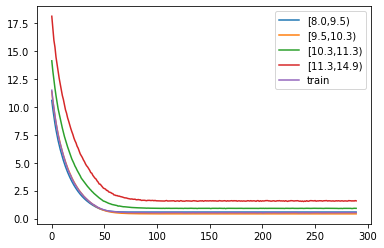

In [79]:
# plt.plot(history.history['loss'])
for k in [k for k in history.history if 'val_ca1' in k]:
    plt.plot(history.history[k][10:], label=k.split('-')[1])

plt.plot(history.history['ca1-[8.0,9.5)'][10:],label='train')

plt.legend()
        
plt.show()

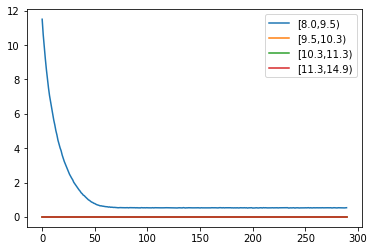

In [77]:
for k in [k for k in history.history if 'val' not in k and 'ca1' in k]:
    plt.plot(history.history[k][10:], label=k.split('-')[1])
        
plt.legend()
        
plt.show()

In [64]:
pd.DataFrame(
    data=[[history.history[k][-1] if history.history[k][-1]!=0 else '-',history.history['val_'+k][-1]] for k in history.history if 'val' not in k],
    index=[k for k in history.history if 'val' not in k],
    columns=['train','test']
)

,train,test
"ca1-[8.0,9.5)",0.509308,0.563342
"ca1-[9.5,10.3)",-,0.423059
"ca1-[10.3,11.3)",-,0.967541
"ca1-[11.3,14.9)",-,1.685692
"ca2-[8.0,9.5)",0.351837,0.581817
"ca2-[9.5,10.3)",0.436321,0.383779
"ca2-[10.3,11.3)",-,0.788647
"ca2-[11.3,14.9)",-,1.341298
"ca3-[8.0,9.5)",-,0.749019
"ca3-[9.5,10.3)",0.51047,0.453644


In [65]:
%%time
tf.random.set_seed(0)

m = DistMLP('djgrad')
m.compile(
    optimizer='adam',
    loss=tf.keras.losses.MeanSquaredError(),
    metrics=[CWMet(ca,(q1,q2),name=f'ca{ca+1}-[{q1},{q2})') for ca,(q1,q2) in product(range(4),zip(quants[:-1],quants[1:]))],
    run_eagerly=True
)


history = m.fit(
    train_dataset,
#     validation_split=0.2,
    epochs=300,
    validation_data=test_dataset
)

# with open(os.path.join(fp_local,'no_sharing.pickle'), 'wb') as handle:
#     pickle.dump(history.history, handle, protocol=pickle.HIGHEST_PROTOCOL)

Epoch 1/300
9/9 [==============================] - 1s 142ms/step - ca1-[8.0,9.5): 35.1123 - ca1-[9.5,10.3): 0.0000e+00 - ca1-[10.3,11.3): 0.0000e+00 - ca1-[11.3,14.9): 0.0000e+00 - ca2-[8.0,9.5): 25.0163 - ca2-[9.5,10.3): 26.0136 - ca2-[10.3,11.3): 0.0000e+00 - ca2-[11.3,14.9): 0.0000e+00 - ca3-[8.0,9.5): 0.0000e+00 - ca3-[9.5,10.3): 26.6120 - ca3-[10.3,11.3): 29.7198 - ca3-[11.3,14.9): 0.0000e+00 - ca4-[8.0,9.5): 0.0000e+00 - ca4-[9.5,10.3): 0.0000e+00 - ca4-[10.3,11.3): 33.9841 - ca4-[11.3,14.9): 36.5683 - val_ca1-[8.0,9.5): 31.5935 - val_ca1-[9.5,10.3): 33.0565 - val_ca1-[10.3,11.3): 37.4844 - val_ca1-[11.3,14.9): 43.8105 - val_ca2-[8.0,9.5): 22.6139 - val_ca2-[9.5,10.3): 23.7827 - val_ca2-[10.3,11.3): 27.6040 - val_ca2-[11.3,14.9): 33.0506 - val_ca3-[8.0,9.5): 21.5493 - val_ca3-[9.5,10.3): 22.7013 - val_ca3-[10.3,11.3): 26.4467 - val_ca3-[11.3,14.9): 31.7575 - val_ca4-[8.0,9.5): 23.0323 - val_ca4-[9.5,10.3): 24.2380 - val_ca4-[10.3,11.3): 28.0444 - val_ca4-[11.3,14.9): 33.4818
Epoc

9/9 [==============================] - 1s 144ms/step - ca1-[8.0,9.5): 7.6133 - ca1-[9.5,10.3): 0.0000e+00 - ca1-[10.3,11.3): 0.0000e+00 - ca1-[11.3,14.9): 0.0000e+00 - ca2-[8.0,9.5): 2.9717 - ca2-[9.5,10.3): 3.4421 - ca2-[10.3,11.3): 0.0000e+00 - ca2-[11.3,14.9): 0.0000e+00 - ca3-[8.0,9.5): 0.0000e+00 - ca3-[9.5,10.3): 2.0031 - ca3-[10.3,11.3): 2.9652 - ca3-[11.3,14.9): 0.0000e+00 - ca4-[8.0,9.5): 0.0000e+00 - ca4-[9.5,10.3): 0.0000e+00 - ca4-[10.3,11.3): 7.3601 - ca4-[11.3,14.9): 8.4864 - val_ca1-[8.0,9.5): 6.9975 - val_ca1-[9.5,10.3): 7.5833 - val_ca1-[10.3,11.3): 9.9007 - val_ca1-[11.3,14.9): 13.1822 - val_ca2-[8.0,9.5): 2.8390 - val_ca2-[9.5,10.3): 3.1295 - val_ca2-[10.3,11.3): 4.7259 - val_ca2-[11.3,14.9): 6.9658 - val_ca3-[8.0,9.5): 1.4188 - val_ca3-[9.5,10.3): 1.5398 - val_ca3-[10.3,11.3): 2.7246 - val_ca3-[11.3,14.9): 4.3714 - val_ca4-[8.0,9.5): 3.5321 - val_ca4-[9.5,10.3): 3.8836 - val_ca4-[10.3,11.3): 5.6299 - val_ca4-[11.3,14.9): 8.0871
Epoch 18/300
9/9 [====================

9/9 [==============================] - 1s 146ms/step - ca1-[8.0,9.5): 3.0746 - ca1-[9.5,10.3): 0.0000e+00 - ca1-[10.3,11.3): 0.0000e+00 - ca1-[11.3,14.9): 0.0000e+00 - ca2-[8.0,9.5): 0.5175 - ca2-[9.5,10.3): 0.7503 - ca2-[10.3,11.3): 0.0000e+00 - ca2-[11.3,14.9): 0.0000e+00 - ca3-[8.0,9.5): 0.0000e+00 - ca3-[9.5,10.3): 0.5426 - ca3-[10.3,11.3): 0.9542 - ca3-[11.3,14.9): 0.0000e+00 - ca4-[8.0,9.5): 0.0000e+00 - ca4-[9.5,10.3): 0.0000e+00 - ca4-[10.3,11.3): 2.2299 - ca4-[11.3,14.9): 2.7964 - val_ca1-[8.0,9.5): 2.8421 - val_ca1-[9.5,10.3): 3.1330 - val_ca1-[10.3,11.3): 4.6513 - val_ca1-[11.3,14.9): 6.9211 - val_ca2-[8.0,9.5): 0.6964 - val_ca2-[9.5,10.3): 0.6517 - val_ca2-[10.3,11.3): 1.3901 - val_ca2-[11.3,14.9): 2.4721 - val_ca3-[8.0,9.5): 0.5811 - val_ca3-[9.5,10.3): 0.4277 - val_ca3-[10.3,11.3): 0.9139 - val_ca3-[11.3,14.9): 1.6117 - val_ca4-[8.0,9.5): 0.7508 - val_ca4-[9.5,10.3): 0.7267 - val_ca4-[10.3,11.3): 1.5132 - val_ca4-[11.3,14.9): 2.6686
Epoch 34/300
9/9 [=====================

9/9 [==============================] - 1s 145ms/step - ca1-[8.0,9.5): 1.3393 - ca1-[9.5,10.3): 0.0000e+00 - ca1-[10.3,11.3): 0.0000e+00 - ca1-[11.3,14.9): 0.0000e+00 - ca2-[8.0,9.5): 0.3708 - ca2-[9.5,10.3): 0.5255 - ca2-[10.3,11.3): 0.0000e+00 - ca2-[11.3,14.9): 0.0000e+00 - ca3-[8.0,9.5): 0.0000e+00 - ca3-[9.5,10.3): 0.4880 - ca3-[10.3,11.3): 0.7427 - ca3-[11.3,14.9): 0.0000e+00 - ca4-[8.0,9.5): 0.0000e+00 - ca4-[9.5,10.3): 0.0000e+00 - ca4-[10.3,11.3): 0.7243 - ca4-[11.3,14.9): 1.1318 - val_ca1-[8.0,9.5): 1.2494 - val_ca1-[9.5,10.3): 1.3421 - val_ca1-[10.3,11.3): 2.4457 - val_ca1-[11.3,14.9): 3.9896 - val_ca2-[8.0,9.5): 0.5789 - val_ca2-[9.5,10.3): 0.4315 - val_ca2-[10.3,11.3): 0.9549 - val_ca2-[11.3,14.9): 1.6638 - val_ca3-[8.0,9.5): 0.7255 - val_ca3-[9.5,10.3): 0.4726 - val_ca3-[10.3,11.3): 0.7409 - val_ca3-[11.3,14.9): 1.0831 - val_ca4-[8.0,9.5): 0.7028 - val_ca4-[9.5,10.3): 0.4588 - val_ca4-[10.3,11.3): 0.7485 - val_ca4-[11.3,14.9): 1.1215
Epoch 50/300
9/9 [=====================

9/9 [==============================] - 1s 142ms/step - ca1-[8.0,9.5): 0.6637 - ca1-[9.5,10.3): 0.0000e+00 - ca1-[10.3,11.3): 0.0000e+00 - ca1-[11.3,14.9): 0.0000e+00 - ca2-[8.0,9.5): 0.3780 - ca2-[9.5,10.3): 0.5080 - ca2-[10.3,11.3): 0.0000e+00 - ca2-[11.3,14.9): 0.0000e+00 - ca3-[8.0,9.5): 0.0000e+00 - ca3-[9.5,10.3): 0.5465 - ca3-[10.3,11.3): 0.7225 - ca3-[11.3,14.9): 0.0000e+00 - ca4-[8.0,9.5): 0.0000e+00 - ca4-[9.5,10.3): 0.0000e+00 - ca4-[10.3,11.3): 0.5251 - ca4-[11.3,14.9): 0.7551 - val_ca1-[8.0,9.5): 0.6728 - val_ca1-[9.5,10.3): 0.6183 - val_ca1-[10.3,11.3): 1.3732 - val_ca1-[11.3,14.9): 2.4033 - val_ca2-[8.0,9.5): 0.5869 - val_ca2-[9.5,10.3): 0.4180 - val_ca2-[10.3,11.3): 0.8938 - val_ca2-[11.3,14.9): 1.5238 - val_ca3-[8.0,9.5): 0.8118 - val_ca3-[9.5,10.3): 0.5301 - val_ca3-[10.3,11.3): 0.7309 - val_ca3-[11.3,14.9): 0.9669 - val_ca4-[8.0,9.5): 1.1330 - val_ca4-[9.5,10.3): 0.7762 - val_ca4-[10.3,11.3): 0.7934 - val_ca4-[11.3,14.9): 0.7662
Epoch 66/300
9/9 [=====================

9/9 [==============================] - 1s 146ms/step - ca1-[8.0,9.5): 0.5246 - ca1-[9.5,10.3): 0.0000e+00 - ca1-[10.3,11.3): 0.0000e+00 - ca1-[11.3,14.9): 0.0000e+00 - ca2-[8.0,9.5): 0.3801 - ca2-[9.5,10.3): 0.5241 - ca2-[10.3,11.3): 0.0000e+00 - ca2-[11.3,14.9): 0.0000e+00 - ca3-[8.0,9.5): 0.0000e+00 - ca3-[9.5,10.3): 0.5473 - ca3-[10.3,11.3): 0.7179 - ca3-[11.3,14.9): 0.0000e+00 - ca4-[8.0,9.5): 0.0000e+00 - ca4-[9.5,10.3): 0.0000e+00 - ca4-[10.3,11.3): 0.5559 - ca4-[11.3,14.9): 0.6907 - val_ca1-[8.0,9.5): 0.5829 - val_ca1-[9.5,10.3): 0.4589 - val_ca1-[10.3,11.3): 1.0462 - val_ca1-[11.3,14.9): 1.8453 - val_ca2-[8.0,9.5): 0.5889 - val_ca2-[9.5,10.3): 0.4170 - val_ca2-[10.3,11.3): 0.8873 - val_ca2-[11.3,14.9): 1.5139 - val_ca3-[8.0,9.5): 0.8316 - val_ca3-[9.5,10.3): 0.5440 - val_ca3-[10.3,11.3): 0.7327 - val_ca3-[11.3,14.9): 0.9434 - val_ca4-[8.0,9.5): 1.4130 - val_ca4-[9.5,10.3): 1.0077 - val_ca4-[10.3,11.3): 0.9088 - val_ca4-[11.3,14.9): 0.6943
Epoch 82/300
9/9 [=====================

9/9 [==============================] - 1s 142ms/step - ca1-[8.0,9.5): 0.5157 - ca1-[9.5,10.3): 0.0000e+00 - ca1-[10.3,11.3): 0.0000e+00 - ca1-[11.3,14.9): 0.0000e+00 - ca2-[8.0,9.5): 0.3755 - ca2-[9.5,10.3): 0.5158 - ca2-[10.3,11.3): 0.0000e+00 - ca2-[11.3,14.9): 0.0000e+00 - ca3-[8.0,9.5): 0.0000e+00 - ca3-[9.5,10.3): 0.5502 - ca3-[10.3,11.3): 0.7218 - ca3-[11.3,14.9): 0.0000e+00 - ca4-[8.0,9.5): 0.0000e+00 - ca4-[9.5,10.3): 0.0000e+00 - ca4-[10.3,11.3): 0.5161 - ca4-[11.3,14.9): 0.6927 - val_ca1-[8.0,9.5): 0.5795 - val_ca1-[9.5,10.3): 0.4287 - val_ca1-[10.3,11.3): 0.9479 - val_ca1-[11.3,14.9): 1.6661 - val_ca2-[8.0,9.5): 0.5889 - val_ca2-[9.5,10.3): 0.4169 - val_ca2-[10.3,11.3): 0.8848 - val_ca2-[11.3,14.9): 1.5264 - val_ca3-[8.0,9.5): 0.8356 - val_ca3-[9.5,10.3): 0.5464 - val_ca3-[10.3,11.3): 0.7330 - val_ca3-[11.3,14.9): 0.9539 - val_ca4-[8.0,9.5): 1.5233 - val_ca4-[9.5,10.3): 1.1011 - val_ca4-[10.3,11.3): 0.9656 - val_ca4-[11.3,14.9): 0.7046
Epoch 98/300
9/9 [=====================

9/9 [==============================] - 1s 145ms/step - ca1-[8.0,9.5): 0.5243 - ca1-[9.5,10.3): 0.0000e+00 - ca1-[10.3,11.3): 0.0000e+00 - ca1-[11.3,14.9): 0.0000e+00 - ca2-[8.0,9.5): 0.3784 - ca2-[9.5,10.3): 0.5140 - ca2-[10.3,11.3): 0.0000e+00 - ca2-[11.3,14.9): 0.0000e+00 - ca3-[8.0,9.5): 0.0000e+00 - ca3-[9.5,10.3): 0.5250 - ca3-[10.3,11.3): 0.7341 - ca3-[11.3,14.9): 0.0000e+00 - ca4-[8.0,9.5): 0.0000e+00 - ca4-[9.5,10.3): 0.0000e+00 - ca4-[10.3,11.3): 0.6011 - ca4-[11.3,14.9): 0.7000 - val_ca1-[8.0,9.5): 0.5820 - val_ca1-[9.5,10.3): 0.4228 - val_ca1-[10.3,11.3): 0.9261 - val_ca1-[11.3,14.9): 1.6129 - val_ca2-[8.0,9.5): 0.5886 - val_ca2-[9.5,10.3): 0.4167 - val_ca2-[10.3,11.3): 0.8893 - val_ca2-[11.3,14.9): 1.5316 - val_ca3-[8.0,9.5): 0.8339 - val_ca3-[9.5,10.3): 0.5447 - val_ca3-[10.3,11.3): 0.7335 - val_ca3-[11.3,14.9): 0.9598 - val_ca4-[8.0,9.5): 1.5594 - val_ca4-[9.5,10.3): 1.1319 - val_ca4-[10.3,11.3): 0.9817 - val_ca4-[11.3,14.9): 0.7110
Epoch 114/300
9/9 [====================

9/9 [==============================] - 1s 142ms/step - ca1-[8.0,9.5): 0.5088 - ca1-[9.5,10.3): 0.0000e+00 - ca1-[10.3,11.3): 0.0000e+00 - ca1-[11.3,14.9): 0.0000e+00 - ca2-[8.0,9.5): 0.3630 - ca2-[9.5,10.3): 0.5064 - ca2-[10.3,11.3): 0.0000e+00 - ca2-[11.3,14.9): 0.0000e+00 - ca3-[8.0,9.5): 0.0000e+00 - ca3-[9.5,10.3): 0.5684 - ca3-[10.3,11.3): 0.7131 - ca3-[11.3,14.9): 0.0000e+00 - ca4-[8.0,9.5): 0.0000e+00 - ca4-[9.5,10.3): 0.0000e+00 - ca4-[10.3,11.3): 0.5644 - ca4-[11.3,14.9): 0.7059 - val_ca1-[8.0,9.5): 0.5827 - val_ca1-[9.5,10.3): 0.4218 - val_ca1-[10.3,11.3): 0.9190 - val_ca1-[11.3,14.9): 1.5843 - val_ca2-[8.0,9.5): 0.5884 - val_ca2-[9.5,10.3): 0.4161 - val_ca2-[10.3,11.3): 0.8858 - val_ca2-[11.3,14.9): 1.5127 - val_ca3-[8.0,9.5): 0.8301 - val_ca3-[9.5,10.3): 0.5409 - val_ca3-[10.3,11.3): 0.7294 - val_ca3-[11.3,14.9): 0.9474 - val_ca4-[8.0,9.5): 1.5660 - val_ca4-[9.5,10.3): 1.1374 - val_ca4-[10.3,11.3): 0.9823 - val_ca4-[11.3,14.9): 0.7018
Epoch 130/300
9/9 [====================

9/9 [==============================] - 1s 141ms/step - ca1-[8.0,9.5): 0.5222 - ca1-[9.5,10.3): 0.0000e+00 - ca1-[10.3,11.3): 0.0000e+00 - ca1-[11.3,14.9): 0.0000e+00 - ca2-[8.0,9.5): 0.3841 - ca2-[9.5,10.3): 0.5136 - ca2-[10.3,11.3): 0.0000e+00 - ca2-[11.3,14.9): 0.0000e+00 - ca3-[8.0,9.5): 0.0000e+00 - ca3-[9.5,10.3): 0.5493 - ca3-[10.3,11.3): 0.7258 - ca3-[11.3,14.9): 0.0000e+00 - ca4-[8.0,9.5): 0.0000e+00 - ca4-[9.5,10.3): 0.0000e+00 - ca4-[10.3,11.3): 0.5910 - ca4-[11.3,14.9): 0.6912 - val_ca1-[8.0,9.5): 0.5831 - val_ca1-[9.5,10.3): 0.4213 - val_ca1-[10.3,11.3): 0.9101 - val_ca1-[11.3,14.9): 1.5829 - val_ca2-[8.0,9.5): 0.5879 - val_ca2-[9.5,10.3): 0.4152 - val_ca2-[10.3,11.3): 0.8777 - val_ca2-[11.3,14.9): 1.5148 - val_ca3-[8.0,9.5): 0.8327 - val_ca3-[9.5,10.3): 0.5419 - val_ca3-[10.3,11.3): 0.7243 - val_ca3-[11.3,14.9): 0.9488 - val_ca4-[8.0,9.5): 1.5699 - val_ca4-[9.5,10.3): 1.1407 - val_ca4-[10.3,11.3): 0.9834 - val_ca4-[11.3,14.9): 0.7091
Epoch 146/300
9/9 [====================

9/9 [==============================] - 1s 143ms/step - ca1-[8.0,9.5): 0.5224 - ca1-[9.5,10.3): 0.0000e+00 - ca1-[10.3,11.3): 0.0000e+00 - ca1-[11.3,14.9): 0.0000e+00 - ca2-[8.0,9.5): 0.3743 - ca2-[9.5,10.3): 0.5204 - ca2-[10.3,11.3): 0.0000e+00 - ca2-[11.3,14.9): 0.0000e+00 - ca3-[8.0,9.5): 0.0000e+00 - ca3-[9.5,10.3): 0.5231 - ca3-[10.3,11.3): 0.7053 - ca3-[11.3,14.9): 0.0000e+00 - ca4-[8.0,9.5): 0.0000e+00 - ca4-[9.5,10.3): 0.0000e+00 - ca4-[10.3,11.3): 0.5613 - ca4-[11.3,14.9): 0.6916 - val_ca1-[8.0,9.5): 0.5831 - val_ca1-[9.5,10.3): 0.4213 - val_ca1-[10.3,11.3): 0.9148 - val_ca1-[11.3,14.9): 1.5969 - val_ca2-[8.0,9.5): 0.5865 - val_ca2-[9.5,10.3): 0.4133 - val_ca2-[10.3,11.3): 0.8793 - val_ca2-[11.3,14.9): 1.5264 - val_ca3-[8.0,9.5): 0.8299 - val_ca3-[9.5,10.3): 0.5378 - val_ca3-[10.3,11.3): 0.7186 - val_ca3-[11.3,14.9): 0.9517 - val_ca4-[8.0,9.5): 1.5659 - val_ca4-[9.5,10.3): 1.1370 - val_ca4-[10.3,11.3): 0.9695 - val_ca4-[11.3,14.9): 0.6988
Epoch 162/300
9/9 [====================

9/9 [==============================] - 1s 141ms/step - ca1-[8.0,9.5): 0.5202 - ca1-[9.5,10.3): 0.0000e+00 - ca1-[10.3,11.3): 0.0000e+00 - ca1-[11.3,14.9): 0.0000e+00 - ca2-[8.0,9.5): 0.3594 - ca2-[9.5,10.3): 0.5040 - ca2-[10.3,11.3): 0.0000e+00 - ca2-[11.3,14.9): 0.0000e+00 - ca3-[8.0,9.5): 0.0000e+00 - ca3-[9.5,10.3): 0.5237 - ca3-[10.3,11.3): 0.6965 - ca3-[11.3,14.9): 0.0000e+00 - ca4-[8.0,9.5): 0.0000e+00 - ca4-[9.5,10.3): 0.0000e+00 - ca4-[10.3,11.3): 0.5434 - ca4-[11.3,14.9): 0.6864 - val_ca1-[8.0,9.5): 0.5832 - val_ca1-[9.5,10.3): 0.4211 - val_ca1-[10.3,11.3): 0.9097 - val_ca1-[11.3,14.9): 1.5499 - val_ca2-[8.0,9.5): 0.5815 - val_ca2-[9.5,10.3): 0.4095 - val_ca2-[10.3,11.3): 0.8754 - val_ca2-[11.3,14.9): 1.4907 - val_ca3-[8.0,9.5): 0.8245 - val_ca3-[9.5,10.3): 0.5256 - val_ca3-[10.3,11.3): 0.7039 - val_ca3-[11.3,14.9): 0.9259 - val_ca4-[8.0,9.5): 1.5680 - val_ca4-[9.5,10.3): 1.1384 - val_ca4-[10.3,11.3): 0.9651 - val_ca4-[11.3,14.9): 0.6979
Epoch 178/300
9/9 [====================

9/9 [==============================] - 1s 141ms/step - ca1-[8.0,9.5): 0.5233 - ca1-[9.5,10.3): 0.0000e+00 - ca1-[10.3,11.3): 0.0000e+00 - ca1-[11.3,14.9): 0.0000e+00 - ca2-[8.0,9.5): 0.3631 - ca2-[9.5,10.3): 0.4863 - ca2-[10.3,11.3): 0.0000e+00 - ca2-[11.3,14.9): 0.0000e+00 - ca3-[8.0,9.5): 0.0000e+00 - ca3-[9.5,10.3): 0.5003 - ca3-[10.3,11.3): 0.6626 - ca3-[11.3,14.9): 0.0000e+00 - ca4-[8.0,9.5): 0.0000e+00 - ca4-[9.5,10.3): 0.0000e+00 - ca4-[10.3,11.3): 0.5669 - ca4-[11.3,14.9): 0.6860 - val_ca1-[8.0,9.5): 0.5830 - val_ca1-[9.5,10.3): 0.4218 - val_ca1-[10.3,11.3): 0.9169 - val_ca1-[11.3,14.9): 1.5662 - val_ca2-[8.0,9.5): 0.5775 - val_ca2-[9.5,10.3): 0.3995 - val_ca2-[10.3,11.3): 0.8620 - val_ca2-[11.3,14.9): 1.4869 - val_ca3-[8.0,9.5): 0.8436 - val_ca3-[9.5,10.3): 0.5208 - val_ca3-[10.3,11.3): 0.6920 - val_ca3-[11.3,14.9): 0.9097 - val_ca4-[8.0,9.5): 1.5651 - val_ca4-[9.5,10.3): 1.1386 - val_ca4-[10.3,11.3): 0.9804 - val_ca4-[11.3,14.9): 0.7045
Epoch 194/300
9/9 [====================

9/9 [==============================] - 1s 143ms/step - ca1-[8.0,9.5): 0.5337 - ca1-[9.5,10.3): 0.0000e+00 - ca1-[10.3,11.3): 0.0000e+00 - ca1-[11.3,14.9): 0.0000e+00 - ca2-[8.0,9.5): 0.3546 - ca2-[9.5,10.3): 0.4784 - ca2-[10.3,11.3): 0.0000e+00 - ca2-[11.3,14.9): 0.0000e+00 - ca3-[8.0,9.5): 0.0000e+00 - ca3-[9.5,10.3): 0.5141 - ca3-[10.3,11.3): 0.6494 - ca3-[11.3,14.9): 0.0000e+00 - ca4-[8.0,9.5): 0.0000e+00 - ca4-[9.5,10.3): 0.0000e+00 - ca4-[10.3,11.3): 0.5696 - ca4-[11.3,14.9): 0.6820 - val_ca1-[8.0,9.5): 0.5830 - val_ca1-[9.5,10.3): 0.4214 - val_ca1-[10.3,11.3): 0.9171 - val_ca1-[11.3,14.9): 1.6174 - val_ca2-[8.0,9.5): 0.5859 - val_ca2-[9.5,10.3): 0.3987 - val_ca2-[10.3,11.3): 0.8398 - val_ca2-[11.3,14.9): 1.4863 - val_ca3-[8.0,9.5): 0.8666 - val_ca3-[9.5,10.3): 0.5201 - val_ca3-[10.3,11.3): 0.6788 - val_ca3-[11.3,14.9): 0.9204 - val_ca4-[8.0,9.5): 1.5659 - val_ca4-[9.5,10.3): 1.1354 - val_ca4-[10.3,11.3): 0.9803 - val_ca4-[11.3,14.9): 0.7166
Epoch 210/300
9/9 [====================

9/9 [==============================] - 1s 142ms/step - ca1-[8.0,9.5): 0.5192 - ca1-[9.5,10.3): 0.0000e+00 - ca1-[10.3,11.3): 0.0000e+00 - ca1-[11.3,14.9): 0.0000e+00 - ca2-[8.0,9.5): 0.3545 - ca2-[9.5,10.3): 0.4725 - ca2-[10.3,11.3): 0.0000e+00 - ca2-[11.3,14.9): 0.0000e+00 - ca3-[8.0,9.5): 0.0000e+00 - ca3-[9.5,10.3): 0.5135 - ca3-[10.3,11.3): 0.6360 - ca3-[11.3,14.9): 0.0000e+00 - ca4-[8.0,9.5): 0.0000e+00 - ca4-[9.5,10.3): 0.0000e+00 - ca4-[10.3,11.3): 0.5457 - ca4-[11.3,14.9): 0.6846 - val_ca1-[8.0,9.5): 0.5831 - val_ca1-[9.5,10.3): 0.4210 - val_ca1-[10.3,11.3): 0.9199 - val_ca1-[11.3,14.9): 1.5419 - val_ca2-[8.0,9.5): 0.5854 - val_ca2-[9.5,10.3): 0.3969 - val_ca2-[10.3,11.3): 0.8401 - val_ca2-[11.3,14.9): 1.4261 - val_ca3-[8.0,9.5): 0.8771 - val_ca3-[9.5,10.3): 0.5183 - val_ca3-[10.3,11.3): 0.6633 - val_ca3-[11.3,14.9): 0.8563 - val_ca4-[8.0,9.5): 1.5602 - val_ca4-[9.5,10.3): 1.1299 - val_ca4-[10.3,11.3): 0.9708 - val_ca4-[11.3,14.9): 0.6986
Epoch 226/300
9/9 [====================

9/9 [==============================] - 1s 143ms/step - ca1-[8.0,9.5): 0.5086 - ca1-[9.5,10.3): 0.0000e+00 - ca1-[10.3,11.3): 0.0000e+00 - ca1-[11.3,14.9): 0.0000e+00 - ca2-[8.0,9.5): 0.3614 - ca2-[9.5,10.3): 0.4522 - ca2-[10.3,11.3): 0.0000e+00 - ca2-[11.3,14.9): 0.0000e+00 - ca3-[8.0,9.5): 0.0000e+00 - ca3-[9.5,10.3): 0.5230 - ca3-[10.3,11.3): 0.6175 - ca3-[11.3,14.9): 0.0000e+00 - ca4-[8.0,9.5): 0.0000e+00 - ca4-[9.5,10.3): 0.0000e+00 - ca4-[10.3,11.3): 0.5768 - ca4-[11.3,14.9): 0.6884 - val_ca1-[8.0,9.5): 0.5831 - val_ca1-[9.5,10.3): 0.4209 - val_ca1-[10.3,11.3): 0.9092 - val_ca1-[11.3,14.9): 1.5469 - val_ca2-[8.0,9.5): 0.5869 - val_ca2-[9.5,10.3): 0.3914 - val_ca2-[10.3,11.3): 0.8232 - val_ca2-[11.3,14.9): 1.4248 - val_ca3-[8.0,9.5): 0.8892 - val_ca3-[9.5,10.3): 0.5182 - val_ca3-[10.3,11.3): 0.6587 - val_ca3-[11.3,14.9): 0.8525 - val_ca4-[8.0,9.5): 1.5631 - val_ca4-[9.5,10.3): 1.1315 - val_ca4-[10.3,11.3): 0.9600 - val_ca4-[11.3,14.9): 0.6854
Epoch 242/300
9/9 [====================

9/9 [==============================] - 1s 143ms/step - ca1-[8.0,9.5): 0.5111 - ca1-[9.5,10.3): 0.0000e+00 - ca1-[10.3,11.3): 0.0000e+00 - ca1-[11.3,14.9): 0.0000e+00 - ca2-[8.0,9.5): 0.3474 - ca2-[9.5,10.3): 0.4365 - ca2-[10.3,11.3): 0.0000e+00 - ca2-[11.3,14.9): 0.0000e+00 - ca3-[8.0,9.5): 0.0000e+00 - ca3-[9.5,10.3): 0.5286 - ca3-[10.3,11.3): 0.6059 - ca3-[11.3,14.9): 0.0000e+00 - ca4-[8.0,9.5): 0.0000e+00 - ca4-[9.5,10.3): 0.0000e+00 - ca4-[10.3,11.3): 0.6119 - ca4-[11.3,14.9): 0.6884 - val_ca1-[8.0,9.5): 0.5826 - val_ca1-[9.5,10.3): 0.4213 - val_ca1-[10.3,11.3): 0.9156 - val_ca1-[11.3,14.9): 1.5725 - val_ca2-[8.0,9.5): 0.5810 - val_ca2-[9.5,10.3): 0.3865 - val_ca2-[10.3,11.3): 0.8227 - val_ca2-[11.3,14.9): 1.4516 - val_ca3-[8.0,9.5): 0.8687 - val_ca3-[9.5,10.3): 0.5004 - val_ca3-[10.3,11.3): 0.6490 - val_ca3-[11.3,14.9): 0.8579 - val_ca4-[8.0,9.5): 1.5602 - val_ca4-[9.5,10.3): 1.1265 - val_ca4-[10.3,11.3): 0.9701 - val_ca4-[11.3,14.9): 0.6967
Epoch 258/300
9/9 [====================

9/9 [==============================] - 1s 142ms/step - ca1-[8.0,9.5): 0.5178 - ca1-[9.5,10.3): 0.0000e+00 - ca1-[10.3,11.3): 0.0000e+00 - ca1-[11.3,14.9): 0.0000e+00 - ca2-[8.0,9.5): 0.3279 - ca2-[9.5,10.3): 0.4138 - ca2-[10.3,11.3): 0.0000e+00 - ca2-[11.3,14.9): 0.0000e+00 - ca3-[8.0,9.5): 0.0000e+00 - ca3-[9.5,10.3): 0.5046 - ca3-[10.3,11.3): 0.6003 - ca3-[11.3,14.9): 0.0000e+00 - ca4-[8.0,9.5): 0.0000e+00 - ca4-[9.5,10.3): 0.0000e+00 - ca4-[10.3,11.3): 0.5812 - ca4-[11.3,14.9): 0.6727 - val_ca1-[8.0,9.5): 0.5828 - val_ca1-[9.5,10.3): 0.4208 - val_ca1-[10.3,11.3): 0.9042 - val_ca1-[11.3,14.9): 1.5570 - val_ca2-[8.0,9.5): 0.5879 - val_ca2-[9.5,10.3): 0.3739 - val_ca2-[10.3,11.3): 0.7671 - val_ca2-[11.3,14.9): 1.3361 - val_ca3-[8.0,9.5): 0.8503 - val_ca3-[9.5,10.3): 0.4952 - val_ca3-[10.3,11.3): 0.6337 - val_ca3-[11.3,14.9): 0.8218 - val_ca4-[8.0,9.5): 1.5570 - val_ca4-[9.5,10.3): 1.1171 - val_ca4-[10.3,11.3): 0.9655 - val_ca4-[11.3,14.9): 0.6888
Epoch 274/300
9/9 [====================

9/9 [==============================] - 1s 143ms/step - ca1-[8.0,9.5): 0.5257 - ca1-[9.5,10.3): 0.0000e+00 - ca1-[10.3,11.3): 0.0000e+00 - ca1-[11.3,14.9): 0.0000e+00 - ca2-[8.0,9.5): 0.3195 - ca2-[9.5,10.3): 0.4177 - ca2-[10.3,11.3): 0.0000e+00 - ca2-[11.3,14.9): 0.0000e+00 - ca3-[8.0,9.5): 0.0000e+00 - ca3-[9.5,10.3): 0.5038 - ca3-[10.3,11.3): 0.5742 - ca3-[11.3,14.9): 0.0000e+00 - ca4-[8.0,9.5): 0.0000e+00 - ca4-[9.5,10.3): 0.0000e+00 - ca4-[10.3,11.3): 0.5641 - ca4-[11.3,14.9): 0.6809 - val_ca1-[8.0,9.5): 0.5826 - val_ca1-[9.5,10.3): 0.4203 - val_ca1-[10.3,11.3): 0.9126 - val_ca1-[11.3,14.9): 1.5599 - val_ca2-[8.0,9.5): 0.5976 - val_ca2-[9.5,10.3): 0.3670 - val_ca2-[10.3,11.3): 0.7195 - val_ca2-[11.3,14.9): 1.2029 - val_ca3-[8.0,9.5): 0.7694 - val_ca3-[9.5,10.3): 0.4556 - val_ca3-[10.3,11.3): 0.6186 - val_ca3-[11.3,14.9): 0.8149 - val_ca4-[8.0,9.5): 1.5331 - val_ca4-[9.5,10.3): 1.0758 - val_ca4-[10.3,11.3): 0.9257 - val_ca4-[11.3,14.9): 0.6747
Epoch 290/300
9/9 [====================

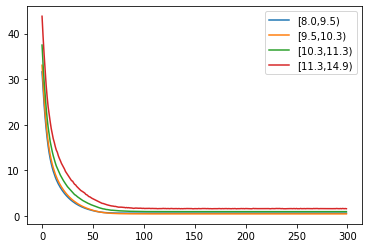

In [66]:
# plt.plot(history.history['loss'])
for k in [k for k in history.history if 'val_ca1' in k]:
    plt.plot(history.history[k], label=k.split('-')[1])
        
plt.legend()
        
plt.show()

In [67]:
pd.DataFrame(
    data=[[history.history[k][-1] if history.history[k][-1]!=0 else '-',history.history['val_'+k][-1]] for k in history.history if 'val' not in k],
    index=[k for k in history.history if 'val' not in k],
    columns=['train','test']
)

,train,test
"ca1-[8.0,9.5)",0.527901,0.581487
"ca1-[9.5,10.3)",-,0.419987
"ca1-[10.3,11.3)",-,0.913848
"ca1-[11.3,14.9)",-,1.557681
"ca2-[8.0,9.5)",0.320806,0.591429
"ca2-[9.5,10.3)",0.394335,0.362250
"ca2-[10.3,11.3)",-,0.714011
"ca2-[11.3,14.9)",-,1.179638
"ca3-[8.0,9.5)",-,0.702616
"ca3-[9.5,10.3)",0.482375,0.427019


---

In [358]:
bike = pd.read_csv(os.path.join(fp_data,'hour.csv'),delimiter=',')
# bike = bike.append(pd.read_csv(os.path.join(fp_data,'winequality-white.csv'),delimiter=';'))
bike = bike.drop(['dteday','instant'],axis=1).sample(frac=1)

In [359]:
bike

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
7764,4,0,11,3,0,5,1,1,0.28,0.2879,0.75,0.1045,0,2,2
15063,4,1,9,20,0,1,1,1,0.52,0.5000,0.52,0.1045,52,380,432
14817,3,1,9,14,0,5,1,2,0.72,0.6515,0.45,0.1642,113,258,371
2467,2,0,4,17,0,0,0,1,0.56,0.5303,0.30,0.4478,143,163,306
17046,4,1,12,1,0,2,1,2,0.44,0.4394,0.94,0.1343,0,15,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10539,1,1,3,6,0,2,1,2,0.52,0.5000,0.94,0.1642,6,94,100
192,1,0,1,7,0,0,0,1,0.08,0.0909,0.53,0.1940,1,5,6
10496,1,1,3,11,0,0,0,2,0.44,0.4394,0.82,0.1642,129,239,368
4576,3,0,7,14,0,4,1,1,0.74,0.6515,0.35,0.2836,49,129,178


/root/anaconda/lib/python3.8/site-packages/pandas/plotting/_matplotlib/tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


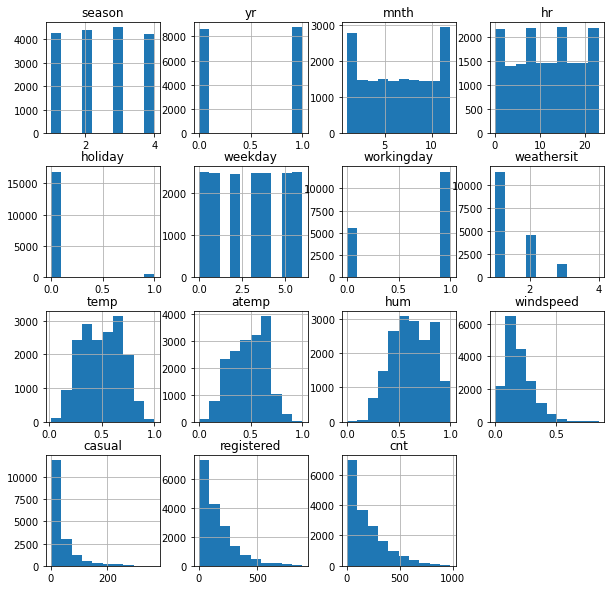

In [360]:
bike.hist(figsize=(10,10))

plt.show()

In [452]:
fp_datamodel = Sequential([
    layers.Dense(128, activation='sigmoid', input_shape=(14,)),
    layers.Dense(32, activation='sigmoid'),
    layers.Dense(8, activation='sigmoid'),
    layers.Dense(1, 'linear')
])

fp_datamodel.compile(
    optimizer='adam',
    loss=tf.keras.losses.MeanSquaredError(
    ),
)

history = defaultdict(list)

x = bike.drop('cnt',axis=1).to_numpy()
y = bike['cnt'].to_numpy()
p = np.random.permutation(y.shape[0])


In [458]:
%%time

x = train_dfs[0].drop('cnt',axis=1).to_numpy()
y = train_dfs[0]['cnt'].to_numpy()
p = np.random.permutation(y.shape[0])

tmp = fp_datamodel.fit(
    x[p],y[p],
    epochs=500,
    validation_split=0.2,
    batch_size=128
)

for k in tmp.history:
    history[k]+=tmp.history[k]

Epoch 1/500
22/22 [==============================] - 0s 2ms/step - loss: 25.2885 - val_loss: 15.4568
Epoch 2/500
22/22 [==============================] - 0s 1ms/step - loss: 25.2652 - val_loss: 15.4149
Epoch 3/500
22/22 [==============================] - 0s 1ms/step - loss: 25.2444 - val_loss: 15.3564
Epoch 4/500
22/22 [==============================] - 0s 1ms/step - loss: 25.0866 - val_loss: 15.2600
Epoch 5/500
22/22 [==============================] - 0s 1ms/step - loss: 25.0133 - val_loss: 15.2100
Epoch 6/500
22/22 [==============================] - 0s 1ms/step - loss: 24.9435 - val_loss: 15.1501
Epoch 7/500
22/22 [==============================] - 0s 1ms/step - loss: 24.8711 - val_loss: 15.1280
Epoch 8/500
22/22 [==============================] - 0s 1ms/step - loss: 24.8091 - val_loss: 15.0073
Epoch 9/500
22/22 [==============================] - 0s 1ms/step - loss: 24.7156 - val_loss: 14.9261
Epoch 10/500
22/22 [==============================] - 0s 1ms/step - loss: 24.6424 - val_los

Epoch 81/500
22/22 [==============================] - 0s 1ms/step - loss: 20.2328 - val_loss: 10.8434
Epoch 82/500
22/22 [==============================] - 0s 1ms/step - loss: 20.1494 - val_loss: 10.7737
Epoch 83/500
22/22 [==============================] - 0s 1ms/step - loss: 20.0954 - val_loss: 10.7392
Epoch 84/500
22/22 [==============================] - 0s 1ms/step - loss: 20.0408 - val_loss: 10.6832
Epoch 85/500
22/22 [==============================] - 0s 1ms/step - loss: 19.9931 - val_loss: 10.6493
Epoch 86/500
22/22 [==============================] - 0s 1ms/step - loss: 19.9393 - val_loss: 10.5699
Epoch 87/500
22/22 [==============================] - 0s 1ms/step - loss: 19.8980 - val_loss: 10.5362
Epoch 88/500
22/22 [==============================] - 0s 1ms/step - loss: 19.8242 - val_loss: 10.4991
Epoch 89/500
22/22 [==============================] - 0s 1ms/step - loss: 19.7625 - val_loss: 10.4341
Epoch 90/500
22/22 [==============================] - 0s 1ms/step - loss: 19.7120 

22/22 [==============================] - 0s 1ms/step - loss: 16.3608 - val_loss: 7.3800
Epoch 161/500
22/22 [==============================] - 0s 993us/step - loss: 16.3441 - val_loss: 7.3292
Epoch 162/500
22/22 [==============================] - 0s 1ms/step - loss: 16.2986 - val_loss: 7.2714
Epoch 163/500
22/22 [==============================] - 0s 1ms/step - loss: 16.2408 - val_loss: 7.2551
Epoch 164/500
22/22 [==============================] - 0s 968us/step - loss: 16.1968 - val_loss: 7.2045
Epoch 165/500
22/22 [==============================] - 0s 1ms/step - loss: 16.1596 - val_loss: 7.1560
Epoch 166/500
22/22 [==============================] - 0s 1ms/step - loss: 16.1456 - val_loss: 7.1503
Epoch 167/500
22/22 [==============================] - 0s 981us/step - loss: 16.0936 - val_loss: 7.0809
Epoch 168/500
22/22 [==============================] - 0s 993us/step - loss: 16.0482 - val_loss: 7.0819
Epoch 169/500
22/22 [==============================] - 0s 1ms/step - loss: 16.0094 - val

22/22 [==============================] - 0s 1ms/step - loss: 13.5154 - val_loss: 4.8137
Epoch 240/500
22/22 [==============================] - 0s 952us/step - loss: 13.4843 - val_loss: 4.7624
Epoch 241/500
22/22 [==============================] - 0s 1ms/step - loss: 13.4484 - val_loss: 4.7349
Epoch 242/500
22/22 [==============================] - 0s 989us/step - loss: 13.4211 - val_loss: 4.7231
Epoch 243/500
22/22 [==============================] - 0s 977us/step - loss: 13.3887 - val_loss: 4.6927
Epoch 244/500
22/22 [==============================] - 0s 973us/step - loss: 13.3606 - val_loss: 4.6585
Epoch 245/500
22/22 [==============================] - 0s 976us/step - loss: 13.3415 - val_loss: 4.6505
Epoch 246/500
22/22 [==============================] - 0s 947us/step - loss: 13.3114 - val_loss: 4.6121
Epoch 247/500
22/22 [==============================] - 0s 1ms/step - loss: 13.2677 - val_loss: 4.5844
Epoch 248/500
22/22 [==============================] - 0s 1ms/step - loss: 13.2365 -

22/22 [==============================] - 0s 992us/step - loss: 11.2178 - val_loss: 2.9384
Epoch 319/500
22/22 [==============================] - 0s 1ms/step - loss: 11.1809 - val_loss: 2.9175
Epoch 320/500
22/22 [==============================] - 0s 1ms/step - loss: 11.1492 - val_loss: 2.8981
Epoch 321/500
22/22 [==============================] - 0s 982us/step - loss: 11.1245 - val_loss: 2.8773
Epoch 322/500
22/22 [==============================] - 0s 1ms/step - loss: 11.0975 - val_loss: 2.8562
Epoch 323/500
22/22 [==============================] - 0s 1ms/step - loss: 11.0725 - val_loss: 2.8384
Epoch 324/500
22/22 [==============================] - 0s 1ms/step - loss: 11.0456 - val_loss: 2.8170
Epoch 325/500
22/22 [==============================] - 0s 960us/step - loss: 11.0184 - val_loss: 2.8017
Epoch 326/500
22/22 [==============================] - 0s 962us/step - loss: 10.9994 - val_loss: 2.7877
Epoch 327/500
22/22 [==============================] - 0s 964us/step - loss: 10.9719 - v

Epoch 398/500
22/22 [==============================] - 0s 1ms/step - loss: 9.3458 - val_loss: 1.7113
Epoch 399/500
22/22 [==============================] - 0s 981us/step - loss: 9.3131 - val_loss: 1.6758
Epoch 400/500
22/22 [==============================] - 0s 965us/step - loss: 9.2927 - val_loss: 1.6588
Epoch 401/500
22/22 [==============================] - 0s 1ms/step - loss: 9.2783 - val_loss: 1.6623
Epoch 402/500
22/22 [==============================] - 0s 958us/step - loss: 9.2748 - val_loss: 1.6449
Epoch 403/500
22/22 [==============================] - 0s 973us/step - loss: 9.2491 - val_loss: 1.6458
Epoch 404/500
22/22 [==============================] - 0s 1ms/step - loss: 9.2148 - val_loss: 1.6156
Epoch 405/500
22/22 [==============================] - 0s 959us/step - loss: 9.1921 - val_loss: 1.6189
Epoch 406/500
22/22 [==============================] - 0s 1ms/step - loss: 9.1765 - val_loss: 1.6078
Epoch 407/500
22/22 [==============================] - 0s 1ms/step - loss: 9.1622

22/22 [==============================] - 0s 976us/step - loss: 7.8872 - val_loss: 0.9345
Epoch 479/500
22/22 [==============================] - 0s 1ms/step - loss: 7.8644 - val_loss: 0.8949
Epoch 480/500
22/22 [==============================] - 0s 1ms/step - loss: 7.8413 - val_loss: 0.8991
Epoch 481/500
22/22 [==============================] - 0s 967us/step - loss: 7.8302 - val_loss: 0.8806
Epoch 482/500
22/22 [==============================] - 0s 982us/step - loss: 7.8191 - val_loss: 1.0044
Epoch 483/500
22/22 [==============================] - 0s 994us/step - loss: 7.8602 - val_loss: 0.8841
Epoch 484/500
22/22 [==============================] - 0s 955us/step - loss: 7.7908 - val_loss: 0.8741
Epoch 485/500
22/22 [==============================] - 0s 1ms/step - loss: 7.7660 - val_loss: 0.8698
Epoch 486/500
22/22 [==============================] - 0s 945us/step - loss: 7.7475 - val_loss: 0.8519
Epoch 487/500
22/22 [==============================] - 0s 952us/step - loss: 7.7291 - val_los

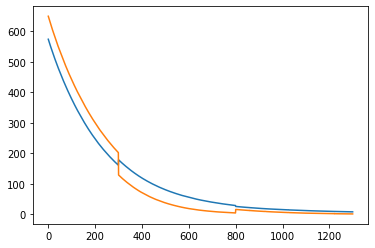

In [459]:
plt.plot(history['loss'][200:])
plt.plot(history['val_loss'][200:])

plt.show()

In [460]:
fp_datamodel.evaluate(
    train_dfs[1].drop('cnt',axis=1).to_numpy(),
    train_dfs[1].drop('cnt',axis=1).to_numpy()
)

109/109 [==============================] - 0s 531us/step - loss: 18170.5566


18170.556640625

In [361]:
res = [bike[(bike['hr']>=sr)&(bike['hr']<=so)] for sr,so in zip(range(0,25,6)[:-1],range(-1,24,6)[1:])]

train_dfs = [q.sample(frac=0.8) for q in res]
test_dfs = [q.drop(t.index) for q,t in zip(res,train_dfs)]

# y_train = [x.pop('cnt') for x in x_train]

In [497]:
from tensorflow import keras
from copy import deepcopy
import tensorflow.experimental.numpy as tnp
from sklearn.metrics import confusion_matrix

def cw_acc(y_true,y_pred):
    y_pred = np.argmax(y_pred,axis=1)
    matrix = confusion_matrix(y_true, y_pred)
    return matrix.diagonal()/matrix.sum(axis=1)

def gen_mask(grads,m=2):
    mask = []
    for g in grads:
        size = g.shape[-1]
        assert m%1==0

        split = tf.concat([tf.ones(size//m)*i for i in range(m)],0)
        split = tf.random.shuffle(split)
        mask.append(tf.reshape(split,(1,-1)))

    return mask

class DistMLP(keras.Model):
    def __init__(self,mode='none',p=1.0):
        super(DistMLP, self).__init__()
        self.mod1 = Sequential([
            layers.Dense(128, activation='sigmoid', input_shape=(14,)),
            layers.Dense(32, activation='sigmoid'),
            layers.Dense(8, activation='sigmoid'),
            layers.Dense(1, 'linear')
        ])
        
        self.mod2 = tf.keras.models.clone_model(self.mod1)
        self.mod3 = tf.keras.models.clone_model(self.mod1)
        self.mod4 = tf.keras.models.clone_model(self.mod1)
        
        self.mode=mode
        
        self.cars = [Car([i%2,],p=p) for i in range(1,5)]
        self.gradients = []

    def call(self, data):
        return self.mod1(data)

    def train_step(self, data):
        x1,y1,x2,y2,x3,y3,x4,y4, = data
        with tf.GradientTape() as tape:
            y_pred1 = self.mod1(x1,training=True)
            y_pred2 = self.mod2(x2,training=True)
            y_pred3 = self.mod3(x3,training=True)
            y_pred4 = self.mod4(x4,training=True)
            loss1 = self.compiled_loss(y1,y_pred1)
            loss2 = self.compiled_loss(y2,y_pred2)
            loss3 = self.compiled_loss(y3,y_pred3)
            loss4 = self.compiled_loss(y4,y_pred4)

        grads = tape.gradient([loss1,loss2,loss3,loss4], self.trainable_weights)
        
        if self.mode=='none':
            self.optimizer.apply_gradients(zip(grads, self.trainable_weights))
        elif self.mode=='simple_add':
            temp = [tf.math.add_n([grads[n+i*(len(grads)//4)] for i in range(4)]) for n in range(len(grads)//4)]
            self.optimizer.apply_gradients(zip([*temp,*temp,*temp,*temp], self.trainable_weights))
        elif self.mode=='djgrad':
            grad_mask = [tf.reshape(m,(-1,)) if len(g.shape)==1 else m for m,g in zip(gen_mask(grads),grads)]
            masked_grads = [tf.math.multiply(g,m) for m,g in zip(grad_mask,grads)]
            new_grads = []
            
            for n,c in enumerate(self.cars):
                i1,i2 = (len(grads)//4)*n,(len(grads)//4)*(n+1)
                new_grads+=c.apply_grads(grads[i1:i2])
                c.load(masked_grads[i1:i2])
                c._mark_seen(masked_grads[i1:i2],True)
                c.forward(self.cars)
                 
            self.optimizer.apply_gradients(zip(
                [tf.math.add(g,n) for g,n in zip(grads,new_grads)],
                self.trainable_weights))
        
        # Need a metric that gives accuracy for each model individually
        for m in self.compiled_metrics._user_metrics:
            m.update_state(tf.concat([y1,y2,y3,y4],0), tf.concat([y_pred1,y_pred2,y_pred3,y_pred4],0),source_array=tf.concat([x1[:,3],x2[:,3],x3[:,3],x4[:,3]],0))

        res = {k.name:k.result() for k in self.compiled_loss.metrics}
    
        res.update({m.name: m.result() for m in self.compiled_metrics._user_metrics})
            
        return res
    
    # Need to add loss here as well
    def test_step(self, data):
        x, y = data
        
        y_pred1 = self.mod1(x,training=False)
        y_pred2 = self.mod2(x,training=False)
        y_pred3 = self.mod3(x,training=False)
        y_pred4 = self.mod4(x,training=False)
                
        self.compiled_loss(tf.concat([y,y,y,y,],0),tf.concat([y_pred1,y_pred2,y_pred3,y_pred4],0))
        for m in self.compiled_metrics._user_metrics:
            m.update_state(tf.concat([y,y,y,y],0),tf.concat([y_pred1,y_pred2,y_pred3,y_pred4],0),source_array=tf.concat([x[:,3],x[:,3],x[:,3],x[:,3]],0))

        return {m.name: m.result() for m in self.compiled_metrics._user_metrics}
    
    def reset_metrics(self):
        for m in self.compiled_metrics._user_metrics:
            m.reset_state()
        for m in self.metrics:
            m.reset_state()
        for m in self.compiled_loss.metrics:
            m.reset_state()

In [506]:
class CWMet(tf.keras.metrics.Metric):
    def __init__(self, car_idx, minmax, name='classwise_accuracy', num_cars=4, **kwargs):
        super(CWMet, self).__init__(name=name, **kwargs)
        self.num_cars = num_cars
        self.car_idx = car_idx
        self.minmax = minmax
        self.loss = self.add_weight(name='loss',initializer='zeros')
        self.num_samples = self.add_weight(name='num_samples',initializer='zeros')

    def update_state(self, y_true, y_pred, source_array=None, sample_weight=None):
        y_true = tf.cast(tf.reshape(y_true, (4,-1))[self.car_idx], tf.float32)
        y_pred = tf.cast(tf.reshape(y_pred, (4,-1))[self.car_idx], tf.float32)
        source_array = tf.reshape(source_array, (4,-1))[self.car_idx]

        bl_mask = tf.math.logical_and(
            tf.math.greater_equal(source_array, self.minmax[0]),
            tf.math.greater_equal(self.minmax[1],source_array),
        )
        
#         print(source_array.shape, tf.math.reduce_min(source_array),tf.math.reduce_max(source_array))
        
#         print(source_array)
#         print(y_true.shape,tf.boolean_mask(tf.cast(y_true, tf.float32), bl_mask).shape)
        
        y_true = tf.boolean_mask(tf.cast(y_true, tf.float32), bl_mask)
        y_pred = tf.boolean_mask(tf.cast(y_pred, tf.float32), bl_mask)
        
#         print(np.max(source_array),np.min(source_array),self.minmax,source_array.shape,y_true)
#         print(tf.math.greater_equal(self.minmax[0],source_array))
        
        loss = tf.math.reduce_sum(tf.math.square(y_true-y_pred))

        count_class = tf.math.reduce_sum(tf.cast(bl_mask,dtype=tf.float32))#tf.cast(y_true.get_shape().as_list()[0],dtype=tf.float32)
        
        self.loss.assign_add(loss)
        self.num_samples.assign_add(count_class)

    def result(self):
#         print(self.num_samples)
        return tf.math.divide_no_nan(self.loss,self.num_samples)

In [507]:
min_len = min([x.shape[0] for x in train_dfs])

train_dataset = tf.data.Dataset.from_tensor_slices((
    train_dfs[0].drop('cnt',axis=1).to_numpy()[:min_len],
    train_dfs[0]['cnt'].to_numpy()[:min_len],
    train_dfs[1].drop('cnt',axis=1).to_numpy()[:min_len],
    train_dfs[1]['cnt'].to_numpy()[:min_len],
    train_dfs[2].drop('cnt',axis=1).to_numpy()[:min_len],
    train_dfs[2]['cnt'].to_numpy()[:min_len],
    train_dfs[3].drop('cnt',axis=1).to_numpy()[:min_len],
    train_dfs[3]['cnt'].to_numpy()[:min_len],
)).shuffle(100).batch(128,True)


test_dataset = tf.data.Dataset.from_tensor_slices((
    np.concatenate((
        test_dfs[0].drop('cnt',axis=1).to_numpy(),
        test_dfs[1].drop('cnt',axis=1).to_numpy(),
        test_dfs[2].drop('cnt',axis=1).to_numpy(),
        test_dfs[3].drop('cnt',axis=1).to_numpy(),
    )),
    np.concatenate((
        test_dfs[0]['cnt'].to_numpy(),
        test_dfs[1]['cnt'].to_numpy(),
        test_dfs[2]['cnt'].to_numpy(),
        test_dfs[3]['cnt'].to_numpy(),
    ))
)).shuffle(100).batch(128,True)

In [508]:
tf.random.set_seed(0)

m = DistMLP('none')
m.compile(
    optimizer='adam',
    loss=tf.keras.losses.MeanSquaredError(),
    metrics=[CWMet(ca,(q1,q2),name=f'ca{ca+1}-[{q1},{q2}]') for ca,(q1,q2) in product(range(4),zip(range(0,25,6)[:-1],range(-1,24,6)[1:]))],
    run_eagerly=True
)

history = defaultdict(list)

In [509]:
%%time
tmp = m.fit(
    train_dataset,
    epochs=100,
    validation_data=test_dataset
)

for k in tmp.history:
    history[k]+=tmp.history[k]

Epoch 1/100
26/26 [==============================] - 3s 118ms/step - loss: 69440.9375 - ca1-[0,5]: 1380.8282 - ca1-[6,11]: 0.0000e+00 - ca1-[12,17]: 0.0000e+00 - ca1-[18,23]: 0.0000e+00 - ca2-[0,5]: 0.0000e+00 - ca2-[6,11]: 73177.2948 - ca2-[12,17]: 0.0000e+00 - ca2-[18,23]: 0.0000e+00 - ca3-[0,5]: 0.0000e+00 - ca3-[6,11]: 0.0000e+00 - ca3-[12,17]: 125378.7755 - ca3-[18,23]: 0.0000e+00 - ca4-[0,5]: 0.0000e+00 - ca4-[6,11]: 0.0000e+00 - ca4-[12,17]: 0.0000e+00 - ca4-[18,23]: 83991.7766 - val_ca1-[0,5]: 1548.2408 - val_ca1-[6,11]: 65430.5742 - val_ca1-[12,17]: 111161.9531 - val_ca1-[18,23]: 79718.3359 - val_ca2-[0,5]: 1524.4581 - val_ca2-[6,11]: 65232.0078 - val_ca2-[12,17]: 110886.1250 - val_ca2-[18,23]: 79497.6328 - val_ca3-[0,5]: 1521.6747 - val_ca3-[6,11]: 65218.0586 - val_ca3-[12,17]: 110865.6328 - val_ca3-[18,23]: 79485.1016 - val_ca4-[0,5]: 1538.1637 - val_ca4-[6,11]: 65346.4727 - val_ca4-[12,17]: 111048.0156 - val_ca4-[18,23]: 79626.4375
Epoch 2/100
26/26 [=======================

Epoch 10/100
26/26 [==============================] - 3s 115ms/step - loss: 68144.1797 - ca1-[0,5]: 1312.9534 - ca1-[6,11]: 0.0000e+00 - ca1-[12,17]: 0.0000e+00 - ca1-[18,23]: 0.0000e+00 - ca2-[0,5]: 0.0000e+00 - ca2-[6,11]: 71673.3443 - ca2-[12,17]: 0.0000e+00 - ca2-[18,23]: 0.0000e+00 - ca3-[0,5]: 0.0000e+00 - ca3-[6,11]: 0.0000e+00 - ca3-[12,17]: 123572.3293 - ca3-[18,23]: 0.0000e+00 - ca4-[0,5]: 0.0000e+00 - ca4-[6,11]: 0.0000e+00 - ca4-[12,17]: 0.0000e+00 - ca4-[18,23]: 80311.6398 - val_ca1-[0,5]: 1480.5453 - val_ca1-[6,11]: 64859.2031 - val_ca1-[12,17]: 110366.1406 - val_ca1-[18,23]: 80133.4766 - val_ca2-[0,5]: 1406.0369 - val_ca2-[6,11]: 64200.3750 - val_ca2-[12,17]: 109439.5703 - val_ca2-[18,23]: 79399.0625 - val_ca3-[0,5]: 1413.3918 - val_ca3-[6,11]: 64267.3398 - val_ca3-[12,17]: 109533.8125 - val_ca3-[18,23]: 79473.7266 - val_ca4-[0,5]: 1414.7838 - val_ca4-[6,11]: 64279.9766 - val_ca4-[12,17]: 109551.6562 - val_ca4-[18,23]: 79487.8281
Epoch 11/100
26/26 [=====================

Epoch 19/100
26/26 [==============================] - 3s 117ms/step - loss: 67257.3828 - ca1-[0,5]: 1268.5693 - ca1-[6,11]: 0.0000e+00 - ca1-[12,17]: 0.0000e+00 - ca1-[18,23]: 0.0000e+00 - ca2-[0,5]: 0.0000e+00 - ca2-[6,11]: 71030.9728 - ca2-[12,17]: 0.0000e+00 - ca2-[18,23]: 0.0000e+00 - ca3-[0,5]: 0.0000e+00 - ca3-[6,11]: 0.0000e+00 - ca3-[12,17]: 122750.9204 - ca3-[18,23]: 0.0000e+00 - ca4-[0,5]: 0.0000e+00 - ca4-[6,11]: 0.0000e+00 - ca4-[12,17]: 0.0000e+00 - ca4-[18,23]: 81213.9592 - val_ca1-[0,5]: 1436.9783 - val_ca1-[6,11]: 64479.1602 - val_ca1-[12,17]: 109831.9297 - val_ca1-[18,23]: 78863.5859 - val_ca2-[0,5]: 1331.7687 - val_ca2-[6,11]: 63496.0703 - val_ca2-[12,17]: 108446.4531 - val_ca2-[18,23]: 77772.1250 - val_ca3-[0,5]: 1349.6997 - val_ca3-[6,11]: 63671.1211 - val_ca3-[12,17]: 108693.5156 - val_ca3-[18,23]: 77966.5781 - val_ca4-[0,5]: 1340.0476 - val_ca4-[6,11]: 63577.3125 - val_ca4-[12,17]: 108561.1406 - val_ca4-[18,23]: 77862.3750
Epoch 20/100
26/26 [=====================

Epoch 28/100
26/26 [==============================] - 3s 114ms/step - loss: 66955.5156 - ca1-[0,5]: 1205.4909 - ca1-[6,11]: 0.0000e+00 - ca1-[12,17]: 0.0000e+00 - ca1-[18,23]: 0.0000e+00 - ca2-[0,5]: 0.0000e+00 - ca2-[6,11]: 69905.3819 - ca2-[12,17]: 0.0000e+00 - ca2-[18,23]: 0.0000e+00 - ca3-[0,5]: 0.0000e+00 - ca3-[6,11]: 0.0000e+00 - ca3-[12,17]: 121535.5822 - ca3-[18,23]: 0.0000e+00 - ca4-[0,5]: 0.0000e+00 - ca4-[6,11]: 0.0000e+00 - ca4-[12,17]: 0.0000e+00 - ca4-[18,23]: 80614.1117 - val_ca1-[0,5]: 1377.9320 - val_ca1-[6,11]: 63940.1055 - val_ca1-[12,17]: 109072.8438 - val_ca1-[18,23]: 78487.1172 - val_ca2-[0,5]: 1266.8914 - val_ca2-[6,11]: 62831.0312 - val_ca2-[12,17]: 107506.2969 - val_ca2-[18,23]: 77253.4766 - val_ca3-[0,5]: 1292.8324 - val_ca3-[6,11]: 63103.3516 - val_ca3-[12,17]: 107891.5547 - val_ca3-[18,23]: 77556.5625 - val_ca4-[0,5]: 1274.5956 - val_ca4-[6,11]: 62912.8750 - val_ca4-[12,17]: 107622.1250 - val_ca4-[18,23]: 77344.5703
Epoch 29/100
26/26 [=====================

Epoch 37/100
26/26 [==============================] - 3s 118ms/step - loss: 66247.3672 - ca1-[0,5]: 1152.5926 - ca1-[6,11]: 0.0000e+00 - ca1-[12,17]: 0.0000e+00 - ca1-[18,23]: 0.0000e+00 - ca2-[0,5]: 0.0000e+00 - ca2-[6,11]: 69639.2465 - ca2-[12,17]: 0.0000e+00 - ca2-[18,23]: 0.0000e+00 - ca3-[0,5]: 0.0000e+00 - ca3-[6,11]: 0.0000e+00 - ca3-[12,17]: 121195.2584 - ca3-[18,23]: 0.0000e+00 - ca4-[0,5]: 0.0000e+00 - ca4-[6,11]: 0.0000e+00 - ca4-[12,17]: 0.0000e+00 - ca4-[18,23]: 78924.0081 - val_ca1-[0,5]: 1324.5587 - val_ca1-[6,11]: 63424.6914 - val_ca1-[12,17]: 108345.6562 - val_ca1-[18,23]: 78223.6797 - val_ca2-[0,5]: 1208.8507 - val_ca2-[6,11]: 62184.6758 - val_ca2-[12,17]: 106590.2500 - val_ca2-[18,23]: 76842.0547 - val_ca3-[0,5]: 1240.8313 - val_ca3-[6,11]: 62547.6758 - val_ca3-[12,17]: 107105.0078 - val_ca3-[18,23]: 77246.7578 - val_ca4-[0,5]: 1215.9037 - val_ca4-[6,11]: 62266.3047 - val_ca4-[12,17]: 106706.0781 - val_ca4-[18,23]: 76933.0859
Epoch 38/100
26/26 [=====================

Epoch 46/100
26/26 [==============================] - 3s 117ms/step - loss: 65988.0312 - ca1-[0,5]: 1111.5864 - ca1-[6,11]: 0.0000e+00 - ca1-[12,17]: 0.0000e+00 - ca1-[18,23]: 0.0000e+00 - ca2-[0,5]: 0.0000e+00 - ca2-[6,11]: 68971.8848 - ca2-[12,17]: 0.0000e+00 - ca2-[18,23]: 0.0000e+00 - ca3-[0,5]: 0.0000e+00 - ca3-[6,11]: 0.0000e+00 - ca3-[12,17]: 120318.8611 - ca3-[18,23]: 0.0000e+00 - ca4-[0,5]: 0.0000e+00 - ca4-[6,11]: 0.0000e+00 - ca4-[12,17]: 0.0000e+00 - ca4-[18,23]: 79652.9638 - val_ca1-[0,5]: 1280.5938 - val_ca1-[6,11]: 62976.0156 - val_ca1-[12,17]: 107711.4609 - val_ca1-[18,23]: 76014.6953 - val_ca2-[0,5]: 1156.8824 - val_ca2-[6,11]: 61551.1289 - val_ca2-[12,17]: 105690.1094 - val_ca2-[18,23]: 74439.0234 - val_ca3-[0,5]: 1193.2485 - val_ca3-[6,11]: 62000.6562 - val_ca3-[12,17]: 106329.0312 - val_ca3-[18,23]: 74936.4297 - val_ca4-[0,5]: 1163.2644 - val_ca4-[6,11]: 61632.2969 - val_ca4-[12,17]: 105805.5703 - val_ca4-[18,23]: 74528.8672
Epoch 47/100
26/26 [=====================

Epoch 55/100
26/26 [==============================] - 3s 119ms/step - loss: 65340.1953 - ca1-[0,5]: 1096.1579 - ca1-[6,11]: 0.0000e+00 - ca1-[12,17]: 0.0000e+00 - ca1-[18,23]: 0.0000e+00 - ca2-[0,5]: 0.0000e+00 - ca2-[6,11]: 68402.1409 - ca2-[12,17]: 0.0000e+00 - ca2-[18,23]: 0.0000e+00 - ca3-[0,5]: 0.0000e+00 - ca3-[6,11]: 0.0000e+00 - ca3-[12,17]: 119839.2989 - ca3-[18,23]: 0.0000e+00 - ca4-[0,5]: 0.0000e+00 - ca4-[6,11]: 0.0000e+00 - ca4-[12,17]: 0.0000e+00 - ca4-[18,23]: 79505.6774 - val_ca1-[0,5]: 1241.5897 - val_ca1-[6,11]: 62556.0859 - val_ca1-[12,17]: 107116.9062 - val_ca1-[18,23]: 77402.2109 - val_ca2-[0,5]: 1110.6508 - val_ca2-[6,11]: 60928.1016 - val_ca2-[12,17]: 104802.6719 - val_ca2-[18,23]: 75581.2109 - val_ca3-[0,5]: 1149.8627 - val_ca3-[6,11]: 61460.6055 - val_ca3-[12,17]: 105561.3047 - val_ca3-[18,23]: 76177.3281 - val_ca4-[0,5]: 1116.3175 - val_ca4-[6,11]: 61008.1680 - val_ca4-[12,17]: 104916.8672 - val_ca4-[18,23]: 75670.8750
Epoch 56/100
26/26 [=====================

Epoch 64/100
26/26 [==============================] - 3s 116ms/step - loss: 64709.2148 - ca1-[0,5]: 1043.7617 - ca1-[6,11]: 0.0000e+00 - ca1-[12,17]: 0.0000e+00 - ca1-[18,23]: 0.0000e+00 - ca2-[0,5]: 0.0000e+00 - ca2-[6,11]: 67315.4039 - ca2-[12,17]: 0.0000e+00 - ca2-[18,23]: 0.0000e+00 - ca3-[0,5]: 0.0000e+00 - ca3-[6,11]: 0.0000e+00 - ca3-[12,17]: 117888.2810 - ca3-[18,23]: 0.0000e+00 - ca4-[0,5]: 0.0000e+00 - ca4-[6,11]: 0.0000e+00 - ca4-[12,17]: 0.0000e+00 - ca4-[18,23]: 77236.0660 - val_ca1-[0,5]: 1206.3185 - val_ca1-[6,11]: 62155.1289 - val_ca1-[12,17]: 106548.3125 - val_ca1-[18,23]: 76552.7422 - val_ca2-[0,5]: 1069.9392 - val_ca2-[6,11]: 60314.0820 - val_ca2-[12,17]: 103925.8594 - val_ca2-[18,23]: 74500.3828 - val_ca3-[0,5]: 1110.5430 - val_ca3-[6,11]: 60926.5586 - val_ca3-[12,17]: 104800.4922 - val_ca3-[18,23]: 75183.7500 - val_ca4-[0,5]: 1074.8977 - val_ca4-[6,11]: 60393.0000 - val_ca4-[12,17]: 104038.6797 - val_ca4-[18,23]: 74588.4609
Epoch 65/100
26/26 [=====================

Epoch 73/100
26/26 [==============================] - 3s 118ms/step - loss: 64102.4297 - ca1-[0,5]: 1028.5108 - ca1-[6,11]: 0.0000e+00 - ca1-[12,17]: 0.0000e+00 - ca1-[18,23]: 0.0000e+00 - ca2-[0,5]: 0.0000e+00 - ca2-[6,11]: 66726.8168 - ca2-[12,17]: 0.0000e+00 - ca2-[18,23]: 0.0000e+00 - ca3-[0,5]: 0.0000e+00 - ca3-[6,11]: 0.0000e+00 - ca3-[12,17]: 116907.9172 - ca3-[18,23]: 0.0000e+00 - ca4-[0,5]: 0.0000e+00 - ca4-[6,11]: 0.0000e+00 - ca4-[12,17]: 0.0000e+00 - ca4-[18,23]: 76650.8380 - val_ca1-[0,5]: 1174.1733 - val_ca1-[6,11]: 61768.7070 - val_ca1-[12,17]: 105999.5078 - val_ca1-[18,23]: 75753.0156 - val_ca2-[0,5]: 1034.5996 - val_ca2-[6,11]: 59708.0273 - val_ca2-[12,17]: 103058.1797 - val_ca2-[18,23]: 73457.1953 - val_ca3-[0,5]: 1075.2202 - val_ca3-[6,11]: 60398.0859 - val_ca3-[12,17]: 104045.9453 - val_ca3-[18,23]: 74226.7500 - val_ca4-[0,5]: 1038.8221 - val_ca4-[6,11]: 59785.0977 - val_ca4-[12,17]: 103168.6562 - val_ca4-[18,23]: 73543.1875
Epoch 74/100
26/26 [=====================

Epoch 82/100
26/26 [==============================] - 3s 121ms/step - loss: 63602.8047 - ca1-[0,5]: 1003.9254 - ca1-[6,11]: 0.0000e+00 - ca1-[12,17]: 0.0000e+00 - ca1-[18,23]: 0.0000e+00 - ca2-[0,5]: 0.0000e+00 - ca2-[6,11]: 65894.5692 - ca2-[12,17]: 0.0000e+00 - ca2-[18,23]: 0.0000e+00 - ca3-[0,5]: 0.0000e+00 - ca3-[6,11]: 0.0000e+00 - ca3-[12,17]: 117739.2928 - ca3-[18,23]: 0.0000e+00 - ca4-[0,5]: 0.0000e+00 - ca4-[6,11]: 0.0000e+00 - ca4-[12,17]: 0.0000e+00 - ca4-[18,23]: 76246.3061 - val_ca1-[0,5]: 1144.9160 - val_ca1-[6,11]: 61396.0273 - val_ca1-[12,17]: 105469.3828 - val_ca1-[18,23]: 75426.2500 - val_ca2-[0,5]: 1004.5417 - val_ca2-[6,11]: 59109.4102 - val_ca2-[12,17]: 102198.9453 - val_ca2-[18,23]: 72876.0469 - val_ca3-[0,5]: 1043.8387 - val_ca3-[6,11]: 59874.8242 - val_ca3-[12,17]: 103297.2031 - val_ca3-[18,23]: 73730.6406 - val_ca4-[0,5]: 1008.0546 - val_ca4-[6,11]: 59184.7383 - val_ca4-[12,17]: 102307.1875 - val_ca4-[18,23]: 72960.1875
Epoch 83/100
26/26 [=====================

Epoch 91/100
26/26 [==============================] - 3s 119ms/step - loss: 63197.0859 - ca1-[0,5]: 987.1020 - ca1-[6,11]: 0.0000e+00 - ca1-[12,17]: 0.0000e+00 - ca1-[18,23]: 0.0000e+00 - ca2-[0,5]: 0.0000e+00 - ca2-[6,11]: 65321.6337 - ca2-[12,17]: 0.0000e+00 - ca2-[18,23]: 0.0000e+00 - ca3-[0,5]: 0.0000e+00 - ca3-[6,11]: 0.0000e+00 - ca3-[12,17]: 116387.8380 - ca3-[18,23]: 0.0000e+00 - ca4-[0,5]: 0.0000e+00 - ca4-[6,11]: 0.0000e+00 - ca4-[12,17]: 0.0000e+00 - ca4-[18,23]: 75220.7844 - val_ca1-[0,5]: 1118.2867 - val_ca1-[6,11]: 61035.7305 - val_ca1-[12,17]: 104956.1562 - val_ca1-[18,23]: 75340.8594 - val_ca2-[0,5]: 979.6617 - val_ca2-[6,11]: 58517.0000 - val_ca2-[12,17]: 101346.3672 - val_ca2-[18,23]: 72523.1250 - val_ca3-[0,5]: 1016.3344 - val_ca3-[6,11]: 59356.0469 - val_ca3-[12,17]: 102553.2188 - val_ca3-[18,23]: 73462.9688 - val_ca4-[0,5]: 982.5041 - val_ca4-[6,11]: 58591.0898 - val_ca4-[12,17]: 101453.1328 - val_ca4-[18,23]: 72606.1719
Epoch 92/100
26/26 [========================

Epoch 100/100
26/26 [==============================] - 3s 120ms/step - loss: 62727.8164 - ca1-[0,5]: 947.6367 - ca1-[6,11]: 0.0000e+00 - ca1-[12,17]: 0.0000e+00 - ca1-[18,23]: 0.0000e+00 - ca2-[0,5]: 0.0000e+00 - ca2-[6,11]: 65220.0587 - ca2-[12,17]: 0.0000e+00 - ca2-[18,23]: 0.0000e+00 - ca3-[0,5]: 0.0000e+00 - ca3-[6,11]: 0.0000e+00 - ca3-[12,17]: 115597.3012 - ca3-[18,23]: 0.0000e+00 - ca4-[0,5]: 0.0000e+00 - ca4-[6,11]: 0.0000e+00 - ca4-[12,17]: 0.0000e+00 - ca4-[18,23]: 75144.0911 - val_ca1-[0,5]: 1094.0326 - val_ca1-[6,11]: 60686.2422 - val_ca1-[12,17]: 104457.5625 - val_ca1-[18,23]: 75270.3906 - val_ca2-[0,5]: 959.9480 - val_ca2-[6,11]: 57931.2930 - val_ca2-[12,17]: 100501.2188 - val_ca2-[18,23]: 72179.0469 - val_ca3-[0,5]: 992.7002 - val_ca3-[6,11]: 58841.9141 - val_ca3-[12,17]: 101814.2422 - val_ca3-[18,23]: 73202.3438 - val_ca4-[0,5]: 962.1066 - val_ca4-[6,11]: 58003.3398 - val_ca4-[12,17]: 100605.2812 - val_ca4-[18,23]: 72260.0625
CPU times: user 5min 6s, sys: 2.51 s, total:

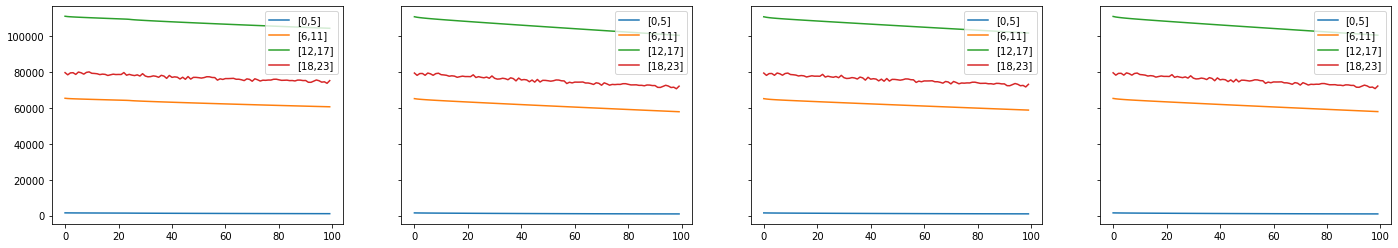

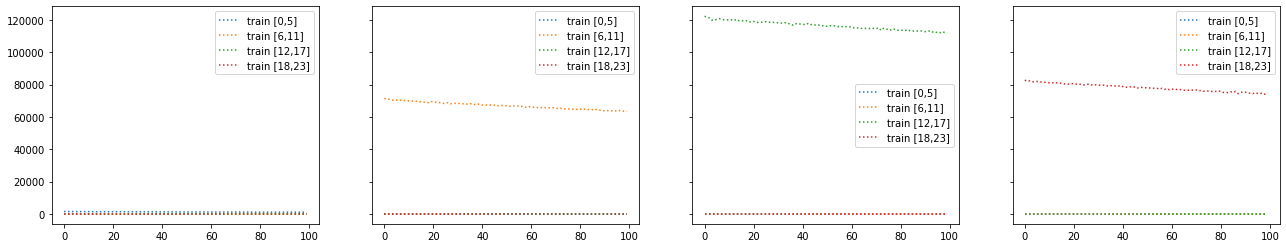

In [510]:
fig, axs = plt.subplots(1, 4, sharey=True, figsize=(24, 4))

for n,ax in enumerate(axs):
    for k in [k for k in history if f'val_ca{n+1}' in k]:
        ax.plot(history[k], label=k.split('-')[1])
        
    ax.legend()
        
plt.show()


fig, axs = plt.subplots(1, 4, sharey=True,  figsize=(22, 4))

for n,ax in enumerate(axs):
    for k in [k for k in history if f'ca{n+1}' in k and 'val' not in k]:
        ax.plot(history[k], label=('train '+k.split('-')[1]),linestyle=':')
        
    ax.legend()
        
plt.show()

In [381]:
tf.random.set_seed(0)

m = DistMLP('simple_add')
m.compile(
    optimizer='adam',
    loss=tf.keras.losses.MeanSquaredError(),
    metrics=[CWMet(ca,(q1,q2),name=f'ca{ca+1}-[{q1},{q2}]') for ca,(q1,q2) in product(range(4),zip(range(0,25,6)[:-1],range(-1,24,6)[1:]))],
    run_eagerly=True
)

history = defaultdict(list)

In [382]:
%%time
tmp = m.fit(
    train_dataset,
    epochs=1000,
    validation_data=test_dataset
)

for k in tmp.history:
    history[k]+=tmp.history[k]

Epoch 1/1000
26/26 [==============================] - 3s 116ms/step - ca1-[0,5]: 21.7418 - ca1-[6,11]: 113.6604 - ca1-[12,17]: 322.3574 - ca1-[18,23]: 659.9173 - ca2-[0,5]: 11.7400 - ca2-[6,11]: 103.9308 - ca2-[12,17]: 340.1681 - ca2-[18,23]: 631.5350 - ca3-[0,5]: 41.0419 - ca3-[6,11]: 116.3564 - ca3-[12,17]: 297.5274 - ca3-[18,23]: 504.7423 - ca4-[0,5]: 6.6454 - ca4-[6,11]: 173.8995 - ca4-[12,17]: 324.8108 - ca4-[18,23]: 568.0325 - val_ca1-[0,5]: 22.5789 - val_ca1-[6,11]: 116.4363 - val_ca1-[12,17]: 322.3521 - val_ca1-[18,23]: 602.2889 - val_ca2-[0,5]: 16.5768 - val_ca2-[6,11]: 99.3704 - val_ca2-[12,17]: 291.2619 - val_ca2-[18,23]: 557.1222 - val_ca3-[0,5]: 15.1868 - val_ca3-[6,11]: 95.5569 - val_ca3-[12,17]: 285.1296 - val_ca3-[18,23]: 549.1183 - val_ca4-[0,5]: 18.0498 - val_ca4-[6,11]: 103.3745 - val_ca4-[12,17]: 298.0153 - val_ca4-[18,23]: 566.5291
Epoch 2/1000
26/26 [==============================] - 3s 117ms/step - ca1-[0,5]: 22.5367 - ca1-[6,11]: 114.2215 - ca1-[12,17]: 321.0421

Epoch 11/1000
26/26 [==============================] - 3s 115ms/step - ca1-[0,5]: 10.6413 - ca1-[6,11]: 80.8166 - ca1-[12,17]: 260.8289 - ca1-[18,23]: 565.9561 - ca2-[0,5]: 3.8951 - ca2-[6,11]: 52.8304 - ca2-[12,17]: 234.6977 - ca2-[18,23]: 497.4328 - ca3-[0,5]: 13.1949 - ca3-[6,11]: 66.8903 - ca3-[12,17]: 197.9624 - ca3-[18,23]: 376.4304 - ca4-[0,5]: 0.0923 - ca4-[6,11]: 101.7949 - ca4-[12,17]: 211.1116 - ca4-[18,23]: 415.3393 - val_ca1-[0,5]: 10.4225 - val_ca1-[6,11]: 79.6398 - val_ca1-[12,17]: 256.7578 - val_ca1-[18,23]: 510.0474 - val_ca2-[0,5]: 5.9694 - val_ca2-[6,11]: 54.4636 - val_ca2-[12,17]: 205.1942 - val_ca2-[18,23]: 430.9662 - val_ca3-[0,5]: 6.0051 - val_ca3-[6,11]: 55.0019 - val_ca3-[12,17]: 206.4495 - val_ca3-[18,23]: 433.5165 - val_ca4-[0,5]: 6.5052 - val_ca4-[6,11]: 58.5083 - val_ca4-[12,17]: 211.8682 - val_ca4-[18,23]: 439.2062
Epoch 12/1000
26/26 [==============================] - 3s 120ms/step - ca1-[0,5]: 9.6970 - ca1-[6,11]: 77.2524 - ca1-[12,17]: 255.2908 - ca1-[1

KeyboardInterrupt: 

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


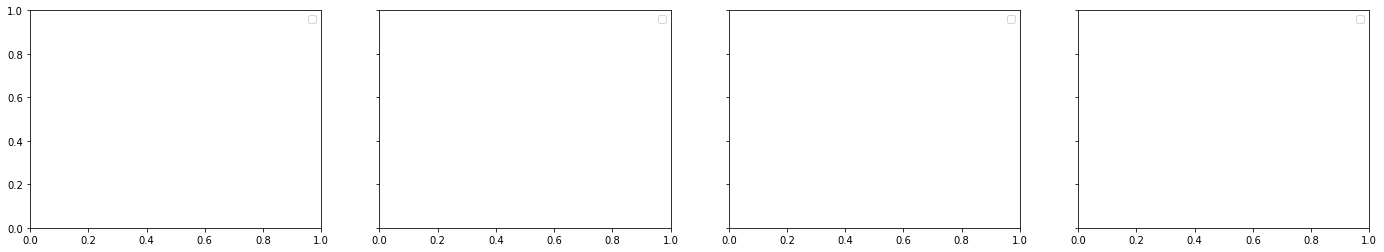

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


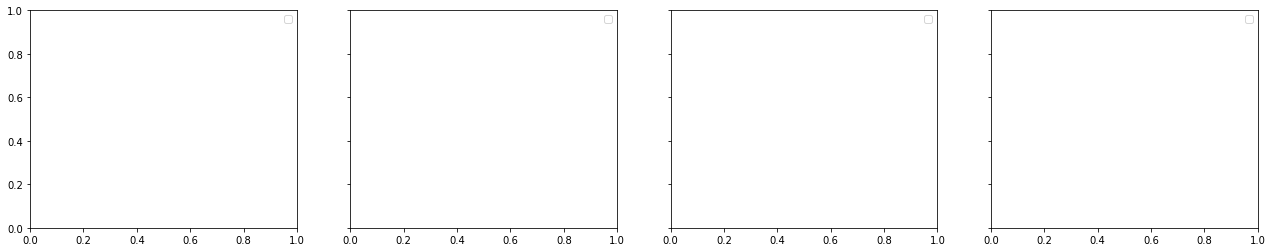

In [383]:
fig, axs = plt.subplots(1, 4, sharey=True, figsize=(24, 4))

for n,ax in enumerate(axs):
    for k in [k for k in history if f'val_ca{n+1}' in k]:
        ax.plot(history[k], label=k.split('-')[1])
        
    ax.legend()
        
plt.show()


fig, axs = plt.subplots(1, 4, sharey=True,  figsize=(22, 4))

for n,ax in enumerate(axs):
    for k in [k for k in history if f'ca{n+1}' in k and 'val' not in k]:
        ax.plot(history[k], label=('train '+k.split('-')[1]),linestyle=':')
        
    ax.legend()
        
plt.show()

In [284]:
tf.random.set_seed(0)

m = DistMLP('djgrad')
m.compile(
    optimizer='adam',
    loss=tf.keras.losses.MeanSquaredError(),
    metrics=[CWMet(ca,(q1,q2),name=f'ca{ca+1}-[{q1},{q2}]') for ca,(q1,q2) in product(range(4),zip(range(0,25,6)[:-1],range(-1,24,6)[1:]))],
    run_eagerly=True
)

history = defaultdict(list)

In [285]:
%%time
tmp = m.fit(
    train_dataset,
    epochs=300,
    validation_data=test_dataset
)

for k in tmp.history:
    history[k]+=tmp.history[k]

Epoch 1/300
26/26 [==============================] - 3s 129ms/step - ca1-[0,5]: 20.0455 - ca1-[6,11]: 111.1926 - ca1-[12,17]: 305.2244 - ca1-[18,23]: 638.0256 - ca2-[0,5]: 16.2862 - ca2-[6,11]: 118.6290 - ca2-[12,17]: 368.6289 - ca2-[18,23]: 605.2649 - ca3-[0,5]: 31.4048 - ca3-[6,11]: 120.9641 - ca3-[12,17]: 193.2314 - ca3-[18,23]: 427.9946 - ca4-[0,5]: 45.0867 - ca4-[6,11]: 82.5814 - ca4-[12,17]: 327.1979 - ca4-[18,23]: 579.8145 - val_ca1-[0,5]: 15.7862 - val_ca1-[6,11]: 105.5965 - val_ca1-[12,17]: 310.7755 - val_ca1-[18,23]: 616.6304 - val_ca2-[0,5]: 13.1781 - val_ca2-[6,11]: 97.1647 - val_ca2-[12,17]: 295.0539 - val_ca2-[18,23]: 593.9686 - val_ca3-[0,5]: 12.7304 - val_ca3-[6,11]: 95.6861 - val_ca3-[12,17]: 292.5689 - val_ca3-[18,23]: 590.6292 - val_ca4-[0,5]: 14.6536 - val_ca4-[6,11]: 101.9888 - val_ca4-[12,17]: 304.0363 - val_ca4-[18,23]: 606.8354
Epoch 2/300
26/26 [==============================] - 3s 126ms/step - ca1-[0,5]: 15.5654 - ca1-[6,11]: 98.7966 - ca1-[12,17]: 281.5946 - 

Epoch 11/300
26/26 [==============================] - 3s 128ms/step - ca1-[0,5]: 8.9426 - ca1-[6,11]: 75.9758 - ca1-[12,17]: 237.4840 - ca1-[18,23]: 540.7293 - ca2-[0,5]: 5.0499 - ca2-[6,11]: 60.3738 - ca2-[12,17]: 256.9599 - ca2-[18,23]: 439.6260 - ca3-[0,5]: 7.4631 - ca3-[6,11]: 60.7869 - ca3-[12,17]: 105.4515 - ca3-[18,23]: 305.1403 - ca4-[0,5]: 22.2583 - ca4-[6,11]: 47.2957 - ca4-[12,17]: 206.9365 - ca4-[18,23]: 436.5586 - val_ca1-[0,5]: 8.6359 - val_ca1-[6,11]: 79.4187 - val_ca1-[12,17]: 261.7253 - val_ca1-[18,23]: 546.1057 - val_ca2-[0,5]: 5.8998 - val_ca2-[6,11]: 54.4187 - val_ca2-[12,17]: 210.2090 - val_ca2-[18,23]: 469.9058 - val_ca3-[0,5]: 5.9054 - val_ca3-[6,11]: 56.9849 - val_ca3-[12,17]: 215.8259 - val_ca3-[18,23]: 478.3621 - val_ca4-[0,5]: 5.9064 - val_ca4-[6,11]: 57.0395 - val_ca4-[12,17]: 215.9439 - val_ca4-[18,23]: 478.5396
Epoch 12/300
26/26 [==============================] - 3s 128ms/step - ca1-[0,5]: 8.5644 - ca1-[6,11]: 75.3257 - ca1-[12,17]: 233.6107 - ca1-[18,23]

Epoch 21/300
26/26 [==============================] - 3s 131ms/step - ca1-[0,5]: 6.0946 - ca1-[6,11]: 60.6336 - ca1-[12,17]: 209.7614 - ca1-[18,23]: 498.6435 - ca2-[0,5]: 9.5906 - ca2-[6,11]: 38.7070 - ca2-[12,17]: 199.8420 - ca2-[18,23]: 363.9763 - ca3-[0,5]: 2.9909 - ca3-[6,11]: 35.0168 - ca3-[12,17]: 84.4615 - ca3-[18,23]: 257.2926 - ca4-[0,5]: 12.8437 - ca4-[6,11]: 33.3183 - ca4-[12,17]: 159.4883 - ca4-[18,23]: 335.1552 - val_ca1-[0,5]: 6.2644 - val_ca1-[6,11]: 63.6791 - val_ca1-[12,17]: 230.0656 - val_ca1-[18,23]: 499.6269 - val_ca2-[0,5]: 10.0378 - val_ca2-[6,11]: 33.6519 - val_ca2-[12,17]: 159.7809 - val_ca2-[18,23]: 391.8662 - val_ca3-[0,5]: 8.2541 - val_ca3-[6,11]: 38.2465 - val_ca3-[12,17]: 171.9726 - val_ca3-[18,23]: 411.1302 - val_ca4-[0,5]: 9.2276 - val_ca4-[6,11]: 35.5217 - val_ca4-[12,17]: 164.8428 - val_ca4-[18,23]: 399.8999
Epoch 22/300
26/26 [==============================] - 3s 128ms/step - ca1-[0,5]: 5.8665 - ca1-[6,11]: 58.1518 - ca1-[12,17]: 203.1457 - ca1-[18,23]

Epoch 31/300
26/26 [==============================] - 3s 126ms/step - ca1-[0,5]: 6.0444 - ca1-[6,11]: 41.0866 - ca1-[12,17]: 164.1928 - ca1-[18,23]: 428.7214 - ca2-[0,5]: 20.6047 - ca2-[6,11]: 24.1779 - ca2-[12,17]: 155.8895 - ca2-[18,23]: 304.2110 - ca3-[0,5]: 4.1854 - ca3-[6,11]: 20.8185 - ca3-[12,17]: 56.2222 - ca3-[18,23]: 217.0843 - ca4-[0,5]: 10.4907 - ca4-[6,11]: 23.0282 - ca4-[12,17]: 115.1798 - ca4-[18,23]: 286.9723 - val_ca1-[0,5]: 6.9026 - val_ca1-[6,11]: 43.6871 - val_ca1-[12,17]: 185.5024 - val_ca1-[18,23]: 426.9734 - val_ca2-[0,5]: 21.1151 - val_ca2-[6,11]: 20.8953 - val_ca2-[12,17]: 118.6375 - val_ca2-[18,23]: 319.7069 - val_ca3-[0,5]: 15.6855 - val_ca3-[6,11]: 25.3314 - val_ca3-[12,17]: 134.8242 - val_ca3-[18,23]: 346.6653 - val_ca4-[0,5]: 19.5070 - val_ca4-[6,11]: 21.9934 - val_ca4-[12,17]: 122.9589 - val_ca4-[18,23]: 326.9830
Epoch 32/300
26/26 [==============================] - 3s 131ms/step - ca1-[0,5]: 6.5278 - ca1-[6,11]: 39.2858 - ca1-[12,17]: 167.5805 - ca1-[18,

Epoch 41/300
26/26 [==============================] - 3s 125ms/step - ca1-[0,5]: 10.2124 - ca1-[6,11]: 28.4917 - ca1-[12,17]: 132.3698 - ca1-[18,23]: 379.6476 - ca2-[0,5]: 38.0269 - ca2-[6,11]: 16.0037 - ca2-[12,17]: 121.4829 - ca2-[18,23]: 242.4073 - ca3-[0,5]: 9.9155 - ca3-[6,11]: 9.4125 - ca3-[12,17]: 39.7157 - ca3-[18,23]: 166.9150 - ca4-[0,5]: 8.4040 - ca4-[6,11]: 22.1624 - ca4-[12,17]: 79.3633 - ca4-[18,23]: 230.6504 - val_ca1-[0,5]: 11.4565 - val_ca1-[6,11]: 31.0345 - val_ca1-[12,17]: 152.1636 - val_ca1-[18,23]: 379.6764 - val_ca2-[0,5]: 38.7551 - val_ca2-[6,11]: 15.2156 - val_ca2-[12,17]: 85.0256 - val_ca2-[18,23]: 264.7502 - val_ca3-[0,5]: 27.9855 - val_ca3-[6,11]: 17.6387 - val_ca3-[12,17]: 103.1509 - val_ca3-[18,23]: 297.4976 - val_ca4-[0,5]: 36.3669 - val_ca4-[6,11]: 15.5398 - val_ca4-[12,17]: 88.5780 - val_ca4-[18,23]: 271.3088
Epoch 42/300
26/26 [==============================] - 3s 127ms/step - ca1-[0,5]: 10.7351 - ca1-[6,11]: 26.4376 - ca1-[12,17]: 130.8191 - ca1-[18,23

Epoch 51/300
26/26 [==============================] - 3s 126ms/step - ca1-[0,5]: 17.1129 - ca1-[6,11]: 20.8171 - ca1-[12,17]: 107.5304 - ca1-[18,23]: 332.6696 - ca2-[0,5]: 62.2655 - ca2-[6,11]: 15.4436 - ca2-[12,17]: 88.8260 - ca2-[18,23]: 190.7778 - ca3-[0,5]: 20.3094 - ca3-[6,11]: 2.7162 - ca3-[12,17]: 25.8735 - ca3-[18,23]: 137.7895 - ca4-[0,5]: 8.3507 - ca4-[6,11]: 23.1083 - ca4-[12,17]: 53.1621 - ca4-[18,23]: 167.1536 - val_ca1-[0,5]: 18.7902 - val_ca1-[6,11]: 22.5343 - val_ca1-[12,17]: 124.9976 - val_ca1-[18,23]: 335.7465 - val_ca2-[0,5]: 62.7948 - val_ca2-[6,11]: 16.0499 - val_ca2-[12,17]: 58.3789 - val_ca2-[18,23]: 213.0543 - val_ca3-[0,5]: 45.0754 - val_ca3-[6,11]: 14.7308 - val_ca3-[12,17]: 76.5934 - val_ca3-[18,23]: 249.4834 - val_ca4-[0,5]: 59.6865 - val_ca4-[6,11]: 15.6107 - val_ca4-[12,17]: 61.1187 - val_ca4-[18,23]: 218.7585
Epoch 52/300
26/26 [==============================] - 3s 125ms/step - ca1-[0,5]: 17.8123 - ca1-[6,11]: 19.6925 - ca1-[12,17]: 105.0066 - ca1-[18,23]

Epoch 61/300
26/26 [==============================] - 3s 127ms/step - ca1-[0,5]: 26.4066 - ca1-[6,11]: 15.9568 - ca1-[12,17]: 86.2800 - ca1-[18,23]: 294.3762 - ca2-[0,5]: 93.0653 - ca2-[6,11]: 20.1884 - ca2-[12,17]: 62.7028 - ca2-[18,23]: 144.7965 - ca3-[0,5]: 35.4936 - ca3-[6,11]: 1.0961 - ca3-[12,17]: 13.1090 - ca3-[18,23]: 104.3172 - ca4-[0,5]: 9.7968 - ca4-[6,11]: 33.2162 - ca4-[12,17]: 32.6955 - ca4-[18,23]: 135.3339 - val_ca1-[0,5]: 28.5543 - val_ca1-[6,11]: 17.3625 - val_ca1-[12,17]: 102.0365 - val_ca1-[18,23]: 296.1974 - val_ca2-[0,5]: 93.1708 - val_ca2-[6,11]: 23.4438 - val_ca2-[12,17]: 38.4001 - val_ca2-[18,23]: 167.5514 - val_ca3-[0,5]: 66.9024 - val_ca3-[6,11]: 16.7398 - val_ca3-[12,17]: 54.9982 - val_ca3-[18,23]: 205.8779 - val_ca4-[0,5]: 89.3646 - val_ca4-[6,11]: 22.2690 - val_ca4-[12,17]: 40.3596 - val_ca4-[18,23]: 172.4334
Epoch 62/300
26/26 [==============================] - 3s 127ms/step - ca1-[0,5]: 27.3306 - ca1-[6,11]: 16.0321 - ca1-[12,17]: 87.5477 - ca1-[18,23]: 

Epoch 71/300
26/26 [==============================] - 3s 127ms/step - ca1-[0,5]: 38.0267 - ca1-[6,11]: 13.8584 - ca1-[12,17]: 68.4629 - ca1-[18,23]: 256.0425 - ca2-[0,5]: 128.9066 - ca2-[6,11]: 32.6758 - ca2-[12,17]: 45.0047 - ca2-[18,23]: 109.7227 - ca3-[0,5]: 51.9790 - ca3-[6,11]: 4.2334 - ca3-[12,17]: 7.4127 - ca3-[18,23]: 75.1026 - ca4-[0,5]: 21.7241 - ca4-[6,11]: 44.6522 - ca4-[12,17]: 18.2266 - ca4-[18,23]: 100.2595 - val_ca1-[0,5]: 40.5187 - val_ca1-[6,11]: 14.9678 - val_ca1-[12,17]: 83.1421 - val_ca1-[18,23]: 260.1136 - val_ca2-[0,5]: 129.7998 - val_ca2-[6,11]: 37.2164 - val_ca2-[12,17]: 25.1133 - val_ca2-[18,23]: 128.2018 - val_ca3-[0,5]: 93.4284 - val_ca3-[6,11]: 23.5253 - val_ca3-[12,17]: 38.5841 - val_ca3-[18,23]: 166.6709 - val_ca4-[0,5]: 125.3510 - val_ca4-[6,11]: 35.3439 - val_ca4-[12,17]: 26.3261 - val_ca4-[18,23]: 132.2542
Epoch 72/300
26/26 [==============================] - 3s 124ms/step - ca1-[0,5]: 39.0996 - ca1-[6,11]: 14.3398 - ca1-[12,17]: 65.9130 - ca1-[18,23]:

Epoch 81/300
26/26 [==============================] - 3s 125ms/step - ca1-[0,5]: 51.6643 - ca1-[6,11]: 14.6185 - ca1-[12,17]: 53.1815 - ca1-[18,23]: 224.0679 - ca2-[0,5]: 171.5252 - ca2-[6,11]: 49.5981 - ca2-[12,17]: 30.4826 - ca2-[18,23]: 80.5400 - ca3-[0,5]: 77.4485 - ca3-[6,11]: 12.1689 - ca3-[12,17]: 5.1288 - ca3-[18,23]: 53.5645 - ca4-[0,5]: 28.2242 - ca4-[6,11]: 63.1310 - ca4-[12,17]: 10.0476 - ca4-[18,23]: 68.5643 - val_ca1-[0,5]: 54.4572 - val_ca1-[6,11]: 15.0521 - val_ca1-[12,17]: 66.1231 - val_ca1-[18,23]: 228.9501 - val_ca2-[0,5]: 172.5611 - val_ca2-[6,11]: 57.2545 - val_ca2-[12,17]: 17.9239 - val_ca2-[18,23]: 96.4539 - val_ca3-[0,5]: 124.6527 - val_ca3-[6,11]: 35.0543 - val_ca3-[12,17]: 26.3431 - val_ca3-[18,23]: 133.4250 - val_ca4-[0,5]: 167.6012 - val_ca4-[6,11]: 54.7673 - val_ca4-[12,17]: 18.3816 - val_ca4-[18,23]: 99.6578
Epoch 82/300
26/26 [==============================] - 3s 126ms/step - ca1-[0,5]: 52.8104 - ca1-[6,11]: 15.0988 - ca1-[12,17]: 53.9389 - ca1-[18,23]: 2

Epoch 91/300
26/26 [==============================] - 3s 126ms/step - ca1-[0,5]: 66.8133 - ca1-[6,11]: 17.0856 - ca1-[12,17]: 41.4246 - ca1-[18,23]: 195.3131 - ca2-[0,5]: 221.2477 - ca2-[6,11]: 74.6081 - ca2-[12,17]: 29.1002 - ca2-[18,23]: 54.9661 - ca3-[0,5]: 107.5351 - ca3-[6,11]: 24.1998 - ca3-[12,17]: 6.8916 - ca3-[18,23]: 32.1213 - ca4-[0,5]: 43.1880 - ca4-[6,11]: 94.4988 - ca4-[12,17]: 9.1352 - ca4-[18,23]: 45.4627 - val_ca1-[0,5]: 70.2389 - val_ca1-[6,11]: 17.3840 - val_ca1-[12,17]: 52.4357 - val_ca1-[18,23]: 199.7364 - val_ca2-[0,5]: 221.5497 - val_ca2-[6,11]: 83.5634 - val_ca2-[12,17]: 17.2203 - val_ca2-[18,23]: 70.1316 - val_ca3-[0,5]: 160.5872 - val_ca3-[6,11]: 51.3155 - val_ca3-[12,17]: 19.1728 - val_ca3-[18,23]: 103.9217 - val_ca4-[0,5]: 216.0518 - val_ca4-[6,11]: 80.4724 - val_ca4-[12,17]: 16.9960 - val_ca4-[18,23]: 72.5759
Epoch 92/300
26/26 [==============================] - 3s 128ms/step - ca1-[0,5]: 68.5020 - ca1-[6,11]: 16.9622 - ca1-[12,17]: 40.3245 - ca1-[18,23]: 1

Epoch 101/300
26/26 [==============================] - 3s 127ms/step - ca1-[0,5]: 83.5524 - ca1-[6,11]: 21.6203 - ca1-[12,17]: 31.1533 - ca1-[18,23]: 170.4629 - ca2-[0,5]: 276.2915 - ca2-[6,11]: 106.3053 - ca2-[12,17]: 32.0565 - ca2-[18,23]: 36.0981 - ca3-[0,5]: 142.5307 - ca3-[6,11]: 41.9779 - ca3-[12,17]: 13.3121 - ca3-[18,23]: 20.5993 - ca4-[0,5]: 65.3355 - ca4-[6,11]: 127.7580 - ca4-[12,17]: 14.5319 - ca4-[18,23]: 25.1752 - val_ca1-[0,5]: 87.6348 - val_ca1-[6,11]: 21.7550 - val_ca1-[12,17]: 40.9901 - val_ca1-[18,23]: 174.1528 - val_ca2-[0,5]: 276.5652 - val_ca2-[6,11]: 116.0064 - val_ca2-[12,17]: 22.9482 - val_ca2-[18,23]: 50.6624 - val_ca3-[0,5]: 201.1367 - val_ca3-[6,11]: 72.2502 - val_ca3-[12,17]: 16.7569 - val_ca3-[18,23]: 79.7463 - val_ca4-[0,5]: 270.6666 - val_ca4-[6,11]: 112.4106 - val_ca4-[12,17]: 22.0837 - val_ca4-[18,23]: 52.3626
Epoch 102/300
26/26 [==============================] - 3s 127ms/step - ca1-[0,5]: 85.4298 - ca1-[6,11]: 21.7686 - ca1-[12,17]: 32.1392 - ca1-[18

Epoch 111/300
26/26 [==============================] - 3s 127ms/step - ca1-[0,5]: 102.1958 - ca1-[6,11]: 27.6218 - ca1-[12,17]: 24.2679 - ca1-[18,23]: 146.6652 - ca2-[0,5]: 338.5552 - ca2-[6,11]: 142.7981 - ca2-[12,17]: 38.1757 - ca2-[18,23]: 24.6908 - ca3-[0,5]: 170.3827 - ca3-[6,11]: 63.8608 - ca3-[12,17]: 24.1888 - ca3-[18,23]: 9.7879 - ca4-[0,5]: 78.8469 - ca4-[6,11]: 164.4462 - ca4-[12,17]: 24.3042 - ca4-[18,23]: 18.1866 - val_ca1-[0,5]: 106.4333 - val_ca1-[6,11]: 27.9587 - val_ca1-[12,17]: 32.4962 - val_ca1-[18,23]: 151.9321 - val_ca2-[0,5]: 337.7289 - val_ca2-[6,11]: 154.6310 - val_ca2-[12,17]: 34.5582 - val_ca2-[18,23]: 37.7984 - val_ca3-[0,5]: 246.3358 - val_ca3-[6,11]: 97.8613 - val_ca3-[12,17]: 19.0263 - val_ca3-[18,23]: 60.7197 - val_ca4-[0,5]: 331.4678 - val_ca4-[6,11]: 150.5759 - val_ca4-[12,17]: 33.1304 - val_ca4-[18,23]: 38.8206
Epoch 112/300
26/26 [==============================] - 3s 126ms/step - ca1-[0,5]: 104.5095 - ca1-[6,11]: 28.8651 - ca1-[12,17]: 23.7705 - ca1-[

Epoch 121/300
26/26 [==============================] - 3s 127ms/step - ca1-[0,5]: 122.2670 - ca1-[6,11]: 36.4996 - ca1-[12,17]: 19.3418 - ca1-[18,23]: 126.4064 - ca2-[0,5]: 404.2301 - ca2-[6,11]: 185.3821 - ca2-[12,17]: 53.3154 - ca2-[18,23]: 19.1408 - ca3-[0,5]: 220.2631 - ca3-[6,11]: 90.5103 - ca3-[12,17]: 38.4227 - ca3-[18,23]: 4.1088 - ca4-[0,5]: 98.9011 - ca4-[6,11]: 206.9458 - ca4-[12,17]: 42.7354 - ca4-[18,23]: 13.8652 - val_ca1-[0,5]: 126.5341 - val_ca1-[6,11]: 35.8372 - val_ca1-[12,17]: 25.8176 - val_ca1-[18,23]: 131.6794 - val_ca2-[0,5]: 405.0454 - val_ca2-[6,11]: 199.4316 - val_ca2-[12,17]: 52.5413 - val_ca2-[18,23]: 30.7750 - val_ca3-[0,5]: 296.2142 - val_ca3-[6,11]: 128.1600 - val_ca3-[12,17]: 26.0049 - val_ca3-[18,23]: 45.9529 - val_ca4-[0,5]: 398.3578 - val_ca4-[6,11]: 194.8912 - val_ca4-[12,17]: 50.5584 - val_ca4-[18,23]: 31.1768
Epoch 122/300
26/26 [==============================] - 3s 126ms/step - ca1-[0,5]: 124.3471 - ca1-[6,11]: 37.6891 - ca1-[12,17]: 19.6260 - ca1-

Epoch 131/300
26/26 [==============================] - 3s 127ms/step - ca1-[0,5]: 143.3414 - ca1-[6,11]: 46.2357 - ca1-[12,17]: 16.2933 - ca1-[18,23]: 108.9742 - ca2-[0,5]: 478.2826 - ca2-[6,11]: 233.3786 - ca2-[12,17]: 71.5805 - ca2-[18,23]: 19.5806 - ca3-[0,5]: 257.9909 - ca3-[6,11]: 121.4850 - ca3-[12,17]: 56.9791 - ca3-[18,23]: 3.0208 - ca4-[0,5]: 123.9594 - ca4-[6,11]: 244.5625 - ca4-[12,17]: 64.2507 - ca4-[18,23]: 16.1916 - val_ca1-[0,5]: 147.7258 - val_ca1-[6,11]: 45.2030 - val_ca1-[12,17]: 21.0980 - val_ca1-[18,23]: 113.3292 - val_ca2-[0,5]: 478.3019 - val_ca2-[6,11]: 250.2522 - val_ca2-[12,17]: 76.6398 - val_ca2-[18,23]: 29.6930 - val_ca3-[0,5]: 350.7183 - val_ca3-[6,11]: 163.1093 - val_ca3-[12,17]: 37.6635 - val_ca3-[18,23]: 35.5554 - val_ca4-[0,5]: 471.5279 - val_ca4-[6,11]: 245.4762 - val_ca4-[12,17]: 74.2435 - val_ca4-[18,23]: 29.5120
Epoch 132/300
26/26 [==============================] - 3s 125ms/step - ca1-[0,5]: 145.2058 - ca1-[6,11]: 47.6979 - ca1-[12,17]: 15.8470 - ca

Epoch 141/300
26/26 [==============================] - 3s 128ms/step - ca1-[0,5]: 164.9650 - ca1-[6,11]: 57.0375 - ca1-[12,17]: 14.3524 - ca1-[18,23]: 92.8745 - ca2-[0,5]: 556.4409 - ca2-[6,11]: 291.9676 - ca2-[12,17]: 97.7891 - ca2-[18,23]: 25.3372 - ca3-[0,5]: 309.9463 - ca3-[6,11]: 158.9255 - ca3-[12,17]: 80.8920 - ca3-[18,23]: 5.9617 - ca4-[0,5]: 150.5782 - ca4-[6,11]: 317.0641 - ca4-[12,17]: 95.7148 - ca4-[18,23]: 22.3276 - val_ca1-[0,5]: 169.6658 - val_ca1-[6,11]: 55.7981 - val_ca1-[12,17]: 18.1811 - val_ca1-[18,23]: 97.8337 - val_ca2-[0,5]: 557.7830 - val_ca2-[6,11]: 307.2820 - val_ca2-[12,17]: 106.9294 - val_ca2-[18,23]: 35.0896 - val_ca3-[0,5]: 409.8140 - val_ca3-[6,11]: 202.6799 - val_ca3-[12,17]: 53.9792 - val_ca3-[18,23]: 30.2229 - val_ca4-[0,5]: 550.6283 - val_ca4-[6,11]: 302.0791 - val_ca4-[12,17]: 104.0510 - val_ca4-[18,23]: 34.3753
Epoch 142/300
26/26 [==============================] - 3s 127ms/step - ca1-[0,5]: 166.7246 - ca1-[6,11]: 58.3453 - ca1-[12,17]: 14.2093 - ca

26/26 [==============================] - 3s 127ms/step - ca1-[0,5]: 205.6568 - ca1-[6,11]: 79.3481 - ca1-[12,17]: 14.8701 - ca1-[18,23]: 70.6384 - ca2-[0,5]: 716.1571 - ca2-[6,11]: 405.8927 - ca2-[12,17]: 160.6996 - ca2-[18,23]: 53.8975 - ca3-[0,5]: 374.3999 - ca3-[6,11]: 235.6097 - ca3-[12,17]: 134.6747 - ca3-[18,23]: 20.1868 - ca4-[0,5]: 209.3688 - ca4-[6,11]: 426.6319 - ca4-[12,17]: 166.8269 - ca4-[18,23]: 54.7304 - val_ca1-[0,5]: 210.6660 - val_ca1-[6,11]: 77.4768 - val_ca1-[12,17]: 16.8763 - val_ca1-[18,23]: 75.0672 - val_ca2-[0,5]: 715.9075 - val_ca2-[6,11]: 425.1157 - val_ca2-[12,17]: 177.5956 - val_ca2-[18,23]: 60.2629 - val_ca3-[0,5]: 527.9008 - val_ca3-[6,11]: 285.6381 - val_ca3-[12,17]: 95.6755 - val_ca3-[18,23]: 32.3920 - val_ca4-[0,5]: 708.6611 - val_ca4-[6,11]: 419.6110 - val_ca4-[12,17]: 174.1565 - val_ca4-[18,23]: 58.7634
Epoch 160/300
26/26 [==============================] - 3s 128ms/step - ca1-[0,5]: 208.0020 - ca1-[6,11]: 80.8888 - ca1-[12,17]: 15.3132 - ca1-[18,23]:

Epoch 178/300
26/26 [==============================] - 3s 125ms/step - ca1-[0,5]: 0.9159 - ca1-[6,11]: 0.9104 - ca1-[12,17]: 4.2132 - ca1-[18,23]: 44.7617 - ca2-[0,5]: 903.5144 - ca2-[6,11]: 535.0540 - ca2-[12,17]: 250.5070 - ca2-[18,23]: 101.4137 - ca3-[0,5]: 526.3157 - ca3-[6,11]: 332.0868 - ca3-[12,17]: 188.8981 - ca3-[18,23]: 51.1962 - ca4-[0,5]: 272.9140 - ca4-[6,11]: 565.9664 - ca4-[12,17]: 258.4544 - ca4-[18,23]: 107.0850 - val_ca1-[0,5]: 0.8511 - val_ca1-[6,11]: 1.7771 - val_ca1-[12,17]: 9.0719 - val_ca1-[18,23]: 52.2553 - val_ca2-[0,5]: 904.0784 - val_ca2-[6,11]: 570.8254 - val_ca2-[12,17]: 271.4613 - val_ca2-[18,23]: 108.3207 - val_ca3-[0,5]: 668.8068 - val_ca3-[6,11]: 389.4999 - val_ca3-[12,17]: 154.5336 - val_ca3-[18,23]: 51.0602 - val_ca4-[0,5]: 896.8745 - val_ca4-[6,11]: 565.1603 - val_ca4-[12,17]: 267.6327 - val_ca4-[18,23]: 106.1937
Epoch 179/300
26/26 [==============================] - 3s 128ms/step - ca1-[0,5]: 0.8314 - ca1-[6,11]: 1.0756 - ca1-[12,17]: 4.1455 - ca1-[

Epoch 188/300
26/26 [==============================] - 3s 124ms/step - ca1-[0,5]: 0.4024 - ca1-[6,11]: 0.5494 - ca1-[12,17]: 2.3250 - ca1-[18,23]: 32.8580 - ca2-[0,5]: 1010.4840 - ca2-[6,11]: 632.0607 - ca2-[12,17]: 299.7485 - ca2-[18,23]: 137.3862 - ca3-[0,5]: 644.2682 - ca3-[6,11]: 410.7360 - ca3-[12,17]: 256.2497 - ca3-[18,23]: 88.7499 - ca4-[0,5]: 332.8624 - ca4-[6,11]: 656.2301 - ca4-[12,17]: 296.6464 - ca4-[18,23]: 145.6223 - val_ca1-[0,5]: 0.3915 - val_ca1-[6,11]: 1.1746 - val_ca1-[12,17]: 6.3736 - val_ca1-[18,23]: 40.4096 - val_ca2-[0,5]: 1011.6565 - val_ca2-[6,11]: 656.1227 - val_ca2-[12,17]: 330.6718 - val_ca2-[18,23]: 142.3766 - val_ca3-[0,5]: 786.9193 - val_ca3-[6,11]: 479.5105 - val_ca3-[12,17]: 211.3779 - val_ca3-[18,23]: 76.4405 - val_ca4-[0,5]: 1004.5651 - val_ca4-[6,11]: 650.4622 - val_ca4-[12,17]: 326.7154 - val_ca4-[18,23]: 140.0068
Epoch 189/300
26/26 [==============================] - 3s 126ms/step - ca1-[0,5]: 0.3705 - ca1-[6,11]: 0.5640 - ca1-[12,17]: 2.5772 - ca

26/26 [==============================] - 3s 126ms/step - ca1-[0,5]: 0.1706 - ca1-[6,11]: 0.2975 - ca1-[12,17]: 0.9965 - ca1-[18,23]: 18.9946 - ca2-[0,5]: 1219.6873 - ca2-[6,11]: 793.7479 - ca2-[12,17]: 415.4876 - ca2-[18,23]: 221.5127 - ca3-[0,5]: 856.7892 - ca3-[6,11]: 584.5787 - ca3-[12,17]: 404.8603 - ca3-[18,23]: 160.5721 - ca4-[0,5]: 416.6254 - ca4-[6,11]: 825.8800 - ca4-[12,17]: 442.1525 - ca4-[18,23]: 228.6817 - val_ca1-[0,5]: 0.1769 - val_ca1-[6,11]: 0.6836 - val_ca1-[12,17]: 3.8841 - val_ca1-[18,23]: 26.2142 - val_ca2-[0,5]: 1220.5889 - val_ca2-[6,11]: 824.9564 - val_ca2-[12,17]: 451.7464 - val_ca2-[18,23]: 218.9919 - val_ca3-[0,5]: 1013.8187 - val_ca3-[6,11]: 657.8498 - val_ca3-[12,17]: 331.8804 - val_ca3-[18,23]: 143.1026 - val_ca4-[0,5]: 1214.2483 - val_ca4-[6,11]: 819.7794 - val_ca4-[12,17]: 447.9554 - val_ca4-[18,23]: 216.4910
Epoch 207/300
26/26 [==============================] - 3s 126ms/step - ca1-[0,5]: 0.1639 - ca1-[6,11]: 0.3414 - ca1-[12,17]: 0.9794 - ca1-[18,23]: 

26/26 [==============================] - 3s 126ms/step - ca1-[0,5]: 0.0905 - ca1-[6,11]: 0.1546 - ca1-[12,17]: 0.4855 - ca1-[18,23]: 10.6625 - ca2-[0,5]: 1520.0591 - ca2-[6,11]: 1035.6392 - ca2-[12,17]: 597.7590 - ca2-[18,23]: 356.3131 - ca3-[0,5]: 1056.5823 - ca3-[6,11]: 755.8421 - ca3-[12,17]: 546.5528 - ca3-[18,23]: 251.2549 - ca4-[0,5]: 509.8901 - ca4-[6,11]: 946.1261 - ca4-[12,17]: 584.5141 - ca4-[18,23]: 332.4678 - val_ca1-[0,5]: 0.0965 - val_ca1-[6,11]: 0.4317 - val_ca1-[12,17]: 2.7021 - val_ca1-[18,23]: 17.6507 - val_ca2-[0,5]: 1525.2496 - val_ca2-[6,11]: 1076.9060 - val_ca2-[12,17]: 640.9097 - val_ca2-[18,23]: 349.7037 - val_ca3-[0,5]: 1239.3818 - val_ca3-[6,11]: 840.3185 - val_ca3-[12,17]: 463.0219 - val_ca3-[18,23]: 226.4630 - val_ca4-[0,5]: 1443.6014 - val_ca4-[6,11]: 1008.8167 - val_ca4-[12,17]: 588.9749 - val_ca4-[18,23]: 312.8102
Epoch 225/300
26/26 [==============================] - 3s 127ms/step - ca1-[0,5]: 0.0859 - ca1-[6,11]: 0.1051 - ca1-[12,17]: 0.4036 - ca1-[18,2

Epoch 243/300
26/26 [==============================] - 3s 125ms/step - ca1-[0,5]: 0.0584 - ca1-[6,11]: 0.0619 - ca1-[12,17]: 0.1069 - ca1-[18,23]: 5.7442 - ca2-[0,5]: 27.0574 - ca2-[6,11]: 1.6981 - ca2-[12,17]: 2.3497 - ca2-[18,23]: 4.5231 - ca3-[0,5]: 1236.8087 - ca3-[6,11]: 959.4727 - ca3-[12,17]: 713.0494 - ca3-[18,23]: 383.5155 - ca4-[0,5]: 495.8083 - ca4-[6,11]: 1206.0480 - ca4-[12,17]: 751.3411 - ca4-[18,23]: 472.4510 - val_ca1-[0,5]: 0.0620 - val_ca1-[6,11]: 0.2550 - val_ca1-[12,17]: 1.8755 - val_ca1-[18,23]: 11.8206 - val_ca2-[0,5]: 29.6396 - val_ca2-[6,11]: 17.7280 - val_ca2-[12,17]: 77.2702 - val_ca2-[18,23]: 100.6656 - val_ca3-[0,5]: 1494.4191 - val_ca3-[6,11]: 1051.1481 - val_ca3-[12,17]: 621.1981 - val_ca3-[18,23]: 335.6237 - val_ca4-[0,5]: 1706.6465 - val_ca4-[6,11]: 1229.4081 - val_ca4-[12,17]: 759.0020 - val_ca4-[18,23]: 435.7665
Epoch 244/300
26/26 [==============================] - 3s 125ms/step - ca1-[0,5]: 0.0545 - ca1-[6,11]: 0.0688 - ca1-[12,17]: 0.1113 - ca1-[18,

Epoch 253/300
26/26 [==============================] - 3s 126ms/step - ca1-[0,5]: 0.0468 - ca1-[6,11]: 0.0349 - ca1-[12,17]: 0.0598 - ca1-[18,23]: 4.2649 - ca2-[0,5]: 22.2475 - ca2-[6,11]: 1.2195 - ca2-[12,17]: 0.8339 - ca2-[18,23]: 2.0164 - ca3-[0,5]: 1367.4290 - ca3-[6,11]: 1073.7112 - ca3-[12,17]: 739.7976 - ca3-[18,23]: 435.7438 - ca4-[0,5]: 529.2086 - ca4-[6,11]: 1322.4363 - ca4-[12,17]: 854.7633 - ca4-[18,23]: 541.1955 - val_ca1-[0,5]: 0.0506 - val_ca1-[6,11]: 0.2037 - val_ca1-[12,17]: 1.5700 - val_ca1-[18,23]: 9.3897 - val_ca2-[0,5]: 22.8161 - val_ca2-[6,11]: 6.2843 - val_ca2-[12,17]: 24.2508 - val_ca2-[18,23]: 43.8223 - val_ca3-[0,5]: 1636.6140 - val_ca3-[6,11]: 1170.3373 - val_ca3-[12,17]: 712.9865 - val_ca3-[18,23]: 401.9048 - val_ca4-[0,5]: 1854.1444 - val_ca4-[6,11]: 1354.5348 - val_ca4-[12,17]: 857.4836 - val_ca4-[18,23]: 509.4443
Epoch 254/300
26/26 [==============================] - 3s 125ms/step - ca1-[0,5]: 0.0462 - ca1-[6,11]: 0.0347 - ca1-[12,17]: 0.0627 - ca1-[18,23

Epoch 263/300
26/26 [==============================] - 3s 126ms/step - ca1-[0,5]: 0.0386 - ca1-[6,11]: 0.0176 - ca1-[12,17]: 0.0285 - ca1-[18,23]: 3.0694 - ca2-[0,5]: 21.1908 - ca2-[6,11]: 0.9879 - ca2-[12,17]: 0.3106 - ca2-[18,23]: 0.5674 - ca3-[0,5]: 1497.7252 - ca3-[6,11]: 1198.5512 - ca3-[12,17]: 906.3029 - ca3-[18,23]: 529.7116 - ca4-[0,5]: 744.2703 - ca4-[6,11]: 1374.1224 - ca4-[12,17]: 956.7968 - ca4-[18,23]: 623.2370 - val_ca1-[0,5]: 0.0408 - val_ca1-[6,11]: 0.1743 - val_ca1-[12,17]: 1.3652 - val_ca1-[18,23]: 7.4675 - val_ca2-[0,5]: 21.2234 - val_ca2-[6,11]: 4.0803 - val_ca2-[12,17]: 12.9969 - val_ca2-[18,23]: 27.4982 - val_ca3-[0,5]: 1784.4567 - val_ca3-[6,11]: 1295.3008 - val_ca3-[12,17]: 810.7006 - val_ca3-[18,23]: 474.2519 - val_ca4-[0,5]: 2007.5002 - val_ca4-[6,11]: 1485.5588 - val_ca4-[12,17]: 961.9094 - val_ca4-[18,23]: 589.1093
Epoch 264/300
26/26 [==============================] - 3s 126ms/step - ca1-[0,5]: 0.0375 - ca1-[6,11]: 0.0191 - ca1-[12,17]: 0.0286 - ca1-[18,23

Epoch 273/300
26/26 [==============================] - 3s 126ms/step - ca1-[0,5]: 0.0315 - ca1-[6,11]: 0.0086 - ca1-[12,17]: 0.0156 - ca1-[18,23]: 2.1169 - ca2-[0,5]: 20.9098 - ca2-[6,11]: 0.8418 - ca2-[12,17]: 0.2037 - ca2-[18,23]: 0.3193 - ca3-[0,5]: 1695.1066 - ca3-[6,11]: 1321.5354 - ca3-[12,17]: 1003.5490 - ca3-[18,23]: 611.1174 - ca4-[0,5]: 740.5624 - ca4-[6,11]: 1505.3402 - ca4-[12,17]: 1059.0764 - ca4-[18,23]: 698.4471 - val_ca1-[0,5]: 0.0332 - val_ca1-[6,11]: 0.1611 - val_ca1-[12,17]: 1.2342 - val_ca1-[18,23]: 6.0552 - val_ca2-[0,5]: 20.8126 - val_ca2-[6,11]: 3.0668 - val_ca2-[12,17]: 8.9942 - val_ca2-[18,23]: 20.9656 - val_ca3-[0,5]: 1938.1792 - val_ca3-[6,11]: 1426.2224 - val_ca3-[12,17]: 914.4654 - val_ca3-[18,23]: 552.7356 - val_ca4-[0,5]: 2166.7766 - val_ca4-[6,11]: 1622.5291 - val_ca4-[12,17]: 1072.3129 - val_ca4-[18,23]: 674.7812
Epoch 274/300
26/26 [==============================] - 3s 125ms/step - ca1-[0,5]: 0.0307 - ca1-[6,11]: 0.0079 - ca1-[12,17]: 0.0145 - ca1-[18,

Epoch 283/300
26/26 [==============================] - 3s 125ms/step - ca1-[0,5]: 0.0258 - ca1-[6,11]: 0.0071 - ca1-[12,17]: 0.0146 - ca1-[18,23]: 1.6119 - ca2-[0,5]: 20.6377 - ca2-[6,11]: 0.8273 - ca2-[12,17]: 0.1329 - ca2-[18,23]: 0.2134 - ca3-[0,5]: 1828.7070 - ca3-[6,11]: 1460.3243 - ca3-[12,17]: 1079.7975 - ca3-[18,23]: 702.9685 - ca4-[0,5]: 821.8150 - ca4-[6,11]: 1632.0751 - ca4-[12,17]: 1183.9114 - ca4-[18,23]: 801.6168 - val_ca1-[0,5]: 0.0281 - val_ca1-[6,11]: 0.1566 - val_ca1-[12,17]: 1.1717 - val_ca1-[18,23]: 5.0807 - val_ca2-[0,5]: 20.7136 - val_ca2-[6,11]: 2.5256 - val_ca2-[12,17]: 7.2376 - val_ca2-[18,23]: 18.4485 - val_ca3-[0,5]: 2097.9399 - val_ca3-[6,11]: 1563.2285 - val_ca3-[12,17]: 1024.3695 - val_ca3-[18,23]: 637.4105 - val_ca4-[0,5]: 2332.3621 - val_ca4-[6,11]: 1765.7811 - val_ca4-[12,17]: 1188.9642 - val_ca4-[18,23]: 766.6696
Epoch 284/300
26/26 [==============================] - 3s 127ms/step - ca1-[0,5]: 0.0258 - ca1-[6,11]: 0.0072 - ca1-[12,17]: 0.0153 - ca1-[18

Epoch 293/300
26/26 [==============================] - 3s 126ms/step - ca1-[0,5]: 0.0228 - ca1-[6,11]: 0.0060 - ca1-[12,17]: 0.0119 - ca1-[18,23]: 1.1798 - ca2-[0,5]: 20.9060 - ca2-[6,11]: 0.7252 - ca2-[12,17]: 0.0935 - ca2-[18,23]: 0.1513 - ca3-[0,5]: 1921.7793 - ca3-[6,11]: 1475.2415 - ca3-[12,17]: 1234.0043 - ca3-[18,23]: 793.8150 - ca4-[0,5]: 872.0527 - ca4-[6,11]: 1863.0902 - ca4-[12,17]: 1302.6790 - ca4-[18,23]: 918.8212 - val_ca1-[0,5]: 0.0237 - val_ca1-[6,11]: 0.1244 - val_ca1-[12,17]: 0.9233 - val_ca1-[18,23]: 3.9772 - val_ca2-[0,5]: 20.8877 - val_ca2-[6,11]: 2.1648 - val_ca2-[12,17]: 5.9376 - val_ca2-[18,23]: 18.4856 - val_ca3-[0,5]: 2263.6108 - val_ca3-[6,11]: 1706.2025 - val_ca3-[12,17]: 1140.3118 - val_ca3-[18,23]: 728.1882 - val_ca4-[0,5]: 2503.6248 - val_ca4-[6,11]: 1914.7653 - val_ca4-[12,17]: 1311.4142 - val_ca4-[18,23]: 864.4188
Epoch 294/300
26/26 [==============================] - 3s 126ms/step - ca1-[0,5]: 0.0222 - ca1-[6,11]: 0.0058 - ca1-[12,17]: 0.0121 - ca1-[18

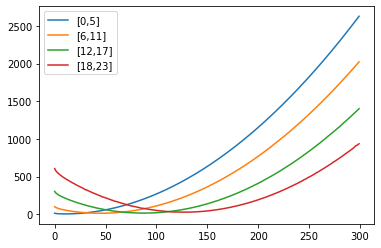

In [289]:
# plt.plot(history.history['loss'])
for k in [k for k in history if 'val_ca4' in k]:
    plt.plot(history[k], label=k.split('-')[1])
        
plt.legend()
        
plt.show()

In [290]:
min_len = min([x.shape[0] for x in train_dfs])

train_dataset = tf.data.Dataset.from_tensor_slices((
    train_dfs[3].drop('cnt',axis=1).to_numpy()[:min_len],
    train_dfs[3]['cnt'].to_numpy()[:min_len],
    train_dfs[2].drop('cnt',axis=1).to_numpy()[:min_len],
    train_dfs[2]['cnt'].to_numpy()[:min_len],
    train_dfs[1].drop('cnt',axis=1).to_numpy()[:min_len],
    train_dfs[1]['cnt'].to_numpy()[:min_len],
    train_dfs[0].drop('cnt',axis=1).to_numpy()[:min_len],
    train_dfs[0]['cnt'].to_numpy()[:min_len],
)).shuffle(100).batch(128,True)


test_dataset = tf.data.Dataset.from_tensor_slices((
    np.concatenate((
        test_dfs[3].drop('cnt',axis=1).to_numpy(),
        test_dfs[2].drop('cnt',axis=1).to_numpy(),
        test_dfs[1].drop('cnt',axis=1).to_numpy(),
        test_dfs[0].drop('cnt',axis=1).to_numpy(),
    )),
    np.concatenate((
        test_dfs[3]['cnt'].to_numpy(),
        test_dfs[2]['cnt'].to_numpy(),
        test_dfs[1]['cnt'].to_numpy(),
        test_dfs[0]['cnt'].to_numpy(),
    ))
)).shuffle(100).batch(128,True)

In [291]:
%%time
tf.random.set_seed(0)

m = DistMLP('none')
m.compile(
    optimizer='adam',
    loss=tf.keras.losses.MeanSquaredError(),
    metrics=[CWMet(ca,(q1,q2),name=f'ca{ca+1}-[{q1},{q2}]') for ca,(q1,q2) in product(range(4),zip(range(0,25,6)[:-1],range(-1,24,6)[1:]))],
    run_eagerly=True
)

history = defaultdict(list)

CPU times: user 1.24 s, sys: 0 ns, total: 1.24 s
Wall time: 1.23 s


In [293]:
tmp = m.fit(
    train_dataset,
    epochs=300,
    validation_data=test_dataset
)

for k in tmp.history:
    history[k]+=tmp.history[k]

Epoch 1/300
26/26 [==============================] - 3s 110ms/step - ca1-[0,5]: 43.0989 - ca1-[6,11]: 83.0475 - ca1-[12,17]: 291.6851 - ca1-[18,23]: 544.2434 - ca2-[0,5]: 21.1203 - ca2-[6,11]: 92.0716 - ca2-[12,17]: 166.9738 - ca2-[18,23]: 390.6555 - ca3-[0,5]: 10.6479 - ca3-[6,11]: 98.2006 - ca3-[12,17]: 334.2740 - ca3-[18,23]: 542.6176 - ca4-[0,5]: 13.1864 - ca4-[6,11]: 91.2627 - ca4-[12,17]: 267.8139 - ca4-[18,23]: 586.6292 - val_ca1-[0,5]: 13.4188 - val_ca1-[6,11]: 99.0165 - val_ca1-[12,17]: 297.9132 - val_ca1-[18,23]: 600.3541 - val_ca2-[0,5]: 10.0668 - val_ca2-[6,11]: 86.7342 - val_ca2-[12,17]: 275.0313 - val_ca2-[18,23]: 567.4828 - val_ca3-[0,5]: 9.8775 - val_ca3-[6,11]: 85.9923 - val_ca3-[12,17]: 273.7090 - val_ca3-[18,23]: 565.6170 - val_ca4-[0,5]: 11.1145 - val_ca4-[6,11]: 90.8490 - val_ca4-[12,17]: 282.8064 - val_ca4-[18,23]: 578.7250
Epoch 2/300
26/26 [==============================] - 3s 109ms/step - ca1-[0,5]: 37.2164 - ca1-[6,11]: 81.0151 - ca1-[12,17]: 286.1590 - ca1-[1

Epoch 11/300
26/26 [==============================] - 3s 109ms/step - ca1-[0,5]: 33.0484 - ca1-[6,11]: 60.7237 - ca1-[12,17]: 247.1420 - ca1-[18,23]: 474.4625 - ca2-[0,5]: 5.5740 - ca2-[6,11]: 54.2874 - ca2-[12,17]: 107.7027 - ca2-[18,23]: 304.3681 - ca3-[0,5]: 5.3793 - ca3-[6,11]: 59.9927 - ca3-[12,17]: 260.7265 - ca3-[18,23]: 445.1146 - ca4-[0,5]: 5.5387 - ca4-[6,11]: 52.7969 - ca4-[12,17]: 190.4631 - ca4-[18,23]: 467.5062 - val_ca1-[0,5]: 7.9671 - val_ca1-[6,11]: 77.7126 - val_ca1-[12,17]: 254.2737 - val_ca1-[18,23]: 542.6868 - val_ca2-[0,5]: 5.9205 - val_ca2-[6,11]: 51.8808 - val_ca2-[12,17]: 200.7906 - val_ca2-[18,23]: 462.6629 - val_ca3-[0,5]: 5.8007 - val_ca3-[6,11]: 54.9771 - val_ca3-[12,17]: 207.6265 - val_ca3-[18,23]: 473.0879 - val_ca4-[0,5]: 5.7938 - val_ca4-[6,11]: 55.3389 - val_ca4-[12,17]: 208.4109 - val_ca4-[18,23]: 474.2762
Epoch 12/300
26/26 [==============================] - 3s 109ms/step - ca1-[0,5]: 33.9039 - ca1-[6,11]: 65.4373 - ca1-[12,17]: 248.7814 - ca1-[18,23

Epoch 21/300
26/26 [==============================] - 3s 108ms/step - ca1-[0,5]: 27.4843 - ca1-[6,11]: 52.3032 - ca1-[12,17]: 214.5078 - ca1-[18,23]: 428.1993 - ca2-[0,5]: 3.0784 - ca2-[6,11]: 29.2834 - ca2-[12,17]: 74.2256 - ca2-[18,23]: 233.8292 - ca3-[0,5]: 8.5607 - ca3-[6,11]: 41.4387 - ca3-[12,17]: 208.0124 - ca3-[18,23]: 378.9024 - ca4-[0,5]: 8.1056 - ca4-[6,11]: 33.2463 - ca4-[12,17]: 144.4906 - ca4-[18,23]: 397.1342 - val_ca1-[0,5]: 6.1075 - val_ca1-[6,11]: 61.4616 - val_ca1-[12,17]: 225.7126 - val_ca1-[18,23]: 485.6451 - val_ca2-[0,5]: 11.1284 - val_ca2-[6,11]: 31.8471 - val_ca2-[12,17]: 154.8112 - val_ca2-[18,23]: 377.1268 - val_ca3-[0,5]: 8.9092 - val_ca3-[6,11]: 36.7083 - val_ca3-[12,17]: 168.1125 - val_ca3-[18,23]: 398.1180 - val_ca4-[0,5]: 9.4298 - val_ca4-[6,11]: 35.3765 - val_ca4-[12,17]: 164.5700 - val_ca4-[18,23]: 392.5605
Epoch 22/300
26/26 [==============================] - 3s 108ms/step - ca1-[0,5]: 20.5310 - ca1-[6,11]: 52.9130 - ca1-[12,17]: 211.7836 - ca1-[18,23

Epoch 31/300
26/26 [==============================] - 3s 106ms/step - ca1-[0,5]: 16.9109 - ca1-[6,11]: 38.9739 - ca1-[12,17]: 174.8686 - ca1-[18,23]: 379.0680 - ca2-[0,5]: 7.2470 - ca2-[6,11]: 12.8644 - ca2-[12,17]: 48.7760 - ca2-[18,23]: 188.8693 - ca3-[0,5]: 16.3224 - ca3-[6,11]: 26.8150 - ca3-[12,17]: 162.2774 - ca3-[18,23]: 323.8142 - ca4-[0,5]: 16.5452 - ca4-[6,11]: 21.0198 - ca4-[12,17]: 107.6127 - ca4-[18,23]: 334.1793 - val_ca1-[0,5]: 7.0922 - val_ca1-[6,11]: 43.5930 - val_ca1-[12,17]: 184.7825 - val_ca1-[18,23]: 428.1198 - val_ca2-[0,5]: 23.1530 - val_ca2-[6,11]: 20.1723 - val_ca2-[12,17]: 114.8135 - val_ca2-[18,23]: 315.1811 - val_ca3-[0,5]: 16.8780 - val_ca3-[6,11]: 24.7278 - val_ca3-[12,17]: 132.1381 - val_ca3-[18,23]: 344.2930 - val_ca4-[0,5]: 18.5639 - val_ca4-[6,11]: 23.2509 - val_ca4-[12,17]: 126.9305 - val_ca4-[18,23]: 335.6412
Epoch 32/300
26/26 [==============================] - 3s 109ms/step - ca1-[0,5]: 17.9099 - ca1-[6,11]: 34.2800 - ca1-[12,17]: 169.8181 - ca1-[1

Epoch 41/300
26/26 [==============================] - 3s 109ms/step - ca1-[0,5]: 11.8804 - ca1-[6,11]: 27.8259 - ca1-[12,17]: 137.1173 - ca1-[18,23]: 319.7450 - ca2-[0,5]: 17.9962 - ca2-[6,11]: 3.5445 - ca2-[12,17]: 28.6746 - ca2-[18,23]: 143.4741 - ca3-[0,5]: 29.3443 - ca3-[6,11]: 17.8439 - ca3-[12,17]: 129.8164 - ca3-[18,23]: 271.8030 - ca4-[0,5]: 29.7999 - ca4-[6,11]: 14.2894 - ca4-[12,17]: 81.4604 - ca4-[18,23]: 280.8614 - val_ca1-[0,5]: 12.8766 - val_ca1-[6,11]: 29.1843 - val_ca1-[12,17]: 147.5527 - val_ca1-[18,23]: 370.5438 - val_ca2-[0,5]: 41.7649 - val_ca2-[6,11]: 15.0316 - val_ca2-[12,17]: 82.3013 - val_ca2-[18,23]: 258.1293 - val_ca3-[0,5]: 29.6140 - val_ca3-[6,11]: 17.2685 - val_ca3-[12,17]: 101.6197 - val_ca3-[18,23]: 293.2133 - val_ca4-[0,5]: 32.3904 - val_ca4-[6,11]: 16.4807 - val_ca4-[12,17]: 96.5990 - val_ca4-[18,23]: 284.2854
Epoch 42/300
26/26 [==============================] - 3s 109ms/step - ca1-[0,5]: 11.5318 - ca1-[6,11]: 27.9779 - ca1-[12,17]: 130.0895 - ca1-[18,

Epoch 51/300
26/26 [==============================] - 3s 108ms/step - ca1-[0,5]: 9.0859 - ca1-[6,11]: 22.4866 - ca1-[12,17]: 108.2611 - ca1-[18,23]: 271.0415 - ca2-[0,5]: 35.0416 - ca2-[6,11]: 0.9248 - ca2-[12,17]: 14.5550 - ca2-[18,23]: 104.2307 - ca3-[0,5]: 46.9110 - ca3-[6,11]: 14.8947 - ca3-[12,17]: 106.5095 - ca3-[18,23]: 224.4255 - ca4-[0,5]: 47.0083 - ca4-[6,11]: 13.9774 - ca4-[12,17]: 59.9793 - ca4-[18,23]: 234.2977 - val_ca1-[0,5]: 22.2451 - val_ca1-[6,11]: 20.6043 - val_ca1-[12,17]: 117.0758 - val_ca1-[18,23]: 317.3850 - val_ca2-[0,5]: 67.1350 - val_ca2-[6,11]: 16.6783 - val_ca2-[12,17]: 55.8338 - val_ca2-[18,23]: 203.5198 - val_ca3-[0,5]: 47.2577 - val_ca3-[6,11]: 14.8084 - val_ca3-[12,17]: 75.1068 - val_ca3-[18,23]: 242.2046 - val_ca4-[0,5]: 50.4915 - val_ca4-[6,11]: 14.8567 - val_ca4-[12,17]: 71.4138 - val_ca4-[18,23]: 235.0762
Epoch 52/300
26/26 [==============================] - 3s 108ms/step - ca1-[0,5]: 9.1010 - ca1-[6,11]: 19.8656 - ca1-[12,17]: 103.1432 - ca1-[18,23]

Epoch 61/300
26/26 [==============================] - 3s 107ms/step - ca1-[0,5]: 8.3854 - ca1-[6,11]: 20.4843 - ca1-[12,17]: 82.8065 - ca1-[18,23]: 228.2716 - ca2-[0,5]: 56.7912 - ca2-[6,11]: 4.9840 - ca2-[12,17]: 5.9327 - ca2-[18,23]: 72.1414 - ca3-[0,5]: 69.0054 - ca3-[6,11]: 15.4774 - ca3-[12,17]: 81.2365 - ca3-[18,23]: 183.9295 - ca4-[0,5]: 67.8583 - ca4-[6,11]: 16.7075 - ca4-[12,17]: 41.2380 - ca4-[18,23]: 194.1379 - val_ca1-[0,5]: 35.0783 - val_ca1-[6,11]: 15.8572 - val_ca1-[12,17]: 91.6204 - val_ca1-[18,23]: 278.5667 - val_ca2-[0,5]: 99.0017 - val_ca2-[6,11]: 25.0610 - val_ca2-[12,17]: 36.1883 - val_ca2-[18,23]: 162.7237 - val_ca3-[0,5]: 69.6291 - val_ca3-[6,11]: 17.1639 - val_ca3-[12,17]: 53.6584 - val_ca3-[18,23]: 203.9028 - val_ca4-[0,5]: 72.0396 - val_ca4-[6,11]: 17.6467 - val_ca4-[12,17]: 51.8631 - val_ca4-[18,23]: 199.9780
Epoch 62/300
26/26 [==============================] - 3s 109ms/step - ca1-[0,5]: 8.3861 - ca1-[6,11]: 18.7194 - ca1-[12,17]: 79.7547 - ca1-[18,23]: 224.

Epoch 71/300
26/26 [==============================] - 3s 109ms/step - ca1-[0,5]: 9.0335 - ca1-[6,11]: 20.7902 - ca1-[12,17]: 62.6108 - ca1-[18,23]: 189.0804 - ca2-[0,5]: 85.2598 - ca2-[6,11]: 15.5986 - ca2-[12,17]: 5.1243 - ca2-[18,23]: 46.2643 - ca3-[0,5]: 95.6545 - ca3-[6,11]: 21.1687 - ca3-[12,17]: 63.0858 - ca3-[18,23]: 140.4282 - ca4-[0,5]: 90.8503 - ca4-[6,11]: 23.8576 - ca4-[12,17]: 29.0976 - ca4-[18,23]: 158.7609 - val_ca1-[0,5]: 50.7919 - val_ca1-[6,11]: 14.8969 - val_ca1-[12,17]: 69.9177 - val_ca1-[18,23]: 236.6544 - val_ca2-[0,5]: 136.2311 - val_ca2-[6,11]: 39.8451 - val_ca2-[12,17]: 23.4916 - val_ca2-[18,23]: 123.1103 - val_ca3-[0,5]: 95.8454 - val_ca3-[6,11]: 24.2393 - val_ca3-[12,17]: 37.1238 - val_ca3-[18,23]: 164.2371 - val_ca4-[0,5]: 95.6997 - val_ca4-[6,11]: 24.1923 - val_ca4-[12,17]: 37.1924 - val_ca4-[18,23]: 164.4139
Epoch 72/300
26/26 [==============================] - 3s 108ms/step - ca1-[0,5]: 9.1521 - ca1-[6,11]: 22.5173 - ca1-[12,17]: 57.8598 - ca1-[18,23]: 18

Epoch 81/300
26/26 [==============================] - 3s 108ms/step - ca1-[0,5]: 7.5645 - ca1-[6,11]: 26.1476 - ca1-[12,17]: 45.8899 - ca1-[18,23]: 153.9778 - ca2-[0,5]: 121.5590 - ca2-[6,11]: 32.8376 - ca2-[12,17]: 9.9341 - ca2-[18,23]: 27.1364 - ca3-[0,5]: 126.4108 - ca3-[6,11]: 29.6565 - ca3-[12,17]: 48.7344 - ca3-[18,23]: 115.0429 - ca4-[0,5]: 117.7397 - ca4-[6,11]: 34.1424 - ca4-[12,17]: 21.3897 - ca4-[18,23]: 131.8558 - val_ca1-[0,5]: 69.7267 - val_ca1-[6,11]: 17.6650 - val_ca1-[12,17]: 53.5534 - val_ca1-[18,23]: 204.3850 - val_ca2-[0,5]: 180.1147 - val_ca2-[6,11]: 61.7316 - val_ca2-[12,17]: 17.8461 - val_ca2-[18,23]: 93.5950 - val_ca3-[0,5]: 126.8647 - val_ca3-[6,11]: 36.4958 - val_ca3-[12,17]: 26.3067 - val_ca3-[18,23]: 133.7706 - val_ca4-[0,5]: 121.8549 - val_ca4-[6,11]: 34.4162 - val_ca4-[12,17]: 27.7506 - val_ca4-[18,23]: 138.5305
Epoch 82/300
26/26 [==============================] - 3s 107ms/step - ca1-[0,5]: 9.7032 - ca1-[6,11]: 27.3768 - ca1-[12,17]: 40.9121 - ca1-[18,23]

Epoch 91/300
26/26 [==============================] - 3s 108ms/step - ca1-[0,5]: 15.0375 - ca1-[6,11]: 34.8732 - ca1-[12,17]: 29.9116 - ca1-[18,23]: 135.2452 - ca2-[0,5]: 154.6597 - ca2-[6,11]: 53.2931 - ca2-[12,17]: 19.3426 - ca2-[18,23]: 13.0595 - ca3-[0,5]: 164.0607 - ca3-[6,11]: 46.5208 - ca3-[12,17]: 34.3386 - ca3-[18,23]: 81.3262 - ca4-[0,5]: 145.3305 - ca4-[6,11]: 47.6723 - ca4-[12,17]: 14.7912 - ca4-[18,23]: 104.7527 - val_ca1-[0,5]: 92.6302 - val_ca1-[6,11]: 22.9306 - val_ca1-[12,17]: 39.1643 - val_ca1-[18,23]: 168.5887 - val_ca2-[0,5]: 231.4063 - val_ca2-[6,11]: 87.9584 - val_ca2-[12,17]: 17.9936 - val_ca2-[18,23]: 66.7418 - val_ca3-[0,5]: 163.4047 - val_ca3-[6,11]: 51.8505 - val_ca3-[12,17]: 19.1638 - val_ca3-[18,23]: 102.8018 - val_ca4-[0,5]: 150.8556 - val_ca4-[6,11]: 45.9001 - val_ca4-[12,17]: 20.9249 - val_ca4-[18,23]: 111.7801
Epoch 92/300
26/26 [==============================] - 3s 109ms/step - ca1-[0,5]: 15.4106 - ca1-[6,11]: 35.4298 - ca1-[12,17]: 28.3667 - ca1-[18,2

Epoch 101/300
26/26 [==============================] - 3s 107ms/step - ca1-[0,5]: 17.6284 - ca1-[6,11]: 41.9612 - ca1-[12,17]: 19.5884 - ca1-[18,23]: 110.8394 - ca2-[0,5]: 196.2194 - ca2-[6,11]: 85.9918 - ca2-[12,17]: 35.2173 - ca2-[18,23]: 5.1909 - ca3-[0,5]: 202.6992 - ca3-[6,11]: 67.5218 - ca3-[12,17]: 31.6777 - ca3-[18,23]: 62.6576 - ca4-[0,5]: 174.4758 - ca4-[6,11]: 62.3465 - ca4-[12,17]: 15.1379 - ca4-[18,23]: 86.9466 - val_ca1-[0,5]: 117.9963 - val_ca1-[6,11]: 32.3667 - val_ca1-[12,17]: 28.5913 - val_ca1-[18,23]: 139.9917 - val_ca2-[0,5]: 287.7469 - val_ca2-[6,11]: 122.8701 - val_ca2-[12,17]: 24.9547 - val_ca2-[18,23]: 48.0503 - val_ca3-[0,5]: 203.4572 - val_ca3-[6,11]: 73.5056 - val_ca3-[12,17]: 17.0789 - val_ca3-[18,23]: 79.0915 - val_ca4-[0,5]: 179.9782 - val_ca4-[6,11]: 61.0390 - val_ca4-[12,17]: 17.6929 - val_ca4-[18,23]: 91.9750
Epoch 102/300
26/26 [==============================] - 3s 109ms/step - ca1-[0,5]: 21.0893 - ca1-[6,11]: 44.1539 - ca1-[12,17]: 20.4168 - ca1-[18,2

Epoch 111/300
26/26 [==============================] - 3s 109ms/step - ca1-[0,5]: 26.8380 - ca1-[6,11]: 60.0995 - ca1-[12,17]: 13.5383 - ca1-[18,23]: 86.5098 - ca2-[0,5]: 266.5479 - ca2-[6,11]: 121.1621 - ca2-[12,17]: 57.8532 - ca2-[18,23]: 3.0329 - ca3-[0,5]: 248.4817 - ca3-[6,11]: 88.6059 - ca3-[12,17]: 28.1806 - ca3-[18,23]: 45.2165 - ca4-[0,5]: 204.6065 - ca4-[6,11]: 79.2660 - ca4-[12,17]: 15.8582 - ca4-[18,23]: 72.0945 - val_ca1-[0,5]: 146.7658 - val_ca1-[6,11]: 44.7024 - val_ca1-[12,17]: 21.9575 - val_ca1-[18,23]: 114.6840 - val_ca2-[0,5]: 350.7414 - val_ca2-[6,11]: 162.9088 - val_ca2-[12,17]: 37.6592 - val_ca2-[18,23]: 35.9942 - val_ca3-[0,5]: 248.3718 - val_ca3-[6,11]: 98.9155 - val_ca3-[12,17]: 19.5304 - val_ca3-[18,23]: 60.0997 - val_ca4-[0,5]: 209.9609 - val_ca4-[6,11]: 76.9717 - val_ca4-[12,17]: 17.2648 - val_ca4-[18,23]: 75.9543
Epoch 112/300
26/26 [==============================] - 3s 108ms/step - ca1-[0,5]: 27.5806 - ca1-[6,11]: 61.4480 - ca1-[12,17]: 11.9572 - ca1-[18,2

Epoch 121/300
26/26 [==============================] - 3s 107ms/step - ca1-[0,5]: 33.9136 - ca1-[6,11]: 65.9489 - ca1-[12,17]: 8.9073 - ca1-[18,23]: 60.7747 - ca2-[0,5]: 320.6262 - ca2-[6,11]: 162.5779 - ca2-[12,17]: 84.5636 - ca2-[18,23]: 7.3280 - ca3-[0,5]: 297.3896 - ca3-[6,11]: 117.6891 - ca3-[12,17]: 33.8779 - ca3-[18,23]: 30.5559 - ca4-[0,5]: 233.8768 - ca4-[6,11]: 96.4211 - ca4-[12,17]: 18.1045 - ca4-[18,23]: 58.4472 - val_ca1-[0,5]: 180.0576 - val_ca1-[6,11]: 60.6291 - val_ca1-[12,17]: 17.7931 - val_ca1-[18,23]: 92.5458 - val_ca2-[0,5]: 422.1938 - val_ca2-[6,11]: 210.2159 - val_ca2-[12,17]: 56.9923 - val_ca2-[18,23]: 30.1229 - val_ca3-[0,5]: 299.5837 - val_ca3-[6,11]: 129.5565 - val_ca3-[12,17]: 26.3694 - val_ca3-[18,23]: 45.5632 - val_ca4-[0,5]: 241.4176 - val_ca4-[6,11]: 94.3895 - val_ca4-[12,17]: 18.6281 - val_ca4-[18,23]: 63.0682
Epoch 122/300
26/26 [==============================] - 3s 108ms/step - ca1-[0,5]: 35.7919 - ca1-[6,11]: 75.9168 - ca1-[12,17]: 8.8977 - ca1-[18,23

Epoch 131/300
26/26 [==============================] - 3s 108ms/step - ca1-[0,5]: 45.9436 - ca1-[6,11]: 72.9572 - ca1-[12,17]: 8.7634 - ca1-[18,23]: 46.6750 - ca2-[0,5]: 385.9607 - ca2-[6,11]: 204.1992 - ca2-[12,17]: 114.5905 - ca2-[18,23]: 16.0757 - ca3-[0,5]: 352.1937 - ca3-[6,11]: 147.9476 - ca3-[12,17]: 41.1062 - ca3-[18,23]: 22.7818 - ca4-[0,5]: 1.1476 - ca4-[6,11]: 2.1126 - ca4-[12,17]: 5.9176 - ca4-[18,23]: 43.7697 - val_ca1-[0,5]: 214.0845 - val_ca1-[6,11]: 79.1369 - val_ca1-[12,17]: 16.9413 - val_ca1-[18,23]: 73.6592 - val_ca2-[0,5]: 495.7045 - val_ca2-[6,11]: 261.9895 - val_ca2-[12,17]: 83.1249 - val_ca2-[18,23]: 30.6840 - val_ca3-[0,5]: 351.9324 - val_ca3-[6,11]: 163.4722 - val_ca3-[12,17]: 38.0647 - val_ca3-[18,23]: 35.6399 - val_ca4-[0,5]: 0.9479 - val_ca4-[6,11]: 2.9401 - val_ca4-[12,17]: 13.5127 - val_ca4-[18,23]: 52.9033
Epoch 132/300
26/26 [==============================] - 3s 108ms/step - ca1-[0,5]: 34.6784 - ca1-[6,11]: 93.1243 - ca1-[12,17]: 9.3498 - ca1-[18,23]: 48

Epoch 141/300
26/26 [==============================] - 3s 108ms/step - ca1-[0,5]: 55.3342 - ca1-[6,11]: 119.0081 - ca1-[12,17]: 12.1784 - ca1-[18,23]: 33.6404 - ca2-[0,5]: 464.1176 - ca2-[6,11]: 266.7315 - ca2-[12,17]: 155.5361 - ca2-[18,23]: 31.9443 - ca3-[0,5]: 411.8184 - ca3-[6,11]: 188.5628 - ca3-[12,17]: 54.6406 - ca3-[18,23]: 17.7581 - ca4-[0,5]: 0.4781 - ca4-[6,11]: 0.5872 - ca4-[12,17]: 2.4255 - ca4-[18,23]: 28.0421 - val_ca1-[0,5]: 254.6473 - val_ca1-[6,11]: 101.1414 - val_ca1-[12,17]: 19.6985 - val_ca1-[18,23]: 55.4760 - val_ca2-[0,5]: 581.1134 - val_ca2-[6,11]: 320.9859 - val_ca2-[12,17]: 115.2584 - val_ca2-[18,23]: 37.2054 - val_ca3-[0,5]: 413.3551 - val_ca3-[6,11]: 202.5480 - val_ca3-[12,17]: 54.3113 - val_ca3-[18,23]: 28.9133 - val_ca4-[0,5]: 0.4802 - val_ca4-[6,11]: 1.5083 - val_ca4-[12,17]: 6.9478 - val_ca4-[18,23]: 33.9711
Epoch 142/300
26/26 [==============================] - 3s 109ms/step - ca1-[0,5]: 58.9915 - ca1-[6,11]: 117.0534 - ca1-[12,17]: 11.9645 - ca1-[18,23

Epoch 151/300
26/26 [==============================] - 3s 108ms/step - ca1-[0,5]: 67.6870 - ca1-[6,11]: 139.8632 - ca1-[12,17]: 18.5587 - ca1-[18,23]: 22.7672 - ca2-[0,5]: 523.3109 - ca2-[6,11]: 327.2783 - ca2-[12,17]: 207.5481 - ca2-[18,23]: 53.3467 - ca3-[0,5]: 474.3253 - ca3-[6,11]: 227.0186 - ca3-[12,17]: 71.3345 - ca3-[18,23]: 19.5454 - ca4-[0,5]: 0.4124 - ca4-[6,11]: 0.3224 - ca4-[12,17]: 1.3216 - ca4-[18,23]: 17.8478 - val_ca1-[0,5]: 294.1002 - val_ca1-[6,11]: 126.3742 - val_ca1-[12,17]: 26.0311 - val_ca1-[18,23]: 46.4760 - val_ca2-[0,5]: 665.7158 - val_ca2-[6,11]: 386.3422 - val_ca2-[12,17]: 153.9884 - val_ca2-[18,23]: 50.1430 - val_ca3-[0,5]: 473.4908 - val_ca3-[6,11]: 246.1951 - val_ca3-[12,17]: 75.4177 - val_ca3-[18,23]: 29.5475 - val_ca4-[0,5]: 0.4219 - val_ca4-[6,11]: 0.9906 - val_ca4-[12,17]: 4.5421 - val_ca4-[18,23]: 26.2661
Epoch 152/300
26/26 [==============================] - 3s 109ms/step - ca1-[0,5]: 47.0472 - ca1-[6,11]: 136.9808 - ca1-[12,17]: 19.2982 - ca1-[18,23

Epoch 161/300
26/26 [==============================] - 3s 108ms/step - ca1-[0,5]: 85.3710 - ca1-[6,11]: 161.3522 - ca1-[12,17]: 27.8280 - ca1-[18,23]: 16.0594 - ca2-[0,5]: 626.0161 - ca2-[6,11]: 380.0817 - ca2-[12,17]: 257.9420 - ca2-[18,23]: 80.7111 - ca3-[0,5]: 541.0464 - ca3-[6,11]: 279.5416 - ca3-[12,17]: 93.9103 - ca3-[18,23]: 24.8832 - ca4-[0,5]: 0.3891 - ca4-[6,11]: 0.2291 - ca4-[12,17]: 0.7062 - ca4-[18,23]: 11.8031 - val_ca1-[0,5]: 339.2466 - val_ca1-[6,11]: 154.8688 - val_ca1-[12,17]: 34.8464 - val_ca1-[18,23]: 37.9743 - val_ca2-[0,5]: 760.6685 - val_ca2-[6,11]: 457.9388 - val_ca2-[12,17]: 197.1492 - val_ca2-[18,23]: 70.6373 - val_ca3-[0,5]: 541.5287 - val_ca3-[6,11]: 294.4026 - val_ca3-[12,17]: 99.7476 - val_ca3-[18,23]: 34.1425 - val_ca4-[0,5]: 0.3934 - val_ca4-[6,11]: 0.6890 - val_ca4-[12,17]: 3.3853 - val_ca4-[18,23]: 19.8095
Epoch 162/300
26/26 [==============================] - 3s 108ms/step - ca1-[0,5]: 82.9219 - ca1-[6,11]: 174.4473 - ca1-[12,17]: 28.9403 - ca1-[18,23

Epoch 171/300
26/26 [==============================] - 3s 108ms/step - ca1-[0,5]: 96.6465 - ca1-[6,11]: 192.3903 - ca1-[12,17]: 40.4959 - ca1-[18,23]: 14.5898 - ca2-[0,5]: 711.7372 - ca2-[6,11]: 467.9070 - ca2-[12,17]: 278.6390 - ca2-[18,23]: 113.5955 - ca3-[0,5]: 616.0871 - ca3-[6,11]: 318.5750 - ca3-[12,17]: 117.8127 - ca3-[18,23]: 34.9703 - ca4-[0,5]: 0.3488 - ca4-[6,11]: 0.1189 - ca4-[12,17]: 0.3002 - ca4-[18,23]: 7.5730 - val_ca1-[0,5]: 386.4829 - val_ca1-[6,11]: 187.9936 - val_ca1-[12,17]: 47.3907 - val_ca1-[18,23]: 31.9111 - val_ca2-[0,5]: 860.1403 - val_ca2-[6,11]: 538.3936 - val_ca2-[12,17]: 249.0349 - val_ca2-[18,23]: 95.4279 - val_ca3-[0,5]: 612.7141 - val_ca3-[6,11]: 349.2270 - val_ca3-[12,17]: 130.1802 - val_ca3-[18,23]: 41.8614 - val_ca4-[0,5]: 0.3565 - val_ca4-[6,11]: 0.4909 - val_ca4-[12,17]: 2.4762 - val_ca4-[18,23]: 14.5087
Epoch 172/300
26/26 [==============================] - 3s 108ms/step - ca1-[0,5]: 93.1964 - ca1-[6,11]: 206.1981 - ca1-[12,17]: 41.0125 - ca1-[18,

Epoch 181/300
26/26 [==============================] - 3s 109ms/step - ca1-[0,5]: 119.3407 - ca1-[6,11]: 237.9450 - ca1-[12,17]: 57.4053 - ca1-[18,23]: 14.4141 - ca2-[0,5]: 789.4419 - ca2-[6,11]: 550.7578 - ca2-[12,17]: 320.7457 - ca2-[18,23]: 143.9478 - ca3-[0,5]: 694.9597 - ca3-[6,11]: 387.9772 - ca3-[12,17]: 152.0993 - ca3-[18,23]: 47.8840 - ca4-[0,5]: 0.3397 - ca4-[6,11]: 0.0631 - ca4-[12,17]: 0.1495 - ca4-[18,23]: 4.7760 - val_ca1-[0,5]: 438.4140 - val_ca1-[6,11]: 221.2593 - val_ca1-[12,17]: 63.0132 - val_ca1-[18,23]: 29.5330 - val_ca2-[0,5]: 968.0448 - val_ca2-[6,11]: 619.4618 - val_ca2-[12,17]: 306.5643 - val_ca2-[18,23]: 129.4248 - val_ca3-[0,5]: 690.1857 - val_ca3-[6,11]: 404.0870 - val_ca3-[12,17]: 164.7147 - val_ca3-[18,23]: 55.8745 - val_ca4-[0,5]: 0.3470 - val_ca4-[6,11]: 0.3704 - val_ca4-[12,17]: 1.8302 - val_ca4-[18,23]: 11.0651
Epoch 182/300
26/26 [==============================] - 3s 108ms/step - ca1-[0,5]: 115.0111 - ca1-[6,11]: 242.5003 - ca1-[12,17]: 56.8652 - ca1-[

Epoch 191/300
26/26 [==============================] - 3s 106ms/step - ca1-[0,5]: 131.3048 - ca1-[6,11]: 274.8716 - ca1-[12,17]: 73.6497 - ca1-[18,23]: 18.1792 - ca2-[0,5]: 904.2879 - ca2-[6,11]: 633.8202 - ca2-[12,17]: 445.7903 - ca2-[18,23]: 187.2426 - ca3-[0,5]: 772.0835 - ca3-[6,11]: 446.5472 - ca3-[12,17]: 184.9551 - ca3-[18,23]: 67.4694 - ca4-[0,5]: 0.3189 - ca4-[6,11]: 0.0346 - ca4-[12,17]: 0.0809 - ca4-[18,23]: 2.8986 - val_ca1-[0,5]: 493.4614 - val_ca1-[6,11]: 259.3190 - val_ca1-[12,17]: 81.4646 - val_ca1-[18,23]: 30.6784 - val_ca2-[0,5]: 1082.0776 - val_ca2-[6,11]: 709.8170 - val_ca2-[12,17]: 368.6436 - val_ca2-[18,23]: 166.2846 - val_ca3-[0,5]: 774.5028 - val_ca3-[6,11]: 467.6853 - val_ca3-[12,17]: 203.8958 - val_ca3-[18,23]: 73.3552 - val_ca4-[0,5]: 0.3318 - val_ca4-[6,11]: 0.3018 - val_ca4-[12,17]: 1.5607 - val_ca4-[18,23]: 8.5966
Epoch 192/300
26/26 [==============================] - 3s 108ms/step - ca1-[0,5]: 104.5955 - ca1-[6,11]: 248.1783 - ca1-[12,17]: 78.1459 - ca1-[

Epoch 201/300
26/26 [==============================] - 3s 107ms/step - ca1-[0,5]: 150.7452 - ca1-[6,11]: 319.8121 - ca1-[12,17]: 98.7113 - ca1-[18,23]: 24.3341 - ca2-[0,5]: 1021.7068 - ca2-[6,11]: 729.8658 - ca2-[12,17]: 517.5973 - ca2-[18,23]: 236.9383 - ca3-[0,5]: 928.9808 - ca3-[6,11]: 565.6154 - ca3-[12,17]: 259.6524 - ca3-[18,23]: 111.3167 - ca4-[0,5]: 0.3008 - ca4-[6,11]: 0.0140 - ca4-[12,17]: 0.0460 - ca4-[18,23]: 1.8651 - val_ca1-[0,5]: 549.6082 - val_ca1-[6,11]: 299.3322 - val_ca1-[12,17]: 104.4438 - val_ca1-[18,23]: 35.0135 - val_ca2-[0,5]: 1199.3992 - val_ca2-[6,11]: 804.2766 - val_ca2-[12,17]: 440.7987 - val_ca2-[18,23]: 211.1797 - val_ca3-[0,5]: 930.1478 - val_ca3-[6,11]: 588.5046 - val_ca3-[12,17]: 287.2843 - val_ca3-[18,23]: 116.7986 - val_ca4-[0,5]: 0.3070 - val_ca4-[6,11]: 0.2525 - val_ca4-[12,17]: 1.2290 - val_ca4-[18,23]: 6.3329
Epoch 202/300
26/26 [==============================] - 3s 106ms/step - ca1-[0,5]: 152.7651 - ca1-[6,11]: 320.4025 - ca1-[12,17]: 102.0093 - 

Epoch 211/300
26/26 [==============================] - 3s 109ms/step - ca1-[0,5]: 159.1407 - ca1-[6,11]: 362.0911 - ca1-[12,17]: 116.8132 - ca1-[18,23]: 32.4520 - ca2-[0,5]: 1054.7757 - ca2-[6,11]: 826.0082 - ca2-[12,17]: 530.3791 - ca2-[18,23]: 304.4557 - ca3-[0,5]: 88.5465 - ca3-[6,11]: 14.9063 - ca3-[12,17]: 12.3099 - ca3-[18,23]: 27.3667 - ca4-[0,5]: 0.2830 - ca4-[6,11]: 0.0093 - ca4-[12,17]: 0.0266 - ca4-[18,23]: 1.3264 - val_ca1-[0,5]: 612.1013 - val_ca1-[6,11]: 346.5435 - val_ca1-[12,17]: 129.1318 - val_ca1-[18,23]: 41.0944 - val_ca2-[0,5]: 1333.6583 - val_ca2-[6,11]: 917.3094 - val_ca2-[12,17]: 519.1129 - val_ca2-[18,23]: 260.9036 - val_ca3-[0,5]: 64.7043 - val_ca3-[6,11]: 46.0305 - val_ca3-[12,17]: 105.6141 - val_ca3-[18,23]: 81.1372 - val_ca4-[0,5]: 0.2892 - val_ca4-[6,11]: 0.2074 - val_ca4-[12,17]: 1.0597 - val_ca4-[18,23]: 4.9589
Epoch 212/300
26/26 [==============================] - 3s 109ms/step - ca1-[0,5]: 173.7628 - ca1-[6,11]: 348.7619 - ca1-[12,17]: 124.6030 - ca1-[1

Epoch 221/300
26/26 [==============================] - 3s 107ms/step - ca1-[0,5]: 193.8759 - ca1-[6,11]: 409.1581 - ca1-[12,17]: 152.5915 - ca1-[18,23]: 47.2685 - ca2-[0,5]: 1342.6962 - ca2-[6,11]: 1012.0040 - ca2-[12,17]: 692.8050 - ca2-[18,23]: 396.4312 - ca3-[0,5]: 21.4039 - ca3-[6,11]: 1.2883 - ca3-[12,17]: 2.5050 - ca3-[18,23]: 4.1878 - ca4-[0,5]: 0.2577 - ca4-[6,11]: 0.0055 - ca4-[12,17]: 0.0127 - ca4-[18,23]: 0.8004 - val_ca1-[0,5]: 675.7811 - val_ca1-[6,11]: 393.5567 - val_ca1-[12,17]: 157.2079 - val_ca1-[18,23]: 52.1768 - val_ca2-[0,5]: 1564.5532 - val_ca2-[6,11]: 1107.6346 - val_ca2-[12,17]: 664.1221 - val_ca2-[18,23]: 367.2621 - val_ca3-[0,5]: 23.2996 - val_ca3-[6,11]: 21.4701 - val_ca3-[12,17]: 80.8284 - val_ca3-[18,23]: 64.7648 - val_ca4-[0,5]: 0.2703 - val_ca4-[6,11]: 0.1736 - val_ca4-[12,17]: 0.9393 - val_ca4-[18,23]: 3.9877
Epoch 222/300
26/26 [==============================] - 3s 108ms/step - ca1-[0,5]: 196.1896 - ca1-[6,11]: 403.3184 - ca1-[12,17]: 155.6587 - ca1-[18,

Epoch 231/300
26/26 [==============================] - 3s 106ms/step - ca1-[0,5]: 204.0012 - ca1-[6,11]: 457.8041 - ca1-[12,17]: 184.0070 - ca1-[18,23]: 61.9922 - ca2-[0,5]: 1514.6860 - ca2-[6,11]: 1157.1943 - ca2-[12,17]: 881.2230 - ca2-[18,23]: 484.1238 - ca3-[0,5]: 16.6041 - ca3-[6,11]: 0.7638 - ca3-[12,17]: 0.8878 - ca3-[18,23]: 1.9571 - ca4-[0,5]: 0.2372 - ca4-[6,11]: 0.0094 - ca4-[12,17]: 0.0233 - ca4-[18,23]: 0.5290 - val_ca1-[0,5]: 742.1128 - val_ca1-[6,11]: 443.8648 - val_ca1-[12,17]: 189.2883 - val_ca1-[18,23]: 66.0369 - val_ca2-[0,5]: 1744.2930 - val_ca2-[6,11]: 1259.1913 - val_ca2-[12,17]: 783.8378 - val_ca2-[18,23]: 453.9879 - val_ca3-[0,5]: 17.9563 - val_ca3-[6,11]: 6.6688 - val_ca3-[12,17]: 47.2263 - val_ca3-[18,23]: 44.0028 - val_ca4-[0,5]: 0.2481 - val_ca4-[6,11]: 0.1471 - val_ca4-[12,17]: 0.7843 - val_ca4-[18,23]: 3.3167
Epoch 232/300
26/26 [==============================] - 3s 108ms/step - ca1-[0,5]: 201.9930 - ca1-[6,11]: 433.3938 - ca1-[12,17]: 186.9633 - ca1-[18,2

Epoch 241/300
26/26 [==============================] - 3s 109ms/step - ca1-[0,5]: 258.1064 - ca1-[6,11]: 498.1916 - ca1-[12,17]: 216.9621 - ca1-[18,23]: 82.1623 - ca2-[0,5]: 1615.1638 - ca2-[6,11]: 1310.8146 - ca2-[12,17]: 998.7088 - ca2-[18,23]: 599.0051 - ca3-[0,5]: 15.0183 - ca3-[6,11]: 0.6473 - ca3-[12,17]: 0.7921 - ca3-[18,23]: 2.2640 - ca4-[0,5]: 0.2160 - ca4-[6,11]: 0.0058 - ca4-[12,17]: 0.0115 - ca4-[18,23]: 0.1903 - val_ca1-[0,5]: 812.8669 - val_ca1-[6,11]: 499.8154 - val_ca1-[12,17]: 222.5800 - val_ca1-[18,23]: 82.4808 - val_ca2-[0,5]: 1927.8594 - val_ca2-[6,11]: 1417.8438 - val_ca2-[12,17]: 903.1790 - val_ca2-[18,23]: 545.1348 - val_ca3-[0,5]: 16.6092 - val_ca3-[6,11]: 4.2376 - val_ca3-[12,17]: 27.4701 - val_ca3-[18,23]: 31.7388 - val_ca4-[0,5]: 0.2269 - val_ca4-[6,11]: 0.1333 - val_ca4-[12,17]: 0.7932 - val_ca4-[18,23]: 3.1081
Epoch 242/300
26/26 [==============================] - 3s 108ms/step - ca1-[0,5]: 229.6470 - ca1-[6,11]: 486.4708 - ca1-[12,17]: 220.9219 - ca1-[18,2

Epoch 251/300
26/26 [==============================] - 3s 109ms/step - ca1-[0,5]: 232.0022 - ca1-[6,11]: 540.6036 - ca1-[12,17]: 261.6210 - ca1-[18,23]: 103.5207 - ca2-[0,5]: 1720.2786 - ca2-[6,11]: 1469.5800 - ca2-[12,17]: 1133.9518 - ca2-[18,23]: 704.8633 - ca3-[0,5]: 14.6411 - ca3-[6,11]: 0.5669 - ca3-[12,17]: 0.3995 - ca3-[18,23]: 1.5963 - ca4-[0,5]: 0.1936 - ca4-[6,11]: 0.0070 - ca4-[12,17]: 0.0144 - ca4-[18,23]: 0.2423 - val_ca1-[0,5]: 886.9062 - val_ca1-[6,11]: 553.5167 - val_ca1-[12,17]: 262.5060 - val_ca1-[18,23]: 102.8986 - val_ca2-[0,5]: 2116.7043 - val_ca2-[6,11]: 1572.7467 - val_ca2-[12,17]: 1036.5150 - val_ca2-[18,23]: 645.6435 - val_ca3-[0,5]: 15.8570 - val_ca3-[6,11]: 3.9671 - val_ca3-[12,17]: 17.3236 - val_ca3-[18,23]: 26.5414 - val_ca4-[0,5]: 0.2060 - val_ca4-[6,11]: 0.1019 - val_ca4-[12,17]: 0.6284 - val_ca4-[18,23]: 2.6283
Epoch 252/300
26/26 [==============================] - 3s 107ms/step - ca1-[0,5]: 279.5865 - ca1-[6,11]: 534.1354 - ca1-[12,17]: 260.2106 - ca1-[

Epoch 261/300
26/26 [==============================] - 3s 109ms/step - ca1-[0,5]: 286.7869 - ca1-[6,11]: 618.5141 - ca1-[12,17]: 300.5143 - ca1-[18,23]: 129.9560 - ca2-[0,5]: 1818.3185 - ca2-[6,11]: 1630.8511 - ca2-[12,17]: 1158.5231 - ca2-[18,23]: 817.3846 - ca3-[0,5]: 14.6772 - ca3-[6,11]: 0.4005 - ca3-[12,17]: 0.2171 - ca3-[18,23]: 0.9577 - ca4-[0,5]: 0.1760 - ca4-[6,11]: 0.0047 - ca4-[12,17]: 0.0083 - ca4-[18,23]: 0.1752 - val_ca1-[0,5]: 961.0378 - val_ca1-[6,11]: 616.8257 - val_ca1-[12,17]: 302.2428 - val_ca1-[18,23]: 125.8916 - val_ca2-[0,5]: 2306.8171 - val_ca2-[6,11]: 1745.3278 - val_ca2-[12,17]: 1169.8894 - val_ca2-[18,23]: 752.1825 - val_ca3-[0,5]: 15.2383 - val_ca3-[6,11]: 3.3485 - val_ca3-[12,17]: 10.4696 - val_ca3-[18,23]: 18.7190 - val_ca4-[0,5]: 0.1806 - val_ca4-[6,11]: 0.0894 - val_ca4-[12,17]: 0.5981 - val_ca4-[18,23]: 2.6313
Epoch 262/300
26/26 [==============================] - 3s 108ms/step - ca1-[0,5]: 268.7456 - ca1-[6,11]: 593.9599 - ca1-[12,17]: 301.8222 - ca1-[

Epoch 271/300
26/26 [==============================] - 3s 109ms/step - ca1-[0,5]: 293.9511 - ca1-[6,11]: 645.5334 - ca1-[12,17]: 342.0983 - ca1-[18,23]: 168.4606 - ca2-[0,5]: 2205.0748 - ca2-[6,11]: 1800.6898 - ca2-[12,17]: 1401.2705 - ca2-[18,23]: 934.7323 - ca3-[0,5]: 15.0714 - ca3-[6,11]: 0.3460 - ca3-[12,17]: 0.1493 - ca3-[18,23]: 0.5974 - ca4-[0,5]: 0.1524 - ca4-[6,11]: 0.0047 - ca4-[12,17]: 0.0086 - ca4-[18,23]: 0.1322 - val_ca1-[0,5]: 1043.0159 - val_ca1-[6,11]: 679.0026 - val_ca1-[12,17]: 348.2604 - val_ca1-[18,23]: 151.8400 - val_ca2-[0,5]: 2511.3528 - val_ca2-[6,11]: 1917.5745 - val_ca2-[12,17]: 1316.5895 - val_ca2-[18,23]: 864.6165 - val_ca3-[0,5]: 15.5012 - val_ca3-[6,11]: 3.1615 - val_ca3-[12,17]: 7.7252 - val_ca3-[18,23]: 14.7015 - val_ca4-[0,5]: 0.1619 - val_ca4-[6,11]: 0.0973 - val_ca4-[12,17]: 0.7264 - val_ca4-[18,23]: 2.9389
Epoch 272/300
26/26 [==============================] - 3s 109ms/step - ca1-[0,5]: 329.5134 - ca1-[6,11]: 653.0751 - ca1-[12,17]: 346.7069 - ca1-[

Epoch 281/300
26/26 [==============================] - 3s 110ms/step - ca1-[0,5]: 381.2851 - ca1-[6,11]: 746.4530 - ca1-[12,17]: 390.7741 - ca1-[18,23]: 187.5175 - ca2-[0,5]: 2412.3340 - ca2-[6,11]: 1980.5154 - ca2-[12,17]: 1561.2036 - ca2-[18,23]: 1056.6953 - ca3-[0,5]: 15.8650 - ca3-[6,11]: 0.2886 - ca3-[12,17]: 0.1263 - ca3-[18,23]: 0.2895 - ca4-[0,5]: 0.1357 - ca4-[6,11]: 0.0085 - ca4-[12,17]: 0.0131 - ca4-[18,23]: 0.0997 - val_ca1-[0,5]: 1124.2120 - val_ca1-[6,11]: 745.6791 - val_ca1-[12,17]: 393.6391 - val_ca1-[18,23]: 181.4878 - val_ca2-[0,5]: 2716.9297 - val_ca2-[6,11]: 2099.7620 - val_ca2-[12,17]: 1463.8993 - val_ca2-[18,23]: 987.9018 - val_ca3-[0,5]: 15.9428 - val_ca3-[6,11]: 3.0827 - val_ca3-[12,17]: 6.1964 - val_ca3-[18,23]: 14.2142 - val_ca4-[0,5]: 0.1475 - val_ca4-[6,11]: 0.0673 - val_ca4-[12,17]: 0.5528 - val_ca4-[18,23]: 2.3908
Epoch 282/300
26/26 [==============================] - 3s 110ms/step - ca1-[0,5]: 360.4211 - ca1-[6,11]: 754.3173 - ca1-[12,17]: 394.8263 - ca1-

Epoch 291/300
26/26 [==============================] - 3s 108ms/step - ca1-[0,5]: 389.4588 - ca1-[6,11]: 807.9392 - ca1-[12,17]: 442.6203 - ca1-[18,23]: 229.7293 - ca2-[0,5]: 2612.2592 - ca2-[6,11]: 2160.9797 - ca2-[12,17]: 1726.9312 - ca2-[18,23]: 1135.1487 - ca3-[0,5]: 16.1763 - ca3-[6,11]: 0.2951 - ca3-[12,17]: 0.0974 - ca3-[18,23]: 0.1965 - ca4-[0,5]: 0.1226 - ca4-[6,11]: 0.0069 - ca4-[12,17]: 0.0084 - ca4-[18,23]: 0.0666 - val_ca1-[0,5]: 1211.3391 - val_ca1-[6,11]: 812.9647 - val_ca1-[12,17]: 447.1026 - val_ca1-[18,23]: 215.2874 - val_ca2-[0,5]: 2934.4189 - val_ca2-[6,11]: 2285.0044 - val_ca2-[12,17]: 1628.9806 - val_ca2-[18,23]: 1120.5858 - val_ca3-[0,5]: 16.6009 - val_ca3-[6,11]: 2.8160 - val_ca3-[12,17]: 5.1034 - val_ca3-[18,23]: 11.5490 - val_ca4-[0,5]: 0.1265 - val_ca4-[6,11]: 0.0608 - val_ca4-[12,17]: 0.4868 - val_ca4-[18,23]: 2.1075
Epoch 292/300
26/26 [==============================] - 3s 107ms/step - ca1-[0,5]: 392.7513 - ca1-[6,11]: 821.0921 - ca1-[12,17]: 445.7170 - ca1

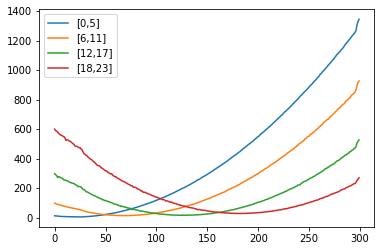

In [295]:
# plt.plot(history.history['loss'])
for k in [k for k in history if 'val_ca1' in k]:
    plt.plot(history[k], label=k.split('-')[1])
        
plt.legend()
        
plt.show()